# Dnet

Assess damaged buildings

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision

from dnet_dataloader import DamageNetDataset

### Config

In [2]:
BATCH_SIZE = 16
EPOCHS = 57 * 15  # 57 * 10

### Data loading

In [3]:
dataset = DamageNetDataset(images_dir='train/images', labels_dir='train/labels', transform=torchvision.transforms.Compose([
    torchvision.transforms.Resize((75, 75)), 
    torchvision.transforms.RandomVerticalFlip(0.5),
    torchvision.transforms.RandomHorizontalFlip(0.5),
    torchvision.transforms.ToTensor()]))

In [4]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)

### Data Visualization

In [5]:
def show_img(img, transpose=True):
    # img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    if transpose:
        npimg = npimg.transpose(1, 2, 0)
    plt.imshow(npimg)
    plt.show()

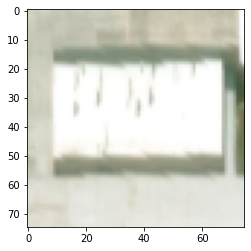

torch.Size([16, 3, 75, 75])
tensor([[1., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.Size([16, 3])


In [6]:
dataiter = iter(dataloader)
images, labels = next(dataiter)

show_img(images[0])
print(images.shape)

print(labels)
print(labels.shape)

### Net

In [7]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 8, 3),
        nn.ReLU(),
        nn.MaxPool2d(2),
        
        nn.Conv2d(8, 16, 3),
        nn.ReLU(),
        nn.MaxPool2d(2),
        
        nn.Conv2d(16, 32, 3),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(2),
        
        nn.Flatten(),
        nn.Linear(1568, 512),
        nn.ReLU(),
        nn.Linear(512, 128),
        nn.ReLU(),
        nn.Linear(128, 3),
    )
  
  def forward(self, x):
        
    """for layer in self.model:
        x = layer(x)
        print(x.size())"""
        
    return self.model(x)

# net = Net()

### Training

In [8]:
dev = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device "%s" for training' % dev)

print(torch.cuda.device_count())

net = Net().to(dev)

Using device "cuda" for training
1


In [9]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [10]:
loss_list = []

for epoch in range(EPOCHS):
    running_loss = 0.0
    
    for i, (images, labels) in enumerate(dataloader):
        images = images.to(dev)
        labels = labels.to(dev)
        
        optimizer.zero_grad()
        
        y = net(images)
        
        loss = criterion(y, labels)
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        
        print('[%.3d / %.3d] Loss: %.9f' % (epoch, i, loss.item()))
    
    average_loss = running_loss / 175
    loss_list.append(average_loss)
    
    torch.save(net.state_dict(), 'model/state_dict_model.pt')

[000 / 000] Loss: 0.695834160
[000 / 001] Loss: 0.655772805
[000 / 002] Loss: 0.623887539
[000 / 003] Loss: 0.510816693
[000 / 004] Loss: 0.687864780
[000 / 005] Loss: 0.609791815
[000 / 006] Loss: 0.590391934
[000 / 007] Loss: 0.614259005
[000 / 008] Loss: 0.514014482
[000 / 009] Loss: 0.539757967
[000 / 010] Loss: 0.800978839
[000 / 011] Loss: 0.553278267
[000 / 012] Loss: 0.476624668
[000 / 013] Loss: 0.587843120
[000 / 014] Loss: 0.556853652
[000 / 015] Loss: 0.641321182
[000 / 016] Loss: 0.528594017
[000 / 017] Loss: 0.506657481
[000 / 018] Loss: 0.474111438
[000 / 019] Loss: 0.636304975
[000 / 020] Loss: 0.575697720
[000 / 021] Loss: 0.608527064
[000 / 022] Loss: 0.572406709
[000 / 023] Loss: 0.604086995
[000 / 024] Loss: 0.576937795
[000 / 025] Loss: 0.505478024
[000 / 026] Loss: 0.435721636
[000 / 027] Loss: 0.805352330
[000 / 028] Loss: 0.607260227
[000 / 029] Loss: 0.607523084
[000 / 030] Loss: 0.765827537
[000 / 031] Loss: 0.537289143
[000 / 032] Loss: 0.643691719
[000 / 033

[001 / 100] Loss: 0.344719410
[001 / 101] Loss: 0.567452669
[001 / 102] Loss: 0.526665330
[001 / 103] Loss: 0.629818082
[001 / 104] Loss: 0.645910501
[001 / 105] Loss: 0.478705227
[001 / 106] Loss: 0.524051785
[001 / 107] Loss: 0.500910938
[001 / 108] Loss: 0.440380991
[001 / 109] Loss: 0.558300018
[001 / 110] Loss: 0.349590480
[001 / 111] Loss: 0.492918104
[001 / 112] Loss: 0.781092107
[001 / 113] Loss: 0.599848032
[001 / 114] Loss: 0.474228710
[001 / 115] Loss: 0.462522030
[001 / 116] Loss: 0.490619898
[001 / 117] Loss: 0.571428835
[001 / 118] Loss: 0.470223665
[001 / 119] Loss: 0.430094659
[001 / 120] Loss: 0.432790160
[001 / 121] Loss: 0.498358011
[001 / 122] Loss: 0.571128964
[001 / 123] Loss: 0.555155039
[001 / 124] Loss: 0.467530608
[001 / 125] Loss: 0.335790455
[001 / 126] Loss: 0.448133826
[001 / 127] Loss: 0.498765081
[001 / 128] Loss: 0.493630886
[001 / 129] Loss: 0.417200148
[001 / 130] Loss: 0.373550832
[001 / 131] Loss: 0.449585557
[001 / 132] Loss: 0.594641268
[001 / 133

[003 / 024] Loss: 0.391455829
[003 / 025] Loss: 0.457824081
[003 / 026] Loss: 0.409890950
[003 / 027] Loss: 0.321680129
[003 / 028] Loss: 0.439902991
[003 / 029] Loss: 0.519223869
[003 / 030] Loss: 0.605969846
[003 / 031] Loss: 0.487060547
[003 / 032] Loss: 0.612347543
[003 / 033] Loss: 0.464832395
[003 / 034] Loss: 0.446130842
[003 / 035] Loss: 0.696407437
[003 / 036] Loss: 0.763523042
[003 / 037] Loss: 0.499941438
[003 / 038] Loss: 0.499110639
[003 / 039] Loss: 0.430809259
[003 / 040] Loss: 0.624029994
[003 / 041] Loss: 0.579725027
[003 / 042] Loss: 0.398613304
[003 / 043] Loss: 0.553760469
[003 / 044] Loss: 0.461914867
[003 / 045] Loss: 0.398544043
[003 / 046] Loss: 0.368950903
[003 / 047] Loss: 0.472059578
[003 / 048] Loss: 0.446685404
[003 / 049] Loss: 0.604870439
[003 / 050] Loss: 0.550355554
[003 / 051] Loss: 0.561705589
[003 / 052] Loss: 0.468278021
[003 / 053] Loss: 0.352724075
[003 / 054] Loss: 0.432027102
[003 / 055] Loss: 0.561944842
[003 / 056] Loss: 0.861266971
[003 / 057

[004 / 124] Loss: 0.704338908
[004 / 125] Loss: 0.579002142
[004 / 126] Loss: 0.487704396
[004 / 127] Loss: 0.948260009
[004 / 128] Loss: 0.404865026
[004 / 129] Loss: 0.311363637
[004 / 130] Loss: 0.457352966
[004 / 131] Loss: 0.452228844
[004 / 132] Loss: 0.526224017
[004 / 133] Loss: 0.416838348
[004 / 134] Loss: 0.398929775
[004 / 135] Loss: 0.536071539
[004 / 136] Loss: 0.534471154
[004 / 137] Loss: 0.502406120
[004 / 138] Loss: 0.408034086
[004 / 139] Loss: 0.540758014
[004 / 140] Loss: 0.340467691
[004 / 141] Loss: 0.507029891
[004 / 142] Loss: 0.450222582
[004 / 143] Loss: 0.579097688
[004 / 144] Loss: 0.658557296
[004 / 145] Loss: 0.543363988
[004 / 146] Loss: 0.367540300
[004 / 147] Loss: 0.360622734
[004 / 148] Loss: 0.641375303
[004 / 149] Loss: 0.447759956
[004 / 150] Loss: 0.483548015
[004 / 151] Loss: 0.460668862
[004 / 152] Loss: 0.505641341
[004 / 153] Loss: 0.455459416
[004 / 154] Loss: 0.441000700
[004 / 155] Loss: 0.349728078
[004 / 156] Loss: 0.518315434
[004 / 157

[006 / 048] Loss: 0.493653983
[006 / 049] Loss: 0.521080971
[006 / 050] Loss: 0.460127771
[006 / 051] Loss: 0.326346219
[006 / 052] Loss: 0.462365448
[006 / 053] Loss: 0.428246975
[006 / 054] Loss: 0.445290983
[006 / 055] Loss: 0.325513244
[006 / 056] Loss: 0.592183590
[006 / 057] Loss: 0.486182094
[006 / 058] Loss: 0.471433967
[006 / 059] Loss: 0.322125912
[006 / 060] Loss: 0.537754476
[006 / 061] Loss: 0.418759793
[006 / 062] Loss: 0.371063411
[006 / 063] Loss: 0.564954042
[006 / 064] Loss: 0.579249740
[006 / 065] Loss: 0.330761611
[006 / 066] Loss: 0.413890183
[006 / 067] Loss: 0.553864479
[006 / 068] Loss: 0.384490490
[006 / 069] Loss: 0.634982347
[006 / 070] Loss: 0.265415400
[006 / 071] Loss: 0.418946117
[006 / 072] Loss: 0.506448150
[006 / 073] Loss: 0.342770189
[006 / 074] Loss: 0.456514060
[006 / 075] Loss: 0.569397807
[006 / 076] Loss: 0.490196317
[006 / 077] Loss: 0.614876866
[006 / 078] Loss: 0.386094064
[006 / 079] Loss: 0.203252897
[006 / 080] Loss: 0.586210907
[006 / 081

[007 / 148] Loss: 0.456592649
[007 / 149] Loss: 0.479160786
[007 / 150] Loss: 0.440668464
[007 / 151] Loss: 0.543327272
[007 / 152] Loss: 0.519686460
[007 / 153] Loss: 0.402985185
[007 / 154] Loss: 0.464711130
[007 / 155] Loss: 0.272890210
[007 / 156] Loss: 0.384001583
[007 / 157] Loss: 0.635778069
[007 / 158] Loss: 0.420485348
[007 / 159] Loss: 0.652251601
[007 / 160] Loss: 0.456252873
[007 / 161] Loss: 0.500832379
[007 / 162] Loss: 0.407696456
[007 / 163] Loss: 0.375493288
[007 / 164] Loss: 0.348729670
[007 / 165] Loss: 0.474253595
[007 / 166] Loss: 0.568378091
[007 / 167] Loss: 0.372771442
[007 / 168] Loss: 0.351267099
[007 / 169] Loss: 0.573150754
[007 / 170] Loss: 0.419214189
[007 / 171] Loss: 0.546580613
[007 / 172] Loss: 0.521426618
[007 / 173] Loss: 0.261462212
[007 / 174] Loss: 0.390261084
[008 / 000] Loss: 0.478576273
[008 / 001] Loss: 0.473718256
[008 / 002] Loss: 0.508641124
[008 / 003] Loss: 0.504335165
[008 / 004] Loss: 0.414485902
[008 / 005] Loss: 0.475870550
[008 / 006

[009 / 072] Loss: 0.565675676
[009 / 073] Loss: 0.374190450
[009 / 074] Loss: 0.348555267
[009 / 075] Loss: 0.410877943
[009 / 076] Loss: 0.655888736
[009 / 077] Loss: 0.474079311
[009 / 078] Loss: 0.329319715
[009 / 079] Loss: 0.335648865
[009 / 080] Loss: 0.355834246
[009 / 081] Loss: 0.457537383
[009 / 082] Loss: 0.748568535
[009 / 083] Loss: 0.448605388
[009 / 084] Loss: 0.504783690
[009 / 085] Loss: 0.468582749
[009 / 086] Loss: 0.418604791
[009 / 087] Loss: 0.520181835
[009 / 088] Loss: 0.536346555
[009 / 089] Loss: 0.492582560
[009 / 090] Loss: 0.435346127
[009 / 091] Loss: 0.476729870
[009 / 092] Loss: 0.441138834
[009 / 093] Loss: 0.397903681
[009 / 094] Loss: 0.453654259
[009 / 095] Loss: 0.286493987
[009 / 096] Loss: 0.327555716
[009 / 097] Loss: 0.368779838
[009 / 098] Loss: 0.465068907
[009 / 099] Loss: 0.313712478
[009 / 100] Loss: 0.285437703
[009 / 101] Loss: 0.350354403
[009 / 102] Loss: 0.649404883
[009 / 103] Loss: 0.504889131
[009 / 104] Loss: 0.269079030
[009 / 105

[010 / 173] Loss: 0.292342156
[010 / 174] Loss: 0.474433482
[011 / 000] Loss: 0.520020962
[011 / 001] Loss: 0.468789071
[011 / 002] Loss: 0.411573946
[011 / 003] Loss: 0.385856718
[011 / 004] Loss: 0.402755111
[011 / 005] Loss: 0.380986214
[011 / 006] Loss: 0.377494335
[011 / 007] Loss: 0.380592823
[011 / 008] Loss: 0.285467148
[011 / 009] Loss: 0.512882411
[011 / 010] Loss: 0.655082464
[011 / 011] Loss: 0.534176946
[011 / 012] Loss: 0.318421423
[011 / 013] Loss: 0.397105396
[011 / 014] Loss: 0.493078560
[011 / 015] Loss: 0.450032532
[011 / 016] Loss: 0.521648765
[011 / 017] Loss: 0.494760752
[011 / 018] Loss: 0.389450997
[011 / 019] Loss: 0.570049226
[011 / 020] Loss: 0.584437311
[011 / 021] Loss: 0.427483797
[011 / 022] Loss: 0.483200282
[011 / 023] Loss: 0.683372855
[011 / 024] Loss: 0.571093798
[011 / 025] Loss: 0.366098613
[011 / 026] Loss: 0.344331920
[011 / 027] Loss: 0.486703962
[011 / 028] Loss: 0.451967478
[011 / 029] Loss: 0.419429541
[011 / 030] Loss: 0.528566241
[011 / 031

[012 / 100] Loss: 0.764101386
[012 / 101] Loss: 0.320755303
[012 / 102] Loss: 0.565439582
[012 / 103] Loss: 0.399293482
[012 / 104] Loss: 0.489791363
[012 / 105] Loss: 0.791622996
[012 / 106] Loss: 0.531020761
[012 / 107] Loss: 0.413886160
[012 / 108] Loss: 0.289902747
[012 / 109] Loss: 0.304833472
[012 / 110] Loss: 0.453025043
[012 / 111] Loss: 0.475265086
[012 / 112] Loss: 0.367007732
[012 / 113] Loss: 0.445310444
[012 / 114] Loss: 0.528570294
[012 / 115] Loss: 0.284280747
[012 / 116] Loss: 0.375725359
[012 / 117] Loss: 0.382810295
[012 / 118] Loss: 0.400389373
[012 / 119] Loss: 0.566729367
[012 / 120] Loss: 0.398136079
[012 / 121] Loss: 0.566790044
[012 / 122] Loss: 0.529414117
[012 / 123] Loss: 0.495512336
[012 / 124] Loss: 0.507299185
[012 / 125] Loss: 0.369909525
[012 / 126] Loss: 0.390138030
[012 / 127] Loss: 0.537154913
[012 / 128] Loss: 0.401840627
[012 / 129] Loss: 0.552436769
[012 / 130] Loss: 0.421307862
[012 / 131] Loss: 0.334534228
[012 / 132] Loss: 0.434591115
[012 / 133

[014 / 024] Loss: 0.493343413
[014 / 025] Loss: 0.253903151
[014 / 026] Loss: 0.285758674
[014 / 027] Loss: 0.409424067
[014 / 028] Loss: 0.482582062
[014 / 029] Loss: 0.456934690
[014 / 030] Loss: 0.733935833
[014 / 031] Loss: 0.407858819
[014 / 032] Loss: 0.693181217
[014 / 033] Loss: 0.450253338
[014 / 034] Loss: 0.746075988
[014 / 035] Loss: 0.284604579
[014 / 036] Loss: 0.335858792
[014 / 037] Loss: 0.470447719
[014 / 038] Loss: 0.387068838
[014 / 039] Loss: 0.437532991
[014 / 040] Loss: 0.637978017
[014 / 041] Loss: 0.627173305
[014 / 042] Loss: 0.402129591
[014 / 043] Loss: 0.436282963
[014 / 044] Loss: 0.508942306
[014 / 045] Loss: 0.473785758
[014 / 046] Loss: 0.440182894
[014 / 047] Loss: 0.337713003
[014 / 048] Loss: 0.515619934
[014 / 049] Loss: 0.357069343
[014 / 050] Loss: 0.540018916
[014 / 051] Loss: 0.466937870
[014 / 052] Loss: 0.432828128
[014 / 053] Loss: 0.503984332
[014 / 054] Loss: 0.486052454
[014 / 055] Loss: 0.510523021
[014 / 056] Loss: 0.483419597
[014 / 057

[015 / 124] Loss: 0.552744746
[015 / 125] Loss: 0.483555645
[015 / 126] Loss: 0.475004017
[015 / 127] Loss: 0.503892064
[015 / 128] Loss: 0.452772439
[015 / 129] Loss: 0.570662558
[015 / 130] Loss: 0.335536361
[015 / 131] Loss: 0.346521497
[015 / 132] Loss: 0.366950512
[015 / 133] Loss: 0.387268543
[015 / 134] Loss: 0.404776931
[015 / 135] Loss: 0.391605973
[015 / 136] Loss: 0.436717838
[015 / 137] Loss: 0.591713011
[015 / 138] Loss: 0.454562664
[015 / 139] Loss: 0.604339838
[015 / 140] Loss: 0.517436564
[015 / 141] Loss: 0.336881340
[015 / 142] Loss: 0.389145374
[015 / 143] Loss: 0.389461935
[015 / 144] Loss: 0.634566724
[015 / 145] Loss: 0.249365002
[015 / 146] Loss: 0.489786237
[015 / 147] Loss: 0.555775166
[015 / 148] Loss: 0.364051193
[015 / 149] Loss: 0.546193480
[015 / 150] Loss: 0.402067989
[015 / 151] Loss: 0.612213850
[015 / 152] Loss: 0.478351921
[015 / 153] Loss: 0.356261581
[015 / 154] Loss: 0.333278835
[015 / 155] Loss: 0.438851327
[015 / 156] Loss: 0.419568866
[015 / 157

[017 / 048] Loss: 0.583291054
[017 / 049] Loss: 0.418655396
[017 / 050] Loss: 0.328654498
[017 / 051] Loss: 0.383137792
[017 / 052] Loss: 0.636721432
[017 / 053] Loss: 0.501196325
[017 / 054] Loss: 0.401256979
[017 / 055] Loss: 0.377259016
[017 / 056] Loss: 0.261964679
[017 / 057] Loss: 0.502787530
[017 / 058] Loss: 0.342554182
[017 / 059] Loss: 0.378760576
[017 / 060] Loss: 0.341522694
[017 / 061] Loss: 0.363018483
[017 / 062] Loss: 0.364281595
[017 / 063] Loss: 0.542870522
[017 / 064] Loss: 0.426883042
[017 / 065] Loss: 0.472252935
[017 / 066] Loss: 0.277230978
[017 / 067] Loss: 0.691899180
[017 / 068] Loss: 0.943838596
[017 / 069] Loss: 0.575540364
[017 / 070] Loss: 0.732763529
[017 / 071] Loss: 0.635648191
[017 / 072] Loss: 0.363844603
[017 / 073] Loss: 0.240476474
[017 / 074] Loss: 0.469418406
[017 / 075] Loss: 0.414677709
[017 / 076] Loss: 0.608080864
[017 / 077] Loss: 0.438201189
[017 / 078] Loss: 0.390586555
[017 / 079] Loss: 0.591399074
[017 / 080] Loss: 0.500540257
[017 / 081

[018 / 148] Loss: 0.600788713
[018 / 149] Loss: 0.565807104
[018 / 150] Loss: 0.520878792
[018 / 151] Loss: 0.399010062
[018 / 152] Loss: 0.454714030
[018 / 153] Loss: 0.383927315
[018 / 154] Loss: 0.701553583
[018 / 155] Loss: 0.461102545
[018 / 156] Loss: 0.565152586
[018 / 157] Loss: 0.302288771
[018 / 158] Loss: 0.408121288
[018 / 159] Loss: 0.354868770
[018 / 160] Loss: 0.524310350
[018 / 161] Loss: 0.440532148
[018 / 162] Loss: 0.407156229
[018 / 163] Loss: 0.471412420
[018 / 164] Loss: 0.380376518
[018 / 165] Loss: 0.533163190
[018 / 166] Loss: 0.410281718
[018 / 167] Loss: 0.826222539
[018 / 168] Loss: 0.380640000
[018 / 169] Loss: 0.323421806
[018 / 170] Loss: 0.283209056
[018 / 171] Loss: 0.335653841
[018 / 172] Loss: 0.310647070
[018 / 173] Loss: 0.410246700
[018 / 174] Loss: 0.441765845
[019 / 000] Loss: 0.480811775
[019 / 001] Loss: 0.728420913
[019 / 002] Loss: 0.374407142
[019 / 003] Loss: 0.304401428
[019 / 004] Loss: 0.365988672
[019 / 005] Loss: 0.338492870
[019 / 006

[020 / 072] Loss: 0.444457382
[020 / 073] Loss: 0.307391644
[020 / 074] Loss: 0.253492862
[020 / 075] Loss: 0.182151675
[020 / 076] Loss: 0.287924409
[020 / 077] Loss: 0.472348690
[020 / 078] Loss: 0.461942434
[020 / 079] Loss: 0.511986017
[020 / 080] Loss: 0.447102278
[020 / 081] Loss: 0.801728010
[020 / 082] Loss: 0.487371624
[020 / 083] Loss: 0.337416947
[020 / 084] Loss: 0.280996114
[020 / 085] Loss: 0.666166008
[020 / 086] Loss: 0.518061578
[020 / 087] Loss: 0.442561477
[020 / 088] Loss: 0.720587611
[020 / 089] Loss: 0.435168624
[020 / 090] Loss: 0.464178056
[020 / 091] Loss: 0.373187542
[020 / 092] Loss: 0.364894122
[020 / 093] Loss: 0.398742080
[020 / 094] Loss: 0.513409078
[020 / 095] Loss: 0.443122625
[020 / 096] Loss: 0.364920795
[020 / 097] Loss: 0.319885254
[020 / 098] Loss: 0.361234277
[020 / 099] Loss: 0.446189582
[020 / 100] Loss: 0.541224778
[020 / 101] Loss: 0.420904726
[020 / 102] Loss: 0.542063177
[020 / 103] Loss: 0.437353194
[020 / 104] Loss: 0.472179770
[020 / 105

[021 / 173] Loss: 0.339882225
[021 / 174] Loss: 0.407683223
[022 / 000] Loss: 0.461979568
[022 / 001] Loss: 0.469505012
[022 / 002] Loss: 0.329933852
[022 / 003] Loss: 0.327487588
[022 / 004] Loss: 0.675010443
[022 / 005] Loss: 0.361057103
[022 / 006] Loss: 0.365479946
[022 / 007] Loss: 0.472230375
[022 / 008] Loss: 0.334412307
[022 / 009] Loss: 0.513549328
[022 / 010] Loss: 0.510701418
[022 / 011] Loss: 0.446186870
[022 / 012] Loss: 0.498095244
[022 / 013] Loss: 0.396574110
[022 / 014] Loss: 0.627087772
[022 / 015] Loss: 0.278948247
[022 / 016] Loss: 0.573327422
[022 / 017] Loss: 0.442963541
[022 / 018] Loss: 0.365056932
[022 / 019] Loss: 0.467275143
[022 / 020] Loss: 0.334025323
[022 / 021] Loss: 0.492647588
[022 / 022] Loss: 0.618763328
[022 / 023] Loss: 0.346553892
[022 / 024] Loss: 0.349104583
[022 / 025] Loss: 0.398751467
[022 / 026] Loss: 0.356934249
[022 / 027] Loss: 0.426858276
[022 / 028] Loss: 0.345023870
[022 / 029] Loss: 0.355998099
[022 / 030] Loss: 0.297482669
[022 / 031

[023 / 097] Loss: 0.539945245
[023 / 098] Loss: 0.386938304
[023 / 099] Loss: 0.445619643
[023 / 100] Loss: 0.440653175
[023 / 101] Loss: 0.259679884
[023 / 102] Loss: 0.346627772
[023 / 103] Loss: 0.564887881
[023 / 104] Loss: 0.433786333
[023 / 105] Loss: 0.301878870
[023 / 106] Loss: 0.448114246
[023 / 107] Loss: 0.380524993
[023 / 108] Loss: 0.624907553
[023 / 109] Loss: 0.433878243
[023 / 110] Loss: 0.550245643
[023 / 111] Loss: 0.386345953
[023 / 112] Loss: 0.676003337
[023 / 113] Loss: 0.452854395
[023 / 114] Loss: 0.390972316
[023 / 115] Loss: 0.261521995
[023 / 116] Loss: 0.827730179
[023 / 117] Loss: 0.467579365
[023 / 118] Loss: 0.650111318
[023 / 119] Loss: 0.426823378
[023 / 120] Loss: 0.435603917
[023 / 121] Loss: 0.421650410
[023 / 122] Loss: 0.368128717
[023 / 123] Loss: 0.454567283
[023 / 124] Loss: 0.535376489
[023 / 125] Loss: 0.404263437
[023 / 126] Loss: 0.426434487
[023 / 127] Loss: 0.481342375
[023 / 128] Loss: 0.381731868
[023 / 129] Loss: 0.479901046
[023 / 130

[025 / 024] Loss: 0.278814852
[025 / 025] Loss: 0.457272291
[025 / 026] Loss: 0.654455841
[025 / 027] Loss: 0.652369142
[025 / 028] Loss: 0.337366998
[025 / 029] Loss: 0.390032470
[025 / 030] Loss: 0.346785367
[025 / 031] Loss: 0.472275674
[025 / 032] Loss: 0.209169671
[025 / 033] Loss: 0.342827022
[025 / 034] Loss: 0.264134586
[025 / 035] Loss: 0.298607349
[025 / 036] Loss: 0.313990563
[025 / 037] Loss: 0.282846063
[025 / 038] Loss: 0.351843804
[025 / 039] Loss: 0.641766131
[025 / 040] Loss: 0.485279411
[025 / 041] Loss: 0.366821468
[025 / 042] Loss: 0.530629158
[025 / 043] Loss: 0.443846822
[025 / 044] Loss: 0.304186195
[025 / 045] Loss: 0.580874562
[025 / 046] Loss: 0.371900290
[025 / 047] Loss: 0.616174936
[025 / 048] Loss: 0.386199355
[025 / 049] Loss: 0.513507664
[025 / 050] Loss: 0.295619607
[025 / 051] Loss: 0.343879312
[025 / 052] Loss: 0.497391313
[025 / 053] Loss: 0.288623959
[025 / 054] Loss: 0.332394719
[025 / 055] Loss: 0.427003920
[025 / 056] Loss: 0.404703230
[025 / 057

[026 / 124] Loss: 0.545916736
[026 / 125] Loss: 0.315796942
[026 / 126] Loss: 0.395452589
[026 / 127] Loss: 0.377176136
[026 / 128] Loss: 0.444606364
[026 / 129] Loss: 0.375567257
[026 / 130] Loss: 0.458406866
[026 / 131] Loss: 0.472340226
[026 / 132] Loss: 0.542218626
[026 / 133] Loss: 0.498811692
[026 / 134] Loss: 0.560730278
[026 / 135] Loss: 0.538721502
[026 / 136] Loss: 0.470298737
[026 / 137] Loss: 0.505972087
[026 / 138] Loss: 0.430161953
[026 / 139] Loss: 0.360881150
[026 / 140] Loss: 0.311767936
[026 / 141] Loss: 0.512512207
[026 / 142] Loss: 0.453797758
[026 / 143] Loss: 0.348770320
[026 / 144] Loss: 0.427617788
[026 / 145] Loss: 0.497797012
[026 / 146] Loss: 0.430538237
[026 / 147] Loss: 0.431836367
[026 / 148] Loss: 0.347404957
[026 / 149] Loss: 0.491973042
[026 / 150] Loss: 0.450523376
[026 / 151] Loss: 0.421783030
[026 / 152] Loss: 0.356942743
[026 / 153] Loss: 0.392515123
[026 / 154] Loss: 0.377582639
[026 / 155] Loss: 0.240955442
[026 / 156] Loss: 0.308783174
[026 / 157

[028 / 048] Loss: 0.507997334
[028 / 049] Loss: 0.351136416
[028 / 050] Loss: 0.347741842
[028 / 051] Loss: 0.371867001
[028 / 052] Loss: 0.395667404
[028 / 053] Loss: 0.375346750
[028 / 054] Loss: 0.351385683
[028 / 055] Loss: 0.428123355
[028 / 056] Loss: 0.386439979
[028 / 057] Loss: 0.339697301
[028 / 058] Loss: 0.520978093
[028 / 059] Loss: 0.605213165
[028 / 060] Loss: 0.355041087
[028 / 061] Loss: 0.572599888
[028 / 062] Loss: 0.510959685
[028 / 063] Loss: 0.315766811
[028 / 064] Loss: 0.306847870
[028 / 065] Loss: 0.311191767
[028 / 066] Loss: 0.645193815
[028 / 067] Loss: 0.567471027
[028 / 068] Loss: 0.443321466
[028 / 069] Loss: 0.324504614
[028 / 070] Loss: 0.396715581
[028 / 071] Loss: 0.286419928
[028 / 072] Loss: 0.297046423
[028 / 073] Loss: 0.450329870
[028 / 074] Loss: 0.568668306
[028 / 075] Loss: 0.438196182
[028 / 076] Loss: 0.255648315
[028 / 077] Loss: 0.271123946
[028 / 078] Loss: 0.337962091
[028 / 079] Loss: 0.369604707
[028 / 080] Loss: 0.375192881
[028 / 081

[029 / 146] Loss: 0.367356181
[029 / 147] Loss: 0.301169872
[029 / 148] Loss: 0.308713973
[029 / 149] Loss: 0.518177688
[029 / 150] Loss: 0.248272702
[029 / 151] Loss: 0.366917312
[029 / 152] Loss: 0.674780369
[029 / 153] Loss: 0.341406107
[029 / 154] Loss: 0.358885258
[029 / 155] Loss: 0.288453162
[029 / 156] Loss: 0.258875400
[029 / 157] Loss: 0.497722000
[029 / 158] Loss: 0.364403188
[029 / 159] Loss: 0.773397446
[029 / 160] Loss: 0.366861999
[029 / 161] Loss: 0.381099313
[029 / 162] Loss: 0.417837858
[029 / 163] Loss: 0.391218752
[029 / 164] Loss: 0.282684505
[029 / 165] Loss: 0.333346546
[029 / 166] Loss: 0.373299360
[029 / 167] Loss: 0.291865081
[029 / 168] Loss: 0.391951412
[029 / 169] Loss: 0.394219607
[029 / 170] Loss: 0.298065990
[029 / 171] Loss: 0.615644693
[029 / 172] Loss: 0.432323158
[029 / 173] Loss: 0.445589006
[029 / 174] Loss: 0.316363901
[030 / 000] Loss: 0.564381659
[030 / 001] Loss: 0.288283467
[030 / 002] Loss: 0.485616863
[030 / 003] Loss: 0.559893370
[030 / 004

[031 / 071] Loss: 0.341134638
[031 / 072] Loss: 0.430860370
[031 / 073] Loss: 0.486972094
[031 / 074] Loss: 0.342662096
[031 / 075] Loss: 0.242012709
[031 / 076] Loss: 0.269244730
[031 / 077] Loss: 0.305956483
[031 / 078] Loss: 0.374070853
[031 / 079] Loss: 0.401358545
[031 / 080] Loss: 0.390481561
[031 / 081] Loss: 0.614327133
[031 / 082] Loss: 0.644903183
[031 / 083] Loss: 0.323301852
[031 / 084] Loss: 0.314931452
[031 / 085] Loss: 0.540341079
[031 / 086] Loss: 0.548360586
[031 / 087] Loss: 0.216173947
[031 / 088] Loss: 0.294609249
[031 / 089] Loss: 0.442506194
[031 / 090] Loss: 0.362977117
[031 / 091] Loss: 0.363583982
[031 / 092] Loss: 0.686488807
[031 / 093] Loss: 0.597331107
[031 / 094] Loss: 0.348143578
[031 / 095] Loss: 0.317990392
[031 / 096] Loss: 0.369553685
[031 / 097] Loss: 0.369323820
[031 / 098] Loss: 0.349150509
[031 / 099] Loss: 0.333084643
[031 / 100] Loss: 0.434293240
[031 / 101] Loss: 0.397469968
[031 / 102] Loss: 0.383433670
[031 / 103] Loss: 0.439340532
[031 / 104

[032 / 171] Loss: 0.399349302
[032 / 172] Loss: 0.284751505
[032 / 173] Loss: 0.354274035
[032 / 174] Loss: 0.505820215
[033 / 000] Loss: 0.331156760
[033 / 001] Loss: 0.335375160
[033 / 002] Loss: 0.473973513
[033 / 003] Loss: 0.665942311
[033 / 004] Loss: 0.345741838
[033 / 005] Loss: 0.380265892
[033 / 006] Loss: 0.501431823
[033 / 007] Loss: 0.322540134
[033 / 008] Loss: 0.451827288
[033 / 009] Loss: 0.329165161
[033 / 010] Loss: 0.377831876
[033 / 011] Loss: 0.680026233
[033 / 012] Loss: 0.630796075
[033 / 013] Loss: 0.585866451
[033 / 014] Loss: 0.373555273
[033 / 015] Loss: 0.526514113
[033 / 016] Loss: 0.309880763
[033 / 017] Loss: 0.482424319
[033 / 018] Loss: 0.461006582
[033 / 019] Loss: 0.342650950
[033 / 020] Loss: 0.502570689
[033 / 021] Loss: 0.674797237
[033 / 022] Loss: 0.388767719
[033 / 023] Loss: 0.446865678
[033 / 024] Loss: 0.383894324
[033 / 025] Loss: 0.513816118
[033 / 026] Loss: 0.356246084
[033 / 027] Loss: 0.346285641
[033 / 028] Loss: 0.469715357
[033 / 029

[034 / 096] Loss: 0.640388489
[034 / 097] Loss: 0.335352421
[034 / 098] Loss: 0.315216541
[034 / 099] Loss: 0.403523445
[034 / 100] Loss: 0.459291548
[034 / 101] Loss: 0.321186304
[034 / 102] Loss: 0.462862253
[034 / 103] Loss: 0.321725130
[034 / 104] Loss: 0.569723904
[034 / 105] Loss: 0.346673131
[034 / 106] Loss: 0.533001184
[034 / 107] Loss: 0.387466133
[034 / 108] Loss: 0.430891722
[034 / 109] Loss: 0.497784555
[034 / 110] Loss: 0.350763738
[034 / 111] Loss: 0.442805618
[034 / 112] Loss: 0.456186980
[034 / 113] Loss: 0.307620436
[034 / 114] Loss: 0.500237465
[034 / 115] Loss: 0.460484385
[034 / 116] Loss: 0.413198084
[034 / 117] Loss: 0.300965905
[034 / 118] Loss: 0.341799080
[034 / 119] Loss: 0.344418526
[034 / 120] Loss: 0.378701150
[034 / 121] Loss: 0.400600433
[034 / 122] Loss: 0.509679437
[034 / 123] Loss: 0.528120279
[034 / 124] Loss: 0.488518953
[034 / 125] Loss: 0.296095908
[034 / 126] Loss: 0.300736964
[034 / 127] Loss: 0.316943020
[034 / 128] Loss: 0.317851990
[034 / 129

[036 / 020] Loss: 0.501116216
[036 / 021] Loss: 0.328094900
[036 / 022] Loss: 0.294195384
[036 / 023] Loss: 0.329331666
[036 / 024] Loss: 0.474485099
[036 / 025] Loss: 0.585672379
[036 / 026] Loss: 0.388287395
[036 / 027] Loss: 0.253551185
[036 / 028] Loss: 0.364148259
[036 / 029] Loss: 0.347475231
[036 / 030] Loss: 0.268891066
[036 / 031] Loss: 0.376651466
[036 / 032] Loss: 0.268411636
[036 / 033] Loss: 0.291730493
[036 / 034] Loss: 0.481268644
[036 / 035] Loss: 0.394132078
[036 / 036] Loss: 0.246164858
[036 / 037] Loss: 0.338595957
[036 / 038] Loss: 0.438062191
[036 / 039] Loss: 0.440461457
[036 / 040] Loss: 0.279560715
[036 / 041] Loss: 0.267874420
[036 / 042] Loss: 0.372887254
[036 / 043] Loss: 0.243223116
[036 / 044] Loss: 0.268074691
[036 / 045] Loss: 0.384895086
[036 / 046] Loss: 0.283575118
[036 / 047] Loss: 0.432830274
[036 / 048] Loss: 0.347911775
[036 / 049] Loss: 0.275230259
[036 / 050] Loss: 0.398722023
[036 / 051] Loss: 0.510345399
[036 / 052] Loss: 0.576988459
[036 / 053

[037 / 120] Loss: 0.459188908
[037 / 121] Loss: 0.357606143
[037 / 122] Loss: 0.420140952
[037 / 123] Loss: 0.334918380
[037 / 124] Loss: 0.612860084
[037 / 125] Loss: 0.381718636
[037 / 126] Loss: 0.279346824
[037 / 127] Loss: 0.535168469
[037 / 128] Loss: 0.578758240
[037 / 129] Loss: 0.413229197
[037 / 130] Loss: 0.473894060
[037 / 131] Loss: 0.360326260
[037 / 132] Loss: 0.603744209
[037 / 133] Loss: 0.584326506
[037 / 134] Loss: 0.684848011
[037 / 135] Loss: 0.435316324
[037 / 136] Loss: 0.314083308
[037 / 137] Loss: 0.354740679
[037 / 138] Loss: 0.330880702
[037 / 139] Loss: 0.510013223
[037 / 140] Loss: 0.273457646
[037 / 141] Loss: 0.482763231
[037 / 142] Loss: 0.246363133
[037 / 143] Loss: 0.394784927
[037 / 144] Loss: 0.301981211
[037 / 145] Loss: 0.286364138
[037 / 146] Loss: 0.412626803
[037 / 147] Loss: 0.378621668
[037 / 148] Loss: 0.371950805
[037 / 149] Loss: 0.432602108
[037 / 150] Loss: 0.508351922
[037 / 151] Loss: 0.509964466
[037 / 152] Loss: 0.359586328
[037 / 153

[039 / 044] Loss: 0.567166209
[039 / 045] Loss: 0.402739644
[039 / 046] Loss: 0.454633802
[039 / 047] Loss: 0.479963154
[039 / 048] Loss: 0.335552931
[039 / 049] Loss: 0.429323554
[039 / 050] Loss: 0.296155572
[039 / 051] Loss: 0.334595025
[039 / 052] Loss: 0.354892671
[039 / 053] Loss: 0.497680187
[039 / 054] Loss: 0.370673120
[039 / 055] Loss: 0.359770298
[039 / 056] Loss: 0.449474305
[039 / 057] Loss: 0.396068424
[039 / 058] Loss: 0.401484728
[039 / 059] Loss: 0.500426412
[039 / 060] Loss: 0.205954462
[039 / 061] Loss: 0.346914142
[039 / 062] Loss: 0.417993039
[039 / 063] Loss: 0.355733722
[039 / 064] Loss: 0.372613668
[039 / 065] Loss: 0.432584971
[039 / 066] Loss: 0.420559108
[039 / 067] Loss: 0.412771225
[039 / 068] Loss: 0.577177644
[039 / 069] Loss: 0.218078852
[039 / 070] Loss: 0.520818949
[039 / 071] Loss: 0.337973773
[039 / 072] Loss: 0.504184425
[039 / 073] Loss: 0.848976612
[039 / 074] Loss: 0.369854301
[039 / 075] Loss: 0.591637492
[039 / 076] Loss: 0.287177831
[039 / 077

[040 / 143] Loss: 0.267364919
[040 / 144] Loss: 0.455503166
[040 / 145] Loss: 0.443240881
[040 / 146] Loss: 0.399805397
[040 / 147] Loss: 0.347112596
[040 / 148] Loss: 0.230192244
[040 / 149] Loss: 0.285666704
[040 / 150] Loss: 0.425730467
[040 / 151] Loss: 0.317583799
[040 / 152] Loss: 0.533887386
[040 / 153] Loss: 0.381034464
[040 / 154] Loss: 0.279674977
[040 / 155] Loss: 0.366043895
[040 / 156] Loss: 0.355894178
[040 / 157] Loss: 0.336231947
[040 / 158] Loss: 0.364980549
[040 / 159] Loss: 0.403825134
[040 / 160] Loss: 0.309819639
[040 / 161] Loss: 0.333770573
[040 / 162] Loss: 0.257417023
[040 / 163] Loss: 0.410296261
[040 / 164] Loss: 0.356217384
[040 / 165] Loss: 0.328041613
[040 / 166] Loss: 0.248958588
[040 / 167] Loss: 0.520702362
[040 / 168] Loss: 0.474466801
[040 / 169] Loss: 0.452003658
[040 / 170] Loss: 0.315015614
[040 / 171] Loss: 0.625876129
[040 / 172] Loss: 0.438807726
[040 / 173] Loss: 0.422912836
[040 / 174] Loss: 0.310946196
[041 / 000] Loss: 0.324923724
[041 / 001

[042 / 068] Loss: 0.381261885
[042 / 069] Loss: 0.318282962
[042 / 070] Loss: 0.314374566
[042 / 071] Loss: 0.382716626
[042 / 072] Loss: 0.583516479
[042 / 073] Loss: 0.323229790
[042 / 074] Loss: 0.373510838
[042 / 075] Loss: 0.347535610
[042 / 076] Loss: 0.221727163
[042 / 077] Loss: 0.615301907
[042 / 078] Loss: 0.507481039
[042 / 079] Loss: 0.321946740
[042 / 080] Loss: 0.410393894
[042 / 081] Loss: 0.355324507
[042 / 082] Loss: 0.362031907
[042 / 083] Loss: 0.455422372
[042 / 084] Loss: 0.367959619
[042 / 085] Loss: 0.357148379
[042 / 086] Loss: 0.338316739
[042 / 087] Loss: 0.436247677
[042 / 088] Loss: 0.386893511
[042 / 089] Loss: 0.319660127
[042 / 090] Loss: 0.492834419
[042 / 091] Loss: 0.531653821
[042 / 092] Loss: 0.322654903
[042 / 093] Loss: 0.398790121
[042 / 094] Loss: 0.433785856
[042 / 095] Loss: 0.467196703
[042 / 096] Loss: 0.287010521
[042 / 097] Loss: 0.276830077
[042 / 098] Loss: 0.470430613
[042 / 099] Loss: 0.470375150
[042 / 100] Loss: 0.205848962
[042 / 101

[043 / 167] Loss: 0.585673988
[043 / 168] Loss: 0.612025023
[043 / 169] Loss: 0.210276455
[043 / 170] Loss: 0.392729372
[043 / 171] Loss: 0.285653293
[043 / 172] Loss: 0.251580566
[043 / 173] Loss: 0.593469620
[043 / 174] Loss: 0.624018610
[044 / 000] Loss: 0.369113684
[044 / 001] Loss: 0.311013907
[044 / 002] Loss: 0.386314481
[044 / 003] Loss: 0.341400981
[044 / 004] Loss: 0.392481416
[044 / 005] Loss: 0.425059080
[044 / 006] Loss: 0.539596260
[044 / 007] Loss: 0.337036699
[044 / 008] Loss: 0.348670423
[044 / 009] Loss: 0.408426285
[044 / 010] Loss: 0.383629680
[044 / 011] Loss: 0.344200134
[044 / 012] Loss: 0.464732945
[044 / 013] Loss: 0.581771970
[044 / 014] Loss: 0.266349077
[044 / 015] Loss: 0.256549805
[044 / 016] Loss: 0.711142540
[044 / 017] Loss: 0.303803653
[044 / 018] Loss: 0.481393427
[044 / 019] Loss: 0.251784176
[044 / 020] Loss: 0.268719494
[044 / 021] Loss: 0.281884491
[044 / 022] Loss: 0.492443323
[044 / 023] Loss: 0.497388601
[044 / 024] Loss: 0.331094295
[044 / 025

[045 / 092] Loss: 0.324212313
[045 / 093] Loss: 0.554761052
[045 / 094] Loss: 0.206657290
[045 / 095] Loss: 0.338431001
[045 / 096] Loss: 0.709157348
[045 / 097] Loss: 0.303316683
[045 / 098] Loss: 0.307438284
[045 / 099] Loss: 0.385304779
[045 / 100] Loss: 0.278626591
[045 / 101] Loss: 0.318912387
[045 / 102] Loss: 0.374023855
[045 / 103] Loss: 0.594501376
[045 / 104] Loss: 0.659696937
[045 / 105] Loss: 0.376619428
[045 / 106] Loss: 0.384729117
[045 / 107] Loss: 0.375047624
[045 / 108] Loss: 0.264571249
[045 / 109] Loss: 0.550483644
[045 / 110] Loss: 0.327742726
[045 / 111] Loss: 0.320527077
[045 / 112] Loss: 0.491974354
[045 / 113] Loss: 0.448209614
[045 / 114] Loss: 0.294341534
[045 / 115] Loss: 0.479752660
[045 / 116] Loss: 0.383720726
[045 / 117] Loss: 0.276478648
[045 / 118] Loss: 0.607487917
[045 / 119] Loss: 0.513435304
[045 / 120] Loss: 0.425605118
[045 / 121] Loss: 0.238686979
[045 / 122] Loss: 0.504195154
[045 / 123] Loss: 0.416895807
[045 / 124] Loss: 0.313074648
[045 / 125

[047 / 016] Loss: 0.194239825
[047 / 017] Loss: 0.324039280
[047 / 018] Loss: 0.552966833
[047 / 019] Loss: 0.223932192
[047 / 020] Loss: 0.364214152
[047 / 021] Loss: 0.257356793
[047 / 022] Loss: 0.385269731
[047 / 023] Loss: 0.313399941
[047 / 024] Loss: 0.381616533
[047 / 025] Loss: 0.498627663
[047 / 026] Loss: 0.350669116
[047 / 027] Loss: 0.307669371
[047 / 028] Loss: 0.411230534
[047 / 029] Loss: 0.336278290
[047 / 030] Loss: 0.416685075
[047 / 031] Loss: 0.493235886
[047 / 032] Loss: 0.358905524
[047 / 033] Loss: 0.471612543
[047 / 034] Loss: 0.385544002
[047 / 035] Loss: 0.326469839
[047 / 036] Loss: 0.387993276
[047 / 037] Loss: 0.430905223
[047 / 038] Loss: 0.248469561
[047 / 039] Loss: 0.316881120
[047 / 040] Loss: 0.365172386
[047 / 041] Loss: 0.469163120
[047 / 042] Loss: 0.387619436
[047 / 043] Loss: 0.320477128
[047 / 044] Loss: 0.368445098
[047 / 045] Loss: 0.252637684
[047 / 046] Loss: 0.259748280
[047 / 047] Loss: 0.361989200
[047 / 048] Loss: 0.480658770
[047 / 049

[048 / 116] Loss: 0.215990990
[048 / 117] Loss: 0.426732868
[048 / 118] Loss: 0.329906821
[048 / 119] Loss: 0.385752976
[048 / 120] Loss: 0.277678013
[048 / 121] Loss: 0.451500982
[048 / 122] Loss: 0.313410193
[048 / 123] Loss: 0.414937139
[048 / 124] Loss: 0.286463618
[048 / 125] Loss: 0.257152528
[048 / 126] Loss: 0.658761621
[048 / 127] Loss: 0.321400762
[048 / 128] Loss: 0.282590389
[048 / 129] Loss: 0.453751028
[048 / 130] Loss: 0.230042458
[048 / 131] Loss: 0.279259205
[048 / 132] Loss: 0.423700035
[048 / 133] Loss: 0.321459770
[048 / 134] Loss: 0.282961428
[048 / 135] Loss: 0.400548697
[048 / 136] Loss: 0.548531592
[048 / 137] Loss: 0.291592807
[048 / 138] Loss: 0.349817276
[048 / 139] Loss: 0.331588805
[048 / 140] Loss: 0.394389987
[048 / 141] Loss: 0.261033237
[048 / 142] Loss: 0.320333540
[048 / 143] Loss: 0.447950363
[048 / 144] Loss: 0.238730520
[048 / 145] Loss: 0.309636295
[048 / 146] Loss: 0.347010970
[048 / 147] Loss: 0.525629759
[048 / 148] Loss: 0.519503832
[048 / 149

[050 / 040] Loss: 0.389712036
[050 / 041] Loss: 0.285067260
[050 / 042] Loss: 0.302854776
[050 / 043] Loss: 0.399696529
[050 / 044] Loss: 0.242145389
[050 / 045] Loss: 0.351497263
[050 / 046] Loss: 0.468410343
[050 / 047] Loss: 0.414021343
[050 / 048] Loss: 0.325654864
[050 / 049] Loss: 0.353102535
[050 / 050] Loss: 0.329151481
[050 / 051] Loss: 0.352710664
[050 / 052] Loss: 0.331756115
[050 / 053] Loss: 0.287119329
[050 / 054] Loss: 0.359168887
[050 / 055] Loss: 0.385817856
[050 / 056] Loss: 0.427814215
[050 / 057] Loss: 0.294250816
[050 / 058] Loss: 0.396931112
[050 / 059] Loss: 0.517084002
[050 / 060] Loss: 0.270211637
[050 / 061] Loss: 0.273520231
[050 / 062] Loss: 0.532149553
[050 / 063] Loss: 0.492229879
[050 / 064] Loss: 0.401838630
[050 / 065] Loss: 0.328048348
[050 / 066] Loss: 0.514327526
[050 / 067] Loss: 0.442514718
[050 / 068] Loss: 0.477644265
[050 / 069] Loss: 0.293053448
[050 / 070] Loss: 0.364432514
[050 / 071] Loss: 0.365663618
[050 / 072] Loss: 0.609952390
[050 / 073

[051 / 140] Loss: 0.528820157
[051 / 141] Loss: 0.379862309
[051 / 142] Loss: 0.370779365
[051 / 143] Loss: 0.369847059
[051 / 144] Loss: 0.267702579
[051 / 145] Loss: 0.227860376
[051 / 146] Loss: 0.331253171
[051 / 147] Loss: 0.318313956
[051 / 148] Loss: 0.372484058
[051 / 149] Loss: 0.427980632
[051 / 150] Loss: 0.342326492
[051 / 151] Loss: 0.286989778
[051 / 152] Loss: 0.349870920
[051 / 153] Loss: 0.273042262
[051 / 154] Loss: 0.312724829
[051 / 155] Loss: 0.342643946
[051 / 156] Loss: 0.275412977
[051 / 157] Loss: 0.376018047
[051 / 158] Loss: 0.602419317
[051 / 159] Loss: 0.454715967
[051 / 160] Loss: 0.328407407
[051 / 161] Loss: 0.528553843
[051 / 162] Loss: 0.191467345
[051 / 163] Loss: 0.210109100
[051 / 164] Loss: 0.243135139
[051 / 165] Loss: 0.313609749
[051 / 166] Loss: 0.202245519
[051 / 167] Loss: 0.235277817
[051 / 168] Loss: 0.436158717
[051 / 169] Loss: 0.354631603
[051 / 170] Loss: 0.398014784
[051 / 171] Loss: 0.528883457
[051 / 172] Loss: 0.207345456
[051 / 173

[053 / 064] Loss: 0.590663671
[053 / 065] Loss: 0.467245430
[053 / 066] Loss: 0.332238197
[053 / 067] Loss: 0.317992270
[053 / 068] Loss: 0.424266100
[053 / 069] Loss: 0.304848820
[053 / 070] Loss: 0.230651706
[053 / 071] Loss: 0.269191802
[053 / 072] Loss: 0.345834970
[053 / 073] Loss: 0.251194954
[053 / 074] Loss: 0.412218541
[053 / 075] Loss: 0.297732711
[053 / 076] Loss: 0.248270392
[053 / 077] Loss: 0.449022025
[053 / 078] Loss: 0.482997417
[053 / 079] Loss: 0.263982326
[053 / 080] Loss: 0.647829294
[053 / 081] Loss: 0.414959729
[053 / 082] Loss: 0.422842205
[053 / 083] Loss: 0.333250850
[053 / 084] Loss: 0.445539176
[053 / 085] Loss: 0.573437393
[053 / 086] Loss: 0.269828796
[053 / 087] Loss: 0.322079659
[053 / 088] Loss: 0.291739434
[053 / 089] Loss: 0.436384201
[053 / 090] Loss: 0.379109979
[053 / 091] Loss: 0.520658910
[053 / 092] Loss: 0.274718374
[053 / 093] Loss: 0.331589937
[053 / 094] Loss: 0.517137647
[053 / 095] Loss: 0.373382181
[053 / 096] Loss: 0.277192742
[053 / 097

[054 / 164] Loss: 0.276063889
[054 / 165] Loss: 0.486022234
[054 / 166] Loss: 0.412751913
[054 / 167] Loss: 0.401059002
[054 / 168] Loss: 0.421462297
[054 / 169] Loss: 0.332947314
[054 / 170] Loss: 0.275976956
[054 / 171] Loss: 0.310225815
[054 / 172] Loss: 0.391316056
[054 / 173] Loss: 0.362413496
[054 / 174] Loss: 0.267831773
[055 / 000] Loss: 0.238029942
[055 / 001] Loss: 0.342528880
[055 / 002] Loss: 0.454085916
[055 / 003] Loss: 0.565044165
[055 / 004] Loss: 0.587282836
[055 / 005] Loss: 0.345577091
[055 / 006] Loss: 0.295847476
[055 / 007] Loss: 0.368379295
[055 / 008] Loss: 0.345330775
[055 / 009] Loss: 0.317708880
[055 / 010] Loss: 0.375655234
[055 / 011] Loss: 0.557314217
[055 / 012] Loss: 0.584996700
[055 / 013] Loss: 0.381773591
[055 / 014] Loss: 0.474613518
[055 / 015] Loss: 0.174446911
[055 / 016] Loss: 0.633749127
[055 / 017] Loss: 0.376881301
[055 / 018] Loss: 0.414445013
[055 / 019] Loss: 0.276996791
[055 / 020] Loss: 0.447795153
[055 / 021] Loss: 0.418185234
[055 / 022

[056 / 088] Loss: 0.301903784
[056 / 089] Loss: 0.371576726
[056 / 090] Loss: 0.383949608
[056 / 091] Loss: 0.379042566
[056 / 092] Loss: 0.484231889
[056 / 093] Loss: 0.349029422
[056 / 094] Loss: 0.470642507
[056 / 095] Loss: 0.234899744
[056 / 096] Loss: 0.273031592
[056 / 097] Loss: 0.329681635
[056 / 098] Loss: 0.498930633
[056 / 099] Loss: 0.288238287
[056 / 100] Loss: 0.258520365
[056 / 101] Loss: 0.131351113
[056 / 102] Loss: 0.424383581
[056 / 103] Loss: 0.504823685
[056 / 104] Loss: 0.456376880
[056 / 105] Loss: 0.300972104
[056 / 106] Loss: 0.465384096
[056 / 107] Loss: 0.653903842
[056 / 108] Loss: 0.271244705
[056 / 109] Loss: 0.328750938
[056 / 110] Loss: 0.404921889
[056 / 111] Loss: 0.538823724
[056 / 112] Loss: 0.387159288
[056 / 113] Loss: 0.451879799
[056 / 114] Loss: 0.323930621
[056 / 115] Loss: 0.492472112
[056 / 116] Loss: 0.344617963
[056 / 117] Loss: 0.324444771
[056 / 118] Loss: 0.461347044
[056 / 119] Loss: 0.291790575
[056 / 120] Loss: 0.605746925
[056 / 121

[058 / 012] Loss: 0.279120564
[058 / 013] Loss: 0.337452054
[058 / 014] Loss: 0.311251134
[058 / 015] Loss: 0.303211004
[058 / 016] Loss: 0.370475948
[058 / 017] Loss: 0.284089684
[058 / 018] Loss: 0.267470777
[058 / 019] Loss: 0.455413312
[058 / 020] Loss: 0.510675609
[058 / 021] Loss: 0.288037062
[058 / 022] Loss: 0.384673446
[058 / 023] Loss: 0.465327263
[058 / 024] Loss: 0.488466740
[058 / 025] Loss: 0.574695826
[058 / 026] Loss: 0.349941492
[058 / 027] Loss: 0.211194158
[058 / 028] Loss: 0.413794219
[058 / 029] Loss: 0.332839787
[058 / 030] Loss: 0.351954818
[058 / 031] Loss: 0.366573095
[058 / 032] Loss: 0.213534206
[058 / 033] Loss: 0.243784875
[058 / 034] Loss: 0.342665374
[058 / 035] Loss: 0.240912005
[058 / 036] Loss: 0.816777945
[058 / 037] Loss: 0.349750876
[058 / 038] Loss: 0.266212463
[058 / 039] Loss: 0.374241292
[058 / 040] Loss: 0.432301879
[058 / 041] Loss: 0.334734768
[058 / 042] Loss: 0.306238204
[058 / 043] Loss: 0.295665979
[058 / 044] Loss: 0.610974669
[058 / 045

[059 / 112] Loss: 0.370759189
[059 / 113] Loss: 0.398286164
[059 / 114] Loss: 0.218825549
[059 / 115] Loss: 0.460708469
[059 / 116] Loss: 0.374106258
[059 / 117] Loss: 0.277337432
[059 / 118] Loss: 0.533872783
[059 / 119] Loss: 0.630275011
[059 / 120] Loss: 0.425282896
[059 / 121] Loss: 0.408954859
[059 / 122] Loss: 0.463602483
[059 / 123] Loss: 0.533378839
[059 / 124] Loss: 0.611644864
[059 / 125] Loss: 0.290899247
[059 / 126] Loss: 0.359163284
[059 / 127] Loss: 0.289303899
[059 / 128] Loss: 0.341076940
[059 / 129] Loss: 0.306254536
[059 / 130] Loss: 0.373601258
[059 / 131] Loss: 0.327708364
[059 / 132] Loss: 0.299822062
[059 / 133] Loss: 0.388448238
[059 / 134] Loss: 0.502624989
[059 / 135] Loss: 0.295748830
[059 / 136] Loss: 0.379884899
[059 / 137] Loss: 0.439062774
[059 / 138] Loss: 0.349099159
[059 / 139] Loss: 0.265323371
[059 / 140] Loss: 0.499691188
[059 / 141] Loss: 0.253792524
[059 / 142] Loss: 0.363061011
[059 / 143] Loss: 0.460961819
[059 / 144] Loss: 0.420728683
[059 / 145

[061 / 036] Loss: 0.469060242
[061 / 037] Loss: 0.488183111
[061 / 038] Loss: 0.352571696
[061 / 039] Loss: 0.380251735
[061 / 040] Loss: 0.589902759
[061 / 041] Loss: 0.293102056
[061 / 042] Loss: 0.473926276
[061 / 043] Loss: 0.289269269
[061 / 044] Loss: 0.391242385
[061 / 045] Loss: 0.535319746
[061 / 046] Loss: 0.363441706
[061 / 047] Loss: 0.362079084
[061 / 048] Loss: 0.259723067
[061 / 049] Loss: 0.237894595
[061 / 050] Loss: 0.415241182
[061 / 051] Loss: 0.252129614
[061 / 052] Loss: 0.352463484
[061 / 053] Loss: 0.210500002
[061 / 054] Loss: 0.384791553
[061 / 055] Loss: 0.325855762
[061 / 056] Loss: 0.288404316
[061 / 057] Loss: 0.379325867
[061 / 058] Loss: 0.585663378
[061 / 059] Loss: 0.286216557
[061 / 060] Loss: 0.318768859
[061 / 061] Loss: 0.312727362
[061 / 062] Loss: 0.116223156
[061 / 063] Loss: 0.357979178
[061 / 064] Loss: 0.185641691
[061 / 065] Loss: 0.426055670
[061 / 066] Loss: 0.265584409
[061 / 067] Loss: 0.318896502
[061 / 068] Loss: 0.220245183
[061 / 069

[062 / 135] Loss: 0.221324012
[062 / 136] Loss: 0.561769485
[062 / 137] Loss: 0.309836984
[062 / 138] Loss: 0.277324200
[062 / 139] Loss: 0.300913900
[062 / 140] Loss: 0.446623415
[062 / 141] Loss: 0.516339064
[062 / 142] Loss: 0.176746055
[062 / 143] Loss: 0.344257832
[062 / 144] Loss: 0.650040805
[062 / 145] Loss: 0.324158877
[062 / 146] Loss: 0.694544435
[062 / 147] Loss: 0.276589990
[062 / 148] Loss: 0.176867187
[062 / 149] Loss: 0.234463900
[062 / 150] Loss: 0.452862471
[062 / 151] Loss: 0.560268879
[062 / 152] Loss: 0.490462959
[062 / 153] Loss: 0.529327989
[062 / 154] Loss: 0.539131641
[062 / 155] Loss: 0.170152158
[062 / 156] Loss: 0.363911331
[062 / 157] Loss: 0.428881347
[062 / 158] Loss: 0.280444741
[062 / 159] Loss: 0.422264278
[062 / 160] Loss: 0.357471555
[062 / 161] Loss: 0.300336331
[062 / 162] Loss: 0.397840023
[062 / 163] Loss: 0.506822944
[062 / 164] Loss: 0.532935619
[062 / 165] Loss: 0.404054821
[062 / 166] Loss: 0.405342996
[062 / 167] Loss: 0.469146132
[062 / 168

[064 / 060] Loss: 0.294429153
[064 / 061] Loss: 0.276366293
[064 / 062] Loss: 0.536479235
[064 / 063] Loss: 0.313590348
[064 / 064] Loss: 0.385886729
[064 / 065] Loss: 0.346438378
[064 / 066] Loss: 0.276957154
[064 / 067] Loss: 0.302274138
[064 / 068] Loss: 0.410399258
[064 / 069] Loss: 0.325254977
[064 / 070] Loss: 0.240617514
[064 / 071] Loss: 0.244858071
[064 / 072] Loss: 0.314972073
[064 / 073] Loss: 0.228704333
[064 / 074] Loss: 0.403475523
[064 / 075] Loss: 0.530302048
[064 / 076] Loss: 0.395677269
[064 / 077] Loss: 0.179646373
[064 / 078] Loss: 0.140975267
[064 / 079] Loss: 0.374950171
[064 / 080] Loss: 0.441880465
[064 / 081] Loss: 0.422931671
[064 / 082] Loss: 0.356135070
[064 / 083] Loss: 0.606965125
[064 / 084] Loss: 0.426831812
[064 / 085] Loss: 0.342454314
[064 / 086] Loss: 0.451594949
[064 / 087] Loss: 0.441804737
[064 / 088] Loss: 0.245465428
[064 / 089] Loss: 0.270811290
[064 / 090] Loss: 0.210397050
[064 / 091] Loss: 0.246573314
[064 / 092] Loss: 0.311985195
[064 / 093

[065 / 160] Loss: 0.314560980
[065 / 161] Loss: 0.244123876
[065 / 162] Loss: 0.412410736
[065 / 163] Loss: 0.455560148
[065 / 164] Loss: 0.278705806
[065 / 165] Loss: 0.295880556
[065 / 166] Loss: 0.294639647
[065 / 167] Loss: 0.471109390
[065 / 168] Loss: 0.361963928
[065 / 169] Loss: 0.210019991
[065 / 170] Loss: 0.304715097
[065 / 171] Loss: 0.290254712
[065 / 172] Loss: 0.332781136
[065 / 173] Loss: 0.377170891
[065 / 174] Loss: 0.465626955
[066 / 000] Loss: 0.580041647
[066 / 001] Loss: 0.301899165
[066 / 002] Loss: 0.394141614
[066 / 003] Loss: 0.243875027
[066 / 004] Loss: 0.234793276
[066 / 005] Loss: 0.484285682
[066 / 006] Loss: 0.475361288
[066 / 007] Loss: 0.420432419
[066 / 008] Loss: 0.412039369
[066 / 009] Loss: 0.535229981
[066 / 010] Loss: 0.470717549
[066 / 011] Loss: 0.346344233
[066 / 012] Loss: 0.311029911
[066 / 013] Loss: 0.428399652
[066 / 014] Loss: 0.502606332
[066 / 015] Loss: 0.485078096
[066 / 016] Loss: 0.475002497
[066 / 017] Loss: 0.390557408
[066 / 018

[067 / 084] Loss: 0.263807416
[067 / 085] Loss: 0.342837423
[067 / 086] Loss: 0.197040409
[067 / 087] Loss: 0.214619696
[067 / 088] Loss: 0.298258543
[067 / 089] Loss: 0.328662157
[067 / 090] Loss: 0.361386865
[067 / 091] Loss: 0.317661464
[067 / 092] Loss: 0.269426823
[067 / 093] Loss: 0.320034206
[067 / 094] Loss: 0.399041504
[067 / 095] Loss: 0.377494663
[067 / 096] Loss: 0.401668757
[067 / 097] Loss: 0.233860582
[067 / 098] Loss: 0.345079124
[067 / 099] Loss: 0.715509534
[067 / 100] Loss: 0.247134730
[067 / 101] Loss: 0.277908623
[067 / 102] Loss: 0.206315279
[067 / 103] Loss: 0.377594173
[067 / 104] Loss: 0.376733392
[067 / 105] Loss: 0.385824054
[067 / 106] Loss: 0.328597665
[067 / 107] Loss: 0.306137383
[067 / 108] Loss: 0.513784111
[067 / 109] Loss: 0.386989295
[067 / 110] Loss: 0.339971423
[067 / 111] Loss: 0.337566227
[067 / 112] Loss: 0.737080038
[067 / 113] Loss: 0.454830527
[067 / 114] Loss: 0.590557396
[067 / 115] Loss: 0.293676376
[067 / 116] Loss: 0.240467831
[067 / 117

[069 / 008] Loss: 0.510690212
[069 / 009] Loss: 0.354430318
[069 / 010] Loss: 0.388930619
[069 / 011] Loss: 0.303734332
[069 / 012] Loss: 0.320374191
[069 / 013] Loss: 0.235715613
[069 / 014] Loss: 0.326665938
[069 / 015] Loss: 0.399796069
[069 / 016] Loss: 0.340302944
[069 / 017] Loss: 0.350030988
[069 / 018] Loss: 0.282865822
[069 / 019] Loss: 0.465952754
[069 / 020] Loss: 0.293683618
[069 / 021] Loss: 0.266908050
[069 / 022] Loss: 0.400915563
[069 / 023] Loss: 0.353247970
[069 / 024] Loss: 0.334336162
[069 / 025] Loss: 0.507057846
[069 / 026] Loss: 0.329609215
[069 / 027] Loss: 0.502629757
[069 / 028] Loss: 0.296795249
[069 / 029] Loss: 0.312000602
[069 / 030] Loss: 0.166069835
[069 / 031] Loss: 0.358726352
[069 / 032] Loss: 0.257293403
[069 / 033] Loss: 0.463927358
[069 / 034] Loss: 0.537660837
[069 / 035] Loss: 0.516967654
[069 / 036] Loss: 0.394553602
[069 / 037] Loss: 0.501576960
[069 / 038] Loss: 0.313186646
[069 / 039] Loss: 0.256963074
[069 / 040] Loss: 0.335635960
[069 / 041

[070 / 108] Loss: 0.478067696
[070 / 109] Loss: 0.394048393
[070 / 110] Loss: 0.663402677
[070 / 111] Loss: 0.499548554
[070 / 112] Loss: 0.418574929
[070 / 113] Loss: 0.485891551
[070 / 114] Loss: 0.520904243
[070 / 115] Loss: 0.311429799
[070 / 116] Loss: 0.398827255
[070 / 117] Loss: 0.402163625
[070 / 118] Loss: 0.304418325
[070 / 119] Loss: 0.360698432
[070 / 120] Loss: 0.520033360
[070 / 121] Loss: 0.303064525
[070 / 122] Loss: 0.373657674
[070 / 123] Loss: 0.332415700
[070 / 124] Loss: 0.346362829
[070 / 125] Loss: 0.335138321
[070 / 126] Loss: 0.384587377
[070 / 127] Loss: 0.401260227
[070 / 128] Loss: 0.277536005
[070 / 129] Loss: 0.419646263
[070 / 130] Loss: 0.401195765
[070 / 131] Loss: 0.345720619
[070 / 132] Loss: 0.392186701
[070 / 133] Loss: 0.246168897
[070 / 134] Loss: 0.354309440
[070 / 135] Loss: 0.391199768
[070 / 136] Loss: 0.319193244
[070 / 137] Loss: 0.468041182
[070 / 138] Loss: 0.379529446
[070 / 139] Loss: 0.867697895
[070 / 140] Loss: 0.568153322
[070 / 141

[072 / 032] Loss: 0.252532899
[072 / 033] Loss: 0.314977556
[072 / 034] Loss: 0.164984584
[072 / 035] Loss: 0.299386024
[072 / 036] Loss: 0.257224053
[072 / 037] Loss: 0.239177525
[072 / 038] Loss: 0.396060646
[072 / 039] Loss: 0.450910449
[072 / 040] Loss: 0.342903137
[072 / 041] Loss: 0.262444884
[072 / 042] Loss: 0.648326039
[072 / 043] Loss: 0.319911420
[072 / 044] Loss: 0.194107220
[072 / 045] Loss: 0.276174873
[072 / 046] Loss: 0.397309512
[072 / 047] Loss: 0.372856945
[072 / 048] Loss: 0.287585974
[072 / 049] Loss: 0.484990776
[072 / 050] Loss: 0.431061685
[072 / 051] Loss: 0.375239700
[072 / 052] Loss: 0.428797096
[072 / 053] Loss: 0.259283483
[072 / 054] Loss: 0.302971840
[072 / 055] Loss: 0.354198188
[072 / 056] Loss: 0.229720622
[072 / 057] Loss: 0.572863460
[072 / 058] Loss: 0.152424023
[072 / 059] Loss: 0.346880972
[072 / 060] Loss: 0.275763810
[072 / 061] Loss: 0.241196603
[072 / 062] Loss: 0.573497891
[072 / 063] Loss: 0.282809734
[072 / 064] Loss: 0.353019714
[072 / 065

[073 / 131] Loss: 0.398390383
[073 / 132] Loss: 0.452330798
[073 / 133] Loss: 0.264146507
[073 / 134] Loss: 0.491238594
[073 / 135] Loss: 0.312465996
[073 / 136] Loss: 0.350874752
[073 / 137] Loss: 0.360220611
[073 / 138] Loss: 0.349587888
[073 / 139] Loss: 0.321917713
[073 / 140] Loss: 0.343706787
[073 / 141] Loss: 0.209264159
[073 / 142] Loss: 0.632046640
[073 / 143] Loss: 0.187286302
[073 / 144] Loss: 0.371137232
[073 / 145] Loss: 0.183421582
[073 / 146] Loss: 0.475275755
[073 / 147] Loss: 0.413780928
[073 / 148] Loss: 0.425108373
[073 / 149] Loss: 0.335655689
[073 / 150] Loss: 0.335340917
[073 / 151] Loss: 0.358221024
[073 / 152] Loss: 0.293590188
[073 / 153] Loss: 0.147618860
[073 / 154] Loss: 0.196279630
[073 / 155] Loss: 0.393728912
[073 / 156] Loss: 0.295047462
[073 / 157] Loss: 0.448823512
[073 / 158] Loss: 0.449871987
[073 / 159] Loss: 0.241609573
[073 / 160] Loss: 0.582152724
[073 / 161] Loss: 0.460684150
[073 / 162] Loss: 0.268525779
[073 / 163] Loss: 0.212440610
[073 / 164

[075 / 056] Loss: 0.505470276
[075 / 057] Loss: 0.520857632
[075 / 058] Loss: 0.430651367
[075 / 059] Loss: 0.418986559
[075 / 060] Loss: 0.364651203
[075 / 061] Loss: 0.389054954
[075 / 062] Loss: 0.240377307
[075 / 063] Loss: 0.405518979
[075 / 064] Loss: 0.354422808
[075 / 065] Loss: 0.289644957
[075 / 066] Loss: 0.298869431
[075 / 067] Loss: 0.233097285
[075 / 068] Loss: 0.285189629
[075 / 069] Loss: 0.375794351
[075 / 070] Loss: 0.445180744
[075 / 071] Loss: 0.297654331
[075 / 072] Loss: 0.363541365
[075 / 073] Loss: 0.492754787
[075 / 074] Loss: 0.294511080
[075 / 075] Loss: 0.362473339
[075 / 076] Loss: 0.411711395
[075 / 077] Loss: 0.278153270
[075 / 078] Loss: 0.460122287
[075 / 079] Loss: 0.316201538
[075 / 080] Loss: 0.205793306
[075 / 081] Loss: 0.416545093
[075 / 082] Loss: 0.224046320
[075 / 083] Loss: 0.448209375
[075 / 084] Loss: 0.280074090
[075 / 085] Loss: 0.152873442
[075 / 086] Loss: 0.469472528
[075 / 087] Loss: 0.286043018
[075 / 088] Loss: 0.443636358
[075 / 089

[076 / 156] Loss: 0.390868753
[076 / 157] Loss: 0.282178432
[076 / 158] Loss: 0.293537140
[076 / 159] Loss: 0.349882126
[076 / 160] Loss: 0.271064520
[076 / 161] Loss: 0.405371189
[076 / 162] Loss: 0.372297049
[076 / 163] Loss: 0.320196897
[076 / 164] Loss: 0.371261448
[076 / 165] Loss: 0.437176198
[076 / 166] Loss: 0.269244283
[076 / 167] Loss: 0.463797063
[076 / 168] Loss: 0.379540682
[076 / 169] Loss: 0.372080982
[076 / 170] Loss: 0.261543274
[076 / 171] Loss: 0.220708698
[076 / 172] Loss: 0.186337769
[076 / 173] Loss: 0.426372111
[076 / 174] Loss: 0.288030982
[077 / 000] Loss: 0.407995164
[077 / 001] Loss: 0.202631623
[077 / 002] Loss: 0.181144357
[077 / 003] Loss: 0.421985924
[077 / 004] Loss: 0.442818373
[077 / 005] Loss: 0.116244517
[077 / 006] Loss: 0.265579760
[077 / 007] Loss: 0.331007123
[077 / 008] Loss: 0.253478408
[077 / 009] Loss: 0.171770617
[077 / 010] Loss: 0.407998979
[077 / 011] Loss: 0.404356003
[077 / 012] Loss: 0.248950109
[077 / 013] Loss: 0.828301609
[077 / 014

[078 / 080] Loss: 0.311909646
[078 / 081] Loss: 0.393027961
[078 / 082] Loss: 0.285459161
[078 / 083] Loss: 0.332000494
[078 / 084] Loss: 0.636189282
[078 / 085] Loss: 0.456767738
[078 / 086] Loss: 0.628971934
[078 / 087] Loss: 0.314989179
[078 / 088] Loss: 0.399353027
[078 / 089] Loss: 0.418466330
[078 / 090] Loss: 0.256310046
[078 / 091] Loss: 0.519319117
[078 / 092] Loss: 0.343386263
[078 / 093] Loss: 0.291302025
[078 / 094] Loss: 0.166572303
[078 / 095] Loss: 0.374422491
[078 / 096] Loss: 0.258923322
[078 / 097] Loss: 0.698733985
[078 / 098] Loss: 0.424258232
[078 / 099] Loss: 0.320617318
[078 / 100] Loss: 0.420046091
[078 / 101] Loss: 0.346559376
[078 / 102] Loss: 0.254089236
[078 / 103] Loss: 0.377288043
[078 / 104] Loss: 0.288244843
[078 / 105] Loss: 0.479077756
[078 / 106] Loss: 0.382803082
[078 / 107] Loss: 0.592450321
[078 / 108] Loss: 0.463456392
[078 / 109] Loss: 0.350480258
[078 / 110] Loss: 0.459700882
[078 / 111] Loss: 0.277453989
[078 / 112] Loss: 0.175619245
[078 / 113

[080 / 004] Loss: 0.121493086
[080 / 005] Loss: 0.454460710
[080 / 006] Loss: 0.501679599
[080 / 007] Loss: 0.594037831
[080 / 008] Loss: 0.269726634
[080 / 009] Loss: 0.443823785
[080 / 010] Loss: 0.250425816
[080 / 011] Loss: 0.473578662
[080 / 012] Loss: 0.405737966
[080 / 013] Loss: 0.401010960
[080 / 014] Loss: 0.296761602
[080 / 015] Loss: 0.365398884
[080 / 016] Loss: 0.503575087
[080 / 017] Loss: 0.289768219
[080 / 018] Loss: 0.452235788
[080 / 019] Loss: 0.324563175
[080 / 020] Loss: 0.288315594
[080 / 021] Loss: 0.472770989
[080 / 022] Loss: 0.526260376
[080 / 023] Loss: 0.300890505
[080 / 024] Loss: 0.339665592
[080 / 025] Loss: 0.388060153
[080 / 026] Loss: 0.413645506
[080 / 027] Loss: 0.375417888
[080 / 028] Loss: 0.239994258
[080 / 029] Loss: 0.347554922
[080 / 030] Loss: 0.430246413
[080 / 031] Loss: 0.345371366
[080 / 032] Loss: 0.385707915
[080 / 033] Loss: 0.302638382
[080 / 034] Loss: 0.265389979
[080 / 035] Loss: 0.422987878
[080 / 036] Loss: 0.284627199
[080 / 037

[081 / 104] Loss: 0.497120470
[081 / 105] Loss: 0.233152792
[081 / 106] Loss: 0.277874678
[081 / 107] Loss: 0.461007208
[081 / 108] Loss: 0.616418362
[081 / 109] Loss: 0.405532688
[081 / 110] Loss: 0.303936273
[081 / 111] Loss: 0.355235577
[081 / 112] Loss: 0.239291906
[081 / 113] Loss: 0.434640378
[081 / 114] Loss: 0.376589507
[081 / 115] Loss: 0.600155354
[081 / 116] Loss: 0.350380421
[081 / 117] Loss: 0.163670227
[081 / 118] Loss: 0.213404566
[081 / 119] Loss: 0.349854469
[081 / 120] Loss: 0.449539423
[081 / 121] Loss: 0.268312782
[081 / 122] Loss: 0.274120241
[081 / 123] Loss: 0.105661266
[081 / 124] Loss: 0.399836153
[081 / 125] Loss: 0.372203410
[081 / 126] Loss: 0.175408065
[081 / 127] Loss: 0.339670599
[081 / 128] Loss: 0.296547234
[081 / 129] Loss: 0.471990079
[081 / 130] Loss: 0.414741397
[081 / 131] Loss: 0.710535705
[081 / 132] Loss: 0.475259721
[081 / 133] Loss: 0.277152508
[081 / 134] Loss: 0.440984100
[081 / 135] Loss: 0.407268643
[081 / 136] Loss: 0.373835742
[081 / 137

[083 / 028] Loss: 0.501386106
[083 / 029] Loss: 0.781786323
[083 / 030] Loss: 0.490844369
[083 / 031] Loss: 0.307090640
[083 / 032] Loss: 0.424742430
[083 / 033] Loss: 0.295644283
[083 / 034] Loss: 0.359037727
[083 / 035] Loss: 0.240057990
[083 / 036] Loss: 0.352646112
[083 / 037] Loss: 0.552191198
[083 / 038] Loss: 0.600980639
[083 / 039] Loss: 0.410336435
[083 / 040] Loss: 0.385200202
[083 / 041] Loss: 0.292853415
[083 / 042] Loss: 0.350697041
[083 / 043] Loss: 0.418772310
[083 / 044] Loss: 0.515029848
[083 / 045] Loss: 0.461193800
[083 / 046] Loss: 0.362322062
[083 / 047] Loss: 0.270834804
[083 / 048] Loss: 0.315120637
[083 / 049] Loss: 0.310983747
[083 / 050] Loss: 0.244364381
[083 / 051] Loss: 0.394641399
[083 / 052] Loss: 0.387846351
[083 / 053] Loss: 0.454026163
[083 / 054] Loss: 0.329357713
[083 / 055] Loss: 0.292688906
[083 / 056] Loss: 0.371476948
[083 / 057] Loss: 0.369347423
[083 / 058] Loss: 0.256341755
[083 / 059] Loss: 0.366267443
[083 / 060] Loss: 0.352558136
[083 / 061

[084 / 128] Loss: 0.289659917
[084 / 129] Loss: 0.283001512
[084 / 130] Loss: 0.315320522
[084 / 131] Loss: 0.460022300
[084 / 132] Loss: 0.404473305
[084 / 133] Loss: 0.206738755
[084 / 134] Loss: 0.278580159
[084 / 135] Loss: 0.452316612
[084 / 136] Loss: 0.637300968
[084 / 137] Loss: 0.376768678
[084 / 138] Loss: 0.599035203
[084 / 139] Loss: 0.436658710
[084 / 140] Loss: 0.683557987
[084 / 141] Loss: 0.418790460
[084 / 142] Loss: 0.241744280
[084 / 143] Loss: 0.379420519
[084 / 144] Loss: 0.531093717
[084 / 145] Loss: 0.353400320
[084 / 146] Loss: 0.583549380
[084 / 147] Loss: 0.317844063
[084 / 148] Loss: 0.452560276
[084 / 149] Loss: 0.245073065
[084 / 150] Loss: 0.405180752
[084 / 151] Loss: 0.598247349
[084 / 152] Loss: 0.291203558
[084 / 153] Loss: 0.491958231
[084 / 154] Loss: 0.524816215
[084 / 155] Loss: 0.433705419
[084 / 156] Loss: 0.432179421
[084 / 157] Loss: 0.392996758
[084 / 158] Loss: 0.300096571
[084 / 159] Loss: 0.368739456
[084 / 160] Loss: 0.254664391
[084 / 161

[086 / 052] Loss: 0.235049576
[086 / 053] Loss: 0.682288170
[086 / 054] Loss: 0.608520269
[086 / 055] Loss: 0.338924766
[086 / 056] Loss: 0.255750418
[086 / 057] Loss: 0.311401725
[086 / 058] Loss: 0.209456608
[086 / 059] Loss: 0.418391347
[086 / 060] Loss: 0.430194139
[086 / 061] Loss: 0.286672503
[086 / 062] Loss: 0.340359151
[086 / 063] Loss: 0.422572553
[086 / 064] Loss: 0.286035776
[086 / 065] Loss: 0.580825031
[086 / 066] Loss: 0.327559263
[086 / 067] Loss: 0.514835358
[086 / 068] Loss: 0.350605786
[086 / 069] Loss: 0.263368726
[086 / 070] Loss: 0.465321898
[086 / 071] Loss: 0.376217097
[086 / 072] Loss: 0.363458842
[086 / 073] Loss: 0.509503245
[086 / 074] Loss: 0.345533073
[086 / 075] Loss: 0.327071756
[086 / 076] Loss: 0.173838228
[086 / 077] Loss: 0.275556535
[086 / 078] Loss: 0.304624707
[086 / 079] Loss: 0.401897758
[086 / 080] Loss: 0.305321842
[086 / 081] Loss: 0.410025686
[086 / 082] Loss: 0.370190382
[086 / 083] Loss: 0.296511859
[086 / 084] Loss: 0.434554279
[086 / 085

[087 / 152] Loss: 0.450731218
[087 / 153] Loss: 0.352769315
[087 / 154] Loss: 0.290134668
[087 / 155] Loss: 0.324983716
[087 / 156] Loss: 0.282412052
[087 / 157] Loss: 0.547997594
[087 / 158] Loss: 0.393182218
[087 / 159] Loss: 0.492612898
[087 / 160] Loss: 0.501765192
[087 / 161] Loss: 0.250305235
[087 / 162] Loss: 0.276735336
[087 / 163] Loss: 0.642615199
[087 / 164] Loss: 0.248369202
[087 / 165] Loss: 0.575106084
[087 / 166] Loss: 0.602012873
[087 / 167] Loss: 0.331847012
[087 / 168] Loss: 0.210401982
[087 / 169] Loss: 0.278896451
[087 / 170] Loss: 0.481819212
[087 / 171] Loss: 0.253365874
[087 / 172] Loss: 0.283643097
[087 / 173] Loss: 0.558744848
[087 / 174] Loss: 0.234484509
[088 / 000] Loss: 0.472109020
[088 / 001] Loss: 0.306075901
[088 / 002] Loss: 0.361550272
[088 / 003] Loss: 0.344033778
[088 / 004] Loss: 0.174385235
[088 / 005] Loss: 0.215750992
[088 / 006] Loss: 0.274320155
[088 / 007] Loss: 0.422172308
[088 / 008] Loss: 0.330123961
[088 / 009] Loss: 0.317497849
[088 / 010

[089 / 076] Loss: 0.327586651
[089 / 077] Loss: 0.525013864
[089 / 078] Loss: 0.205800757
[089 / 079] Loss: 0.191576898
[089 / 080] Loss: 0.455322981
[089 / 081] Loss: 0.281569898
[089 / 082] Loss: 0.484913528
[089 / 083] Loss: 0.600459874
[089 / 084] Loss: 0.387999862
[089 / 085] Loss: 0.304619521
[089 / 086] Loss: 0.412275970
[089 / 087] Loss: 0.356242746
[089 / 088] Loss: 0.364342451
[089 / 089] Loss: 0.379789591
[089 / 090] Loss: 0.311105907
[089 / 091] Loss: 0.268183053
[089 / 092] Loss: 0.379479855
[089 / 093] Loss: 0.579286993
[089 / 094] Loss: 0.388136953
[089 / 095] Loss: 0.304690808
[089 / 096] Loss: 0.236865163
[089 / 097] Loss: 0.417945832
[089 / 098] Loss: 0.322256386
[089 / 099] Loss: 0.419016063
[089 / 100] Loss: 0.268779695
[089 / 101] Loss: 0.462983727
[089 / 102] Loss: 0.385999680
[089 / 103] Loss: 0.429936975
[089 / 104] Loss: 0.262209237
[089 / 105] Loss: 0.387717456
[089 / 106] Loss: 0.229977250
[089 / 107] Loss: 0.217878133
[089 / 108] Loss: 0.444625616
[089 / 109

[091 / 000] Loss: 0.330090404
[091 / 001] Loss: 0.363104522
[091 / 002] Loss: 0.523607969
[091 / 003] Loss: 0.275989473
[091 / 004] Loss: 0.530964553
[091 / 005] Loss: 0.246975228
[091 / 006] Loss: 0.331730127
[091 / 007] Loss: 0.431941569
[091 / 008] Loss: 0.287038535
[091 / 009] Loss: 0.458160847
[091 / 010] Loss: 0.549927950
[091 / 011] Loss: 0.143774867
[091 / 012] Loss: 0.341945976
[091 / 013] Loss: 0.412310064
[091 / 014] Loss: 0.589778662
[091 / 015] Loss: 0.282126635
[091 / 016] Loss: 0.302946210
[091 / 017] Loss: 0.465892971
[091 / 018] Loss: 0.309461445
[091 / 019] Loss: 0.181716174
[091 / 020] Loss: 0.229555756
[091 / 021] Loss: 0.384955347
[091 / 022] Loss: 0.482013643
[091 / 023] Loss: 0.181037471
[091 / 024] Loss: 0.262505114
[091 / 025] Loss: 0.248560950
[091 / 026] Loss: 0.245498031
[091 / 027] Loss: 0.346466869
[091 / 028] Loss: 0.445282161
[091 / 029] Loss: 0.255172253
[091 / 030] Loss: 0.319918275
[091 / 031] Loss: 0.362606168
[091 / 032] Loss: 0.432881922
[091 / 033

[092 / 100] Loss: 0.366766810
[092 / 101] Loss: 0.311732978
[092 / 102] Loss: 0.335873127
[092 / 103] Loss: 0.614300132
[092 / 104] Loss: 0.204247475
[092 / 105] Loss: 0.353011191
[092 / 106] Loss: 0.283520639
[092 / 107] Loss: 0.335965008
[092 / 108] Loss: 0.382186174
[092 / 109] Loss: 0.198604628
[092 / 110] Loss: 0.241345853
[092 / 111] Loss: 0.424544334
[092 / 112] Loss: 0.494606435
[092 / 113] Loss: 0.432265610
[092 / 114] Loss: 0.359814823
[092 / 115] Loss: 0.240618289
[092 / 116] Loss: 0.382998943
[092 / 117] Loss: 0.381879866
[092 / 118] Loss: 0.359092057
[092 / 119] Loss: 0.287003607
[092 / 120] Loss: 0.453857422
[092 / 121] Loss: 0.425997436
[092 / 122] Loss: 0.312548399
[092 / 123] Loss: 0.421262324
[092 / 124] Loss: 0.318253577
[092 / 125] Loss: 0.167013437
[092 / 126] Loss: 0.218999133
[092 / 127] Loss: 0.178565830
[092 / 128] Loss: 0.213934526
[092 / 129] Loss: 0.367840499
[092 / 130] Loss: 0.202454135
[092 / 131] Loss: 0.270708889
[092 / 132] Loss: 0.456019133
[092 / 133

[094 / 024] Loss: 0.426697075
[094 / 025] Loss: 0.141607761
[094 / 026] Loss: 0.284560680
[094 / 027] Loss: 0.228352606
[094 / 028] Loss: 0.239470333
[094 / 029] Loss: 0.297704399
[094 / 030] Loss: 0.284267187
[094 / 031] Loss: 0.338291138
[094 / 032] Loss: 0.264151424
[094 / 033] Loss: 0.318165123
[094 / 034] Loss: 0.342972249
[094 / 035] Loss: 0.442212433
[094 / 036] Loss: 0.506917596
[094 / 037] Loss: 0.255787194
[094 / 038] Loss: 0.201461419
[094 / 039] Loss: 0.281118214
[094 / 040] Loss: 0.377754211
[094 / 041] Loss: 0.304688185
[094 / 042] Loss: 0.385400474
[094 / 043] Loss: 0.272161841
[094 / 044] Loss: 0.282103777
[094 / 045] Loss: 0.414364696
[094 / 046] Loss: 0.330987096
[094 / 047] Loss: 0.165114760
[094 / 048] Loss: 0.248154879
[094 / 049] Loss: 0.560047984
[094 / 050] Loss: 0.326274335
[094 / 051] Loss: 0.442463577
[094 / 052] Loss: 0.329480886
[094 / 053] Loss: 0.458816290
[094 / 054] Loss: 0.340762705
[094 / 055] Loss: 0.406614482
[094 / 056] Loss: 0.493266344
[094 / 057

[095 / 124] Loss: 0.363200992
[095 / 125] Loss: 0.343037695
[095 / 126] Loss: 0.260953248
[095 / 127] Loss: 0.136346400
[095 / 128] Loss: 0.495922983
[095 / 129] Loss: 0.363377988
[095 / 130] Loss: 0.214423105
[095 / 131] Loss: 0.349475861
[095 / 132] Loss: 0.249697894
[095 / 133] Loss: 0.253062963
[095 / 134] Loss: 0.592239320
[095 / 135] Loss: 0.324161619
[095 / 136] Loss: 0.344311893
[095 / 137] Loss: 0.305615991
[095 / 138] Loss: 0.454934686
[095 / 139] Loss: 0.345597565
[095 / 140] Loss: 0.213202447
[095 / 141] Loss: 0.269020647
[095 / 142] Loss: 0.318261445
[095 / 143] Loss: 0.335125148
[095 / 144] Loss: 0.261326373
[095 / 145] Loss: 0.228119731
[095 / 146] Loss: 0.181352973
[095 / 147] Loss: 0.788887441
[095 / 148] Loss: 0.603091717
[095 / 149] Loss: 0.331485659
[095 / 150] Loss: 0.388574600
[095 / 151] Loss: 0.223198935
[095 / 152] Loss: 0.339567631
[095 / 153] Loss: 0.334942162
[095 / 154] Loss: 0.270019740
[095 / 155] Loss: 0.330802172
[095 / 156] Loss: 0.436138988
[095 / 157

[097 / 048] Loss: 0.332001299
[097 / 049] Loss: 0.274310470
[097 / 050] Loss: 0.317405164
[097 / 051] Loss: 0.243579358
[097 / 052] Loss: 0.224932045
[097 / 053] Loss: 0.282516778
[097 / 054] Loss: 0.553440094
[097 / 055] Loss: 0.367796242
[097 / 056] Loss: 0.252219677
[097 / 057] Loss: 0.350015819
[097 / 058] Loss: 0.445379943
[097 / 059] Loss: 0.280326664
[097 / 060] Loss: 0.315706819
[097 / 061] Loss: 0.286437541
[097 / 062] Loss: 0.517256320
[097 / 063] Loss: 0.281938106
[097 / 064] Loss: 0.250142574
[097 / 065] Loss: 0.224633217
[097 / 066] Loss: 0.569669783
[097 / 067] Loss: 0.170585036
[097 / 068] Loss: 0.272570789
[097 / 069] Loss: 0.361758828
[097 / 070] Loss: 0.272909313
[097 / 071] Loss: 0.225427330
[097 / 072] Loss: 0.520901144
[097 / 073] Loss: 0.341203421
[097 / 074] Loss: 0.252942294
[097 / 075] Loss: 0.329980671
[097 / 076] Loss: 0.289139986
[097 / 077] Loss: 0.340702832
[097 / 078] Loss: 0.525384068
[097 / 079] Loss: 0.351601690
[097 / 080] Loss: 0.205158353
[097 / 081

[098 / 148] Loss: 0.228224009
[098 / 149] Loss: 0.256715655
[098 / 150] Loss: 0.365289301
[098 / 151] Loss: 0.322259009
[098 / 152] Loss: 0.312344521
[098 / 153] Loss: 0.316807836
[098 / 154] Loss: 0.235886142
[098 / 155] Loss: 0.305284381
[098 / 156] Loss: 0.240209877
[098 / 157] Loss: 0.164480895
[098 / 158] Loss: 0.455424845
[098 / 159] Loss: 0.143679842
[098 / 160] Loss: 0.515879631
[098 / 161] Loss: 0.528818846
[098 / 162] Loss: 0.399243444
[098 / 163] Loss: 0.309328198
[098 / 164] Loss: 0.409748256
[098 / 165] Loss: 0.246192098
[098 / 166] Loss: 0.291091144
[098 / 167] Loss: 0.155032575
[098 / 168] Loss: 0.414173067
[098 / 169] Loss: 0.372185469
[098 / 170] Loss: 0.246401593
[098 / 171] Loss: 0.342630357
[098 / 172] Loss: 0.903854787
[098 / 173] Loss: 0.393948734
[098 / 174] Loss: 0.242458582
[099 / 000] Loss: 0.297887295
[099 / 001] Loss: 0.202377006
[099 / 002] Loss: 0.281174928
[099 / 003] Loss: 0.289114654
[099 / 004] Loss: 0.549362421
[099 / 005] Loss: 0.295580894
[099 / 006

[100 / 071] Loss: 0.400741100
[100 / 072] Loss: 0.431008786
[100 / 073] Loss: 0.208737016
[100 / 074] Loss: 0.366492450
[100 / 075] Loss: 0.237871274
[100 / 076] Loss: 0.324945062
[100 / 077] Loss: 0.363565624
[100 / 078] Loss: 0.261347502
[100 / 079] Loss: 0.507439733
[100 / 080] Loss: 0.469922006
[100 / 081] Loss: 0.233610779
[100 / 082] Loss: 0.251246154
[100 / 083] Loss: 0.422069550
[100 / 084] Loss: 0.377035797
[100 / 085] Loss: 0.339828104
[100 / 086] Loss: 0.528978705
[100 / 087] Loss: 0.342308044
[100 / 088] Loss: 0.468918383
[100 / 089] Loss: 0.275796592
[100 / 090] Loss: 0.215769976
[100 / 091] Loss: 0.291800261
[100 / 092] Loss: 0.348440111
[100 / 093] Loss: 0.250695109
[100 / 094] Loss: 0.399260938
[100 / 095] Loss: 0.247706383
[100 / 096] Loss: 0.421871513
[100 / 097] Loss: 0.284695655
[100 / 098] Loss: 0.248580486
[100 / 099] Loss: 0.437260866
[100 / 100] Loss: 0.320700884
[100 / 101] Loss: 0.444181055
[100 / 102] Loss: 0.339281201
[100 / 103] Loss: 0.213526458
[100 / 104

[101 / 172] Loss: 0.164303839
[101 / 173] Loss: 0.492668003
[101 / 174] Loss: 0.540740073
[102 / 000] Loss: 0.277921975
[102 / 001] Loss: 0.319281340
[102 / 002] Loss: 0.148778513
[102 / 003] Loss: 0.322183549
[102 / 004] Loss: 0.222596645
[102 / 005] Loss: 0.285353661
[102 / 006] Loss: 0.268722296
[102 / 007] Loss: 0.526844382
[102 / 008] Loss: 0.306349963
[102 / 009] Loss: 0.325534493
[102 / 010] Loss: 0.190577075
[102 / 011] Loss: 0.342859000
[102 / 012] Loss: 0.239854380
[102 / 013] Loss: 0.266032934
[102 / 014] Loss: 0.180506393
[102 / 015] Loss: 0.210766524
[102 / 016] Loss: 0.198935509
[102 / 017] Loss: 0.197093874
[102 / 018] Loss: 0.652081132
[102 / 019] Loss: 0.435537338
[102 / 020] Loss: 0.518028319
[102 / 021] Loss: 0.307481766
[102 / 022] Loss: 0.176865309
[102 / 023] Loss: 0.265139073
[102 / 024] Loss: 0.253758997
[102 / 025] Loss: 0.451020122
[102 / 026] Loss: 0.255859584
[102 / 027] Loss: 0.384914249
[102 / 028] Loss: 0.334818900
[102 / 029] Loss: 0.400938213
[102 / 030

[103 / 097] Loss: 0.326863945
[103 / 098] Loss: 0.439477980
[103 / 099] Loss: 0.496000588
[103 / 100] Loss: 0.565821528
[103 / 101] Loss: 0.223495811
[103 / 102] Loss: 0.212145537
[103 / 103] Loss: 0.344300151
[103 / 104] Loss: 0.285573334
[103 / 105] Loss: 0.379992306
[103 / 106] Loss: 0.275684357
[103 / 107] Loss: 0.472995281
[103 / 108] Loss: 0.474231333
[103 / 109] Loss: 0.533715367
[103 / 110] Loss: 0.471934795
[103 / 111] Loss: 0.547711611
[103 / 112] Loss: 0.284195751
[103 / 113] Loss: 0.380964607
[103 / 114] Loss: 0.271501303
[103 / 115] Loss: 0.391529530
[103 / 116] Loss: 0.479699224
[103 / 117] Loss: 0.458543301
[103 / 118] Loss: 0.596114635
[103 / 119] Loss: 0.405868530
[103 / 120] Loss: 0.263143152
[103 / 121] Loss: 0.222502232
[103 / 122] Loss: 0.385761261
[103 / 123] Loss: 0.287581056
[103 / 124] Loss: 0.283056170
[103 / 125] Loss: 0.210361943
[103 / 126] Loss: 0.462454647
[103 / 127] Loss: 0.485691786
[103 / 128] Loss: 0.344010234
[103 / 129] Loss: 0.423344970
[103 / 130

[105 / 021] Loss: 0.255262345
[105 / 022] Loss: 0.404632539
[105 / 023] Loss: 0.425903887
[105 / 024] Loss: 0.618726134
[105 / 025] Loss: 0.233063042
[105 / 026] Loss: 0.391191423
[105 / 027] Loss: 0.176049143
[105 / 028] Loss: 0.340130508
[105 / 029] Loss: 0.377837032
[105 / 030] Loss: 0.223626658
[105 / 031] Loss: 0.374835104
[105 / 032] Loss: 0.321184933
[105 / 033] Loss: 0.325368881
[105 / 034] Loss: 0.452002227
[105 / 035] Loss: 0.540219486
[105 / 036] Loss: 0.287498474
[105 / 037] Loss: 0.183690280
[105 / 038] Loss: 0.286567628
[105 / 039] Loss: 0.550041199
[105 / 040] Loss: 0.286464751
[105 / 041] Loss: 0.495502800
[105 / 042] Loss: 0.289926827
[105 / 043] Loss: 0.470813334
[105 / 044] Loss: 0.277554810
[105 / 045] Loss: 0.221307486
[105 / 046] Loss: 0.258832604
[105 / 047] Loss: 0.290155351
[105 / 048] Loss: 0.669099271
[105 / 049] Loss: 0.345149845
[105 / 050] Loss: 0.172415257
[105 / 051] Loss: 0.307984889
[105 / 052] Loss: 0.346581280
[105 / 053] Loss: 0.310005337
[105 / 054

[106 / 120] Loss: 0.334641516
[106 / 121] Loss: 0.288282394
[106 / 122] Loss: 0.179649949
[106 / 123] Loss: 0.557689905
[106 / 124] Loss: 0.287741005
[106 / 125] Loss: 0.233787864
[106 / 126] Loss: 0.260384679
[106 / 127] Loss: 0.306552023
[106 / 128] Loss: 0.357563674
[106 / 129] Loss: 0.401745796
[106 / 130] Loss: 0.402433842
[106 / 131] Loss: 0.412262648
[106 / 132] Loss: 0.435051203
[106 / 133] Loss: 0.305196941
[106 / 134] Loss: 0.170777470
[106 / 135] Loss: 0.286042809
[106 / 136] Loss: 0.183125541
[106 / 137] Loss: 0.169576988
[106 / 138] Loss: 0.318757713
[106 / 139] Loss: 0.328001112
[106 / 140] Loss: 0.551528215
[106 / 141] Loss: 0.283687115
[106 / 142] Loss: 0.330957741
[106 / 143] Loss: 0.437342972
[106 / 144] Loss: 0.171521232
[106 / 145] Loss: 0.617711604
[106 / 146] Loss: 0.228503555
[106 / 147] Loss: 0.192824170
[106 / 148] Loss: 0.223464578
[106 / 149] Loss: 0.230775684
[106 / 150] Loss: 0.504869401
[106 / 151] Loss: 0.499376535
[106 / 152] Loss: 0.347048104
[106 / 153

[108 / 044] Loss: 0.273109913
[108 / 045] Loss: 0.538917661
[108 / 046] Loss: 0.165526599
[108 / 047] Loss: 0.186442018
[108 / 048] Loss: 0.439591706
[108 / 049] Loss: 0.406382501
[108 / 050] Loss: 0.357457399
[108 / 051] Loss: 0.288814843
[108 / 052] Loss: 0.410265297
[108 / 053] Loss: 0.489320368
[108 / 054] Loss: 0.195495844
[108 / 055] Loss: 0.258254915
[108 / 056] Loss: 0.414478272
[108 / 057] Loss: 0.269909799
[108 / 058] Loss: 0.275400639
[108 / 059] Loss: 0.392378807
[108 / 060] Loss: 0.402761549
[108 / 061] Loss: 0.229763985
[108 / 062] Loss: 0.404030263
[108 / 063] Loss: 0.285393536
[108 / 064] Loss: 0.290243238
[108 / 065] Loss: 0.202770680
[108 / 066] Loss: 0.271256626
[108 / 067] Loss: 0.381736487
[108 / 068] Loss: 0.451015949
[108 / 069] Loss: 0.228501171
[108 / 070] Loss: 0.329617262
[108 / 071] Loss: 0.477595747
[108 / 072] Loss: 0.247993037
[108 / 073] Loss: 0.271255076
[108 / 074] Loss: 0.257926464
[108 / 075] Loss: 0.645485640
[108 / 076] Loss: 0.260604143
[108 / 077

[109 / 144] Loss: 0.432381958
[109 / 145] Loss: 0.335517883
[109 / 146] Loss: 0.350726962
[109 / 147] Loss: 0.156203628
[109 / 148] Loss: 0.318673909
[109 / 149] Loss: 0.264375925
[109 / 150] Loss: 0.219764397
[109 / 151] Loss: 0.334131569
[109 / 152] Loss: 0.462042898
[109 / 153] Loss: 0.542698264
[109 / 154] Loss: 0.228403896
[109 / 155] Loss: 0.365697026
[109 / 156] Loss: 0.408343643
[109 / 157] Loss: 0.313202649
[109 / 158] Loss: 0.281090975
[109 / 159] Loss: 0.315216273
[109 / 160] Loss: 0.199563742
[109 / 161] Loss: 0.205766261
[109 / 162] Loss: 0.289000392
[109 / 163] Loss: 0.457613647
[109 / 164] Loss: 0.257808864
[109 / 165] Loss: 0.442372561
[109 / 166] Loss: 0.497039497
[109 / 167] Loss: 0.279449344
[109 / 168] Loss: 0.483629793
[109 / 169] Loss: 0.368185937
[109 / 170] Loss: 0.294530958
[109 / 171] Loss: 0.268100619
[109 / 172] Loss: 0.412751496
[109 / 173] Loss: 0.385611057
[109 / 174] Loss: 0.264925867
[110 / 000] Loss: 0.301862359
[110 / 001] Loss: 0.192937583
[110 / 002

[111 / 068] Loss: 0.180606216
[111 / 069] Loss: 0.186632574
[111 / 070] Loss: 0.437930077
[111 / 071] Loss: 0.372238398
[111 / 072] Loss: 0.316014051
[111 / 073] Loss: 0.618233323
[111 / 074] Loss: 0.320138216
[111 / 075] Loss: 0.353806674
[111 / 076] Loss: 0.414285034
[111 / 077] Loss: 0.285304517
[111 / 078] Loss: 0.344445527
[111 / 079] Loss: 0.407224119
[111 / 080] Loss: 0.452825397
[111 / 081] Loss: 0.347870916
[111 / 082] Loss: 0.319842696
[111 / 083] Loss: 0.504103303
[111 / 084] Loss: 0.489993900
[111 / 085] Loss: 0.293895960
[111 / 086] Loss: 0.266895980
[111 / 087] Loss: 0.487672180
[111 / 088] Loss: 0.315515488
[111 / 089] Loss: 0.463976264
[111 / 090] Loss: 0.412898868
[111 / 091] Loss: 0.297379702
[111 / 092] Loss: 0.265477777
[111 / 093] Loss: 0.293454021
[111 / 094] Loss: 0.207522094
[111 / 095] Loss: 0.183434576
[111 / 096] Loss: 0.751487494
[111 / 097] Loss: 0.428239048
[111 / 098] Loss: 0.478477061
[111 / 099] Loss: 0.812625825
[111 / 100] Loss: 0.381145000
[111 / 101

[112 / 168] Loss: 0.253128111
[112 / 169] Loss: 0.145365283
[112 / 170] Loss: 0.350625128
[112 / 171] Loss: 0.329602808
[112 / 172] Loss: 0.290577233
[112 / 173] Loss: 0.200826257
[112 / 174] Loss: 0.304048687
[113 / 000] Loss: 0.346112221
[113 / 001] Loss: 0.282412887
[113 / 002] Loss: 0.229162857
[113 / 003] Loss: 0.349741429
[113 / 004] Loss: 0.434325099
[113 / 005] Loss: 0.361204088
[113 / 006] Loss: 0.405841529
[113 / 007] Loss: 0.259244621
[113 / 008] Loss: 0.222427368
[113 / 009] Loss: 0.226172507
[113 / 010] Loss: 0.286048710
[113 / 011] Loss: 0.306493104
[113 / 012] Loss: 0.178344637
[113 / 013] Loss: 0.461391658
[113 / 014] Loss: 0.335156649
[113 / 015] Loss: 0.178917393
[113 / 016] Loss: 0.389847726
[113 / 017] Loss: 0.364241421
[113 / 018] Loss: 0.423369020
[113 / 019] Loss: 0.339574039
[113 / 020] Loss: 0.443999469
[113 / 021] Loss: 0.151364356
[113 / 022] Loss: 0.230123684
[113 / 023] Loss: 0.258437693
[113 / 024] Loss: 0.426238239
[113 / 025] Loss: 0.310883135
[113 / 026

[114 / 092] Loss: 0.238776803
[114 / 093] Loss: 0.253044426
[114 / 094] Loss: 0.286047906
[114 / 095] Loss: 0.392049313
[114 / 096] Loss: 0.514748454
[114 / 097] Loss: 0.252663583
[114 / 098] Loss: 0.868640065
[114 / 099] Loss: 0.692212284
[114 / 100] Loss: 0.308782995
[114 / 101] Loss: 0.328247398
[114 / 102] Loss: 0.210932419
[114 / 103] Loss: 0.687232196
[114 / 104] Loss: 0.353039861
[114 / 105] Loss: 0.312374473
[114 / 106] Loss: 0.299270988
[114 / 107] Loss: 0.291641653
[114 / 108] Loss: 0.448550761
[114 / 109] Loss: 0.280463248
[114 / 110] Loss: 0.323261887
[114 / 111] Loss: 0.326583326
[114 / 112] Loss: 0.236894667
[114 / 113] Loss: 0.188056171
[114 / 114] Loss: 0.251056522
[114 / 115] Loss: 0.275989026
[114 / 116] Loss: 0.370492518
[114 / 117] Loss: 0.464898676
[114 / 118] Loss: 0.408024907
[114 / 119] Loss: 0.531712174
[114 / 120] Loss: 0.449942946
[114 / 121] Loss: 0.368388832
[114 / 122] Loss: 0.252920300
[114 / 123] Loss: 0.382660240
[114 / 124] Loss: 0.323552847
[114 / 125

[116 / 016] Loss: 0.403055012
[116 / 017] Loss: 0.271889001
[116 / 018] Loss: 0.373048842
[116 / 019] Loss: 0.209780276
[116 / 020] Loss: 0.226152182
[116 / 021] Loss: 0.397744656
[116 / 022] Loss: 0.328133106
[116 / 023] Loss: 0.212576568
[116 / 024] Loss: 0.473413467
[116 / 025] Loss: 0.419357061
[116 / 026] Loss: 0.348072708
[116 / 027] Loss: 0.246486187
[116 / 028] Loss: 0.299145609
[116 / 029] Loss: 0.401832670
[116 / 030] Loss: 0.273828417
[116 / 031] Loss: 0.135968357
[116 / 032] Loss: 0.212123990
[116 / 033] Loss: 0.381270409
[116 / 034] Loss: 0.778761864
[116 / 035] Loss: 0.478148460
[116 / 036] Loss: 0.316019118
[116 / 037] Loss: 0.439619750
[116 / 038] Loss: 0.377214909
[116 / 039] Loss: 0.371077597
[116 / 040] Loss: 0.432304382
[116 / 041] Loss: 0.600441217
[116 / 042] Loss: 0.396921039
[116 / 043] Loss: 0.256242335
[116 / 044] Loss: 0.218741998
[116 / 045] Loss: 0.338894069
[116 / 046] Loss: 0.277202427
[116 / 047] Loss: 0.178644121
[116 / 048] Loss: 0.310387999
[116 / 049

[117 / 116] Loss: 0.227916807
[117 / 117] Loss: 0.206586167
[117 / 118] Loss: 0.281491220
[117 / 119] Loss: 0.317889631
[117 / 120] Loss: 0.317136526
[117 / 121] Loss: 0.137352824
[117 / 122] Loss: 0.355968416
[117 / 123] Loss: 0.429482996
[117 / 124] Loss: 0.341835946
[117 / 125] Loss: 0.324540317
[117 / 126] Loss: 0.230703533
[117 / 127] Loss: 0.242145166
[117 / 128] Loss: 0.178962886
[117 / 129] Loss: 0.256731004
[117 / 130] Loss: 0.239686459
[117 / 131] Loss: 0.223483920
[117 / 132] Loss: 0.297445416
[117 / 133] Loss: 0.355549574
[117 / 134] Loss: 0.376015902
[117 / 135] Loss: 0.370153636
[117 / 136] Loss: 0.319708169
[117 / 137] Loss: 0.196211040
[117 / 138] Loss: 0.239717036
[117 / 139] Loss: 0.432074487
[117 / 140] Loss: 0.440815628
[117 / 141] Loss: 0.497406602
[117 / 142] Loss: 0.338703632
[117 / 143] Loss: 0.248822734
[117 / 144] Loss: 0.289724767
[117 / 145] Loss: 0.556581676
[117 / 146] Loss: 0.183304355
[117 / 147] Loss: 0.222747356
[117 / 148] Loss: 0.723636389
[117 / 149

[119 / 040] Loss: 0.380714625
[119 / 041] Loss: 0.220931292
[119 / 042] Loss: 0.187209725
[119 / 043] Loss: 0.255907238
[119 / 044] Loss: 0.506448269
[119 / 045] Loss: 0.271163106
[119 / 046] Loss: 0.398681134
[119 / 047] Loss: 0.320501328
[119 / 048] Loss: 0.422505379
[119 / 049] Loss: 0.312096477
[119 / 050] Loss: 0.275877714
[119 / 051] Loss: 0.454768002
[119 / 052] Loss: 0.250608921
[119 / 053] Loss: 0.320908129
[119 / 054] Loss: 0.220127195
[119 / 055] Loss: 0.293643236
[119 / 056] Loss: 0.211817145
[119 / 057] Loss: 0.232185364
[119 / 058] Loss: 0.228392601
[119 / 059] Loss: 0.251930386
[119 / 060] Loss: 0.287662983
[119 / 061] Loss: 0.309930652
[119 / 062] Loss: 0.492417574
[119 / 063] Loss: 0.358381033
[119 / 064] Loss: 0.430308819
[119 / 065] Loss: 0.227522254
[119 / 066] Loss: 0.333534569
[119 / 067] Loss: 0.787208259
[119 / 068] Loss: 0.177246749
[119 / 069] Loss: 0.342588991
[119 / 070] Loss: 0.350291729
[119 / 071] Loss: 0.218699217
[119 / 072] Loss: 0.363422573
[119 / 073

[120 / 139] Loss: 0.448651075
[120 / 140] Loss: 0.296081483
[120 / 141] Loss: 0.329563349
[120 / 142] Loss: 0.366252750
[120 / 143] Loss: 0.346036881
[120 / 144] Loss: 0.196853608
[120 / 145] Loss: 0.278345287
[120 / 146] Loss: 0.280706376
[120 / 147] Loss: 0.190721020
[120 / 148] Loss: 0.307121336
[120 / 149] Loss: 0.176682621
[120 / 150] Loss: 0.215078890
[120 / 151] Loss: 0.451657057
[120 / 152] Loss: 0.195332810
[120 / 153] Loss: 0.368772358
[120 / 154] Loss: 0.343723118
[120 / 155] Loss: 0.288127720
[120 / 156] Loss: 0.606568396
[120 / 157] Loss: 0.311846733
[120 / 158] Loss: 0.420814246
[120 / 159] Loss: 0.375748634
[120 / 160] Loss: 0.243259311
[120 / 161] Loss: 0.312915236
[120 / 162] Loss: 0.267053723
[120 / 163] Loss: 0.205516875
[120 / 164] Loss: 0.449783206
[120 / 165] Loss: 0.416545480
[120 / 166] Loss: 0.313590378
[120 / 167] Loss: 0.470162004
[120 / 168] Loss: 0.397331566
[120 / 169] Loss: 0.404813141
[120 / 170] Loss: 0.229853928
[120 / 171] Loss: 0.176343560
[120 / 172

[122 / 064] Loss: 0.297003537
[122 / 065] Loss: 0.405878842
[122 / 066] Loss: 0.303501725
[122 / 067] Loss: 0.235950455
[122 / 068] Loss: 0.452959180
[122 / 069] Loss: 0.216604084
[122 / 070] Loss: 0.450779200
[122 / 071] Loss: 0.198049605
[122 / 072] Loss: 0.516782403
[122 / 073] Loss: 0.329089344
[122 / 074] Loss: 0.305557787
[122 / 075] Loss: 0.209390387
[122 / 076] Loss: 0.369899273
[122 / 077] Loss: 0.223887727
[122 / 078] Loss: 0.545430601
[122 / 079] Loss: 0.698255897
[122 / 080] Loss: 0.493622780
[122 / 081] Loss: 0.197356910
[122 / 082] Loss: 0.402717084
[122 / 083] Loss: 0.367144108
[122 / 084] Loss: 0.147154003
[122 / 085] Loss: 0.284951627
[122 / 086] Loss: 0.258696824
[122 / 087] Loss: 0.249303788
[122 / 088] Loss: 0.307443678
[122 / 089] Loss: 0.372171462
[122 / 090] Loss: 0.244003743
[122 / 091] Loss: 0.226376817
[122 / 092] Loss: 0.555127144
[122 / 093] Loss: 0.174410909
[122 / 094] Loss: 0.216450334
[122 / 095] Loss: 0.393815130
[122 / 096] Loss: 0.402716726
[122 / 097

[123 / 164] Loss: 0.315090001
[123 / 165] Loss: 0.182524890
[123 / 166] Loss: 0.269042999
[123 / 167] Loss: 0.332366318
[123 / 168] Loss: 0.372903824
[123 / 169] Loss: 0.179656610
[123 / 170] Loss: 0.377073228
[123 / 171] Loss: 0.322487235
[123 / 172] Loss: 0.270916790
[123 / 173] Loss: 0.216699421
[123 / 174] Loss: 0.481709480
[124 / 000] Loss: 0.389160156
[124 / 001] Loss: 0.306593060
[124 / 002] Loss: 0.211286351
[124 / 003] Loss: 0.157241523
[124 / 004] Loss: 0.437504053
[124 / 005] Loss: 0.150390446
[124 / 006] Loss: 0.214685082
[124 / 007] Loss: 0.231923386
[124 / 008] Loss: 0.369727790
[124 / 009] Loss: 0.520670056
[124 / 010] Loss: 0.424336493
[124 / 011] Loss: 0.186788082
[124 / 012] Loss: 0.529900372
[124 / 013] Loss: 0.207836390
[124 / 014] Loss: 0.229331225
[124 / 015] Loss: 0.295413822
[124 / 016] Loss: 0.323203444
[124 / 017] Loss: 0.312185317
[124 / 018] Loss: 0.418318480
[124 / 019] Loss: 0.235886022
[124 / 020] Loss: 0.347244233
[124 / 021] Loss: 0.395798683
[124 / 022

[125 / 088] Loss: 0.361057043
[125 / 089] Loss: 0.340006888
[125 / 090] Loss: 0.483510494
[125 / 091] Loss: 0.218088552
[125 / 092] Loss: 0.215100527
[125 / 093] Loss: 0.313056111
[125 / 094] Loss: 0.241064906
[125 / 095] Loss: 0.357604027
[125 / 096] Loss: 0.164465964
[125 / 097] Loss: 0.530705631
[125 / 098] Loss: 0.272951812
[125 / 099] Loss: 0.427741230
[125 / 100] Loss: 0.185919449
[125 / 101] Loss: 0.417874068
[125 / 102] Loss: 0.720030665
[125 / 103] Loss: 0.232728884
[125 / 104] Loss: 0.239870340
[125 / 105] Loss: 0.255578250
[125 / 106] Loss: 0.143545970
[125 / 107] Loss: 0.386052459
[125 / 108] Loss: 0.257847667
[125 / 109] Loss: 0.356149524
[125 / 110] Loss: 0.297442973
[125 / 111] Loss: 0.248663947
[125 / 112] Loss: 0.250088692
[125 / 113] Loss: 0.483253717
[125 / 114] Loss: 0.443511486
[125 / 115] Loss: 0.291216910
[125 / 116] Loss: 0.471842706
[125 / 117] Loss: 0.443995416
[125 / 118] Loss: 0.311727703
[125 / 119] Loss: 0.441002131
[125 / 120] Loss: 0.374933064
[125 / 121

[127 / 012] Loss: 0.404611230
[127 / 013] Loss: 0.212535441
[127 / 014] Loss: 0.327093661
[127 / 015] Loss: 0.252387762
[127 / 016] Loss: 0.459078640
[127 / 017] Loss: 0.153050497
[127 / 018] Loss: 0.193842828
[127 / 019] Loss: 0.347772062
[127 / 020] Loss: 0.353138089
[127 / 021] Loss: 0.297702998
[127 / 022] Loss: 0.294791549
[127 / 023] Loss: 0.530510724
[127 / 024] Loss: 0.248446390
[127 / 025] Loss: 0.543313682
[127 / 026] Loss: 0.354323715
[127 / 027] Loss: 0.243923292
[127 / 028] Loss: 0.286594629
[127 / 029] Loss: 0.478158057
[127 / 030] Loss: 0.389319062
[127 / 031] Loss: 0.241891846
[127 / 032] Loss: 0.275924534
[127 / 033] Loss: 0.278904498
[127 / 034] Loss: 0.415421814
[127 / 035] Loss: 0.348982185
[127 / 036] Loss: 0.401790828
[127 / 037] Loss: 0.284885168
[127 / 038] Loss: 0.360116094
[127 / 039] Loss: 0.519222856
[127 / 040] Loss: 0.360402077
[127 / 041] Loss: 0.307401270
[127 / 042] Loss: 0.204695225
[127 / 043] Loss: 0.148076415
[127 / 044] Loss: 0.412074089
[127 / 045

[128 / 112] Loss: 0.482917249
[128 / 113] Loss: 0.250532299
[128 / 114] Loss: 0.299202740
[128 / 115] Loss: 0.432187647
[128 / 116] Loss: 0.282139748
[128 / 117] Loss: 0.257875413
[128 / 118] Loss: 0.341771662
[128 / 119] Loss: 0.634580791
[128 / 120] Loss: 0.217044830
[128 / 121] Loss: 0.188407958
[128 / 122] Loss: 0.504775286
[128 / 123] Loss: 0.661691725
[128 / 124] Loss: 0.596837640
[128 / 125] Loss: 0.397218436
[128 / 126] Loss: 0.296229422
[128 / 127] Loss: 0.319686651
[128 / 128] Loss: 0.466356844
[128 / 129] Loss: 0.227332637
[128 / 130] Loss: 0.322254777
[128 / 131] Loss: 0.352039903
[128 / 132] Loss: 0.357582897
[128 / 133] Loss: 0.434546888
[128 / 134] Loss: 0.179279432
[128 / 135] Loss: 0.525099158
[128 / 136] Loss: 0.390256256
[128 / 137] Loss: 0.340494573
[128 / 138] Loss: 0.187411949
[128 / 139] Loss: 0.291009456
[128 / 140] Loss: 0.443993688
[128 / 141] Loss: 0.627091765
[128 / 142] Loss: 0.347518384
[128 / 143] Loss: 0.338740826
[128 / 144] Loss: 0.333377302
[128 / 145

[130 / 036] Loss: 0.244117945
[130 / 037] Loss: 0.229526758
[130 / 038] Loss: 0.338809431
[130 / 039] Loss: 0.462344736
[130 / 040] Loss: 0.495414108
[130 / 041] Loss: 0.167772621
[130 / 042] Loss: 0.270006895
[130 / 043] Loss: 0.177831814
[130 / 044] Loss: 0.314976692
[130 / 045] Loss: 0.254840165
[130 / 046] Loss: 0.227543637
[130 / 047] Loss: 0.263715893
[130 / 048] Loss: 0.214457095
[130 / 049] Loss: 0.466993392
[130 / 050] Loss: 0.237253115
[130 / 051] Loss: 0.220049605
[130 / 052] Loss: 0.242285252
[130 / 053] Loss: 0.297045410
[130 / 054] Loss: 0.217310995
[130 / 055] Loss: 0.192963332
[130 / 056] Loss: 0.234359741
[130 / 057] Loss: 0.602253795
[130 / 058] Loss: 0.168041334
[130 / 059] Loss: 0.185274646
[130 / 060] Loss: 0.388553947
[130 / 061] Loss: 0.332467318
[130 / 062] Loss: 0.257590771
[130 / 063] Loss: 0.494472831
[130 / 064] Loss: 0.309796304
[130 / 065] Loss: 0.430747628
[130 / 066] Loss: 0.373047113
[130 / 067] Loss: 0.264196813
[130 / 068] Loss: 0.307975590
[130 / 069

[131 / 135] Loss: 0.352346748
[131 / 136] Loss: 0.232861161
[131 / 137] Loss: 0.423956245
[131 / 138] Loss: 0.275231123
[131 / 139] Loss: 0.251052558
[131 / 140] Loss: 0.285938263
[131 / 141] Loss: 0.346429169
[131 / 142] Loss: 0.332615107
[131 / 143] Loss: 0.437296361
[131 / 144] Loss: 0.361225128
[131 / 145] Loss: 0.285209954
[131 / 146] Loss: 0.277555645
[131 / 147] Loss: 0.346116483
[131 / 148] Loss: 0.329273820
[131 / 149] Loss: 0.152769491
[131 / 150] Loss: 0.233854562
[131 / 151] Loss: 0.414743751
[131 / 152] Loss: 0.261840671
[131 / 153] Loss: 0.403376997
[131 / 154] Loss: 0.258080602
[131 / 155] Loss: 0.315624088
[131 / 156] Loss: 0.256878287
[131 / 157] Loss: 0.240403816
[131 / 158] Loss: 0.261691451
[131 / 159] Loss: 0.534038007
[131 / 160] Loss: 0.116306782
[131 / 161] Loss: 0.193435460
[131 / 162] Loss: 0.272684336
[131 / 163] Loss: 0.144622445
[131 / 164] Loss: 0.204585373
[131 / 165] Loss: 0.486991107
[131 / 166] Loss: 0.440076560
[131 / 167] Loss: 0.350846946
[131 / 168

[133 / 058] Loss: 0.322106570
[133 / 059] Loss: 0.491024256
[133 / 060] Loss: 0.260139227
[133 / 061] Loss: 0.422849268
[133 / 062] Loss: 0.435572863
[133 / 063] Loss: 0.362978309
[133 / 064] Loss: 0.168528363
[133 / 065] Loss: 0.285383046
[133 / 066] Loss: 0.510335088
[133 / 067] Loss: 0.317512214
[133 / 068] Loss: 0.362964869
[133 / 069] Loss: 0.382967085
[133 / 070] Loss: 0.316724330
[133 / 071] Loss: 0.340218276
[133 / 072] Loss: 0.265922725
[133 / 073] Loss: 0.397952557
[133 / 074] Loss: 0.238533467
[133 / 075] Loss: 0.232556939
[133 / 076] Loss: 0.450216621
[133 / 077] Loss: 0.282423019
[133 / 078] Loss: 0.441551864
[133 / 079] Loss: 0.366749048
[133 / 080] Loss: 0.362598598
[133 / 081] Loss: 0.203230724
[133 / 082] Loss: 0.269196033
[133 / 083] Loss: 0.525906444
[133 / 084] Loss: 0.263394207
[133 / 085] Loss: 0.381381631
[133 / 086] Loss: 0.341511965
[133 / 087] Loss: 0.384084076
[133 / 088] Loss: 0.277616918
[133 / 089] Loss: 0.317172289
[133 / 090] Loss: 0.370734066
[133 / 091

[134 / 160] Loss: 0.344485611
[134 / 161] Loss: 0.392420620
[134 / 162] Loss: 0.436403990
[134 / 163] Loss: 0.247202128
[134 / 164] Loss: 0.431097746
[134 / 165] Loss: 0.395910442
[134 / 166] Loss: 0.375676095
[134 / 167] Loss: 0.229057655
[134 / 168] Loss: 0.302913785
[134 / 169] Loss: 0.336006820
[134 / 170] Loss: 0.181596145
[134 / 171] Loss: 0.427091181
[134 / 172] Loss: 0.322450399
[134 / 173] Loss: 0.312068164
[134 / 174] Loss: 0.188593715
[135 / 000] Loss: 0.451768816
[135 / 001] Loss: 0.261989236
[135 / 002] Loss: 0.533142745
[135 / 003] Loss: 0.343535274
[135 / 004] Loss: 0.337568223
[135 / 005] Loss: 0.405107737
[135 / 006] Loss: 0.736063421
[135 / 007] Loss: 0.237376377
[135 / 008] Loss: 0.254500747
[135 / 009] Loss: 0.287335277
[135 / 010] Loss: 0.285940617
[135 / 011] Loss: 0.384087414
[135 / 012] Loss: 0.239366889
[135 / 013] Loss: 0.285284668
[135 / 014] Loss: 0.229037076
[135 / 015] Loss: 0.397709489
[135 / 016] Loss: 0.284758210
[135 / 017] Loss: 0.349434227
[135 / 018

[136 / 084] Loss: 0.194958493
[136 / 085] Loss: 0.378902197
[136 / 086] Loss: 0.305774122
[136 / 087] Loss: 0.366485715
[136 / 088] Loss: 0.208918363
[136 / 089] Loss: 0.244045898
[136 / 090] Loss: 0.266621381
[136 / 091] Loss: 0.292110294
[136 / 092] Loss: 0.416451782
[136 / 093] Loss: 0.281298310
[136 / 094] Loss: 0.554887950
[136 / 095] Loss: 0.217641041
[136 / 096] Loss: 0.359889925
[136 / 097] Loss: 0.575977743
[136 / 098] Loss: 0.431689620
[136 / 099] Loss: 0.336532235
[136 / 100] Loss: 0.257167906
[136 / 101] Loss: 0.338500381
[136 / 102] Loss: 0.196463406
[136 / 103] Loss: 0.604174376
[136 / 104] Loss: 0.245238513
[136 / 105] Loss: 0.492756546
[136 / 106] Loss: 0.359619737
[136 / 107] Loss: 0.281164974
[136 / 108] Loss: 0.543887258
[136 / 109] Loss: 0.583108902
[136 / 110] Loss: 0.369166136
[136 / 111] Loss: 0.427984327
[136 / 112] Loss: 0.305990607
[136 / 113] Loss: 0.255684376
[136 / 114] Loss: 0.190115854
[136 / 115] Loss: 0.320834637
[136 / 116] Loss: 0.358628333
[136 / 117

[138 / 008] Loss: 0.229150981
[138 / 009] Loss: 0.275200963
[138 / 010] Loss: 0.529420197
[138 / 011] Loss: 0.358391404
[138 / 012] Loss: 0.251171589
[138 / 013] Loss: 0.301642656
[138 / 014] Loss: 0.238727927
[138 / 015] Loss: 0.117823660
[138 / 016] Loss: 0.160348266
[138 / 017] Loss: 0.193476707
[138 / 018] Loss: 0.288029045
[138 / 019] Loss: 0.540257215
[138 / 020] Loss: 0.312624812
[138 / 021] Loss: 0.355616271
[138 / 022] Loss: 0.179598302
[138 / 023] Loss: 0.275965393
[138 / 024] Loss: 0.320180237
[138 / 025] Loss: 0.119145319
[138 / 026] Loss: 0.497502089
[138 / 027] Loss: 0.551747441
[138 / 028] Loss: 0.377806038
[138 / 029] Loss: 0.320477575
[138 / 030] Loss: 0.346045434
[138 / 031] Loss: 0.376724333
[138 / 032] Loss: 0.412020743
[138 / 033] Loss: 0.151543647
[138 / 034] Loss: 0.553602099
[138 / 035] Loss: 0.203592345
[138 / 036] Loss: 0.271698833
[138 / 037] Loss: 0.385255903
[138 / 038] Loss: 0.304197133
[138 / 039] Loss: 0.259601116
[138 / 040] Loss: 0.558357298
[138 / 041

[139 / 108] Loss: 0.327344477
[139 / 109] Loss: 0.323900461
[139 / 110] Loss: 0.633420706
[139 / 111] Loss: 0.247389004
[139 / 112] Loss: 0.258703589
[139 / 113] Loss: 0.350889862
[139 / 114] Loss: 0.328667074
[139 / 115] Loss: 0.205625564
[139 / 116] Loss: 0.252333641
[139 / 117] Loss: 0.326672018
[139 / 118] Loss: 0.225884169
[139 / 119] Loss: 0.493255377
[139 / 120] Loss: 0.264321059
[139 / 121] Loss: 0.499424398
[139 / 122] Loss: 0.327309817
[139 / 123] Loss: 0.209336981
[139 / 124] Loss: 0.512085557
[139 / 125] Loss: 0.322995543
[139 / 126] Loss: 0.165154427
[139 / 127] Loss: 0.304210305
[139 / 128] Loss: 0.519822717
[139 / 129] Loss: 0.299084425
[139 / 130] Loss: 0.250196457
[139 / 131] Loss: 0.268465996
[139 / 132] Loss: 0.376131386
[139 / 133] Loss: 0.393875659
[139 / 134] Loss: 0.327486962
[139 / 135] Loss: 0.251157850
[139 / 136] Loss: 0.208642751
[139 / 137] Loss: 0.267039329
[139 / 138] Loss: 0.321053356
[139 / 139] Loss: 0.424463034
[139 / 140] Loss: 0.306700885
[139 / 141

[141 / 032] Loss: 0.196931005
[141 / 033] Loss: 0.286034942
[141 / 034] Loss: 0.537104726
[141 / 035] Loss: 0.297537118
[141 / 036] Loss: 0.464916468
[141 / 037] Loss: 0.229285717
[141 / 038] Loss: 0.278004110
[141 / 039] Loss: 0.166339368
[141 / 040] Loss: 0.425263643
[141 / 041] Loss: 0.264603466
[141 / 042] Loss: 0.138833418
[141 / 043] Loss: 0.199803978
[141 / 044] Loss: 0.660959899
[141 / 045] Loss: 0.406672180
[141 / 046] Loss: 0.356033385
[141 / 047] Loss: 0.254745901
[141 / 048] Loss: 0.335628331
[141 / 049] Loss: 0.242951602
[141 / 050] Loss: 0.308417320
[141 / 051] Loss: 0.197743446
[141 / 052] Loss: 0.126481116
[141 / 053] Loss: 0.249080062
[141 / 054] Loss: 0.348035455
[141 / 055] Loss: 0.210923880
[141 / 056] Loss: 0.229864880
[141 / 057] Loss: 0.351353347
[141 / 058] Loss: 0.320855349
[141 / 059] Loss: 0.239204168
[141 / 060] Loss: 0.339597702
[141 / 061] Loss: 0.166832030
[141 / 062] Loss: 0.310474843
[141 / 063] Loss: 0.228007346
[141 / 064] Loss: 0.295637339
[141 / 065

[142 / 132] Loss: 0.297323942
[142 / 133] Loss: 0.190287054
[142 / 134] Loss: 0.211372465
[142 / 135] Loss: 0.389165342
[142 / 136] Loss: 0.399108946
[142 / 137] Loss: 0.371772856
[142 / 138] Loss: 0.216653094
[142 / 139] Loss: 0.172819346
[142 / 140] Loss: 0.313177705
[142 / 141] Loss: 0.288581878
[142 / 142] Loss: 0.286246747
[142 / 143] Loss: 0.271403074
[142 / 144] Loss: 0.386171311
[142 / 145] Loss: 0.246957704
[142 / 146] Loss: 0.243915170
[142 / 147] Loss: 0.436437547
[142 / 148] Loss: 0.284805328
[142 / 149] Loss: 0.350973457
[142 / 150] Loss: 0.156281680
[142 / 151] Loss: 0.328519464
[142 / 152] Loss: 0.335856438
[142 / 153] Loss: 0.550291240
[142 / 154] Loss: 0.181735680
[142 / 155] Loss: 0.304287136
[142 / 156] Loss: 0.339037120
[142 / 157] Loss: 0.244934559
[142 / 158] Loss: 0.423742294
[142 / 159] Loss: 0.550920010
[142 / 160] Loss: 0.356249511
[142 / 161] Loss: 0.235472441
[142 / 162] Loss: 0.222550660
[142 / 163] Loss: 0.193596587
[142 / 164] Loss: 0.374064982
[142 / 165

[144 / 056] Loss: 0.324214160
[144 / 057] Loss: 0.317918509
[144 / 058] Loss: 0.161354065
[144 / 059] Loss: 0.303692639
[144 / 060] Loss: 0.430785835
[144 / 061] Loss: 0.411870331
[144 / 062] Loss: 0.236111343
[144 / 063] Loss: 0.414287627
[144 / 064] Loss: 0.335243583
[144 / 065] Loss: 0.257911503
[144 / 066] Loss: 0.124290228
[144 / 067] Loss: 0.390490532
[144 / 068] Loss: 0.263867468
[144 / 069] Loss: 0.455198944
[144 / 070] Loss: 0.264702380
[144 / 071] Loss: 0.334668368
[144 / 072] Loss: 0.471162260
[144 / 073] Loss: 0.219047725
[144 / 074] Loss: 0.222879216
[144 / 075] Loss: 0.323513687
[144 / 076] Loss: 0.390896648
[144 / 077] Loss: 0.427810431
[144 / 078] Loss: 0.283218741
[144 / 079] Loss: 0.574120283
[144 / 080] Loss: 0.245678991
[144 / 081] Loss: 0.144527614
[144 / 082] Loss: 0.224778265
[144 / 083] Loss: 0.253700197
[144 / 084] Loss: 0.320261478
[144 / 085] Loss: 0.256797969
[144 / 086] Loss: 0.381318539
[144 / 087] Loss: 0.369395107
[144 / 088] Loss: 0.281505227
[144 / 089

[145 / 156] Loss: 0.489097059
[145 / 157] Loss: 0.331366420
[145 / 158] Loss: 0.179344177
[145 / 159] Loss: 0.384622037
[145 / 160] Loss: 0.455381960
[145 / 161] Loss: 0.301791161
[145 / 162] Loss: 0.228705764
[145 / 163] Loss: 0.247498989
[145 / 164] Loss: 0.222358674
[145 / 165] Loss: 0.381560445
[145 / 166] Loss: 0.480441660
[145 / 167] Loss: 0.280712038
[145 / 168] Loss: 0.246835917
[145 / 169] Loss: 0.235377952
[145 / 170] Loss: 0.385570049
[145 / 171] Loss: 0.289276838
[145 / 172] Loss: 0.242155224
[145 / 173] Loss: 0.316788793
[145 / 174] Loss: 0.350961357
[146 / 000] Loss: 0.240384728
[146 / 001] Loss: 0.283288270
[146 / 002] Loss: 0.238435924
[146 / 003] Loss: 0.213244349
[146 / 004] Loss: 0.211685032
[146 / 005] Loss: 0.289272547
[146 / 006] Loss: 0.273190588
[146 / 007] Loss: 0.303730547
[146 / 008] Loss: 0.529884696
[146 / 009] Loss: 0.453669965
[146 / 010] Loss: 0.195682570
[146 / 011] Loss: 0.308589578
[146 / 012] Loss: 0.329654664
[146 / 013] Loss: 0.304302335
[146 / 014

[147 / 080] Loss: 0.338662863
[147 / 081] Loss: 0.244779751
[147 / 082] Loss: 0.324767947
[147 / 083] Loss: 0.382813990
[147 / 084] Loss: 0.478097409
[147 / 085] Loss: 0.368495822
[147 / 086] Loss: 0.231547892
[147 / 087] Loss: 0.207269371
[147 / 088] Loss: 0.162868112
[147 / 089] Loss: 0.163715512
[147 / 090] Loss: 0.334167778
[147 / 091] Loss: 0.287722558
[147 / 092] Loss: 0.203835756
[147 / 093] Loss: 0.185565561
[147 / 094] Loss: 0.459790349
[147 / 095] Loss: 0.361199379
[147 / 096] Loss: 0.342378587
[147 / 097] Loss: 0.245036051
[147 / 098] Loss: 0.616000175
[147 / 099] Loss: 0.420293182
[147 / 100] Loss: 0.294563681
[147 / 101] Loss: 0.339713812
[147 / 102] Loss: 0.286417931
[147 / 103] Loss: 0.362176418
[147 / 104] Loss: 0.312820375
[147 / 105] Loss: 0.269123852
[147 / 106] Loss: 0.385600567
[147 / 107] Loss: 0.242903709
[147 / 108] Loss: 0.334125996
[147 / 109] Loss: 0.641858518
[147 / 110] Loss: 0.239886329
[147 / 111] Loss: 0.485767305
[147 / 112] Loss: 0.298174143
[147 / 113

[149 / 004] Loss: 0.232990295
[149 / 005] Loss: 0.134285539
[149 / 006] Loss: 0.287699431
[149 / 007] Loss: 0.273227751
[149 / 008] Loss: 0.372126579
[149 / 009] Loss: 0.248895705
[149 / 010] Loss: 0.395051897
[149 / 011] Loss: 0.408910006
[149 / 012] Loss: 0.277945757
[149 / 013] Loss: 0.268793762
[149 / 014] Loss: 0.179892749
[149 / 015] Loss: 0.407913774
[149 / 016] Loss: 0.226558670
[149 / 017] Loss: 0.273764908
[149 / 018] Loss: 0.218453825
[149 / 019] Loss: 0.200543925
[149 / 020] Loss: 0.290139824
[149 / 021] Loss: 0.410545200
[149 / 022] Loss: 0.277921677
[149 / 023] Loss: 0.344842911
[149 / 024] Loss: 0.279994965
[149 / 025] Loss: 0.308993101
[149 / 026] Loss: 0.379151285
[149 / 027] Loss: 0.377242386
[149 / 028] Loss: 0.458457798
[149 / 029] Loss: 0.313483804
[149 / 030] Loss: 0.321835756
[149 / 031] Loss: 0.137768835
[149 / 032] Loss: 0.243468136
[149 / 033] Loss: 0.370311618
[149 / 034] Loss: 0.364399910
[149 / 035] Loss: 0.244361028
[149 / 036] Loss: 0.350854367
[149 / 037

[150 / 103] Loss: 0.320724070
[150 / 104] Loss: 0.303792328
[150 / 105] Loss: 0.421152532
[150 / 106] Loss: 0.388576925
[150 / 107] Loss: 0.375528157
[150 / 108] Loss: 0.316898793
[150 / 109] Loss: 0.449480474
[150 / 110] Loss: 0.462811470
[150 / 111] Loss: 0.166631311
[150 / 112] Loss: 0.301429391
[150 / 113] Loss: 0.220247418
[150 / 114] Loss: 0.416214585
[150 / 115] Loss: 0.182619184
[150 / 116] Loss: 0.175356001
[150 / 117] Loss: 0.206095994
[150 / 118] Loss: 0.258479238
[150 / 119] Loss: 0.190265208
[150 / 120] Loss: 0.345340341
[150 / 121] Loss: 0.123446420
[150 / 122] Loss: 0.373604983
[150 / 123] Loss: 0.480319113
[150 / 124] Loss: 0.157471225
[150 / 125] Loss: 0.186756358
[150 / 126] Loss: 0.184007376
[150 / 127] Loss: 0.313837022
[150 / 128] Loss: 0.428001016
[150 / 129] Loss: 0.441778779
[150 / 130] Loss: 0.273012251
[150 / 131] Loss: 0.238701820
[150 / 132] Loss: 0.518633842
[150 / 133] Loss: 0.372872293
[150 / 134] Loss: 0.232972354
[150 / 135] Loss: 0.295501173
[150 / 136

[152 / 026] Loss: 0.395352721
[152 / 027] Loss: 0.179306686
[152 / 028] Loss: 0.261994451
[152 / 029] Loss: 0.159010947
[152 / 030] Loss: 0.260996789
[152 / 031] Loss: 0.164734960
[152 / 032] Loss: 0.330009222
[152 / 033] Loss: 0.313909858
[152 / 034] Loss: 0.201187402
[152 / 035] Loss: 0.360781312
[152 / 036] Loss: 0.138873801
[152 / 037] Loss: 0.294038028
[152 / 038] Loss: 0.525482059
[152 / 039] Loss: 0.175780982
[152 / 040] Loss: 0.173365638
[152 / 041] Loss: 0.265261382
[152 / 042] Loss: 0.437418938
[152 / 043] Loss: 0.485144585
[152 / 044] Loss: 0.395341605
[152 / 045] Loss: 0.181183740
[152 / 046] Loss: 0.216015145
[152 / 047] Loss: 0.419929385
[152 / 048] Loss: 0.280756772
[152 / 049] Loss: 0.173097700
[152 / 050] Loss: 0.275412172
[152 / 051] Loss: 0.175771683
[152 / 052] Loss: 0.395826817
[152 / 053] Loss: 0.406679094
[152 / 054] Loss: 0.309310168
[152 / 055] Loss: 0.201817036
[152 / 056] Loss: 0.685097933
[152 / 057] Loss: 0.380087346
[152 / 058] Loss: 0.399257511
[152 / 059

[153 / 128] Loss: 0.302981615
[153 / 129] Loss: 0.384673715
[153 / 130] Loss: 0.358498424
[153 / 131] Loss: 0.194208682
[153 / 132] Loss: 0.287544370
[153 / 133] Loss: 0.184997082
[153 / 134] Loss: 0.149599776
[153 / 135] Loss: 0.305757761
[153 / 136] Loss: 0.405105293
[153 / 137] Loss: 0.164869636
[153 / 138] Loss: 0.428989410
[153 / 139] Loss: 0.219348669
[153 / 140] Loss: 0.129197180
[153 / 141] Loss: 0.278100014
[153 / 142] Loss: 0.639718771
[153 / 143] Loss: 0.460694402
[153 / 144] Loss: 0.447217077
[153 / 145] Loss: 0.386882067
[153 / 146] Loss: 0.348177046
[153 / 147] Loss: 0.183918267
[153 / 148] Loss: 0.215062976
[153 / 149] Loss: 0.185431629
[153 / 150] Loss: 0.274262965
[153 / 151] Loss: 0.444393754
[153 / 152] Loss: 0.238079995
[153 / 153] Loss: 0.364841282
[153 / 154] Loss: 0.173706353
[153 / 155] Loss: 0.234943390
[153 / 156] Loss: 0.388158649
[153 / 157] Loss: 0.457232803
[153 / 158] Loss: 0.363774985
[153 / 159] Loss: 0.349513471
[153 / 160] Loss: 0.199131757
[153 / 161

[155 / 052] Loss: 0.218125045
[155 / 053] Loss: 0.155095756
[155 / 054] Loss: 0.133807689
[155 / 055] Loss: 0.432492971
[155 / 056] Loss: 0.283473194
[155 / 057] Loss: 0.335906208
[155 / 058] Loss: 0.224312335
[155 / 059] Loss: 0.353259146
[155 / 060] Loss: 0.364945740
[155 / 061] Loss: 0.176818609
[155 / 062] Loss: 0.371868461
[155 / 063] Loss: 0.151901275
[155 / 064] Loss: 0.170340657
[155 / 065] Loss: 0.330830038
[155 / 066] Loss: 0.347460747
[155 / 067] Loss: 0.362242460
[155 / 068] Loss: 0.223583728
[155 / 069] Loss: 0.262462050
[155 / 070] Loss: 0.220657229
[155 / 071] Loss: 0.164948374
[155 / 072] Loss: 0.198849916
[155 / 073] Loss: 0.261477381
[155 / 074] Loss: 0.402625382
[155 / 075] Loss: 0.266167998
[155 / 076] Loss: 0.533263743
[155 / 077] Loss: 0.195424020
[155 / 078] Loss: 0.223216593
[155 / 079] Loss: 0.176273867
[155 / 080] Loss: 0.269827724
[155 / 081] Loss: 0.351726890
[155 / 082] Loss: 0.145553917
[155 / 083] Loss: 0.224916577
[155 / 084] Loss: 0.204216212
[155 / 085

[156 / 152] Loss: 0.301150620
[156 / 153] Loss: 0.259157658
[156 / 154] Loss: 0.326741189
[156 / 155] Loss: 0.256784886
[156 / 156] Loss: 0.399099439
[156 / 157] Loss: 0.481746048
[156 / 158] Loss: 0.246796295
[156 / 159] Loss: 0.222256392
[156 / 160] Loss: 0.213232160
[156 / 161] Loss: 0.544106364
[156 / 162] Loss: 0.254504621
[156 / 163] Loss: 0.409442723
[156 / 164] Loss: 0.494366974
[156 / 165] Loss: 0.207971543
[156 / 166] Loss: 0.119670235
[156 / 167] Loss: 0.402072728
[156 / 168] Loss: 0.328877389
[156 / 169] Loss: 0.435898632
[156 / 170] Loss: 0.385151863
[156 / 171] Loss: 0.278337657
[156 / 172] Loss: 0.171122640
[156 / 173] Loss: 0.248248801
[156 / 174] Loss: 0.448868990
[157 / 000] Loss: 0.263692230
[157 / 001] Loss: 0.298732668
[157 / 002] Loss: 0.176359653
[157 / 003] Loss: 0.309805602
[157 / 004] Loss: 0.287258983
[157 / 005] Loss: 0.254871547
[157 / 006] Loss: 0.392155945
[157 / 007] Loss: 0.218375981
[157 / 008] Loss: 0.321319640
[157 / 009] Loss: 0.213105485
[157 / 010

[158 / 076] Loss: 0.659666538
[158 / 077] Loss: 0.207204193
[158 / 078] Loss: 0.372800767
[158 / 079] Loss: 0.356451124
[158 / 080] Loss: 0.250925601
[158 / 081] Loss: 0.446690023
[158 / 082] Loss: 0.637293935
[158 / 083] Loss: 0.341087341
[158 / 084] Loss: 0.319757760
[158 / 085] Loss: 0.458358169
[158 / 086] Loss: 0.235262245
[158 / 087] Loss: 0.597934484
[158 / 088] Loss: 0.235531986
[158 / 089] Loss: 0.285922945
[158 / 090] Loss: 0.206027716
[158 / 091] Loss: 0.225174114
[158 / 092] Loss: 0.282732427
[158 / 093] Loss: 0.521754861
[158 / 094] Loss: 0.239429161
[158 / 095] Loss: 0.180749401
[158 / 096] Loss: 0.221935377
[158 / 097] Loss: 0.203685641
[158 / 098] Loss: 0.264319241
[158 / 099] Loss: 0.250138223
[158 / 100] Loss: 0.381599277
[158 / 101] Loss: 0.298716247
[158 / 102] Loss: 0.312055290
[158 / 103] Loss: 0.306078285
[158 / 104] Loss: 0.627574682
[158 / 105] Loss: 0.165248558
[158 / 106] Loss: 0.206939101
[158 / 107] Loss: 0.448203802
[158 / 108] Loss: 0.269343734
[158 / 109

[160 / 000] Loss: 0.223878503
[160 / 001] Loss: 0.258478820
[160 / 002] Loss: 0.260249972
[160 / 003] Loss: 0.415934026
[160 / 004] Loss: 0.314243376
[160 / 005] Loss: 0.264221519
[160 / 006] Loss: 0.172698319
[160 / 007] Loss: 0.268521786
[160 / 008] Loss: 0.601564527
[160 / 009] Loss: 0.466166198
[160 / 010] Loss: 0.204815671
[160 / 011] Loss: 0.219763845
[160 / 012] Loss: 0.404990613
[160 / 013] Loss: 0.459107280
[160 / 014] Loss: 0.378227800
[160 / 015] Loss: 0.269190073
[160 / 016] Loss: 0.208570644
[160 / 017] Loss: 0.169371113
[160 / 018] Loss: 0.265963167
[160 / 019] Loss: 0.259193867
[160 / 020] Loss: 0.330182850
[160 / 021] Loss: 0.276182413
[160 / 022] Loss: 0.276030838
[160 / 023] Loss: 0.287441581
[160 / 024] Loss: 0.213375062
[160 / 025] Loss: 0.240763038
[160 / 026] Loss: 0.223305196
[160 / 027] Loss: 0.265350282
[160 / 028] Loss: 0.462711424
[160 / 029] Loss: 0.308157146
[160 / 030] Loss: 0.377039760
[160 / 031] Loss: 0.374201655
[160 / 032] Loss: 0.198517263
[160 / 033

[161 / 099] Loss: 0.317730129
[161 / 100] Loss: 0.212261558
[161 / 101] Loss: 0.206452370
[161 / 102] Loss: 0.170837626
[161 / 103] Loss: 0.226214334
[161 / 104] Loss: 0.458417892
[161 / 105] Loss: 0.275928497
[161 / 106] Loss: 0.196211740
[161 / 107] Loss: 0.379552424
[161 / 108] Loss: 0.244386256
[161 / 109] Loss: 0.323552907
[161 / 110] Loss: 0.157091007
[161 / 111] Loss: 0.445056140
[161 / 112] Loss: 0.444438577
[161 / 113] Loss: 0.408448637
[161 / 114] Loss: 0.309085667
[161 / 115] Loss: 0.378413081
[161 / 116] Loss: 0.392746687
[161 / 117] Loss: 0.292853504
[161 / 118] Loss: 0.212710947
[161 / 119] Loss: 0.239419743
[161 / 120] Loss: 0.199167103
[161 / 121] Loss: 0.414416373
[161 / 122] Loss: 0.288110822
[161 / 123] Loss: 0.328938991
[161 / 124] Loss: 0.159941360
[161 / 125] Loss: 0.664692283
[161 / 126] Loss: 0.335421294
[161 / 127] Loss: 0.470420599
[161 / 128] Loss: 0.307195097
[161 / 129] Loss: 0.401421636
[161 / 130] Loss: 0.215800226
[161 / 131] Loss: 0.335885525
[161 / 132

[163 / 024] Loss: 0.301542580
[163 / 025] Loss: 0.195040867
[163 / 026] Loss: 0.307715625
[163 / 027] Loss: 0.411740988
[163 / 028] Loss: 0.333216697
[163 / 029] Loss: 0.488276720
[163 / 030] Loss: 0.320688009
[163 / 031] Loss: 0.357629746
[163 / 032] Loss: 0.185095191
[163 / 033] Loss: 0.343058646
[163 / 034] Loss: 0.231564686
[163 / 035] Loss: 0.184143886
[163 / 036] Loss: 0.309649587
[163 / 037] Loss: 0.134734690
[163 / 038] Loss: 0.247707129
[163 / 039] Loss: 0.152635023
[163 / 040] Loss: 0.275549710
[163 / 041] Loss: 0.249244899
[163 / 042] Loss: 0.479682535
[163 / 043] Loss: 0.197814628
[163 / 044] Loss: 0.257870406
[163 / 045] Loss: 0.256936193
[163 / 046] Loss: 0.421016306
[163 / 047] Loss: 0.268458247
[163 / 048] Loss: 0.322374701
[163 / 049] Loss: 0.309684902
[163 / 050] Loss: 0.455789864
[163 / 051] Loss: 0.214003548
[163 / 052] Loss: 0.284050822
[163 / 053] Loss: 0.214254260
[163 / 054] Loss: 0.341667116
[163 / 055] Loss: 0.204798207
[163 / 056] Loss: 0.855647027
[163 / 057

[164 / 124] Loss: 0.218067214
[164 / 125] Loss: 0.277069628
[164 / 126] Loss: 0.215657324
[164 / 127] Loss: 0.224351257
[164 / 128] Loss: 0.159353197
[164 / 129] Loss: 0.156352922
[164 / 130] Loss: 0.196317181
[164 / 131] Loss: 0.210718617
[164 / 132] Loss: 0.368693113
[164 / 133] Loss: 0.215256393
[164 / 134] Loss: 0.411487699
[164 / 135] Loss: 0.370571673
[164 / 136] Loss: 0.363584042
[164 / 137] Loss: 0.303833604
[164 / 138] Loss: 0.393649429
[164 / 139] Loss: 0.364613295
[164 / 140] Loss: 0.146238059
[164 / 141] Loss: 0.363244265
[164 / 142] Loss: 0.401437521
[164 / 143] Loss: 0.276134431
[164 / 144] Loss: 0.179275081
[164 / 145] Loss: 0.174815536
[164 / 146] Loss: 0.232419431
[164 / 147] Loss: 0.325957149
[164 / 148] Loss: 0.288186878
[164 / 149] Loss: 0.262329936
[164 / 150] Loss: 0.300081879
[164 / 151] Loss: 0.131874636
[164 / 152] Loss: 0.487000942
[164 / 153] Loss: 0.187654316
[164 / 154] Loss: 0.168905020
[164 / 155] Loss: 0.390031159
[164 / 156] Loss: 0.215629146
[164 / 157

[166 / 048] Loss: 0.442787975
[166 / 049] Loss: 0.285489380
[166 / 050] Loss: 0.367155552
[166 / 051] Loss: 0.539951086
[166 / 052] Loss: 0.252702236
[166 / 053] Loss: 0.198953629
[166 / 054] Loss: 0.246064648
[166 / 055] Loss: 0.214575872
[166 / 056] Loss: 0.449058354
[166 / 057] Loss: 0.262658477
[166 / 058] Loss: 0.450807512
[166 / 059] Loss: 0.611635327
[166 / 060] Loss: 0.265017599
[166 / 061] Loss: 0.268904895
[166 / 062] Loss: 0.315627575
[166 / 063] Loss: 0.283003420
[166 / 064] Loss: 0.415476501
[166 / 065] Loss: 0.296781242
[166 / 066] Loss: 0.337937415
[166 / 067] Loss: 0.336025119
[166 / 068] Loss: 0.367248237
[166 / 069] Loss: 0.281949490
[166 / 070] Loss: 0.221413136
[166 / 071] Loss: 0.205508992
[166 / 072] Loss: 0.258023411
[166 / 073] Loss: 0.292500854
[166 / 074] Loss: 0.292555779
[166 / 075] Loss: 0.353595138
[166 / 076] Loss: 0.534087241
[166 / 077] Loss: 0.275368333
[166 / 078] Loss: 0.210893065
[166 / 079] Loss: 0.322459877
[166 / 080] Loss: 0.279855192
[166 / 081

[167 / 148] Loss: 0.223722428
[167 / 149] Loss: 0.365900218
[167 / 150] Loss: 0.316462934
[167 / 151] Loss: 0.261767507
[167 / 152] Loss: 0.218672618
[167 / 153] Loss: 0.415038347
[167 / 154] Loss: 0.376710504
[167 / 155] Loss: 0.344292879
[167 / 156] Loss: 0.285275429
[167 / 157] Loss: 0.304075241
[167 / 158] Loss: 0.199957892
[167 / 159] Loss: 0.574271917
[167 / 160] Loss: 0.334904194
[167 / 161] Loss: 0.446346641
[167 / 162] Loss: 0.474879742
[167 / 163] Loss: 0.351031482
[167 / 164] Loss: 0.185571313
[167 / 165] Loss: 0.281450778
[167 / 166] Loss: 0.385149091
[167 / 167] Loss: 0.238208681
[167 / 168] Loss: 0.220589608
[167 / 169] Loss: 0.393614739
[167 / 170] Loss: 0.208040997
[167 / 171] Loss: 0.187593147
[167 / 172] Loss: 0.279063821
[167 / 173] Loss: 0.613540113
[167 / 174] Loss: 0.318456233
[168 / 000] Loss: 0.367405713
[168 / 001] Loss: 0.310467839
[168 / 002] Loss: 0.246057630
[168 / 003] Loss: 0.275342256
[168 / 004] Loss: 0.374457479
[168 / 005] Loss: 0.345600426
[168 / 006

[169 / 072] Loss: 0.241839156
[169 / 073] Loss: 0.423292726
[169 / 074] Loss: 0.406149745
[169 / 075] Loss: 0.417926013
[169 / 076] Loss: 0.187597603
[169 / 077] Loss: 0.132471845
[169 / 078] Loss: 0.352866232
[169 / 079] Loss: 0.220006272
[169 / 080] Loss: 0.288453788
[169 / 081] Loss: 0.193153471
[169 / 082] Loss: 0.208863229
[169 / 083] Loss: 0.429345936
[169 / 084] Loss: 0.219907373
[169 / 085] Loss: 0.205212265
[169 / 086] Loss: 0.223609015
[169 / 087] Loss: 0.146278992
[169 / 088] Loss: 0.164836556
[169 / 089] Loss: 0.183202252
[169 / 090] Loss: 0.203863800
[169 / 091] Loss: 0.262394875
[169 / 092] Loss: 0.324152142
[169 / 093] Loss: 0.387366146
[169 / 094] Loss: 0.212383196
[169 / 095] Loss: 0.351068437
[169 / 096] Loss: 0.191322684
[169 / 097] Loss: 0.175706744
[169 / 098] Loss: 0.534442663
[169 / 099] Loss: 0.276106596
[169 / 100] Loss: 0.396451235
[169 / 101] Loss: 0.225251198
[169 / 102] Loss: 0.142128617
[169 / 103] Loss: 0.209455475
[169 / 104] Loss: 0.263025284
[169 / 105

[170 / 173] Loss: 0.296692908
[170 / 174] Loss: 0.265601575
[171 / 000] Loss: 0.403229892
[171 / 001] Loss: 0.255369157
[171 / 002] Loss: 0.467371792
[171 / 003] Loss: 0.132530257
[171 / 004] Loss: 0.384602904
[171 / 005] Loss: 0.289066523
[171 / 006] Loss: 0.257323146
[171 / 007] Loss: 0.296769500
[171 / 008] Loss: 0.345259428
[171 / 009] Loss: 0.182054490
[171 / 010] Loss: 0.222640067
[171 / 011] Loss: 0.185553998
[171 / 012] Loss: 0.400456518
[171 / 013] Loss: 0.107993543
[171 / 014] Loss: 0.221180558
[171 / 015] Loss: 0.211847231
[171 / 016] Loss: 0.316614985
[171 / 017] Loss: 0.347510576
[171 / 018] Loss: 0.421556830
[171 / 019] Loss: 0.177825212
[171 / 020] Loss: 0.238372326
[171 / 021] Loss: 0.232767805
[171 / 022] Loss: 0.212126791
[171 / 023] Loss: 0.291925311
[171 / 024] Loss: 0.410202503
[171 / 025] Loss: 0.166366279
[171 / 026] Loss: 0.469457686
[171 / 027] Loss: 0.259507358
[171 / 028] Loss: 0.310135722
[171 / 029] Loss: 0.237164825
[171 / 030] Loss: 0.455827892
[171 / 031

[172 / 098] Loss: 0.206269145
[172 / 099] Loss: 0.219079137
[172 / 100] Loss: 0.393678844
[172 / 101] Loss: 0.438881010
[172 / 102] Loss: 0.228149593
[172 / 103] Loss: 0.286432952
[172 / 104] Loss: 0.210237145
[172 / 105] Loss: 0.435446382
[172 / 106] Loss: 0.610035241
[172 / 107] Loss: 0.431472242
[172 / 108] Loss: 0.433773458
[172 / 109] Loss: 0.271373957
[172 / 110] Loss: 0.259256423
[172 / 111] Loss: 0.435665846
[172 / 112] Loss: 0.222909957
[172 / 113] Loss: 0.390624583
[172 / 114] Loss: 0.297297120
[172 / 115] Loss: 0.167795882
[172 / 116] Loss: 0.266069084
[172 / 117] Loss: 0.288728207
[172 / 118] Loss: 0.279283762
[172 / 119] Loss: 0.355015457
[172 / 120] Loss: 0.333364367
[172 / 121] Loss: 0.406699002
[172 / 122] Loss: 0.563401937
[172 / 123] Loss: 0.367618531
[172 / 124] Loss: 0.235551715
[172 / 125] Loss: 0.331517577
[172 / 126] Loss: 0.344417989
[172 / 127] Loss: 0.203381479
[172 / 128] Loss: 0.618645847
[172 / 129] Loss: 0.215651155
[172 / 130] Loss: 0.237819478
[172 / 131

[174 / 024] Loss: 0.467420638
[174 / 025] Loss: 0.294405639
[174 / 026] Loss: 0.353790134
[174 / 027] Loss: 0.301231682
[174 / 028] Loss: 0.318873763
[174 / 029] Loss: 0.196471214
[174 / 030] Loss: 0.194735929
[174 / 031] Loss: 0.238831520
[174 / 032] Loss: 0.355423748
[174 / 033] Loss: 0.354679316
[174 / 034] Loss: 0.174055994
[174 / 035] Loss: 0.278221071
[174 / 036] Loss: 0.260377735
[174 / 037] Loss: 0.217505813
[174 / 038] Loss: 0.238746911
[174 / 039] Loss: 0.434011400
[174 / 040] Loss: 0.298234582
[174 / 041] Loss: 0.534561038
[174 / 042] Loss: 0.256453723
[174 / 043] Loss: 0.157798082
[174 / 044] Loss: 0.443997145
[174 / 045] Loss: 0.407488406
[174 / 046] Loss: 0.091803007
[174 / 047] Loss: 0.150271043
[174 / 048] Loss: 0.377961874
[174 / 049] Loss: 0.396960348
[174 / 050] Loss: 0.236006021
[174 / 051] Loss: 0.349626482
[174 / 052] Loss: 0.318592876
[174 / 053] Loss: 0.235182747
[174 / 054] Loss: 0.259319156
[174 / 055] Loss: 0.268079698
[174 / 056] Loss: 0.353749603
[174 / 057

[175 / 124] Loss: 0.243109971
[175 / 125] Loss: 0.401897371
[175 / 126] Loss: 0.385264039
[175 / 127] Loss: 0.236737132
[175 / 128] Loss: 0.320620298
[175 / 129] Loss: 0.222353026
[175 / 130] Loss: 0.394606292
[175 / 131] Loss: 0.392572224
[175 / 132] Loss: 0.440004915
[175 / 133] Loss: 0.306070626
[175 / 134] Loss: 0.353446692
[175 / 135] Loss: 0.534235239
[175 / 136] Loss: 0.251704335
[175 / 137] Loss: 0.381421298
[175 / 138] Loss: 0.242934629
[175 / 139] Loss: 0.150290221
[175 / 140] Loss: 0.198963970
[175 / 141] Loss: 0.164121494
[175 / 142] Loss: 0.143037736
[175 / 143] Loss: 0.772527814
[175 / 144] Loss: 0.346274137
[175 / 145] Loss: 0.299253076
[175 / 146] Loss: 0.247153163
[175 / 147] Loss: 0.446166098
[175 / 148] Loss: 0.435806990
[175 / 149] Loss: 0.604326487
[175 / 150] Loss: 0.255920053
[175 / 151] Loss: 0.263481915
[175 / 152] Loss: 0.281212658
[175 / 153] Loss: 0.371236682
[175 / 154] Loss: 0.431353569
[175 / 155] Loss: 0.270165563
[175 / 156] Loss: 0.492258072
[175 / 157

[177 / 048] Loss: 0.332518011
[177 / 049] Loss: 0.287902415
[177 / 050] Loss: 0.341350317
[177 / 051] Loss: 0.171210632
[177 / 052] Loss: 0.282803863
[177 / 053] Loss: 0.313999176
[177 / 054] Loss: 0.191160828
[177 / 055] Loss: 0.303683877
[177 / 056] Loss: 0.174957693
[177 / 057] Loss: 0.338130295
[177 / 058] Loss: 0.177875370
[177 / 059] Loss: 0.542749882
[177 / 060] Loss: 0.216474533
[177 / 061] Loss: 0.217761487
[177 / 062] Loss: 0.291641444
[177 / 063] Loss: 0.252351165
[177 / 064] Loss: 0.297387660
[177 / 065] Loss: 0.628684759
[177 / 066] Loss: 0.290822864
[177 / 067] Loss: 0.333047658
[177 / 068] Loss: 0.347177595
[177 / 069] Loss: 0.166452080
[177 / 070] Loss: 0.227267832
[177 / 071] Loss: 0.253926724
[177 / 072] Loss: 0.308214694
[177 / 073] Loss: 0.492691934
[177 / 074] Loss: 0.355695933
[177 / 075] Loss: 0.145880997
[177 / 076] Loss: 0.309370637
[177 / 077] Loss: 0.295864731
[177 / 078] Loss: 0.287396610
[177 / 079] Loss: 0.429717630
[177 / 080] Loss: 0.643946052
[177 / 081

[178 / 148] Loss: 0.643953741
[178 / 149] Loss: 0.766032398
[178 / 150] Loss: 0.352078021
[178 / 151] Loss: 0.241438374
[178 / 152] Loss: 0.194633961
[178 / 153] Loss: 0.646139801
[178 / 154] Loss: 0.362853706
[178 / 155] Loss: 0.183840021
[178 / 156] Loss: 0.329617292
[178 / 157] Loss: 0.323618770
[178 / 158] Loss: 0.421999395
[178 / 159] Loss: 0.238295555
[178 / 160] Loss: 0.189262807
[178 / 161] Loss: 0.633896887
[178 / 162] Loss: 0.264671564
[178 / 163] Loss: 0.348383516
[178 / 164] Loss: 0.410451412
[178 / 165] Loss: 0.354400158
[178 / 166] Loss: 0.499871254
[178 / 167] Loss: 0.441884637
[178 / 168] Loss: 0.239480078
[178 / 169] Loss: 0.428707689
[178 / 170] Loss: 0.142557472
[178 / 171] Loss: 0.238659471
[178 / 172] Loss: 0.341131061
[178 / 173] Loss: 0.323979497
[178 / 174] Loss: 0.182114244
[179 / 000] Loss: 0.162905276
[179 / 001] Loss: 0.137208343
[179 / 002] Loss: 0.309358120
[179 / 003] Loss: 0.384813398
[179 / 004] Loss: 0.352653265
[179 / 005] Loss: 0.280185312
[179 / 006

[180 / 072] Loss: 0.320079982
[180 / 073] Loss: 0.311471045
[180 / 074] Loss: 0.294546932
[180 / 075] Loss: 0.575361609
[180 / 076] Loss: 0.176150650
[180 / 077] Loss: 0.231582642
[180 / 078] Loss: 0.271679401
[180 / 079] Loss: 0.313216597
[180 / 080] Loss: 0.476612508
[180 / 081] Loss: 0.379575074
[180 / 082] Loss: 0.417664409
[180 / 083] Loss: 0.417545795
[180 / 084] Loss: 0.304093122
[180 / 085] Loss: 0.323577255
[180 / 086] Loss: 0.462671638
[180 / 087] Loss: 0.300858229
[180 / 088] Loss: 0.450263381
[180 / 089] Loss: 0.256885260
[180 / 090] Loss: 0.337459862
[180 / 091] Loss: 0.185620070
[180 / 092] Loss: 0.601636052
[180 / 093] Loss: 0.237186521
[180 / 094] Loss: 0.235023052
[180 / 095] Loss: 0.222169325
[180 / 096] Loss: 0.189729244
[180 / 097] Loss: 0.274918050
[180 / 098] Loss: 0.135914296
[180 / 099] Loss: 0.177473426
[180 / 100] Loss: 0.329923272
[180 / 101] Loss: 0.264912128
[180 / 102] Loss: 0.258750796
[180 / 103] Loss: 0.187638626
[180 / 104] Loss: 0.152509242
[180 / 105

[181 / 172] Loss: 0.284702420
[181 / 173] Loss: 0.172197938
[181 / 174] Loss: 0.251917630
[182 / 000] Loss: 0.222034216
[182 / 001] Loss: 0.261871397
[182 / 002] Loss: 0.215681911
[182 / 003] Loss: 0.280836403
[182 / 004] Loss: 0.345534533
[182 / 005] Loss: 0.214677542
[182 / 006] Loss: 0.167118475
[182 / 007] Loss: 0.169154435
[182 / 008] Loss: 0.244099021
[182 / 009] Loss: 0.377846420
[182 / 010] Loss: 0.233246744
[182 / 011] Loss: 0.240317851
[182 / 012] Loss: 0.210164040
[182 / 013] Loss: 0.220257759
[182 / 014] Loss: 0.193347976
[182 / 015] Loss: 0.395036697
[182 / 016] Loss: 0.354403675
[182 / 017] Loss: 0.149090946
[182 / 018] Loss: 0.243386626
[182 / 019] Loss: 0.497089326
[182 / 020] Loss: 0.327132642
[182 / 021] Loss: 0.157341734
[182 / 022] Loss: 0.318615973
[182 / 023] Loss: 0.239535749
[182 / 024] Loss: 0.197987229
[182 / 025] Loss: 0.341221035
[182 / 026] Loss: 0.213106394
[182 / 027] Loss: 0.240083337
[182 / 028] Loss: 0.412818521
[182 / 029] Loss: 0.333736748
[182 / 030

[183 / 097] Loss: 0.240513802
[183 / 098] Loss: 0.225568205
[183 / 099] Loss: 0.172348380
[183 / 100] Loss: 0.192399979
[183 / 101] Loss: 0.128445029
[183 / 102] Loss: 0.216457427
[183 / 103] Loss: 0.177728623
[183 / 104] Loss: 0.231830806
[183 / 105] Loss: 0.134748250
[183 / 106] Loss: 0.430639565
[183 / 107] Loss: 0.826509476
[183 / 108] Loss: 0.533617437
[183 / 109] Loss: 0.163493156
[183 / 110] Loss: 0.344359994
[183 / 111] Loss: 0.122202367
[183 / 112] Loss: 0.342196912
[183 / 113] Loss: 0.189244002
[183 / 114] Loss: 0.261082619
[183 / 115] Loss: 0.288968235
[183 / 116] Loss: 0.497687221
[183 / 117] Loss: 0.146051139
[183 / 118] Loss: 0.410149157
[183 / 119] Loss: 0.207197353
[183 / 120] Loss: 0.401398748
[183 / 121] Loss: 0.442723930
[183 / 122] Loss: 0.177513465
[183 / 123] Loss: 0.205846295
[183 / 124] Loss: 0.184335873
[183 / 125] Loss: 0.197695255
[183 / 126] Loss: 0.472645253
[183 / 127] Loss: 0.228145719
[183 / 128] Loss: 0.455820292
[183 / 129] Loss: 0.228105366
[183 / 130

[185 / 024] Loss: 0.256542474
[185 / 025] Loss: 0.365401208
[185 / 026] Loss: 0.442051142
[185 / 027] Loss: 0.317200214
[185 / 028] Loss: 0.205484480
[185 / 029] Loss: 0.146809340
[185 / 030] Loss: 0.275029629
[185 / 031] Loss: 0.176380083
[185 / 032] Loss: 0.756426513
[185 / 033] Loss: 0.198692322
[185 / 034] Loss: 0.416002929
[185 / 035] Loss: 0.481937349
[185 / 036] Loss: 0.447509766
[185 / 037] Loss: 0.296570480
[185 / 038] Loss: 0.270280361
[185 / 039] Loss: 0.204877079
[185 / 040] Loss: 0.449494779
[185 / 041] Loss: 0.652274132
[185 / 042] Loss: 0.125944257
[185 / 043] Loss: 0.254247785
[185 / 044] Loss: 0.354538262
[185 / 045] Loss: 0.267791927
[185 / 046] Loss: 0.319657713
[185 / 047] Loss: 0.269643724
[185 / 048] Loss: 0.739916027
[185 / 049] Loss: 0.279592395
[185 / 050] Loss: 0.221853912
[185 / 051] Loss: 0.322955906
[185 / 052] Loss: 0.212753937
[185 / 053] Loss: 0.451767057
[185 / 054] Loss: 0.428524107
[185 / 055] Loss: 0.305383176
[185 / 056] Loss: 0.275066197
[185 / 057

[186 / 124] Loss: 0.328696460
[186 / 125] Loss: 0.320613444
[186 / 126] Loss: 0.244968817
[186 / 127] Loss: 0.308319986
[186 / 128] Loss: 0.222285658
[186 / 129] Loss: 0.334099412
[186 / 130] Loss: 0.401950836
[186 / 131] Loss: 0.225793779
[186 / 132] Loss: 0.393121332
[186 / 133] Loss: 0.278334320
[186 / 134] Loss: 0.421975344
[186 / 135] Loss: 0.390917540
[186 / 136] Loss: 0.245582640
[186 / 137] Loss: 0.234252021
[186 / 138] Loss: 0.285710514
[186 / 139] Loss: 0.406980276
[186 / 140] Loss: 0.414357901
[186 / 141] Loss: 0.236763522
[186 / 142] Loss: 0.201333329
[186 / 143] Loss: 0.335961938
[186 / 144] Loss: 0.385589540
[186 / 145] Loss: 0.359838217
[186 / 146] Loss: 0.461068362
[186 / 147] Loss: 0.218642205
[186 / 148] Loss: 0.386236280
[186 / 149] Loss: 0.285447896
[186 / 150] Loss: 0.317579389
[186 / 151] Loss: 0.160320267
[186 / 152] Loss: 0.233971953
[186 / 153] Loss: 0.270668536
[186 / 154] Loss: 0.303528458
[186 / 155] Loss: 0.367043436
[186 / 156] Loss: 0.330690891
[186 / 157

[188 / 048] Loss: 0.240014836
[188 / 049] Loss: 0.218472481
[188 / 050] Loss: 0.542590499
[188 / 051] Loss: 0.288143039
[188 / 052] Loss: 0.381056160
[188 / 053] Loss: 0.442842484
[188 / 054] Loss: 0.248372361
[188 / 055] Loss: 0.303403109
[188 / 056] Loss: 0.342511028
[188 / 057] Loss: 0.269522071
[188 / 058] Loss: 0.260711282
[188 / 059] Loss: 0.218507573
[188 / 060] Loss: 0.383381128
[188 / 061] Loss: 0.167405412
[188 / 062] Loss: 0.268013328
[188 / 063] Loss: 0.193736553
[188 / 064] Loss: 0.304911375
[188 / 065] Loss: 0.471454859
[188 / 066] Loss: 0.345770180
[188 / 067] Loss: 0.254257351
[188 / 068] Loss: 0.226249069
[188 / 069] Loss: 0.307812989
[188 / 070] Loss: 0.318735749
[188 / 071] Loss: 0.580111384
[188 / 072] Loss: 0.312433213
[188 / 073] Loss: 0.245935500
[188 / 074] Loss: 0.645152092
[188 / 075] Loss: 0.239694506
[188 / 076] Loss: 0.202329457
[188 / 077] Loss: 0.305641830
[188 / 078] Loss: 0.204504669
[188 / 079] Loss: 0.660637140
[188 / 080] Loss: 0.341220707
[188 / 081

[189 / 147] Loss: 0.294760525
[189 / 148] Loss: 0.397654593
[189 / 149] Loss: 0.239978254
[189 / 150] Loss: 0.272226095
[189 / 151] Loss: 0.346244514
[189 / 152] Loss: 0.411334038
[189 / 153] Loss: 0.498868406
[189 / 154] Loss: 0.161881030
[189 / 155] Loss: 0.385852218
[189 / 156] Loss: 0.186700985
[189 / 157] Loss: 0.273105979
[189 / 158] Loss: 0.507053494
[189 / 159] Loss: 0.307687193
[189 / 160] Loss: 0.221331879
[189 / 161] Loss: 0.334874928
[189 / 162] Loss: 0.167916104
[189 / 163] Loss: 0.203213438
[189 / 164] Loss: 0.417337745
[189 / 165] Loss: 0.285526156
[189 / 166] Loss: 0.136988685
[189 / 167] Loss: 0.101225100
[189 / 168] Loss: 0.402135015
[189 / 169] Loss: 0.279732525
[189 / 170] Loss: 0.355915397
[189 / 171] Loss: 0.321873158
[189 / 172] Loss: 0.243178725
[189 / 173] Loss: 0.177214861
[189 / 174] Loss: 0.368467093
[190 / 000] Loss: 0.395053923
[190 / 001] Loss: 0.363974392
[190 / 002] Loss: 0.134991527
[190 / 003] Loss: 0.359960318
[190 / 004] Loss: 0.337606996
[190 / 005

[191 / 072] Loss: 0.495177925
[191 / 073] Loss: 0.395741165
[191 / 074] Loss: 0.154787615
[191 / 075] Loss: 0.075208470
[191 / 076] Loss: 0.224479198
[191 / 077] Loss: 0.287540138
[191 / 078] Loss: 0.386154115
[191 / 079] Loss: 0.545224547
[191 / 080] Loss: 0.633695006
[191 / 081] Loss: 0.293100595
[191 / 082] Loss: 0.197848231
[191 / 083] Loss: 0.286540031
[191 / 084] Loss: 0.398023009
[191 / 085] Loss: 0.186999053
[191 / 086] Loss: 0.169770002
[191 / 087] Loss: 0.273381948
[191 / 088] Loss: 0.379990578
[191 / 089] Loss: 0.532735646
[191 / 090] Loss: 0.227499455
[191 / 091] Loss: 0.354152143
[191 / 092] Loss: 0.305385113
[191 / 093] Loss: 0.318492889
[191 / 094] Loss: 0.243145451
[191 / 095] Loss: 0.434901088
[191 / 096] Loss: 0.362932056
[191 / 097] Loss: 0.282773167
[191 / 098] Loss: 0.281586051
[191 / 099] Loss: 0.265442938
[191 / 100] Loss: 0.359408736
[191 / 101] Loss: 0.207343012
[191 / 102] Loss: 0.338121593
[191 / 103] Loss: 0.117319271
[191 / 104] Loss: 0.249425530
[191 / 105

[192 / 172] Loss: 0.229176402
[192 / 173] Loss: 0.414844811
[192 / 174] Loss: 0.296416640
[193 / 000] Loss: 0.418976843
[193 / 001] Loss: 0.268179834
[193 / 002] Loss: 0.207847208
[193 / 003] Loss: 0.446839511
[193 / 004] Loss: 0.204444215
[193 / 005] Loss: 0.343918979
[193 / 006] Loss: 0.323307723
[193 / 007] Loss: 0.394190639
[193 / 008] Loss: 0.158121675
[193 / 009] Loss: 0.155460387
[193 / 010] Loss: 0.199217916
[193 / 011] Loss: 0.311048359
[193 / 012] Loss: 0.314535826
[193 / 013] Loss: 0.265558988
[193 / 014] Loss: 0.250317782
[193 / 015] Loss: 0.350399435
[193 / 016] Loss: 0.176076531
[193 / 017] Loss: 0.214506656
[193 / 018] Loss: 0.183750302
[193 / 019] Loss: 0.154016852
[193 / 020] Loss: 0.648382187
[193 / 021] Loss: 0.447427124
[193 / 022] Loss: 0.237348080
[193 / 023] Loss: 0.358220041
[193 / 024] Loss: 0.171833217
[193 / 025] Loss: 0.187813103
[193 / 026] Loss: 0.212164551
[193 / 027] Loss: 0.456031144
[193 / 028] Loss: 0.146026894
[193 / 029] Loss: 0.173102736
[193 / 030

[194 / 097] Loss: 0.151271164
[194 / 098] Loss: 0.348994106
[194 / 099] Loss: 0.460753620
[194 / 100] Loss: 0.249702498
[194 / 101] Loss: 0.354994535
[194 / 102] Loss: 0.196609840
[194 / 103] Loss: 0.269973338
[194 / 104] Loss: 0.174988955
[194 / 105] Loss: 0.276330233
[194 / 106] Loss: 0.293660462
[194 / 107] Loss: 0.185877070
[194 / 108] Loss: 0.534159780
[194 / 109] Loss: 0.325066954
[194 / 110] Loss: 0.335367382
[194 / 111] Loss: 0.243581504
[194 / 112] Loss: 0.307025522
[194 / 113] Loss: 0.337240189
[194 / 114] Loss: 0.147955850
[194 / 115] Loss: 0.167464852
[194 / 116] Loss: 0.392568707
[194 / 117] Loss: 0.243454084
[194 / 118] Loss: 0.409493029
[194 / 119] Loss: 0.231460720
[194 / 120] Loss: 0.105755404
[194 / 121] Loss: 0.232085824
[194 / 122] Loss: 0.267431706
[194 / 123] Loss: 0.248843610
[194 / 124] Loss: 0.234958380
[194 / 125] Loss: 0.182813987
[194 / 126] Loss: 0.287108243
[194 / 127] Loss: 0.669330776
[194 / 128] Loss: 0.114110231
[194 / 129] Loss: 0.326140761
[194 / 130

[196 / 024] Loss: 0.282723904
[196 / 025] Loss: 0.161489889
[196 / 026] Loss: 0.220437586
[196 / 027] Loss: 0.384081423
[196 / 028] Loss: 0.317802221
[196 / 029] Loss: 0.468295753
[196 / 030] Loss: 0.172731206
[196 / 031] Loss: 0.175808758
[196 / 032] Loss: 0.167195708
[196 / 033] Loss: 0.313118994
[196 / 034] Loss: 0.353094339
[196 / 035] Loss: 0.261493683
[196 / 036] Loss: 0.372933000
[196 / 037] Loss: 0.363504261
[196 / 038] Loss: 0.411309719
[196 / 039] Loss: 0.191193193
[196 / 040] Loss: 0.250059545
[196 / 041] Loss: 0.339057028
[196 / 042] Loss: 0.227994174
[196 / 043] Loss: 0.362264037
[196 / 044] Loss: 0.393794715
[196 / 045] Loss: 0.200053245
[196 / 046] Loss: 0.172908351
[196 / 047] Loss: 0.228978798
[196 / 048] Loss: 0.245015487
[196 / 049] Loss: 0.205187306
[196 / 050] Loss: 0.182704926
[196 / 051] Loss: 0.316724420
[196 / 052] Loss: 0.195161849
[196 / 053] Loss: 0.303898096
[196 / 054] Loss: 0.154880494
[196 / 055] Loss: 0.392064035
[196 / 056] Loss: 0.265553206
[196 / 057

[197 / 124] Loss: 0.330248594
[197 / 125] Loss: 0.266128033
[197 / 126] Loss: 0.206712633
[197 / 127] Loss: 0.151996583
[197 / 128] Loss: 0.337079227
[197 / 129] Loss: 0.470714688
[197 / 130] Loss: 0.226903319
[197 / 131] Loss: 0.425101399
[197 / 132] Loss: 0.429250896
[197 / 133] Loss: 0.286809921
[197 / 134] Loss: 0.328097194
[197 / 135] Loss: 0.450580567
[197 / 136] Loss: 0.104170844
[197 / 137] Loss: 0.580385983
[197 / 138] Loss: 0.288552016
[197 / 139] Loss: 0.201255649
[197 / 140] Loss: 0.378851980
[197 / 141] Loss: 0.188110501
[197 / 142] Loss: 0.424602002
[197 / 143] Loss: 0.293415397
[197 / 144] Loss: 0.330813289
[197 / 145] Loss: 0.152175486
[197 / 146] Loss: 0.232950091
[197 / 147] Loss: 0.434432447
[197 / 148] Loss: 0.353406519
[197 / 149] Loss: 0.229521558
[197 / 150] Loss: 0.472552240
[197 / 151] Loss: 0.323382378
[197 / 152] Loss: 0.585502625
[197 / 153] Loss: 0.295789599
[197 / 154] Loss: 0.337378979
[197 / 155] Loss: 0.212869316
[197 / 156] Loss: 0.383375585
[197 / 157

[199 / 048] Loss: 0.171186984
[199 / 049] Loss: 0.231303871
[199 / 050] Loss: 0.137526318
[199 / 051] Loss: 0.232272029
[199 / 052] Loss: 0.284408033
[199 / 053] Loss: 0.227148205
[199 / 054] Loss: 0.293591499
[199 / 055] Loss: 0.324269950
[199 / 056] Loss: 0.173920929
[199 / 057] Loss: 0.150411308
[199 / 058] Loss: 0.143394828
[199 / 059] Loss: 0.309932888
[199 / 060] Loss: 0.084317446
[199 / 061] Loss: 0.605752349
[199 / 062] Loss: 0.179453820
[199 / 063] Loss: 0.289888680
[199 / 064] Loss: 0.127639756
[199 / 065] Loss: 0.257647306
[199 / 066] Loss: 0.193295509
[199 / 067] Loss: 0.281273723
[199 / 068] Loss: 0.360051990
[199 / 069] Loss: 0.177585304
[199 / 070] Loss: 0.633822799
[199 / 071] Loss: 0.293259323
[199 / 072] Loss: 0.253977835
[199 / 073] Loss: 0.156626105
[199 / 074] Loss: 0.154520452
[199 / 075] Loss: 0.220423400
[199 / 076] Loss: 0.398619264
[199 / 077] Loss: 0.703700304
[199 / 078] Loss: 0.183155417
[199 / 079] Loss: 0.253584027
[199 / 080] Loss: 0.301276684
[199 / 081

[200 / 149] Loss: 0.222403750
[200 / 150] Loss: 0.297526300
[200 / 151] Loss: 0.542573690
[200 / 152] Loss: 0.362146586
[200 / 153] Loss: 0.408556342
[200 / 154] Loss: 0.317081690
[200 / 155] Loss: 0.560511529
[200 / 156] Loss: 0.324940443
[200 / 157] Loss: 0.206967354
[200 / 158] Loss: 0.431348562
[200 / 159] Loss: 0.159014672
[200 / 160] Loss: 0.389522284
[200 / 161] Loss: 0.274473369
[200 / 162] Loss: 0.292588353
[200 / 163] Loss: 0.652786434
[200 / 164] Loss: 0.217339993
[200 / 165] Loss: 0.228282660
[200 / 166] Loss: 0.180876896
[200 / 167] Loss: 0.164704129
[200 / 168] Loss: 0.253272653
[200 / 169] Loss: 0.253197551
[200 / 170] Loss: 0.209662959
[200 / 171] Loss: 0.256552637
[200 / 172] Loss: 0.225668609
[200 / 173] Loss: 0.491322219
[200 / 174] Loss: 0.142259181
[201 / 000] Loss: 0.320646048
[201 / 001] Loss: 0.264168262
[201 / 002] Loss: 0.256830096
[201 / 003] Loss: 0.552333236
[201 / 004] Loss: 0.684825540
[201 / 005] Loss: 0.196265101
[201 / 006] Loss: 0.259679854
[201 / 007

[202 / 076] Loss: 0.344517082
[202 / 077] Loss: 0.176541328
[202 / 078] Loss: 0.382102340
[202 / 079] Loss: 0.286267281
[202 / 080] Loss: 0.118647777
[202 / 081] Loss: 0.200049520
[202 / 082] Loss: 0.259092867
[202 / 083] Loss: 0.344601721
[202 / 084] Loss: 0.335976481
[202 / 085] Loss: 0.443597525
[202 / 086] Loss: 0.171021581
[202 / 087] Loss: 0.471247315
[202 / 088] Loss: 0.263400257
[202 / 089] Loss: 0.243370235
[202 / 090] Loss: 0.354981303
[202 / 091] Loss: 0.100753151
[202 / 092] Loss: 0.332061589
[202 / 093] Loss: 0.238620937
[202 / 094] Loss: 0.223643839
[202 / 095] Loss: 0.329439938
[202 / 096] Loss: 0.210044295
[202 / 097] Loss: 0.219573304
[202 / 098] Loss: 0.542974591
[202 / 099] Loss: 0.174350739
[202 / 100] Loss: 0.440384328
[202 / 101] Loss: 0.217394337
[202 / 102] Loss: 0.194991440
[202 / 103] Loss: 0.103822395
[202 / 104] Loss: 0.406902879
[202 / 105] Loss: 0.133044511
[202 / 106] Loss: 0.360201299
[202 / 107] Loss: 0.277781010
[202 / 108] Loss: 0.189392731
[202 / 109

[204 / 000] Loss: 0.173784524
[204 / 001] Loss: 0.456352085
[204 / 002] Loss: 0.241640851
[204 / 003] Loss: 0.200003669
[204 / 004] Loss: 0.201596320
[204 / 005] Loss: 0.178814799
[204 / 006] Loss: 0.276174754
[204 / 007] Loss: 0.203792691
[204 / 008] Loss: 0.457626104
[204 / 009] Loss: 0.128132924
[204 / 010] Loss: 0.132204339
[204 / 011] Loss: 0.106924169
[204 / 012] Loss: 0.254412740
[204 / 013] Loss: 0.247430012
[204 / 014] Loss: 0.148197278
[204 / 015] Loss: 0.142633736
[204 / 016] Loss: 0.236314535
[204 / 017] Loss: 0.421779484
[204 / 018] Loss: 0.206925929
[204 / 019] Loss: 0.623335600
[204 / 020] Loss: 0.374041796
[204 / 021] Loss: 0.455357194
[204 / 022] Loss: 0.223547459
[204 / 023] Loss: 0.583486795
[204 / 024] Loss: 0.443673909
[204 / 025] Loss: 0.207541272
[204 / 026] Loss: 0.237618804
[204 / 027] Loss: 0.508553088
[204 / 028] Loss: 0.322190255
[204 / 029] Loss: 0.382002056
[204 / 030] Loss: 0.233271524
[204 / 031] Loss: 0.217836708
[204 / 032] Loss: 0.280541569
[204 / 033

[205 / 099] Loss: 0.342063844
[205 / 100] Loss: 0.412338972
[205 / 101] Loss: 0.237374946
[205 / 102] Loss: 0.279639333
[205 / 103] Loss: 0.361137092
[205 / 104] Loss: 0.358463824
[205 / 105] Loss: 0.304796875
[205 / 106] Loss: 0.219248816
[205 / 107] Loss: 0.518230677
[205 / 108] Loss: 0.231891960
[205 / 109] Loss: 0.311084718
[205 / 110] Loss: 0.399133921
[205 / 111] Loss: 0.156291068
[205 / 112] Loss: 0.196970344
[205 / 113] Loss: 0.450915217
[205 / 114] Loss: 0.156130493
[205 / 115] Loss: 0.244003981
[205 / 116] Loss: 0.188260838
[205 / 117] Loss: 0.231198490
[205 / 118] Loss: 0.192061454
[205 / 119] Loss: 0.310299575
[205 / 120] Loss: 0.205732226
[205 / 121] Loss: 0.273253053
[205 / 122] Loss: 0.370609611
[205 / 123] Loss: 0.228670448
[205 / 124] Loss: 0.320023358
[205 / 125] Loss: 0.271984905
[205 / 126] Loss: 0.320082277
[205 / 127] Loss: 0.196523756
[205 / 128] Loss: 0.262868464
[205 / 129] Loss: 0.220154792
[205 / 130] Loss: 0.141348630
[205 / 131] Loss: 0.332303584
[205 / 132

[207 / 024] Loss: 0.246338487
[207 / 025] Loss: 0.392562240
[207 / 026] Loss: 0.157680959
[207 / 027] Loss: 0.350905836
[207 / 028] Loss: 0.304791868
[207 / 029] Loss: 0.200656384
[207 / 030] Loss: 0.178256914
[207 / 031] Loss: 0.380620003
[207 / 032] Loss: 0.353184402
[207 / 033] Loss: 0.314630508
[207 / 034] Loss: 0.341146410
[207 / 035] Loss: 0.288086355
[207 / 036] Loss: 0.392731875
[207 / 037] Loss: 0.505823195
[207 / 038] Loss: 0.280514121
[207 / 039] Loss: 0.395760596
[207 / 040] Loss: 0.542215824
[207 / 041] Loss: 0.438915581
[207 / 042] Loss: 0.281526476
[207 / 043] Loss: 0.239591524
[207 / 044] Loss: 0.196807668
[207 / 045] Loss: 0.200105280
[207 / 046] Loss: 0.358708858
[207 / 047] Loss: 0.222489178
[207 / 048] Loss: 0.197279215
[207 / 049] Loss: 0.589132905
[207 / 050] Loss: 0.262335867
[207 / 051] Loss: 0.241014898
[207 / 052] Loss: 0.206478953
[207 / 053] Loss: 0.205415964
[207 / 054] Loss: 0.298243165
[207 / 055] Loss: 0.340352058
[207 / 056] Loss: 0.303203404
[207 / 057

[208 / 124] Loss: 0.309811324
[208 / 125] Loss: 0.256986499
[208 / 126] Loss: 0.303721040
[208 / 127] Loss: 0.171438158
[208 / 128] Loss: 0.286450118
[208 / 129] Loss: 0.483955950
[208 / 130] Loss: 0.194086477
[208 / 131] Loss: 0.420718074
[208 / 132] Loss: 0.419129133
[208 / 133] Loss: 0.231837362
[208 / 134] Loss: 0.211294338
[208 / 135] Loss: 0.219266444
[208 / 136] Loss: 0.329464078
[208 / 137] Loss: 0.313972324
[208 / 138] Loss: 0.303000480
[208 / 139] Loss: 0.347824395
[208 / 140] Loss: 0.462539196
[208 / 141] Loss: 0.671932399
[208 / 142] Loss: 0.432350129
[208 / 143] Loss: 0.265962869
[208 / 144] Loss: 0.097124510
[208 / 145] Loss: 0.183464617
[208 / 146] Loss: 0.313783705
[208 / 147] Loss: 0.620340705
[208 / 148] Loss: 0.208074734
[208 / 149] Loss: 0.286972463
[208 / 150] Loss: 0.256582022
[208 / 151] Loss: 0.262901783
[208 / 152] Loss: 0.261790514
[208 / 153] Loss: 0.371888220
[208 / 154] Loss: 0.170735598
[208 / 155] Loss: 0.259227335
[208 / 156] Loss: 0.252235323
[208 / 157

[210 / 048] Loss: 0.488526523
[210 / 049] Loss: 0.368027449
[210 / 050] Loss: 0.124794625
[210 / 051] Loss: 0.239993215
[210 / 052] Loss: 0.490431726
[210 / 053] Loss: 0.474161714
[210 / 054] Loss: 0.172905684
[210 / 055] Loss: 0.292742819
[210 / 056] Loss: 0.136109874
[210 / 057] Loss: 0.227483898
[210 / 058] Loss: 0.267734587
[210 / 059] Loss: 0.285836399
[210 / 060] Loss: 0.155022487
[210 / 061] Loss: 0.326309443
[210 / 062] Loss: 0.302648008
[210 / 063] Loss: 0.518309712
[210 / 064] Loss: 0.410382271
[210 / 065] Loss: 0.277090013
[210 / 066] Loss: 0.391487062
[210 / 067] Loss: 0.178822756
[210 / 068] Loss: 0.528256893
[210 / 069] Loss: 0.222134084
[210 / 070] Loss: 0.460831046
[210 / 071] Loss: 0.405791104
[210 / 072] Loss: 0.208826154
[210 / 073] Loss: 0.290537953
[210 / 074] Loss: 0.265221894
[210 / 075] Loss: 0.347054094
[210 / 076] Loss: 0.283857793
[210 / 077] Loss: 0.207483441
[210 / 078] Loss: 0.289829224
[210 / 079] Loss: 0.376933038
[210 / 080] Loss: 0.188630909
[210 / 081

[211 / 147] Loss: 0.263380349
[211 / 148] Loss: 0.345746279
[211 / 149] Loss: 0.170454264
[211 / 150] Loss: 0.534985662
[211 / 151] Loss: 0.229373127
[211 / 152] Loss: 0.378279775
[211 / 153] Loss: 0.230903313
[211 / 154] Loss: 0.334232658
[211 / 155] Loss: 0.228211686
[211 / 156] Loss: 0.421938837
[211 / 157] Loss: 0.137300894
[211 / 158] Loss: 0.332628369
[211 / 159] Loss: 0.221543789
[211 / 160] Loss: 0.193168968
[211 / 161] Loss: 0.285810143
[211 / 162] Loss: 0.193773255
[211 / 163] Loss: 0.383911729
[211 / 164] Loss: 0.257079899
[211 / 165] Loss: 0.520110369
[211 / 166] Loss: 0.341133446
[211 / 167] Loss: 0.283752620
[211 / 168] Loss: 0.348840296
[211 / 169] Loss: 0.262127012
[211 / 170] Loss: 0.305025458
[211 / 171] Loss: 0.308021218
[211 / 172] Loss: 0.393161863
[211 / 173] Loss: 0.717987299
[211 / 174] Loss: 0.224696338
[212 / 000] Loss: 0.283451319
[212 / 001] Loss: 0.336235344
[212 / 002] Loss: 0.208431125
[212 / 003] Loss: 0.349417269
[212 / 004] Loss: 0.316329807
[212 / 005

[213 / 071] Loss: 0.253943592
[213 / 072] Loss: 0.527158439
[213 / 073] Loss: 0.209474847
[213 / 074] Loss: 0.294581711
[213 / 075] Loss: 0.389308453
[213 / 076] Loss: 0.408074349
[213 / 077] Loss: 0.258234113
[213 / 078] Loss: 0.257413447
[213 / 079] Loss: 0.229909778
[213 / 080] Loss: 0.357383907
[213 / 081] Loss: 0.177505434
[213 / 082] Loss: 0.265387893
[213 / 083] Loss: 0.251643896
[213 / 084] Loss: 0.264745533
[213 / 085] Loss: 0.263411582
[213 / 086] Loss: 0.424176693
[213 / 087] Loss: 0.116391115
[213 / 088] Loss: 0.546628475
[213 / 089] Loss: 0.199900329
[213 / 090] Loss: 0.203538224
[213 / 091] Loss: 0.255359769
[213 / 092] Loss: 0.268141478
[213 / 093] Loss: 0.390953481
[213 / 094] Loss: 0.604922414
[213 / 095] Loss: 0.387554884
[213 / 096] Loss: 0.513101041
[213 / 097] Loss: 0.252322525
[213 / 098] Loss: 0.376259804
[213 / 099] Loss: 0.373706818
[213 / 100] Loss: 0.252175421
[213 / 101] Loss: 0.434135050
[213 / 102] Loss: 0.286402434
[213 / 103] Loss: 0.299419403
[213 / 104

[214 / 172] Loss: 0.428782791
[214 / 173] Loss: 0.278433859
[214 / 174] Loss: 0.183011293
[215 / 000] Loss: 0.468978763
[215 / 001] Loss: 0.272451460
[215 / 002] Loss: 0.242722988
[215 / 003] Loss: 0.242189258
[215 / 004] Loss: 0.254672825
[215 / 005] Loss: 0.256149232
[215 / 006] Loss: 0.213869929
[215 / 007] Loss: 0.310637683
[215 / 008] Loss: 0.134437293
[215 / 009] Loss: 0.285010815
[215 / 010] Loss: 0.661580741
[215 / 011] Loss: 0.506100655
[215 / 012] Loss: 0.228088975
[215 / 013] Loss: 0.195233166
[215 / 014] Loss: 0.300356269
[215 / 015] Loss: 0.292657226
[215 / 016] Loss: 0.417722195
[215 / 017] Loss: 0.378806680
[215 / 018] Loss: 0.374509782
[215 / 019] Loss: 0.254261315
[215 / 020] Loss: 0.260481834
[215 / 021] Loss: 0.278240204
[215 / 022] Loss: 0.313280761
[215 / 023] Loss: 0.275086254
[215 / 024] Loss: 0.248306796
[215 / 025] Loss: 0.186735556
[215 / 026] Loss: 0.211427733
[215 / 027] Loss: 0.435671419
[215 / 028] Loss: 0.194701076
[215 / 029] Loss: 0.312281489
[215 / 030

[216 / 096] Loss: 0.379096985
[216 / 097] Loss: 0.311757207
[216 / 098] Loss: 0.255516112
[216 / 099] Loss: 0.313512683
[216 / 100] Loss: 0.555381238
[216 / 101] Loss: 0.219100833
[216 / 102] Loss: 0.232053787
[216 / 103] Loss: 0.239055008
[216 / 104] Loss: 0.398742914
[216 / 105] Loss: 0.295903116
[216 / 106] Loss: 0.299420774
[216 / 107] Loss: 0.617399156
[216 / 108] Loss: 0.429622620
[216 / 109] Loss: 0.144315884
[216 / 110] Loss: 0.343892187
[216 / 111] Loss: 0.277809918
[216 / 112] Loss: 0.471357912
[216 / 113] Loss: 0.259416163
[216 / 114] Loss: 0.267357230
[216 / 115] Loss: 0.321695775
[216 / 116] Loss: 0.313274562
[216 / 117] Loss: 0.355884552
[216 / 118] Loss: 0.152402937
[216 / 119] Loss: 0.419055223
[216 / 120] Loss: 0.465329260
[216 / 121] Loss: 0.374664992
[216 / 122] Loss: 0.155723274
[216 / 123] Loss: 0.175426722
[216 / 124] Loss: 0.425904125
[216 / 125] Loss: 0.247007817
[216 / 126] Loss: 0.340258807
[216 / 127] Loss: 0.295975417
[216 / 128] Loss: 0.325431287
[216 / 129

[218 / 020] Loss: 0.163368613
[218 / 021] Loss: 0.276975274
[218 / 022] Loss: 0.229769468
[218 / 023] Loss: 0.567185462
[218 / 024] Loss: 0.217181653
[218 / 025] Loss: 0.275077760
[218 / 026] Loss: 0.232507095
[218 / 027] Loss: 0.249743998
[218 / 028] Loss: 0.234829634
[218 / 029] Loss: 0.393282712
[218 / 030] Loss: 0.323189795
[218 / 031] Loss: 0.252704203
[218 / 032] Loss: 0.261767238
[218 / 033] Loss: 0.238354027
[218 / 034] Loss: 0.252793252
[218 / 035] Loss: 0.463199228
[218 / 036] Loss: 0.219693780
[218 / 037] Loss: 0.267535806
[218 / 038] Loss: 0.107443094
[218 / 039] Loss: 0.252828568
[218 / 040] Loss: 0.251294315
[218 / 041] Loss: 0.239142939
[218 / 042] Loss: 0.257965207
[218 / 043] Loss: 0.227818176
[218 / 044] Loss: 0.325143278
[218 / 045] Loss: 0.254172146
[218 / 046] Loss: 0.250640363
[218 / 047] Loss: 0.216379210
[218 / 048] Loss: 0.551208615
[218 / 049] Loss: 0.793992400
[218 / 050] Loss: 0.614733875
[218 / 051] Loss: 0.383726239
[218 / 052] Loss: 0.437274337
[218 / 053

[219 / 120] Loss: 0.213663980
[219 / 121] Loss: 0.351898193
[219 / 122] Loss: 0.412366956
[219 / 123] Loss: 0.264315307
[219 / 124] Loss: 0.260641873
[219 / 125] Loss: 0.244308218
[219 / 126] Loss: 0.285577029
[219 / 127] Loss: 0.262866974
[219 / 128] Loss: 0.396888733
[219 / 129] Loss: 0.184510887
[219 / 130] Loss: 0.211633250
[219 / 131] Loss: 0.240956828
[219 / 132] Loss: 0.473194301
[219 / 133] Loss: 0.176946282
[219 / 134] Loss: 0.252654165
[219 / 135] Loss: 0.114608854
[219 / 136] Loss: 0.156039983
[219 / 137] Loss: 0.282485902
[219 / 138] Loss: 0.170065701
[219 / 139] Loss: 0.182242960
[219 / 140] Loss: 0.267493367
[219 / 141] Loss: 0.191555187
[219 / 142] Loss: 0.462554067
[219 / 143] Loss: 0.172906339
[219 / 144] Loss: 0.484036267
[219 / 145] Loss: 0.281732082
[219 / 146] Loss: 0.196428359
[219 / 147] Loss: 0.352068394
[219 / 148] Loss: 0.129527897
[219 / 149] Loss: 0.390130401
[219 / 150] Loss: 0.327549458
[219 / 151] Loss: 0.211090729
[219 / 152] Loss: 0.166770682
[219 / 153

[221 / 044] Loss: 0.231279537
[221 / 045] Loss: 0.320640534
[221 / 046] Loss: 0.327757120
[221 / 047] Loss: 0.268991411
[221 / 048] Loss: 0.175360605
[221 / 049] Loss: 0.290269196
[221 / 050] Loss: 0.307145834
[221 / 051] Loss: 0.315664381
[221 / 052] Loss: 0.493335187
[221 / 053] Loss: 0.152695864
[221 / 054] Loss: 0.147877246
[221 / 055] Loss: 0.200485885
[221 / 056] Loss: 0.208060831
[221 / 057] Loss: 0.221047610
[221 / 058] Loss: 0.303945541
[221 / 059] Loss: 0.533745468
[221 / 060] Loss: 0.110280894
[221 / 061] Loss: 0.371327639
[221 / 062] Loss: 0.656364322
[221 / 063] Loss: 0.381531566
[221 / 064] Loss: 0.276310563
[221 / 065] Loss: 0.199292690
[221 / 066] Loss: 0.261924267
[221 / 067] Loss: 0.130462721
[221 / 068] Loss: 0.245212913
[221 / 069] Loss: 0.329561234
[221 / 070] Loss: 0.313078344
[221 / 071] Loss: 0.359685957
[221 / 072] Loss: 0.296212107
[221 / 073] Loss: 0.353813738
[221 / 074] Loss: 0.239324495
[221 / 075] Loss: 0.280114979
[221 / 076] Loss: 0.279347539
[221 / 077

[222 / 145] Loss: 0.305912882
[222 / 146] Loss: 0.132025525
[222 / 147] Loss: 0.225894734
[222 / 148] Loss: 0.390586674
[222 / 149] Loss: 0.303935021
[222 / 150] Loss: 0.129215151
[222 / 151] Loss: 0.283493847
[222 / 152] Loss: 0.325843215
[222 / 153] Loss: 0.273578525
[222 / 154] Loss: 0.289916962
[222 / 155] Loss: 0.347105980
[222 / 156] Loss: 0.297213316
[222 / 157] Loss: 0.383481592
[222 / 158] Loss: 0.447510242
[222 / 159] Loss: 0.227719933
[222 / 160] Loss: 0.285391688
[222 / 161] Loss: 0.202288657
[222 / 162] Loss: 0.355596393
[222 / 163] Loss: 0.255910963
[222 / 164] Loss: 0.472673416
[222 / 165] Loss: 0.279250324
[222 / 166] Loss: 0.170406073
[222 / 167] Loss: 0.214521885
[222 / 168] Loss: 0.354646057
[222 / 169] Loss: 0.308798343
[222 / 170] Loss: 0.147295475
[222 / 171] Loss: 0.397244692
[222 / 172] Loss: 0.201105103
[222 / 173] Loss: 0.101288870
[222 / 174] Loss: 0.145539314
[223 / 000] Loss: 0.193506122
[223 / 001] Loss: 0.209561527
[223 / 002] Loss: 0.398753524
[223 / 003

[224 / 069] Loss: 0.317014039
[224 / 070] Loss: 0.274325311
[224 / 071] Loss: 0.230108544
[224 / 072] Loss: 0.256096691
[224 / 073] Loss: 0.138156459
[224 / 074] Loss: 0.509732246
[224 / 075] Loss: 0.280053973
[224 / 076] Loss: 0.395161390
[224 / 077] Loss: 0.298746139
[224 / 078] Loss: 0.325589359
[224 / 079] Loss: 0.337247223
[224 / 080] Loss: 0.232225522
[224 / 081] Loss: 0.093700334
[224 / 082] Loss: 0.372787774
[224 / 083] Loss: 0.265746295
[224 / 084] Loss: 0.297428697
[224 / 085] Loss: 0.163889691
[224 / 086] Loss: 0.220855236
[224 / 087] Loss: 0.289856911
[224 / 088] Loss: 0.277739346
[224 / 089] Loss: 0.164946228
[224 / 090] Loss: 0.292370677
[224 / 091] Loss: 0.199425012
[224 / 092] Loss: 0.196337223
[224 / 093] Loss: 0.346703380
[224 / 094] Loss: 0.184443042
[224 / 095] Loss: 0.120657109
[224 / 096] Loss: 0.229304433
[224 / 097] Loss: 0.127246410
[224 / 098] Loss: 0.421749204
[224 / 099] Loss: 0.136236280
[224 / 100] Loss: 0.294093937
[224 / 101] Loss: 0.361556649
[224 / 102

[225 / 168] Loss: 0.466810703
[225 / 169] Loss: 0.406733513
[225 / 170] Loss: 0.521532834
[225 / 171] Loss: 0.222054765
[225 / 172] Loss: 0.324188530
[225 / 173] Loss: 0.222642347
[225 / 174] Loss: 0.282128990
[226 / 000] Loss: 0.249066934
[226 / 001] Loss: 0.310404778
[226 / 002] Loss: 0.448735565
[226 / 003] Loss: 0.334334552
[226 / 004] Loss: 0.097471401
[226 / 005] Loss: 0.152496859
[226 / 006] Loss: 0.220806628
[226 / 007] Loss: 0.378191590
[226 / 008] Loss: 0.313866973
[226 / 009] Loss: 0.270236850
[226 / 010] Loss: 0.284152925
[226 / 011] Loss: 0.256847978
[226 / 012] Loss: 0.210405499
[226 / 013] Loss: 0.297608197
[226 / 014] Loss: 0.258521318
[226 / 015] Loss: 0.278105736
[226 / 016] Loss: 0.251719445
[226 / 017] Loss: 0.303890795
[226 / 018] Loss: 0.469692290
[226 / 019] Loss: 0.276084483
[226 / 020] Loss: 0.389304519
[226 / 021] Loss: 0.196210071
[226 / 022] Loss: 0.226722807
[226 / 023] Loss: 0.201129675
[226 / 024] Loss: 0.284936398
[226 / 025] Loss: 0.476029098
[226 / 026

[227 / 092] Loss: 0.372879028
[227 / 093] Loss: 0.206709027
[227 / 094] Loss: 0.178487897
[227 / 095] Loss: 0.272972912
[227 / 096] Loss: 0.523302019
[227 / 097] Loss: 0.248463020
[227 / 098] Loss: 0.486190021
[227 / 099] Loss: 0.134899497
[227 / 100] Loss: 0.241684243
[227 / 101] Loss: 0.297359347
[227 / 102] Loss: 0.283953786
[227 / 103] Loss: 0.172586247
[227 / 104] Loss: 0.179850966
[227 / 105] Loss: 0.298494935
[227 / 106] Loss: 0.354905665
[227 / 107] Loss: 0.239963874
[227 / 108] Loss: 0.284058809
[227 / 109] Loss: 0.380593002
[227 / 110] Loss: 0.459143877
[227 / 111] Loss: 0.342449158
[227 / 112] Loss: 0.287948489
[227 / 113] Loss: 0.148470461
[227 / 114] Loss: 0.122529507
[227 / 115] Loss: 0.232959539
[227 / 116] Loss: 0.238693878
[227 / 117] Loss: 0.591422021
[227 / 118] Loss: 0.201930434
[227 / 119] Loss: 0.326530457
[227 / 120] Loss: 0.120894015
[227 / 121] Loss: 0.229303032
[227 / 122] Loss: 0.317921519
[227 / 123] Loss: 0.157502830
[227 / 124] Loss: 0.339271724
[227 / 125

[229 / 016] Loss: 0.518758297
[229 / 017] Loss: 0.218321353
[229 / 018] Loss: 0.284685254
[229 / 019] Loss: 0.266088873
[229 / 020] Loss: 0.408111274
[229 / 021] Loss: 0.401917338
[229 / 022] Loss: 0.207745373
[229 / 023] Loss: 0.223447621
[229 / 024] Loss: 0.365168661
[229 / 025] Loss: 0.228441805
[229 / 026] Loss: 0.217713401
[229 / 027] Loss: 0.286725849
[229 / 028] Loss: 0.302406609
[229 / 029] Loss: 0.225784108
[229 / 030] Loss: 0.367104620
[229 / 031] Loss: 0.257358730
[229 / 032] Loss: 0.315071136
[229 / 033] Loss: 0.204475045
[229 / 034] Loss: 0.339242756
[229 / 035] Loss: 0.314277321
[229 / 036] Loss: 0.386172473
[229 / 037] Loss: 0.320112318
[229 / 038] Loss: 0.163192719
[229 / 039] Loss: 0.213900000
[229 / 040] Loss: 0.198754176
[229 / 041] Loss: 0.208023995
[229 / 042] Loss: 0.308282018
[229 / 043] Loss: 0.159101337
[229 / 044] Loss: 0.218930721
[229 / 045] Loss: 0.464068860
[229 / 046] Loss: 0.222152680
[229 / 047] Loss: 0.540211558
[229 / 048] Loss: 0.634131074
[229 / 049

[230 / 116] Loss: 0.231101304
[230 / 117] Loss: 0.224731624
[230 / 118] Loss: 0.329575181
[230 / 119] Loss: 0.204342127
[230 / 120] Loss: 0.175491661
[230 / 121] Loss: 0.135618806
[230 / 122] Loss: 0.181423053
[230 / 123] Loss: 0.290024132
[230 / 124] Loss: 0.292186111
[230 / 125] Loss: 0.182448238
[230 / 126] Loss: 0.284116805
[230 / 127] Loss: 0.443009347
[230 / 128] Loss: 0.453280210
[230 / 129] Loss: 0.207155153
[230 / 130] Loss: 0.310927927
[230 / 131] Loss: 0.169567108
[230 / 132] Loss: 0.216179714
[230 / 133] Loss: 0.207873806
[230 / 134] Loss: 0.200491533
[230 / 135] Loss: 0.432302773
[230 / 136] Loss: 0.192285225
[230 / 137] Loss: 0.434903860
[230 / 138] Loss: 0.236886188
[230 / 139] Loss: 0.270322114
[230 / 140] Loss: 0.199260533
[230 / 141] Loss: 0.427106798
[230 / 142] Loss: 0.286023259
[230 / 143] Loss: 0.127991751
[230 / 144] Loss: 0.337053150
[230 / 145] Loss: 0.300494403
[230 / 146] Loss: 0.297863245
[230 / 147] Loss: 0.295277655
[230 / 148] Loss: 0.278385997
[230 / 149

[232 / 040] Loss: 0.253113329
[232 / 041] Loss: 0.340016246
[232 / 042] Loss: 0.215254411
[232 / 043] Loss: 0.268709987
[232 / 044] Loss: 0.364740461
[232 / 045] Loss: 0.306455404
[232 / 046] Loss: 0.254671067
[232 / 047] Loss: 0.263751507
[232 / 048] Loss: 0.252240658
[232 / 049] Loss: 0.187274620
[232 / 050] Loss: 0.198588401
[232 / 051] Loss: 0.129387423
[232 / 052] Loss: 0.555739522
[232 / 053] Loss: 0.265503168
[232 / 054] Loss: 0.158378184
[232 / 055] Loss: 0.243275434
[232 / 056] Loss: 0.329233527
[232 / 057] Loss: 0.383695066
[232 / 058] Loss: 0.319953144
[232 / 059] Loss: 0.342444748
[232 / 060] Loss: 0.197547480
[232 / 061] Loss: 0.422346205
[232 / 062] Loss: 0.136249170
[232 / 063] Loss: 0.157697961
[232 / 064] Loss: 0.222274929
[232 / 065] Loss: 0.174135312
[232 / 066] Loss: 0.171891496
[232 / 067] Loss: 0.231768474
[232 / 068] Loss: 0.201821983
[232 / 069] Loss: 0.168498158
[232 / 070] Loss: 0.355245590
[232 / 071] Loss: 0.285272837
[232 / 072] Loss: 0.213492960
[232 / 073

[233 / 139] Loss: 0.224643111
[233 / 140] Loss: 0.240707010
[233 / 141] Loss: 0.526640296
[233 / 142] Loss: 0.109191656
[233 / 143] Loss: 0.466576517
[233 / 144] Loss: 0.380392611
[233 / 145] Loss: 0.226575777
[233 / 146] Loss: 0.569265127
[233 / 147] Loss: 0.352319330
[233 / 148] Loss: 0.271852404
[233 / 149] Loss: 0.239308462
[233 / 150] Loss: 0.256943792
[233 / 151] Loss: 0.288164377
[233 / 152] Loss: 0.270018429
[233 / 153] Loss: 0.256452501
[233 / 154] Loss: 0.240794823
[233 / 155] Loss: 0.117521897
[233 / 156] Loss: 0.296911061
[233 / 157] Loss: 0.275001347
[233 / 158] Loss: 0.220724076
[233 / 159] Loss: 0.326831400
[233 / 160] Loss: 0.522274792
[233 / 161] Loss: 0.254240930
[233 / 162] Loss: 0.239254877
[233 / 163] Loss: 0.247908399
[233 / 164] Loss: 0.354300946
[233 / 165] Loss: 0.229378268
[233 / 166] Loss: 0.270819902
[233 / 167] Loss: 0.338884532
[233 / 168] Loss: 0.258802116
[233 / 169] Loss: 0.268768013
[233 / 170] Loss: 0.317874759
[233 / 171] Loss: 0.273848385
[233 / 172

[235 / 063] Loss: 0.403679013
[235 / 064] Loss: 0.390755057
[235 / 065] Loss: 0.192394003
[235 / 066] Loss: 0.301053375
[235 / 067] Loss: 0.403144211
[235 / 068] Loss: 0.352433145
[235 / 069] Loss: 0.282165825
[235 / 070] Loss: 0.362712353
[235 / 071] Loss: 0.348329246
[235 / 072] Loss: 0.168245196
[235 / 073] Loss: 0.260307014
[235 / 074] Loss: 0.213560849
[235 / 075] Loss: 0.257233500
[235 / 076] Loss: 0.366934270
[235 / 077] Loss: 0.290144622
[235 / 078] Loss: 0.274670154
[235 / 079] Loss: 0.236667007
[235 / 080] Loss: 0.429521888
[235 / 081] Loss: 0.310478806
[235 / 082] Loss: 0.326065361
[235 / 083] Loss: 0.237272128
[235 / 084] Loss: 0.305966944
[235 / 085] Loss: 0.142169759
[235 / 086] Loss: 0.384675920
[235 / 087] Loss: 0.217223853
[235 / 088] Loss: 0.256106585
[235 / 089] Loss: 0.254067451
[235 / 090] Loss: 0.106853865
[235 / 091] Loss: 0.183852047
[235 / 092] Loss: 0.226409972
[235 / 093] Loss: 0.221290991
[235 / 094] Loss: 0.194400951
[235 / 095] Loss: 0.297508657
[235 / 096

[236 / 164] Loss: 0.159822628
[236 / 165] Loss: 0.302092075
[236 / 166] Loss: 0.417016685
[236 / 167] Loss: 0.376655102
[236 / 168] Loss: 0.305044681
[236 / 169] Loss: 0.517654002
[236 / 170] Loss: 0.325081021
[236 / 171] Loss: 0.142522380
[236 / 172] Loss: 0.376905769
[236 / 173] Loss: 0.381594300
[236 / 174] Loss: 0.577631831
[237 / 000] Loss: 0.235628173
[237 / 001] Loss: 0.188383862
[237 / 002] Loss: 0.327293366
[237 / 003] Loss: 0.227664798
[237 / 004] Loss: 0.086207330
[237 / 005] Loss: 0.334356040
[237 / 006] Loss: 0.320337534
[237 / 007] Loss: 0.239225388
[237 / 008] Loss: 0.232943773
[237 / 009] Loss: 0.413446605
[237 / 010] Loss: 0.334433317
[237 / 011] Loss: 0.298120260
[237 / 012] Loss: 0.355902165
[237 / 013] Loss: 0.200169846
[237 / 014] Loss: 0.198248193
[237 / 015] Loss: 0.298594564
[237 / 016] Loss: 0.275757968
[237 / 017] Loss: 0.401203334
[237 / 018] Loss: 0.150806874
[237 / 019] Loss: 0.362137735
[237 / 020] Loss: 0.177224010
[237 / 021] Loss: 0.192256182
[237 / 022

[238 / 088] Loss: 0.217248723
[238 / 089] Loss: 0.228617311
[238 / 090] Loss: 0.172057837
[238 / 091] Loss: 0.353591651
[238 / 092] Loss: 0.444324821
[238 / 093] Loss: 0.182515666
[238 / 094] Loss: 0.424094975
[238 / 095] Loss: 0.185264856
[238 / 096] Loss: 0.239348158
[238 / 097] Loss: 0.155451223
[238 / 098] Loss: 0.344295114
[238 / 099] Loss: 0.429827183
[238 / 100] Loss: 0.231943488
[238 / 101] Loss: 0.239184901
[238 / 102] Loss: 0.190355629
[238 / 103] Loss: 0.436467052
[238 / 104] Loss: 0.574947476
[238 / 105] Loss: 0.218486905
[238 / 106] Loss: 0.246837065
[238 / 107] Loss: 0.268709987
[238 / 108] Loss: 0.245541438
[238 / 109] Loss: 0.280561030
[238 / 110] Loss: 0.330709785
[238 / 111] Loss: 0.207153827
[238 / 112] Loss: 0.430903882
[238 / 113] Loss: 0.189824641
[238 / 114] Loss: 0.208936155
[238 / 115] Loss: 0.430279076
[238 / 116] Loss: 0.221284077
[238 / 117] Loss: 0.262278348
[238 / 118] Loss: 0.415462554
[238 / 119] Loss: 0.313664973
[238 / 120] Loss: 0.160036981
[238 / 121

[240 / 012] Loss: 0.221999809
[240 / 013] Loss: 0.208528370
[240 / 014] Loss: 0.358810782
[240 / 015] Loss: 0.265044093
[240 / 016] Loss: 0.342460960
[240 / 017] Loss: 0.273423553
[240 / 018] Loss: 0.328853339
[240 / 019] Loss: 0.172728896
[240 / 020] Loss: 0.143000931
[240 / 021] Loss: 0.145703882
[240 / 022] Loss: 0.302181095
[240 / 023] Loss: 0.529636025
[240 / 024] Loss: 0.399318218
[240 / 025] Loss: 0.240836143
[240 / 026] Loss: 0.177463621
[240 / 027] Loss: 0.359617412
[240 / 028] Loss: 0.496792167
[240 / 029] Loss: 0.148823828
[240 / 030] Loss: 0.172121406
[240 / 031] Loss: 0.162572563
[240 / 032] Loss: 0.257862985
[240 / 033] Loss: 0.300783068
[240 / 034] Loss: 0.288437873
[240 / 035] Loss: 0.172254294
[240 / 036] Loss: 0.170709819
[240 / 037] Loss: 0.264024496
[240 / 038] Loss: 0.165703282
[240 / 039] Loss: 0.165289432
[240 / 040] Loss: 0.131346077
[240 / 041] Loss: 0.158896387
[240 / 042] Loss: 0.190994829
[240 / 043] Loss: 0.240219742
[240 / 044] Loss: 0.385662019
[240 / 045

[241 / 112] Loss: 0.445101589
[241 / 113] Loss: 0.135128796
[241 / 114] Loss: 0.194448024
[241 / 115] Loss: 0.229474485
[241 / 116] Loss: 0.293117762
[241 / 117] Loss: 0.474283576
[241 / 118] Loss: 0.286825031
[241 / 119] Loss: 0.169198632
[241 / 120] Loss: 0.443713903
[241 / 121] Loss: 0.432264805
[241 / 122] Loss: 0.218628153
[241 / 123] Loss: 0.379561275
[241 / 124] Loss: 0.645079851
[241 / 125] Loss: 0.492319465
[241 / 126] Loss: 0.364166975
[241 / 127] Loss: 0.372518629
[241 / 128] Loss: 0.297429442
[241 / 129] Loss: 0.166063696
[241 / 130] Loss: 0.352549642
[241 / 131] Loss: 0.382366508
[241 / 132] Loss: 0.450578094
[241 / 133] Loss: 0.144153282
[241 / 134] Loss: 0.192501396
[241 / 135] Loss: 0.206217617
[241 / 136] Loss: 0.324525774
[241 / 137] Loss: 0.263875306
[241 / 138] Loss: 0.232295662
[241 / 139] Loss: 0.220408887
[241 / 140] Loss: 0.218048498
[241 / 141] Loss: 0.330671906
[241 / 142] Loss: 0.229870528
[241 / 143] Loss: 0.169566423
[241 / 144] Loss: 0.222275347
[241 / 145

[243 / 036] Loss: 0.251343369
[243 / 037] Loss: 0.169514641
[243 / 038] Loss: 0.246325940
[243 / 039] Loss: 0.167798683
[243 / 040] Loss: 0.262949437
[243 / 041] Loss: 0.531077385
[243 / 042] Loss: 0.339216828
[243 / 043] Loss: 0.517196059
[243 / 044] Loss: 0.159436643
[243 / 045] Loss: 0.245691940
[243 / 046] Loss: 0.220308185
[243 / 047] Loss: 0.361613125
[243 / 048] Loss: 0.376863569
[243 / 049] Loss: 0.166701302
[243 / 050] Loss: 0.133909628
[243 / 051] Loss: 0.340289295
[243 / 052] Loss: 0.318980515
[243 / 053] Loss: 0.332939744
[243 / 054] Loss: 0.367632806
[243 / 055] Loss: 0.230275676
[243 / 056] Loss: 0.216435939
[243 / 057] Loss: 0.180078357
[243 / 058] Loss: 0.287802935
[243 / 059] Loss: 0.387915850
[243 / 060] Loss: 0.224439725
[243 / 061] Loss: 0.154094145
[243 / 062] Loss: 0.449664235
[243 / 063] Loss: 0.516544342
[243 / 064] Loss: 0.210366219
[243 / 065] Loss: 0.121795163
[243 / 066] Loss: 0.520528078
[243 / 067] Loss: 0.311160654
[243 / 068] Loss: 0.555488765
[243 / 069

[244 / 136] Loss: 0.199049711
[244 / 137] Loss: 0.289529175
[244 / 138] Loss: 0.229363322
[244 / 139] Loss: 0.139029026
[244 / 140] Loss: 0.254954755
[244 / 141] Loss: 0.293659717
[244 / 142] Loss: 0.075221635
[244 / 143] Loss: 0.219936296
[244 / 144] Loss: 0.370053709
[244 / 145] Loss: 0.397476643
[244 / 146] Loss: 0.366209745
[244 / 147] Loss: 0.332730621
[244 / 148] Loss: 0.269343317
[244 / 149] Loss: 0.261556208
[244 / 150] Loss: 0.218022287
[244 / 151] Loss: 0.159466028
[244 / 152] Loss: 0.253715664
[244 / 153] Loss: 0.349531174
[244 / 154] Loss: 0.270447880
[244 / 155] Loss: 0.307996333
[244 / 156] Loss: 0.219257712
[244 / 157] Loss: 0.157366514
[244 / 158] Loss: 0.349132746
[244 / 159] Loss: 0.251768172
[244 / 160] Loss: 0.125793189
[244 / 161] Loss: 0.196048647
[244 / 162] Loss: 0.264625788
[244 / 163] Loss: 0.374710888
[244 / 164] Loss: 0.158965573
[244 / 165] Loss: 0.316502035
[244 / 166] Loss: 0.289684117
[244 / 167] Loss: 0.342803568
[244 / 168] Loss: 0.151916623
[244 / 169

[246 / 060] Loss: 0.246486574
[246 / 061] Loss: 0.287547886
[246 / 062] Loss: 0.132818490
[246 / 063] Loss: 0.405896276
[246 / 064] Loss: 0.319558442
[246 / 065] Loss: 0.286271691
[246 / 066] Loss: 0.319249362
[246 / 067] Loss: 0.177234754
[246 / 068] Loss: 0.334033489
[246 / 069] Loss: 0.167581320
[246 / 070] Loss: 0.160494193
[246 / 071] Loss: 0.430856764
[246 / 072] Loss: 0.161727756
[246 / 073] Loss: 0.186397076
[246 / 074] Loss: 0.361758083
[246 / 075] Loss: 0.197237417
[246 / 076] Loss: 0.184238240
[246 / 077] Loss: 0.235227734
[246 / 078] Loss: 0.285618007
[246 / 079] Loss: 0.354354233
[246 / 080] Loss: 0.237383649
[246 / 081] Loss: 0.240083605
[246 / 082] Loss: 0.319374293
[246 / 083] Loss: 0.317631811
[246 / 084] Loss: 0.303726912
[246 / 085] Loss: 0.370070159
[246 / 086] Loss: 0.243299454
[246 / 087] Loss: 0.289600849
[246 / 088] Loss: 0.330081314
[246 / 089] Loss: 0.333997697
[246 / 090] Loss: 0.426514864
[246 / 091] Loss: 0.214118600
[246 / 092] Loss: 0.132936835
[246 / 093

[247 / 160] Loss: 0.109873675
[247 / 161] Loss: 0.321750641
[247 / 162] Loss: 0.283023208
[247 / 163] Loss: 0.110181347
[247 / 164] Loss: 0.455702633
[247 / 165] Loss: 0.354653925
[247 / 166] Loss: 0.420201361
[247 / 167] Loss: 0.217408925
[247 / 168] Loss: 0.277642816
[247 / 169] Loss: 0.210921928
[247 / 170] Loss: 0.357229769
[247 / 171] Loss: 0.120008931
[247 / 172] Loss: 0.182874620
[247 / 173] Loss: 0.218738347
[247 / 174] Loss: 0.149345189
[248 / 000] Loss: 0.343641639
[248 / 001] Loss: 0.149538755
[248 / 002] Loss: 0.138747841
[248 / 003] Loss: 0.305917025
[248 / 004] Loss: 0.147306293
[248 / 005] Loss: 0.260455996
[248 / 006] Loss: 0.361961484
[248 / 007] Loss: 0.097878650
[248 / 008] Loss: 0.444019914
[248 / 009] Loss: 0.181424305
[248 / 010] Loss: 0.505996823
[248 / 011] Loss: 0.202466175
[248 / 012] Loss: 0.207766563
[248 / 013] Loss: 0.244588286
[248 / 014] Loss: 0.239156172
[248 / 015] Loss: 0.170111045
[248 / 016] Loss: 0.233154893
[248 / 017] Loss: 0.339067221
[248 / 018

[249 / 084] Loss: 0.323705524
[249 / 085] Loss: 0.241589636
[249 / 086] Loss: 0.252148747
[249 / 087] Loss: 0.447519362
[249 / 088] Loss: 0.245749161
[249 / 089] Loss: 0.189804345
[249 / 090] Loss: 0.320730239
[249 / 091] Loss: 0.319280118
[249 / 092] Loss: 0.258154303
[249 / 093] Loss: 0.379425019
[249 / 094] Loss: 0.269411564
[249 / 095] Loss: 0.164198518
[249 / 096] Loss: 0.216546983
[249 / 097] Loss: 0.321699649
[249 / 098] Loss: 0.373375118
[249 / 099] Loss: 0.167258888
[249 / 100] Loss: 0.314283729
[249 / 101] Loss: 0.206502050
[249 / 102] Loss: 0.437651336
[249 / 103] Loss: 0.460290134
[249 / 104] Loss: 0.170838699
[249 / 105] Loss: 0.173868999
[249 / 106] Loss: 0.383977413
[249 / 107] Loss: 0.352121294
[249 / 108] Loss: 0.320664257
[249 / 109] Loss: 0.412957758
[249 / 110] Loss: 0.332752615
[249 / 111] Loss: 1.073264837
[249 / 112] Loss: 0.267025352
[249 / 113] Loss: 0.443374485
[249 / 114] Loss: 0.349272341
[249 / 115] Loss: 0.227096796
[249 / 116] Loss: 0.318868786
[249 / 117

[251 / 008] Loss: 0.333538711
[251 / 009] Loss: 0.257282585
[251 / 010] Loss: 0.331246734
[251 / 011] Loss: 0.439745247
[251 / 012] Loss: 0.205087349
[251 / 013] Loss: 0.569742322
[251 / 014] Loss: 0.244461462
[251 / 015] Loss: 0.437071860
[251 / 016] Loss: 0.542573571
[251 / 017] Loss: 0.279803544
[251 / 018] Loss: 0.304199487
[251 / 019] Loss: 0.480503172
[251 / 020] Loss: 0.262156129
[251 / 021] Loss: 0.261364639
[251 / 022] Loss: 0.485738009
[251 / 023] Loss: 0.183472082
[251 / 024] Loss: 0.478674173
[251 / 025] Loss: 0.170529425
[251 / 026] Loss: 0.273450494
[251 / 027] Loss: 0.337688029
[251 / 028] Loss: 0.286347538
[251 / 029] Loss: 0.152595177
[251 / 030] Loss: 0.272227168
[251 / 031] Loss: 0.164729282
[251 / 032] Loss: 0.293355286
[251 / 033] Loss: 0.349252164
[251 / 034] Loss: 0.398562521
[251 / 035] Loss: 0.190050051
[251 / 036] Loss: 0.391541064
[251 / 037] Loss: 0.224284455
[251 / 038] Loss: 0.209048077
[251 / 039] Loss: 0.240684152
[251 / 040] Loss: 0.351888984
[251 / 041

[252 / 108] Loss: 0.293898702
[252 / 109] Loss: 0.116531253
[252 / 110] Loss: 0.299761772
[252 / 111] Loss: 0.090285957
[252 / 112] Loss: 0.220071048
[252 / 113] Loss: 0.189345047
[252 / 114] Loss: 0.263161272
[252 / 115] Loss: 0.247093067
[252 / 116] Loss: 0.534810424
[252 / 117] Loss: 0.352613658
[252 / 118] Loss: 0.310830623
[252 / 119] Loss: 0.199438542
[252 / 120] Loss: 0.110872000
[252 / 121] Loss: 0.276963502
[252 / 122] Loss: 0.222619057
[252 / 123] Loss: 0.246513844
[252 / 124] Loss: 0.341681808
[252 / 125] Loss: 0.197174594
[252 / 126] Loss: 0.276943028
[252 / 127] Loss: 0.174674138
[252 / 128] Loss: 0.056087296
[252 / 129] Loss: 0.358871698
[252 / 130] Loss: 0.230541870
[252 / 131] Loss: 0.308593363
[252 / 132] Loss: 0.304460585
[252 / 133] Loss: 0.214060456
[252 / 134] Loss: 0.278454006
[252 / 135] Loss: 0.130702540
[252 / 136] Loss: 0.261674732
[252 / 137] Loss: 0.135650516
[252 / 138] Loss: 0.187656567
[252 / 139] Loss: 0.102890939
[252 / 140] Loss: 0.625153840
[252 / 141

[254 / 032] Loss: 0.166508436
[254 / 033] Loss: 0.174670637
[254 / 034] Loss: 0.350763172
[254 / 035] Loss: 0.465471685
[254 / 036] Loss: 0.559006393
[254 / 037] Loss: 0.225352809
[254 / 038] Loss: 0.203211293
[254 / 039] Loss: 0.226469010
[254 / 040] Loss: 0.171584219
[254 / 041] Loss: 0.404506773
[254 / 042] Loss: 0.285270780
[254 / 043] Loss: 0.332977653
[254 / 044] Loss: 0.275936216
[254 / 045] Loss: 0.103971422
[254 / 046] Loss: 0.555586994
[254 / 047] Loss: 0.248411939
[254 / 048] Loss: 0.307536989
[254 / 049] Loss: 0.120467544
[254 / 050] Loss: 0.380632401
[254 / 051] Loss: 0.239834309
[254 / 052] Loss: 0.305820614
[254 / 053] Loss: 0.310146391
[254 / 054] Loss: 0.336953849
[254 / 055] Loss: 0.315931559
[254 / 056] Loss: 0.317877620
[254 / 057] Loss: 0.455808342
[254 / 058] Loss: 0.323968530
[254 / 059] Loss: 0.311564207
[254 / 060] Loss: 0.190070435
[254 / 061] Loss: 0.493106782
[254 / 062] Loss: 0.380506724
[254 / 063] Loss: 0.290721953
[254 / 064] Loss: 0.259210438
[254 / 065

[255 / 132] Loss: 0.308495194
[255 / 133] Loss: 0.130835801
[255 / 134] Loss: 0.194062352
[255 / 135] Loss: 0.643133521
[255 / 136] Loss: 0.223290250
[255 / 137] Loss: 0.413542926
[255 / 138] Loss: 0.259824336
[255 / 139] Loss: 0.242776215
[255 / 140] Loss: 0.227066338
[255 / 141] Loss: 0.656809270
[255 / 142] Loss: 0.238304794
[255 / 143] Loss: 0.187448785
[255 / 144] Loss: 0.276395112
[255 / 145] Loss: 0.306184232
[255 / 146] Loss: 0.247785509
[255 / 147] Loss: 0.262770355
[255 / 148] Loss: 0.425603926
[255 / 149] Loss: 0.259876192
[255 / 150] Loss: 0.440164685
[255 / 151] Loss: 0.250110596
[255 / 152] Loss: 0.318347335
[255 / 153] Loss: 0.289344788
[255 / 154] Loss: 0.665538788
[255 / 155] Loss: 0.206274241
[255 / 156] Loss: 0.187790841
[255 / 157] Loss: 0.392751783
[255 / 158] Loss: 0.361877084
[255 / 159] Loss: 0.169382483
[255 / 160] Loss: 0.259538352
[255 / 161] Loss: 0.323380828
[255 / 162] Loss: 0.230684131
[255 / 163] Loss: 0.217178345
[255 / 164] Loss: 0.127553999
[255 / 165

[257 / 056] Loss: 0.386149853
[257 / 057] Loss: 0.167531714
[257 / 058] Loss: 0.246182293
[257 / 059] Loss: 0.136569113
[257 / 060] Loss: 0.244956732
[257 / 061] Loss: 0.246435553
[257 / 062] Loss: 0.192942709
[257 / 063] Loss: 0.203072041
[257 / 064] Loss: 0.304780543
[257 / 065] Loss: 0.339429021
[257 / 066] Loss: 0.297374189
[257 / 067] Loss: 0.154542729
[257 / 068] Loss: 0.161031455
[257 / 069] Loss: 0.285094768
[257 / 070] Loss: 0.351077020
[257 / 071] Loss: 0.305309415
[257 / 072] Loss: 0.244381785
[257 / 073] Loss: 0.180502236
[257 / 074] Loss: 0.171271056
[257 / 075] Loss: 0.132455111
[257 / 076] Loss: 0.385320753
[257 / 077] Loss: 0.192914814
[257 / 078] Loss: 0.457707286
[257 / 079] Loss: 0.563638210
[257 / 080] Loss: 0.465211689
[257 / 081] Loss: 0.266867310
[257 / 082] Loss: 0.208482802
[257 / 083] Loss: 0.165680394
[257 / 084] Loss: 0.242138475
[257 / 085] Loss: 0.206421614
[257 / 086] Loss: 0.166690737
[257 / 087] Loss: 0.344916582
[257 / 088] Loss: 0.343266904
[257 / 089

[258 / 156] Loss: 0.231035084
[258 / 157] Loss: 0.187738031
[258 / 158] Loss: 0.126999825
[258 / 159] Loss: 0.322845966
[258 / 160] Loss: 0.151119933
[258 / 161] Loss: 0.334697187
[258 / 162] Loss: 0.425926924
[258 / 163] Loss: 0.306062192
[258 / 164] Loss: 0.276147574
[258 / 165] Loss: 0.277796447
[258 / 166] Loss: 0.163411722
[258 / 167] Loss: 0.281006515
[258 / 168] Loss: 0.310993254
[258 / 169] Loss: 0.055326015
[258 / 170] Loss: 0.331874073
[258 / 171] Loss: 0.303933322
[258 / 172] Loss: 0.324123442
[258 / 173] Loss: 0.261605710
[258 / 174] Loss: 0.478879303
[259 / 000] Loss: 0.272458673
[259 / 001] Loss: 0.226797268
[259 / 002] Loss: 0.251121283
[259 / 003] Loss: 0.208928391
[259 / 004] Loss: 0.296689481
[259 / 005] Loss: 0.304645121
[259 / 006] Loss: 0.263991445
[259 / 007] Loss: 0.319606274
[259 / 008] Loss: 0.315725803
[259 / 009] Loss: 0.513558924
[259 / 010] Loss: 0.172049344
[259 / 011] Loss: 0.429453582
[259 / 012] Loss: 0.270749301
[259 / 013] Loss: 0.131816000
[259 / 014

[260 / 080] Loss: 0.280014098
[260 / 081] Loss: 0.172060639
[260 / 082] Loss: 0.236997709
[260 / 083] Loss: 0.144675136
[260 / 084] Loss: 0.152474403
[260 / 085] Loss: 0.264993846
[260 / 086] Loss: 0.230952859
[260 / 087] Loss: 0.171920761
[260 / 088] Loss: 0.409013152
[260 / 089] Loss: 0.256392717
[260 / 090] Loss: 0.261726856
[260 / 091] Loss: 0.267936647
[260 / 092] Loss: 0.066007599
[260 / 093] Loss: 0.137406409
[260 / 094] Loss: 0.403392792
[260 / 095] Loss: 0.125312626
[260 / 096] Loss: 0.165072829
[260 / 097] Loss: 0.502505839
[260 / 098] Loss: 0.214373380
[260 / 099] Loss: 0.283935249
[260 / 100] Loss: 0.211896285
[260 / 101] Loss: 0.325955689
[260 / 102] Loss: 0.513115883
[260 / 103] Loss: 0.365372241
[260 / 104] Loss: 0.337500781
[260 / 105] Loss: 0.280994058
[260 / 106] Loss: 0.368538857
[260 / 107] Loss: 0.285695910
[260 / 108] Loss: 0.138293654
[260 / 109] Loss: 0.346008718
[260 / 110] Loss: 0.237964630
[260 / 111] Loss: 0.333720922
[260 / 112] Loss: 0.406975120
[260 / 113

[262 / 004] Loss: 0.283052385
[262 / 005] Loss: 0.245706648
[262 / 006] Loss: 0.331884027
[262 / 007] Loss: 0.175161451
[262 / 008] Loss: 0.276998997
[262 / 009] Loss: 0.350079536
[262 / 010] Loss: 0.455856293
[262 / 011] Loss: 0.204483718
[262 / 012] Loss: 0.281029493
[262 / 013] Loss: 0.308481544
[262 / 014] Loss: 0.254186660
[262 / 015] Loss: 0.296935797
[262 / 016] Loss: 0.169123352
[262 / 017] Loss: 0.124075860
[262 / 018] Loss: 0.490777075
[262 / 019] Loss: 0.135542601
[262 / 020] Loss: 0.278939694
[262 / 021] Loss: 0.287584126
[262 / 022] Loss: 0.508938253
[262 / 023] Loss: 0.598534584
[262 / 024] Loss: 0.174935967
[262 / 025] Loss: 0.208024964
[262 / 026] Loss: 0.442979097
[262 / 027] Loss: 0.164178044
[262 / 028] Loss: 0.397095740
[262 / 029] Loss: 0.416920543
[262 / 030] Loss: 0.207830310
[262 / 031] Loss: 0.259446621
[262 / 032] Loss: 0.447102398
[262 / 033] Loss: 0.087768808
[262 / 034] Loss: 0.589162230
[262 / 035] Loss: 0.212767780
[262 / 036] Loss: 0.259039760
[262 / 037

[263 / 104] Loss: 0.347883880
[263 / 105] Loss: 0.284166187
[263 / 106] Loss: 0.432579130
[263 / 107] Loss: 0.282632798
[263 / 108] Loss: 0.153278396
[263 / 109] Loss: 0.184686929
[263 / 110] Loss: 0.374021620
[263 / 111] Loss: 0.380912632
[263 / 112] Loss: 0.135023028
[263 / 113] Loss: 0.261668146
[263 / 114] Loss: 0.201742336
[263 / 115] Loss: 0.263060212
[263 / 116] Loss: 0.477260053
[263 / 117] Loss: 0.317799747
[263 / 118] Loss: 0.239981353
[263 / 119] Loss: 0.199477673
[263 / 120] Loss: 0.172534853
[263 / 121] Loss: 0.424032331
[263 / 122] Loss: 0.233833477
[263 / 123] Loss: 0.298289657
[263 / 124] Loss: 0.360196233
[263 / 125] Loss: 0.517699361
[263 / 126] Loss: 0.156668633
[263 / 127] Loss: 0.174997419
[263 / 128] Loss: 0.186630413
[263 / 129] Loss: 0.181996748
[263 / 130] Loss: 0.287393153
[263 / 131] Loss: 0.261651903
[263 / 132] Loss: 0.343760818
[263 / 133] Loss: 0.336166978
[263 / 134] Loss: 0.415029526
[263 / 135] Loss: 0.327460587
[263 / 136] Loss: 0.243346602
[263 / 137

[265 / 028] Loss: 0.170931816
[265 / 029] Loss: 0.263090461
[265 / 030] Loss: 0.109277092
[265 / 031] Loss: 0.168322071
[265 / 032] Loss: 0.226212591
[265 / 033] Loss: 0.308440268
[265 / 034] Loss: 0.270781994
[265 / 035] Loss: 0.232823968
[265 / 036] Loss: 0.260110795
[265 / 037] Loss: 0.264190912
[265 / 038] Loss: 0.312194645
[265 / 039] Loss: 0.191593289
[265 / 040] Loss: 0.143120408
[265 / 041] Loss: 0.327258646
[265 / 042] Loss: 0.483615398
[265 / 043] Loss: 0.298711866
[265 / 044] Loss: 0.286735713
[265 / 045] Loss: 0.293242693
[265 / 046] Loss: 0.149590567
[265 / 047] Loss: 0.364488065
[265 / 048] Loss: 0.294519186
[265 / 049] Loss: 0.461690962
[265 / 050] Loss: 0.512295902
[265 / 051] Loss: 0.229613423
[265 / 052] Loss: 0.256994933
[265 / 053] Loss: 0.646460891
[265 / 054] Loss: 0.334248871
[265 / 055] Loss: 0.294974744
[265 / 056] Loss: 0.120093063
[265 / 057] Loss: 0.449019283
[265 / 058] Loss: 0.413228571
[265 / 059] Loss: 0.256921470
[265 / 060] Loss: 0.209656760
[265 / 061

[266 / 128] Loss: 0.210184962
[266 / 129] Loss: 0.209754676
[266 / 130] Loss: 0.246664494
[266 / 131] Loss: 0.313501358
[266 / 132] Loss: 0.358553976
[266 / 133] Loss: 0.393633127
[266 / 134] Loss: 0.249379843
[266 / 135] Loss: 0.195734173
[266 / 136] Loss: 0.284073234
[266 / 137] Loss: 0.408041209
[266 / 138] Loss: 0.203289554
[266 / 139] Loss: 0.320279390
[266 / 140] Loss: 0.407842726
[266 / 141] Loss: 0.302718669
[266 / 142] Loss: 0.130797595
[266 / 143] Loss: 0.432170153
[266 / 144] Loss: 0.369850099
[266 / 145] Loss: 0.250874728
[266 / 146] Loss: 0.366263837
[266 / 147] Loss: 0.215761393
[266 / 148] Loss: 0.255976498
[266 / 149] Loss: 0.341074288
[266 / 150] Loss: 0.439203024
[266 / 151] Loss: 0.192921564
[266 / 152] Loss: 0.278288394
[266 / 153] Loss: 0.126788646
[266 / 154] Loss: 0.375831783
[266 / 155] Loss: 0.200870961
[266 / 156] Loss: 0.249286264
[266 / 157] Loss: 0.143325299
[266 / 158] Loss: 0.259740025
[266 / 159] Loss: 0.257677883
[266 / 160] Loss: 0.149248466
[266 / 161

[268 / 051] Loss: 0.229666591
[268 / 052] Loss: 0.122186661
[268 / 053] Loss: 0.327709526
[268 / 054] Loss: 0.438717544
[268 / 055] Loss: 0.148408458
[268 / 056] Loss: 0.115987979
[268 / 057] Loss: 0.348081768
[268 / 058] Loss: 0.163704336
[268 / 059] Loss: 0.462622821
[268 / 060] Loss: 0.261561394
[268 / 061] Loss: 0.450759023
[268 / 062] Loss: 0.173508734
[268 / 063] Loss: 0.370183349
[268 / 064] Loss: 0.391614676
[268 / 065] Loss: 0.252023220
[268 / 066] Loss: 0.219464391
[268 / 067] Loss: 0.390708417
[268 / 068] Loss: 0.240265653
[268 / 069] Loss: 0.187270641
[268 / 070] Loss: 0.455631375
[268 / 071] Loss: 0.364025921
[268 / 072] Loss: 0.166105568
[268 / 073] Loss: 0.351825893
[268 / 074] Loss: 0.177038953
[268 / 075] Loss: 0.383645594
[268 / 076] Loss: 0.184511304
[268 / 077] Loss: 0.142621651
[268 / 078] Loss: 0.298550069
[268 / 079] Loss: 0.250959516
[268 / 080] Loss: 0.425591797
[268 / 081] Loss: 0.167272419
[268 / 082] Loss: 0.360267848
[268 / 083] Loss: 0.112040102
[268 / 084

[269 / 150] Loss: 0.327402681
[269 / 151] Loss: 0.317743152
[269 / 152] Loss: 0.187978238
[269 / 153] Loss: 0.328161359
[269 / 154] Loss: 0.317265779
[269 / 155] Loss: 0.320052028
[269 / 156] Loss: 0.171595499
[269 / 157] Loss: 0.296709359
[269 / 158] Loss: 0.302088648
[269 / 159] Loss: 0.210814804
[269 / 160] Loss: 0.228136063
[269 / 161] Loss: 0.378772080
[269 / 162] Loss: 0.353223085
[269 / 163] Loss: 0.292467415
[269 / 164] Loss: 0.199613273
[269 / 165] Loss: 0.169949919
[269 / 166] Loss: 0.257651776
[269 / 167] Loss: 0.222787350
[269 / 168] Loss: 0.215985745
[269 / 169] Loss: 0.267941415
[269 / 170] Loss: 0.239498824
[269 / 171] Loss: 0.336971819
[269 / 172] Loss: 0.138201460
[269 / 173] Loss: 0.102243587
[269 / 174] Loss: 0.093686216
[270 / 000] Loss: 0.198620141
[270 / 001] Loss: 0.258740067
[270 / 002] Loss: 0.224422604
[270 / 003] Loss: 0.395476043
[270 / 004] Loss: 0.459230006
[270 / 005] Loss: 0.229173943
[270 / 006] Loss: 0.248455942
[270 / 007] Loss: 0.217943311
[270 / 008

[271 / 076] Loss: 0.128625974
[271 / 077] Loss: 0.441844463
[271 / 078] Loss: 0.488947451
[271 / 079] Loss: 0.354929626
[271 / 080] Loss: 0.178039163
[271 / 081] Loss: 0.276669264
[271 / 082] Loss: 0.497712314
[271 / 083] Loss: 0.345060885
[271 / 084] Loss: 0.147056520
[271 / 085] Loss: 0.411902547
[271 / 086] Loss: 0.225031540
[271 / 087] Loss: 0.487617821
[271 / 088] Loss: 0.505966663
[271 / 089] Loss: 0.123326793
[271 / 090] Loss: 0.309884429
[271 / 091] Loss: 0.160482854
[271 / 092] Loss: 0.342555165
[271 / 093] Loss: 0.266946554
[271 / 094] Loss: 0.187663674
[271 / 095] Loss: 0.195758998
[271 / 096] Loss: 0.248916060
[271 / 097] Loss: 0.279637754
[271 / 098] Loss: 0.334291220
[271 / 099] Loss: 0.320521355
[271 / 100] Loss: 0.178491950
[271 / 101] Loss: 0.435395479
[271 / 102] Loss: 0.131721750
[271 / 103] Loss: 0.286259711
[271 / 104] Loss: 0.196884394
[271 / 105] Loss: 0.458747149
[271 / 106] Loss: 0.254082412
[271 / 107] Loss: 0.450461686
[271 / 108] Loss: 0.395773023
[271 / 109

[273 / 000] Loss: 0.390702903
[273 / 001] Loss: 0.299250841
[273 / 002] Loss: 0.311750263
[273 / 003] Loss: 0.192362651
[273 / 004] Loss: 0.324055731
[273 / 005] Loss: 0.181987375
[273 / 006] Loss: 0.129796878
[273 / 007] Loss: 0.179080352
[273 / 008] Loss: 0.220473528
[273 / 009] Loss: 0.435440898
[273 / 010] Loss: 0.307165712
[273 / 011] Loss: 0.096838862
[273 / 012] Loss: 0.484421134
[273 / 013] Loss: 0.163916484
[273 / 014] Loss: 0.367280453
[273 / 015] Loss: 0.203562111
[273 / 016] Loss: 0.211579829
[273 / 017] Loss: 0.215332597
[273 / 018] Loss: 0.246132851
[273 / 019] Loss: 0.088528380
[273 / 020] Loss: 0.188532516
[273 / 021] Loss: 0.109275937
[273 / 022] Loss: 0.203808755
[273 / 023] Loss: 0.274588823
[273 / 024] Loss: 0.184442326
[273 / 025] Loss: 0.199356914
[273 / 026] Loss: 0.265501112
[273 / 027] Loss: 0.432717144
[273 / 028] Loss: 0.461782396
[273 / 029] Loss: 0.262934029
[273 / 030] Loss: 0.266738415
[273 / 031] Loss: 0.198028535
[273 / 032] Loss: 0.228466600
[273 / 033

[274 / 100] Loss: 0.197693393
[274 / 101] Loss: 0.526932776
[274 / 102] Loss: 0.098237187
[274 / 103] Loss: 0.220878229
[274 / 104] Loss: 0.193675146
[274 / 105] Loss: 0.173950315
[274 / 106] Loss: 0.478091925
[274 / 107] Loss: 0.271720231
[274 / 108] Loss: 0.231212780
[274 / 109] Loss: 0.172544092
[274 / 110] Loss: 0.414369524
[274 / 111] Loss: 0.436355233
[274 / 112] Loss: 0.463557720
[274 / 113] Loss: 0.406767309
[274 / 114] Loss: 0.275987864
[274 / 115] Loss: 0.279414922
[274 / 116] Loss: 0.422463179
[274 / 117] Loss: 0.125979483
[274 / 118] Loss: 0.274291545
[274 / 119] Loss: 0.317014754
[274 / 120] Loss: 0.295675278
[274 / 121] Loss: 0.367841095
[274 / 122] Loss: 0.213275596
[274 / 123] Loss: 0.206906199
[274 / 124] Loss: 0.415751576
[274 / 125] Loss: 0.200607121
[274 / 126] Loss: 0.168909997
[274 / 127] Loss: 0.172736138
[274 / 128] Loss: 0.245784521
[274 / 129] Loss: 0.370335996
[274 / 130] Loss: 0.248168558
[274 / 131] Loss: 0.477552384
[274 / 132] Loss: 0.131827652
[274 / 133

[276 / 024] Loss: 0.216067016
[276 / 025] Loss: 0.164684534
[276 / 026] Loss: 0.470850945
[276 / 027] Loss: 0.346681833
[276 / 028] Loss: 0.178017542
[276 / 029] Loss: 0.162484527
[276 / 030] Loss: 0.236130208
[276 / 031] Loss: 0.139010444
[276 / 032] Loss: 0.187844664
[276 / 033] Loss: 0.131234765
[276 / 034] Loss: 0.323574901
[276 / 035] Loss: 0.447307467
[276 / 036] Loss: 0.221420586
[276 / 037] Loss: 0.449533314
[276 / 038] Loss: 0.161824331
[276 / 039] Loss: 0.209787577
[276 / 040] Loss: 0.238473266
[276 / 041] Loss: 0.311812222
[276 / 042] Loss: 0.190648794
[276 / 043] Loss: 0.167227119
[276 / 044] Loss: 0.229450747
[276 / 045] Loss: 0.403005660
[276 / 046] Loss: 0.248365104
[276 / 047] Loss: 0.454008162
[276 / 048] Loss: 0.068787083
[276 / 049] Loss: 0.118402302
[276 / 050] Loss: 0.139038429
[276 / 051] Loss: 0.111907326
[276 / 052] Loss: 0.349473655
[276 / 053] Loss: 0.286921233
[276 / 054] Loss: 0.200491637
[276 / 055] Loss: 0.408876270
[276 / 056] Loss: 0.205677360
[276 / 057

[277 / 124] Loss: 0.224298596
[277 / 125] Loss: 0.153978452
[277 / 126] Loss: 0.157828033
[277 / 127] Loss: 0.350850910
[277 / 128] Loss: 0.350687027
[277 / 129] Loss: 0.254207671
[277 / 130] Loss: 0.481064171
[277 / 131] Loss: 0.177812636
[277 / 132] Loss: 0.223224565
[277 / 133] Loss: 0.262510628
[277 / 134] Loss: 0.174901217
[277 / 135] Loss: 0.118428394
[277 / 136] Loss: 0.232558846
[277 / 137] Loss: 0.470673263
[277 / 138] Loss: 0.196206897
[277 / 139] Loss: 0.156461179
[277 / 140] Loss: 0.542971015
[277 / 141] Loss: 0.299768448
[277 / 142] Loss: 0.185264513
[277 / 143] Loss: 0.470535964
[277 / 144] Loss: 0.192721605
[277 / 145] Loss: 0.362239957
[277 / 146] Loss: 0.225832582
[277 / 147] Loss: 0.152387246
[277 / 148] Loss: 0.368276536
[277 / 149] Loss: 0.633385539
[277 / 150] Loss: 0.424376667
[277 / 151] Loss: 0.277383804
[277 / 152] Loss: 0.166636646
[277 / 153] Loss: 0.326726347
[277 / 154] Loss: 0.133892581
[277 / 155] Loss: 0.217051193
[277 / 156] Loss: 0.375701427
[277 / 157

[279 / 048] Loss: 0.377248138
[279 / 049] Loss: 0.349094331
[279 / 050] Loss: 0.233826488
[279 / 051] Loss: 0.110764764
[279 / 052] Loss: 0.358411014
[279 / 053] Loss: 0.324256867
[279 / 054] Loss: 0.220068499
[279 / 055] Loss: 0.475719333
[279 / 056] Loss: 0.209196746
[279 / 057] Loss: 0.141453117
[279 / 058] Loss: 0.280414611
[279 / 059] Loss: 0.296930224
[279 / 060] Loss: 0.440135092
[279 / 061] Loss: 0.150568917
[279 / 062] Loss: 0.352183074
[279 / 063] Loss: 0.195643663
[279 / 064] Loss: 0.129351586
[279 / 065] Loss: 0.214752123
[279 / 066] Loss: 0.132234842
[279 / 067] Loss: 0.202726409
[279 / 068] Loss: 0.389783472
[279 / 069] Loss: 0.414422095
[279 / 070] Loss: 0.281920969
[279 / 071] Loss: 0.416137934
[279 / 072] Loss: 0.185796618
[279 / 073] Loss: 0.370878637
[279 / 074] Loss: 0.321265399
[279 / 075] Loss: 0.297915071
[279 / 076] Loss: 0.191622078
[279 / 077] Loss: 0.294774532
[279 / 078] Loss: 0.315461993
[279 / 079] Loss: 0.138392195
[279 / 080] Loss: 0.208488345
[279 / 081

[280 / 148] Loss: 0.093064621
[280 / 149] Loss: 0.282125831
[280 / 150] Loss: 0.226301908
[280 / 151] Loss: 0.233072817
[280 / 152] Loss: 0.178542972
[280 / 153] Loss: 0.178293020
[280 / 154] Loss: 0.239754006
[280 / 155] Loss: 0.158340693
[280 / 156] Loss: 0.225250363
[280 / 157] Loss: 0.227010369
[280 / 158] Loss: 0.176778957
[280 / 159] Loss: 0.197488427
[280 / 160] Loss: 0.270235151
[280 / 161] Loss: 0.419866323
[280 / 162] Loss: 0.286902606
[280 / 163] Loss: 0.362682909
[280 / 164] Loss: 0.469008267
[280 / 165] Loss: 0.126608104
[280 / 166] Loss: 0.418040127
[280 / 167] Loss: 0.250689089
[280 / 168] Loss: 0.185521066
[280 / 169] Loss: 0.264856458
[280 / 170] Loss: 0.229061306
[280 / 171] Loss: 0.228640065
[280 / 172] Loss: 0.364167273
[280 / 173] Loss: 0.307329834
[280 / 174] Loss: 0.188987374
[281 / 000] Loss: 0.220859528
[281 / 001] Loss: 0.304212034
[281 / 002] Loss: 0.359889001
[281 / 003] Loss: 0.282309800
[281 / 004] Loss: 0.346729368
[281 / 005] Loss: 0.110621229
[281 / 006

[282 / 072] Loss: 0.417674839
[282 / 073] Loss: 0.163578302
[282 / 074] Loss: 0.368870258
[282 / 075] Loss: 0.223853752
[282 / 076] Loss: 0.101161443
[282 / 077] Loss: 0.199834436
[282 / 078] Loss: 0.305338860
[282 / 079] Loss: 0.166841909
[282 / 080] Loss: 0.346922964
[282 / 081] Loss: 0.401255101
[282 / 082] Loss: 0.203936577
[282 / 083] Loss: 0.514043987
[282 / 084] Loss: 0.161844969
[282 / 085] Loss: 0.246549815
[282 / 086] Loss: 0.240221903
[282 / 087] Loss: 0.504600048
[282 / 088] Loss: 0.172790229
[282 / 089] Loss: 0.285951704
[282 / 090] Loss: 0.174961135
[282 / 091] Loss: 0.222020686
[282 / 092] Loss: 0.346936941
[282 / 093] Loss: 0.265267342
[282 / 094] Loss: 0.276825786
[282 / 095] Loss: 0.268641949
[282 / 096] Loss: 0.281205773
[282 / 097] Loss: 0.297490209
[282 / 098] Loss: 0.283727348
[282 / 099] Loss: 0.129429996
[282 / 100] Loss: 0.201523662
[282 / 101] Loss: 0.297870636
[282 / 102] Loss: 0.121913657
[282 / 103] Loss: 0.534248352
[282 / 104] Loss: 0.109795772
[282 / 105

[283 / 172] Loss: 0.159474358
[283 / 173] Loss: 0.223722696
[283 / 174] Loss: 0.746668577
[284 / 000] Loss: 0.384168118
[284 / 001] Loss: 0.171704173
[284 / 002] Loss: 0.190797001
[284 / 003] Loss: 0.261754215
[284 / 004] Loss: 0.204384744
[284 / 005] Loss: 0.240634888
[284 / 006] Loss: 0.245121360
[284 / 007] Loss: 0.286356926
[284 / 008] Loss: 0.264413685
[284 / 009] Loss: 0.301421434
[284 / 010] Loss: 0.601631284
[284 / 011] Loss: 0.398770988
[284 / 012] Loss: 0.100257628
[284 / 013] Loss: 0.313650131
[284 / 014] Loss: 0.275663257
[284 / 015] Loss: 0.368756622
[284 / 016] Loss: 0.184351131
[284 / 017] Loss: 0.283435196
[284 / 018] Loss: 0.359828323
[284 / 019] Loss: 0.266898304
[284 / 020] Loss: 0.328662455
[284 / 021] Loss: 0.242647693
[284 / 022] Loss: 0.202490777
[284 / 023] Loss: 0.161568314
[284 / 024] Loss: 0.141394466
[284 / 025] Loss: 0.224440202
[284 / 026] Loss: 0.239625573
[284 / 027] Loss: 0.360819787
[284 / 028] Loss: 0.391443580
[284 / 029] Loss: 0.141983762
[284 / 030

[285 / 096] Loss: 0.316307425
[285 / 097] Loss: 0.213263422
[285 / 098] Loss: 0.154243752
[285 / 099] Loss: 0.354429781
[285 / 100] Loss: 0.093756996
[285 / 101] Loss: 0.090603396
[285 / 102] Loss: 0.341929913
[285 / 103] Loss: 0.208045170
[285 / 104] Loss: 0.245986968
[285 / 105] Loss: 0.100623332
[285 / 106] Loss: 0.064924300
[285 / 107] Loss: 0.276759982
[285 / 108] Loss: 0.308395356
[285 / 109] Loss: 0.335013479
[285 / 110] Loss: 0.262570947
[285 / 111] Loss: 0.472922504
[285 / 112] Loss: 0.121491693
[285 / 113] Loss: 0.262543082
[285 / 114] Loss: 0.286078453
[285 / 115] Loss: 0.362789571
[285 / 116] Loss: 0.440014094
[285 / 117] Loss: 0.086429492
[285 / 118] Loss: 0.300627857
[285 / 119] Loss: 0.227074116
[285 / 120] Loss: 0.357866526
[285 / 121] Loss: 0.163918123
[285 / 122] Loss: 0.225450903
[285 / 123] Loss: 0.253782839
[285 / 124] Loss: 0.272040218
[285 / 125] Loss: 0.089860938
[285 / 126] Loss: 0.086915694
[285 / 127] Loss: 0.230452389
[285 / 128] Loss: 0.304131389
[285 / 129

[287 / 019] Loss: 0.200565204
[287 / 020] Loss: 0.253443450
[287 / 021] Loss: 0.291341186
[287 / 022] Loss: 0.261241317
[287 / 023] Loss: 0.177201897
[287 / 024] Loss: 0.148727447
[287 / 025] Loss: 0.500498950
[287 / 026] Loss: 0.299039662
[287 / 027] Loss: 0.189466342
[287 / 028] Loss: 0.162958294
[287 / 029] Loss: 0.118280791
[287 / 030] Loss: 0.343957603
[287 / 031] Loss: 0.164582402
[287 / 032] Loss: 0.178073734
[287 / 033] Loss: 0.147838414
[287 / 034] Loss: 0.205006570
[287 / 035] Loss: 0.180611178
[287 / 036] Loss: 0.233972222
[287 / 037] Loss: 0.371143341
[287 / 038] Loss: 0.497895449
[287 / 039] Loss: 0.195751071
[287 / 040] Loss: 0.223207384
[287 / 041] Loss: 0.212674409
[287 / 042] Loss: 0.143665344
[287 / 043] Loss: 0.156833753
[287 / 044] Loss: 0.227293164
[287 / 045] Loss: 0.286154598
[287 / 046] Loss: 0.183080286
[287 / 047] Loss: 0.149176806
[287 / 048] Loss: 0.180103570
[287 / 049] Loss: 0.202857822
[287 / 050] Loss: 0.368883193
[287 / 051] Loss: 0.350387216
[287 / 052

[288 / 118] Loss: 0.325761378
[288 / 119] Loss: 0.310961425
[288 / 120] Loss: 0.297140926
[288 / 121] Loss: 0.184443682
[288 / 122] Loss: 0.315012157
[288 / 123] Loss: 0.240358263
[288 / 124] Loss: 0.510145724
[288 / 125] Loss: 0.304113150
[288 / 126] Loss: 0.553522527
[288 / 127] Loss: 0.390775919
[288 / 128] Loss: 0.286582172
[288 / 129] Loss: 0.305861205
[288 / 130] Loss: 0.306099266
[288 / 131] Loss: 0.271328330
[288 / 132] Loss: 0.097707741
[288 / 133] Loss: 0.349243402
[288 / 134] Loss: 0.224950597
[288 / 135] Loss: 0.185094208
[288 / 136] Loss: 0.351065099
[288 / 137] Loss: 0.170055211
[288 / 138] Loss: 0.339951396
[288 / 139] Loss: 0.227524996
[288 / 140] Loss: 0.203801438
[288 / 141] Loss: 0.220795363
[288 / 142] Loss: 0.351925731
[288 / 143] Loss: 0.256396055
[288 / 144] Loss: 0.291261137
[288 / 145] Loss: 0.274047911
[288 / 146] Loss: 0.226920888
[288 / 147] Loss: 0.148585036
[288 / 148] Loss: 0.354129285
[288 / 149] Loss: 0.338358343
[288 / 150] Loss: 0.108720824
[288 / 151

[290 / 044] Loss: 0.393832088
[290 / 045] Loss: 0.376985192
[290 / 046] Loss: 0.106891721
[290 / 047] Loss: 0.238882706
[290 / 048] Loss: 0.626509070
[290 / 049] Loss: 0.244516402
[290 / 050] Loss: 0.444613934
[290 / 051] Loss: 0.479496568
[290 / 052] Loss: 0.772843599
[290 / 053] Loss: 0.180706263
[290 / 054] Loss: 0.304827362
[290 / 055] Loss: 0.511130989
[290 / 056] Loss: 0.274879038
[290 / 057] Loss: 0.128753543
[290 / 058] Loss: 0.531489015
[290 / 059] Loss: 0.444473088
[290 / 060] Loss: 0.307713240
[290 / 061] Loss: 0.249780402
[290 / 062] Loss: 0.261950761
[290 / 063] Loss: 0.193417311
[290 / 064] Loss: 0.305857897
[290 / 065] Loss: 0.292416036
[290 / 066] Loss: 0.200552136
[290 / 067] Loss: 0.153314412
[290 / 068] Loss: 0.329130501
[290 / 069] Loss: 0.284311056
[290 / 070] Loss: 0.169365376
[290 / 071] Loss: 0.127249718
[290 / 072] Loss: 0.377770185
[290 / 073] Loss: 0.226285815
[290 / 074] Loss: 0.432967544
[290 / 075] Loss: 0.533916891
[290 / 076] Loss: 0.336257935
[290 / 077

[291 / 144] Loss: 0.215417355
[291 / 145] Loss: 0.336184680
[291 / 146] Loss: 0.186464071
[291 / 147] Loss: 0.309649289
[291 / 148] Loss: 0.325270236
[291 / 149] Loss: 0.301264286
[291 / 150] Loss: 0.128053755
[291 / 151] Loss: 0.172504872
[291 / 152] Loss: 0.241190404
[291 / 153] Loss: 0.195055157
[291 / 154] Loss: 0.168600321
[291 / 155] Loss: 0.170893192
[291 / 156] Loss: 0.198162124
[291 / 157] Loss: 0.246653229
[291 / 158] Loss: 0.202831924
[291 / 159] Loss: 0.416699111
[291 / 160] Loss: 0.244020209
[291 / 161] Loss: 0.277050138
[291 / 162] Loss: 0.276575804
[291 / 163] Loss: 0.612686753
[291 / 164] Loss: 0.399673313
[291 / 165] Loss: 0.407238841
[291 / 166] Loss: 0.283244550
[291 / 167] Loss: 0.138613313
[291 / 168] Loss: 0.102973402
[291 / 169] Loss: 0.170627981
[291 / 170] Loss: 0.286296844
[291 / 171] Loss: 0.256611943
[291 / 172] Loss: 0.193836808
[291 / 173] Loss: 0.188573301
[291 / 174] Loss: 0.149394646
[292 / 000] Loss: 0.223461777
[292 / 001] Loss: 0.282344699
[292 / 002

[293 / 068] Loss: 0.229213044
[293 / 069] Loss: 0.271395028
[293 / 070] Loss: 0.356014848
[293 / 071] Loss: 0.223053336
[293 / 072] Loss: 0.284166157
[293 / 073] Loss: 0.410287857
[293 / 074] Loss: 0.319228649
[293 / 075] Loss: 0.296355009
[293 / 076] Loss: 0.468931615
[293 / 077] Loss: 0.124147072
[293 / 078] Loss: 0.298781276
[293 / 079] Loss: 0.137277231
[293 / 080] Loss: 0.219730586
[293 / 081] Loss: 0.172115892
[293 / 082] Loss: 0.169680938
[293 / 083] Loss: 0.258000433
[293 / 084] Loss: 0.208615586
[293 / 085] Loss: 0.150995225
[293 / 086] Loss: 0.374413341
[293 / 087] Loss: 0.253951252
[293 / 088] Loss: 0.231166750
[293 / 089] Loss: 0.213472351
[293 / 090] Loss: 0.453331888
[293 / 091] Loss: 0.336638391
[293 / 092] Loss: 0.176474303
[293 / 093] Loss: 0.272480786
[293 / 094] Loss: 0.215738326
[293 / 095] Loss: 0.263793170
[293 / 096] Loss: 0.240981102
[293 / 097] Loss: 0.184712648
[293 / 098] Loss: 0.301610231
[293 / 099] Loss: 0.136618018
[293 / 100] Loss: 0.339410424
[293 / 101

[294 / 170] Loss: 0.296635449
[294 / 171] Loss: 0.148435414
[294 / 172] Loss: 0.228999257
[294 / 173] Loss: 0.116779372
[294 / 174] Loss: 0.173237741
[295 / 000] Loss: 0.279415905
[295 / 001] Loss: 0.133116007
[295 / 002] Loss: 0.178925902
[295 / 003] Loss: 0.185904190
[295 / 004] Loss: 0.113259792
[295 / 005] Loss: 0.274255604
[295 / 006] Loss: 0.180427194
[295 / 007] Loss: 0.322904289
[295 / 008] Loss: 0.423642099
[295 / 009] Loss: 0.142179266
[295 / 010] Loss: 0.169446290
[295 / 011] Loss: 0.381278962
[295 / 012] Loss: 0.155861467
[295 / 013] Loss: 0.151945978
[295 / 014] Loss: 0.332984507
[295 / 015] Loss: 0.327059567
[295 / 016] Loss: 0.557426631
[295 / 017] Loss: 0.187174365
[295 / 018] Loss: 0.158802390
[295 / 019] Loss: 0.377283812
[295 / 020] Loss: 0.381187320
[295 / 021] Loss: 0.476603568
[295 / 022] Loss: 0.291379035
[295 / 023] Loss: 0.172669291
[295 / 024] Loss: 0.278138727
[295 / 025] Loss: 0.249338031
[295 / 026] Loss: 0.175575107
[295 / 027] Loss: 0.158510521
[295 / 028

[296 / 096] Loss: 0.655017138
[296 / 097] Loss: 0.439104259
[296 / 098] Loss: 0.347170591
[296 / 099] Loss: 0.415554047
[296 / 100] Loss: 0.331545562
[296 / 101] Loss: 0.262345552
[296 / 102] Loss: 0.389756382
[296 / 103] Loss: 0.143759727
[296 / 104] Loss: 0.309437692
[296 / 105] Loss: 0.308207095
[296 / 106] Loss: 0.348328203
[296 / 107] Loss: 0.486352980
[296 / 108] Loss: 0.176723152
[296 / 109] Loss: 0.349372596
[296 / 110] Loss: 0.180903047
[296 / 111] Loss: 0.208088398
[296 / 112] Loss: 0.222829506
[296 / 113] Loss: 0.231254205
[296 / 114] Loss: 0.349850506
[296 / 115] Loss: 0.265297651
[296 / 116] Loss: 0.376743019
[296 / 117] Loss: 0.381841421
[296 / 118] Loss: 0.221578285
[296 / 119] Loss: 0.181363449
[296 / 120] Loss: 0.294433117
[296 / 121] Loss: 0.324621856
[296 / 122] Loss: 0.574634969
[296 / 123] Loss: 0.273743093
[296 / 124] Loss: 0.115123436
[296 / 125] Loss: 0.195146084
[296 / 126] Loss: 0.252963722
[296 / 127] Loss: 0.342616260
[296 / 128] Loss: 0.292945832
[296 / 129

[298 / 020] Loss: 0.363179266
[298 / 021] Loss: 0.575547159
[298 / 022] Loss: 0.159165472
[298 / 023] Loss: 0.372197121
[298 / 024] Loss: 0.237592429
[298 / 025] Loss: 0.097600102
[298 / 026] Loss: 0.432513297
[298 / 027] Loss: 0.377522528
[298 / 028] Loss: 0.250625104
[298 / 029] Loss: 0.273600340
[298 / 030] Loss: 0.127815813
[298 / 031] Loss: 0.159030244
[298 / 032] Loss: 0.130007192
[298 / 033] Loss: 0.133621112
[298 / 034] Loss: 0.408053368
[298 / 035] Loss: 0.269807398
[298 / 036] Loss: 0.180125594
[298 / 037] Loss: 0.223464176
[298 / 038] Loss: 0.228480548
[298 / 039] Loss: 0.245298058
[298 / 040] Loss: 0.334997356
[298 / 041] Loss: 0.254535258
[298 / 042] Loss: 0.235725045
[298 / 043] Loss: 0.294991612
[298 / 044] Loss: 0.587539792
[298 / 045] Loss: 0.290057510
[298 / 046] Loss: 0.475767016
[298 / 047] Loss: 0.164580315
[298 / 048] Loss: 0.306881726
[298 / 049] Loss: 0.179038212
[298 / 050] Loss: 0.250324309
[298 / 051] Loss: 0.080737889
[298 / 052] Loss: 0.191121340
[298 / 053

[299 / 120] Loss: 0.280443430
[299 / 121] Loss: 0.250134826
[299 / 122] Loss: 0.310653090
[299 / 123] Loss: 0.292885423
[299 / 124] Loss: 0.443755805
[299 / 125] Loss: 0.613646150
[299 / 126] Loss: 0.332197428
[299 / 127] Loss: 0.213322550
[299 / 128] Loss: 0.171164319
[299 / 129] Loss: 0.141795933
[299 / 130] Loss: 0.117477223
[299 / 131] Loss: 0.159179717
[299 / 132] Loss: 0.306976229
[299 / 133] Loss: 0.163877264
[299 / 134] Loss: 0.369811475
[299 / 135] Loss: 0.252046943
[299 / 136] Loss: 0.329945207
[299 / 137] Loss: 0.345211625
[299 / 138] Loss: 0.197420403
[299 / 139] Loss: 0.259817481
[299 / 140] Loss: 0.168271720
[299 / 141] Loss: 0.271953672
[299 / 142] Loss: 0.217577100
[299 / 143] Loss: 0.224956319
[299 / 144] Loss: 0.283726156
[299 / 145] Loss: 0.141616687
[299 / 146] Loss: 0.258025885
[299 / 147] Loss: 0.202105924
[299 / 148] Loss: 0.178087473
[299 / 149] Loss: 0.275634408
[299 / 150] Loss: 0.358790368
[299 / 151] Loss: 0.156048328
[299 / 152] Loss: 0.842700839
[299 / 153

[301 / 043] Loss: 0.229468942
[301 / 044] Loss: 0.136787117
[301 / 045] Loss: 0.408852577
[301 / 046] Loss: 0.304419160
[301 / 047] Loss: 0.485779047
[301 / 048] Loss: 0.210751772
[301 / 049] Loss: 0.391771197
[301 / 050] Loss: 0.306909561
[301 / 051] Loss: 0.203536600
[301 / 052] Loss: 0.149334803
[301 / 053] Loss: 0.308174849
[301 / 054] Loss: 0.236805961
[301 / 055] Loss: 0.287919104
[301 / 056] Loss: 0.252464175
[301 / 057] Loss: 0.200861633
[301 / 058] Loss: 0.158495888
[301 / 059] Loss: 0.144431815
[301 / 060] Loss: 0.395784080
[301 / 061] Loss: 0.264013976
[301 / 062] Loss: 0.179242119
[301 / 063] Loss: 0.370322317
[301 / 064] Loss: 0.207515091
[301 / 065] Loss: 0.205010638
[301 / 066] Loss: 0.229886383
[301 / 067] Loss: 0.364178032
[301 / 068] Loss: 0.197725743
[301 / 069] Loss: 0.394509047
[301 / 070] Loss: 0.241442844
[301 / 071] Loss: 0.120025866
[301 / 072] Loss: 0.343335807
[301 / 073] Loss: 0.168130755
[301 / 074] Loss: 0.304884911
[301 / 075] Loss: 0.372854710
[301 / 076

[302 / 144] Loss: 0.565905511
[302 / 145] Loss: 0.249367595
[302 / 146] Loss: 0.274953336
[302 / 147] Loss: 0.346360147
[302 / 148] Loss: 0.182693541
[302 / 149] Loss: 0.318161428
[302 / 150] Loss: 0.222790763
[302 / 151] Loss: 0.243568942
[302 / 152] Loss: 0.312765241
[302 / 153] Loss: 0.267959505
[302 / 154] Loss: 0.218288660
[302 / 155] Loss: 0.299261302
[302 / 156] Loss: 0.201564312
[302 / 157] Loss: 0.198742792
[302 / 158] Loss: 0.283171177
[302 / 159] Loss: 0.189761743
[302 / 160] Loss: 0.482734740
[302 / 161] Loss: 0.524116039
[302 / 162] Loss: 0.200011119
[302 / 163] Loss: 0.274646997
[302 / 164] Loss: 0.149803773
[302 / 165] Loss: 0.220792338
[302 / 166] Loss: 0.106295846
[302 / 167] Loss: 0.237211704
[302 / 168] Loss: 0.320404410
[302 / 169] Loss: 0.273430586
[302 / 170] Loss: 0.329181790
[302 / 171] Loss: 0.073460124
[302 / 172] Loss: 0.394694418
[302 / 173] Loss: 0.118765615
[302 / 174] Loss: 0.294022888
[303 / 000] Loss: 0.557957292
[303 / 001] Loss: 0.408251047
[303 / 002

[304 / 068] Loss: 0.190800577
[304 / 069] Loss: 0.199367449
[304 / 070] Loss: 0.293278366
[304 / 071] Loss: 0.182065368
[304 / 072] Loss: 0.276054770
[304 / 073] Loss: 0.201096386
[304 / 074] Loss: 0.413752854
[304 / 075] Loss: 0.198090166
[304 / 076] Loss: 0.100077480
[304 / 077] Loss: 0.685336232
[304 / 078] Loss: 0.222423315
[304 / 079] Loss: 0.152101725
[304 / 080] Loss: 0.130292714
[304 / 081] Loss: 0.258258522
[304 / 082] Loss: 0.317886502
[304 / 083] Loss: 0.257638574
[304 / 084] Loss: 0.237675726
[304 / 085] Loss: 0.293976724
[304 / 086] Loss: 0.229045033
[304 / 087] Loss: 0.347185344
[304 / 088] Loss: 0.314595282
[304 / 089] Loss: 0.414322942
[304 / 090] Loss: 0.332341373
[304 / 091] Loss: 0.257174850
[304 / 092] Loss: 0.202975005
[304 / 093] Loss: 0.268178701
[304 / 094] Loss: 0.250351191
[304 / 095] Loss: 0.065871812
[304 / 096] Loss: 0.283046007
[304 / 097] Loss: 0.273035884
[304 / 098] Loss: 0.311358392
[304 / 099] Loss: 0.227028340
[304 / 100] Loss: 0.297429383
[304 / 101

[305 / 168] Loss: 0.257455766
[305 / 169] Loss: 0.285863131
[305 / 170] Loss: 0.303944886
[305 / 171] Loss: 0.400705099
[305 / 172] Loss: 0.255567640
[305 / 173] Loss: 0.488372535
[305 / 174] Loss: 0.258691847
[306 / 000] Loss: 0.338765472
[306 / 001] Loss: 0.215732619
[306 / 002] Loss: 0.326242357
[306 / 003] Loss: 0.130529076
[306 / 004] Loss: 0.213102311
[306 / 005] Loss: 0.260086685
[306 / 006] Loss: 0.162343621
[306 / 007] Loss: 0.339964122
[306 / 008] Loss: 0.508946776
[306 / 009] Loss: 0.404752105
[306 / 010] Loss: 0.254091561
[306 / 011] Loss: 0.145091936
[306 / 012] Loss: 0.187876508
[306 / 013] Loss: 0.355128467
[306 / 014] Loss: 0.066389032
[306 / 015] Loss: 0.194467962
[306 / 016] Loss: 0.156446695
[306 / 017] Loss: 0.309016943
[306 / 018] Loss: 0.229942769
[306 / 019] Loss: 0.239302486
[306 / 020] Loss: 0.201789185
[306 / 021] Loss: 0.205754027
[306 / 022] Loss: 0.274799943
[306 / 023] Loss: 0.277146161
[306 / 024] Loss: 0.359480560
[306 / 025] Loss: 0.213517308
[306 / 026

[307 / 093] Loss: 0.248102307
[307 / 094] Loss: 0.375196546
[307 / 095] Loss: 0.153842762
[307 / 096] Loss: 0.198630452
[307 / 097] Loss: 0.295865268
[307 / 098] Loss: 0.175542101
[307 / 099] Loss: 0.251430333
[307 / 100] Loss: 0.201039761
[307 / 101] Loss: 0.394263715
[307 / 102] Loss: 0.069163375
[307 / 103] Loss: 0.448107094
[307 / 104] Loss: 0.423229814
[307 / 105] Loss: 0.223734885
[307 / 106] Loss: 0.239286631
[307 / 107] Loss: 0.116766475
[307 / 108] Loss: 0.279725850
[307 / 109] Loss: 0.262034506
[307 / 110] Loss: 0.253250599
[307 / 111] Loss: 0.189732239
[307 / 112] Loss: 0.221479759
[307 / 113] Loss: 0.361203760
[307 / 114] Loss: 0.163916543
[307 / 115] Loss: 0.258394420
[307 / 116] Loss: 0.224234730
[307 / 117] Loss: 0.233412951
[307 / 118] Loss: 0.333997309
[307 / 119] Loss: 0.384514421
[307 / 120] Loss: 0.148252487
[307 / 121] Loss: 0.293736309
[307 / 122] Loss: 0.185609341
[307 / 123] Loss: 0.278777301
[307 / 124] Loss: 0.471263111
[307 / 125] Loss: 0.165358037
[307 / 126

[309 / 020] Loss: 0.190970778
[309 / 021] Loss: 0.226544559
[309 / 022] Loss: 0.148147643
[309 / 023] Loss: 0.149861857
[309 / 024] Loss: 0.158661038
[309 / 025] Loss: 0.264990866
[309 / 026] Loss: 0.132954955
[309 / 027] Loss: 0.203271195
[309 / 028] Loss: 0.188639253
[309 / 029] Loss: 0.318732977
[309 / 030] Loss: 0.215215087
[309 / 031] Loss: 0.168475792
[309 / 032] Loss: 0.550215364
[309 / 033] Loss: 0.199577451
[309 / 034] Loss: 0.468903869
[309 / 035] Loss: 0.104845792
[309 / 036] Loss: 0.365182102
[309 / 037] Loss: 0.245800912
[309 / 038] Loss: 0.301986456
[309 / 039] Loss: 0.125285685
[309 / 040] Loss: 0.328143239
[309 / 041] Loss: 0.139239907
[309 / 042] Loss: 0.181660980
[309 / 043] Loss: 0.501020372
[309 / 044] Loss: 0.118613437
[309 / 045] Loss: 0.421072543
[309 / 046] Loss: 0.133036345
[309 / 047] Loss: 0.236782417
[309 / 048] Loss: 0.276133358
[309 / 049] Loss: 0.166317225
[309 / 050] Loss: 0.324712723
[309 / 051] Loss: 0.238248453
[309 / 052] Loss: 0.285176694
[309 / 053

[310 / 119] Loss: 0.351485252
[310 / 120] Loss: 0.322850287
[310 / 121] Loss: 0.270540476
[310 / 122] Loss: 0.382316679
[310 / 123] Loss: 0.333195150
[310 / 124] Loss: 0.441225410
[310 / 125] Loss: 0.297667474
[310 / 126] Loss: 0.144372731
[310 / 127] Loss: 0.357672632
[310 / 128] Loss: 0.297610313
[310 / 129] Loss: 0.233455390
[310 / 130] Loss: 0.168544263
[310 / 131] Loss: 0.353234231
[310 / 132] Loss: 0.186397105
[310 / 133] Loss: 0.230351374
[310 / 134] Loss: 0.431871504
[310 / 135] Loss: 0.533560991
[310 / 136] Loss: 0.298925191
[310 / 137] Loss: 0.559116960
[310 / 138] Loss: 0.402380586
[310 / 139] Loss: 0.279137075
[310 / 140] Loss: 0.306414217
[310 / 141] Loss: 0.140391320
[310 / 142] Loss: 0.152802274
[310 / 143] Loss: 0.181547850
[310 / 144] Loss: 0.278331995
[310 / 145] Loss: 0.117900670
[310 / 146] Loss: 0.368321121
[310 / 147] Loss: 0.373452365
[310 / 148] Loss: 0.303189605
[310 / 149] Loss: 0.172410890
[310 / 150] Loss: 0.421004713
[310 / 151] Loss: 0.238922864
[310 / 152

[312 / 044] Loss: 0.259907663
[312 / 045] Loss: 0.190801963
[312 / 046] Loss: 0.137405604
[312 / 047] Loss: 0.383634865
[312 / 048] Loss: 0.105429672
[312 / 049] Loss: 0.102473795
[312 / 050] Loss: 0.276204526
[312 / 051] Loss: 0.337407559
[312 / 052] Loss: 0.311509967
[312 / 053] Loss: 0.193446070
[312 / 054] Loss: 0.382812560
[312 / 055] Loss: 0.401083082
[312 / 056] Loss: 0.261835039
[312 / 057] Loss: 0.182928488
[312 / 058] Loss: 0.308490098
[312 / 059] Loss: 0.195278853
[312 / 060] Loss: 0.212278649
[312 / 061] Loss: 0.351885736
[312 / 062] Loss: 0.352296352
[312 / 063] Loss: 0.170797616
[312 / 064] Loss: 0.302041292
[312 / 065] Loss: 0.306111842
[312 / 066] Loss: 0.144513354
[312 / 067] Loss: 0.336912155
[312 / 068] Loss: 0.225530088
[312 / 069] Loss: 0.279978007
[312 / 070] Loss: 0.555732965
[312 / 071] Loss: 0.180660337
[312 / 072] Loss: 0.118469223
[312 / 073] Loss: 0.169157505
[312 / 074] Loss: 0.166946813
[312 / 075] Loss: 0.235515445
[312 / 076] Loss: 0.202773795
[312 / 077

[313 / 143] Loss: 0.268850088
[313 / 144] Loss: 0.245469093
[313 / 145] Loss: 0.375507653
[313 / 146] Loss: 0.252966732
[313 / 147] Loss: 0.337054580
[313 / 148] Loss: 0.105469987
[313 / 149] Loss: 0.230733007
[313 / 150] Loss: 0.423794448
[313 / 151] Loss: 0.232601732
[313 / 152] Loss: 0.243018270
[313 / 153] Loss: 0.159546256
[313 / 154] Loss: 0.209960252
[313 / 155] Loss: 0.337759137
[313 / 156] Loss: 0.333782881
[313 / 157] Loss: 0.167646214
[313 / 158] Loss: 0.176155597
[313 / 159] Loss: 0.250606060
[313 / 160] Loss: 0.292314827
[313 / 161] Loss: 0.449805826
[313 / 162] Loss: 0.139514551
[313 / 163] Loss: 0.193874598
[313 / 164] Loss: 0.343171656
[313 / 165] Loss: 0.366865993
[313 / 166] Loss: 0.242814288
[313 / 167] Loss: 0.114466473
[313 / 168] Loss: 0.181585640
[313 / 169] Loss: 0.152670503
[313 / 170] Loss: 0.139306635
[313 / 171] Loss: 0.333097935
[313 / 172] Loss: 0.299356580
[313 / 173] Loss: 0.439910650
[313 / 174] Loss: 0.246475071
[314 / 000] Loss: 0.269606352
[314 / 001

[315 / 067] Loss: 0.240441009
[315 / 068] Loss: 0.308127791
[315 / 069] Loss: 0.352272987
[315 / 070] Loss: 0.281020969
[315 / 071] Loss: 0.094816029
[315 / 072] Loss: 0.394863188
[315 / 073] Loss: 0.409143388
[315 / 074] Loss: 0.231735498
[315 / 075] Loss: 0.324091673
[315 / 076] Loss: 0.130574942
[315 / 077] Loss: 0.226960823
[315 / 078] Loss: 0.295889050
[315 / 079] Loss: 0.425423980
[315 / 080] Loss: 0.357726097
[315 / 081] Loss: 0.235879421
[315 / 082] Loss: 0.215842098
[315 / 083] Loss: 0.161340117
[315 / 084] Loss: 0.134497389
[315 / 085] Loss: 0.199454784
[315 / 086] Loss: 0.198010504
[315 / 087] Loss: 0.218318164
[315 / 088] Loss: 0.104487419
[315 / 089] Loss: 0.249585718
[315 / 090] Loss: 0.096845649
[315 / 091] Loss: 0.154208213
[315 / 092] Loss: 0.273945570
[315 / 093] Loss: 0.320603549
[315 / 094] Loss: 0.176225483
[315 / 095] Loss: 0.380678654
[315 / 096] Loss: 0.275406927
[315 / 097] Loss: 0.198341370
[315 / 098] Loss: 0.267476916
[315 / 099] Loss: 0.277674317
[315 / 100

[316 / 169] Loss: 0.126754522
[316 / 170] Loss: 0.197292447
[316 / 171] Loss: 0.287551224
[316 / 172] Loss: 0.387507915
[316 / 173] Loss: 0.294388711
[316 / 174] Loss: 0.280304551
[317 / 000] Loss: 0.163179174
[317 / 001] Loss: 0.225272223
[317 / 002] Loss: 0.277987123
[317 / 003] Loss: 0.248618364
[317 / 004] Loss: 0.247669935
[317 / 005] Loss: 0.116307519
[317 / 006] Loss: 0.230387241
[317 / 007] Loss: 0.244343162
[317 / 008] Loss: 0.157640427
[317 / 009] Loss: 0.355044603
[317 / 010] Loss: 0.234688938
[317 / 011] Loss: 0.106018469
[317 / 012] Loss: 0.310514778
[317 / 013] Loss: 0.207988560
[317 / 014] Loss: 0.159498259
[317 / 015] Loss: 0.172407493
[317 / 016] Loss: 0.832796931
[317 / 017] Loss: 0.250317037
[317 / 018] Loss: 0.209651202
[317 / 019] Loss: 0.278851122
[317 / 020] Loss: 0.355651945
[317 / 021] Loss: 0.199796557
[317 / 022] Loss: 0.400093287
[317 / 023] Loss: 0.173226818
[317 / 024] Loss: 0.181185365
[317 / 025] Loss: 0.148196921
[317 / 026] Loss: 0.210844800
[317 / 027

[318 / 094] Loss: 0.127794504
[318 / 095] Loss: 0.260721028
[318 / 096] Loss: 0.288211644
[318 / 097] Loss: 0.246841550
[318 / 098] Loss: 0.318502486
[318 / 099] Loss: 0.249969169
[318 / 100] Loss: 0.187834859
[318 / 101] Loss: 0.216262802
[318 / 102] Loss: 0.302018046
[318 / 103] Loss: 0.191395670
[318 / 104] Loss: 0.185230494
[318 / 105] Loss: 0.108620450
[318 / 106] Loss: 0.123733416
[318 / 107] Loss: 0.379612982
[318 / 108] Loss: 0.349445760
[318 / 109] Loss: 0.099165007
[318 / 110] Loss: 0.275454372
[318 / 111] Loss: 0.174458802
[318 / 112] Loss: 0.217683762
[318 / 113] Loss: 0.136027098
[318 / 114] Loss: 0.243233174
[318 / 115] Loss: 0.209621668
[318 / 116] Loss: 0.242486641
[318 / 117] Loss: 0.216253981
[318 / 118] Loss: 0.360765070
[318 / 119] Loss: 0.253524989
[318 / 120] Loss: 0.225681707
[318 / 121] Loss: 0.212336987
[318 / 122] Loss: 0.357924283
[318 / 123] Loss: 0.189999431
[318 / 124] Loss: 0.213308066
[318 / 125] Loss: 0.110820562
[318 / 126] Loss: 0.301254630
[318 / 127

[320 / 020] Loss: 0.488539785
[320 / 021] Loss: 0.257128954
[320 / 022] Loss: 0.196099088
[320 / 023] Loss: 0.342063367
[320 / 024] Loss: 0.135477901
[320 / 025] Loss: 0.298366517
[320 / 026] Loss: 0.277036428
[320 / 027] Loss: 0.295258105
[320 / 028] Loss: 0.317414820
[320 / 029] Loss: 0.204192251
[320 / 030] Loss: 0.202611074
[320 / 031] Loss: 0.282702029
[320 / 032] Loss: 0.168471307
[320 / 033] Loss: 0.199979633
[320 / 034] Loss: 0.206790179
[320 / 035] Loss: 0.219250426
[320 / 036] Loss: 0.247457385
[320 / 037] Loss: 0.355472922
[320 / 038] Loss: 0.321190059
[320 / 039] Loss: 0.146763191
[320 / 040] Loss: 0.158923194
[320 / 041] Loss: 0.142053112
[320 / 042] Loss: 0.482046306
[320 / 043] Loss: 0.439297378
[320 / 044] Loss: 0.135034710
[320 / 045] Loss: 0.401710242
[320 / 046] Loss: 0.382767528
[320 / 047] Loss: 0.118974201
[320 / 048] Loss: 0.217035413
[320 / 049] Loss: 0.266698003
[320 / 050] Loss: 0.130445242
[320 / 051] Loss: 0.195929825
[320 / 052] Loss: 0.175425291
[320 / 053

[321 / 119] Loss: 0.119765684
[321 / 120] Loss: 0.167553708
[321 / 121] Loss: 0.273614168
[321 / 122] Loss: 0.307665229
[321 / 123] Loss: 0.263408601
[321 / 124] Loss: 0.150179520
[321 / 125] Loss: 0.260608584
[321 / 126] Loss: 0.191555545
[321 / 127] Loss: 0.398671031
[321 / 128] Loss: 0.321155906
[321 / 129] Loss: 0.303583145
[321 / 130] Loss: 0.303252459
[321 / 131] Loss: 0.145194143
[321 / 132] Loss: 0.274081200
[321 / 133] Loss: 0.393912524
[321 / 134] Loss: 0.311500818
[321 / 135] Loss: 0.435836732
[321 / 136] Loss: 0.201874346
[321 / 137] Loss: 0.252967596
[321 / 138] Loss: 0.441978216
[321 / 139] Loss: 0.187368676
[321 / 140] Loss: 0.214515835
[321 / 141] Loss: 0.484606266
[321 / 142] Loss: 0.159815371
[321 / 143] Loss: 0.280066818
[321 / 144] Loss: 0.214098006
[321 / 145] Loss: 0.163537145
[321 / 146] Loss: 0.201454207
[321 / 147] Loss: 0.344150007
[321 / 148] Loss: 0.158554628
[321 / 149] Loss: 0.327611953
[321 / 150] Loss: 0.113709241
[321 / 151] Loss: 0.163303673
[321 / 152

[323 / 043] Loss: 0.232913107
[323 / 044] Loss: 0.313084066
[323 / 045] Loss: 0.169134200
[323 / 046] Loss: 0.115900837
[323 / 047] Loss: 0.186712354
[323 / 048] Loss: 0.101280510
[323 / 049] Loss: 0.114340320
[323 / 050] Loss: 0.134171575
[323 / 051] Loss: 0.249965236
[323 / 052] Loss: 0.336912036
[323 / 053] Loss: 0.142464235
[323 / 054] Loss: 0.197841018
[323 / 055] Loss: 0.300315261
[323 / 056] Loss: 0.294267774
[323 / 057] Loss: 0.279567778
[323 / 058] Loss: 0.436335266
[323 / 059] Loss: 0.219967455
[323 / 060] Loss: 0.116059676
[323 / 061] Loss: 0.345733345
[323 / 062] Loss: 0.217342496
[323 / 063] Loss: 0.449176490
[323 / 064] Loss: 0.138217375
[323 / 065] Loss: 0.254158556
[323 / 066] Loss: 0.315181226
[323 / 067] Loss: 0.176156014
[323 / 068] Loss: 0.313450098
[323 / 069] Loss: 0.225753590
[323 / 070] Loss: 0.218251079
[323 / 071] Loss: 0.261340022
[323 / 072] Loss: 0.359787762
[323 / 073] Loss: 0.173888132
[323 / 074] Loss: 0.203450918
[323 / 075] Loss: 0.273007095
[323 / 076

[324 / 144] Loss: 0.258058488
[324 / 145] Loss: 0.416543484
[324 / 146] Loss: 0.203580722
[324 / 147] Loss: 0.365766644
[324 / 148] Loss: 0.274240255
[324 / 149] Loss: 0.295854032
[324 / 150] Loss: 0.261388004
[324 / 151] Loss: 0.150783643
[324 / 152] Loss: 0.219861433
[324 / 153] Loss: 0.268508464
[324 / 154] Loss: 0.154320076
[324 / 155] Loss: 0.387968779
[324 / 156] Loss: 0.135523170
[324 / 157] Loss: 0.235789046
[324 / 158] Loss: 0.391317248
[324 / 159] Loss: 0.135063976
[324 / 160] Loss: 0.255543798
[324 / 161] Loss: 0.193011403
[324 / 162] Loss: 0.192249775
[324 / 163] Loss: 0.310465276
[324 / 164] Loss: 0.373924613
[324 / 165] Loss: 0.131467581
[324 / 166] Loss: 0.346723795
[324 / 167] Loss: 0.412072390
[324 / 168] Loss: 0.221445322
[324 / 169] Loss: 0.195844099
[324 / 170] Loss: 0.246389121
[324 / 171] Loss: 0.272183359
[324 / 172] Loss: 0.264029860
[324 / 173] Loss: 0.333434820
[324 / 174] Loss: 0.272501945
[325 / 000] Loss: 0.224242210
[325 / 001] Loss: 0.285535663
[325 / 002

[326 / 068] Loss: 0.359525442
[326 / 069] Loss: 0.214823529
[326 / 070] Loss: 0.218353733
[326 / 071] Loss: 0.212883115
[326 / 072] Loss: 0.207870409
[326 / 073] Loss: 0.292203367
[326 / 074] Loss: 0.181549355
[326 / 075] Loss: 0.492920995
[326 / 076] Loss: 0.363325894
[326 / 077] Loss: 0.293778837
[326 / 078] Loss: 0.176884696
[326 / 079] Loss: 0.373333305
[326 / 080] Loss: 0.222271726
[326 / 081] Loss: 0.266910046
[326 / 082] Loss: 0.234951735
[326 / 083] Loss: 0.395811886
[326 / 084] Loss: 0.423890114
[326 / 085] Loss: 0.452586770
[326 / 086] Loss: 0.217270404
[326 / 087] Loss: 0.233244777
[326 / 088] Loss: 0.255002975
[326 / 089] Loss: 0.118932597
[326 / 090] Loss: 0.406513631
[326 / 091] Loss: 0.161562234
[326 / 092] Loss: 0.266922235
[326 / 093] Loss: 0.231384665
[326 / 094] Loss: 0.166231632
[326 / 095] Loss: 0.361559153
[326 / 096] Loss: 0.260675222
[326 / 097] Loss: 0.229571909
[326 / 098] Loss: 0.186914131
[326 / 099] Loss: 0.290600121
[326 / 100] Loss: 0.225366235
[326 / 101

[327 / 167] Loss: 0.278202713
[327 / 168] Loss: 0.233388931
[327 / 169] Loss: 0.296168298
[327 / 170] Loss: 0.310895115
[327 / 171] Loss: 0.176460981
[327 / 172] Loss: 0.090472519
[327 / 173] Loss: 0.206917927
[327 / 174] Loss: 0.234492034
[328 / 000] Loss: 0.168782473
[328 / 001] Loss: 0.283918291
[328 / 002] Loss: 0.401179403
[328 / 003] Loss: 0.257546246
[328 / 004] Loss: 0.231872410
[328 / 005] Loss: 0.313185930
[328 / 006] Loss: 0.190364212
[328 / 007] Loss: 0.435857534
[328 / 008] Loss: 0.325540811
[328 / 009] Loss: 0.310252666
[328 / 010] Loss: 0.512608171
[328 / 011] Loss: 0.200618118
[328 / 012] Loss: 0.220027864
[328 / 013] Loss: 0.146977067
[328 / 014] Loss: 0.318888634
[328 / 015] Loss: 0.179688662
[328 / 016] Loss: 0.444846392
[328 / 017] Loss: 0.206821859
[328 / 018] Loss: 0.317422450
[328 / 019] Loss: 0.176611423
[328 / 020] Loss: 0.228238225
[328 / 021] Loss: 0.197082162
[328 / 022] Loss: 0.241850734
[328 / 023] Loss: 0.225741833
[328 / 024] Loss: 0.123587988
[328 / 025

[329 / 092] Loss: 0.093913428
[329 / 093] Loss: 0.154463738
[329 / 094] Loss: 0.511076093
[329 / 095] Loss: 0.183817625
[329 / 096] Loss: 0.122706473
[329 / 097] Loss: 0.239504337
[329 / 098] Loss: 0.338560760
[329 / 099] Loss: 0.396624416
[329 / 100] Loss: 0.233941644
[329 / 101] Loss: 0.166611105
[329 / 102] Loss: 0.094510555
[329 / 103] Loss: 0.313735574
[329 / 104] Loss: 0.207334965
[329 / 105] Loss: 0.409617364
[329 / 106] Loss: 0.173700452
[329 / 107] Loss: 0.470068067
[329 / 108] Loss: 0.370266616
[329 / 109] Loss: 0.215116426
[329 / 110] Loss: 0.501288116
[329 / 111] Loss: 0.204871178
[329 / 112] Loss: 0.421591759
[329 / 113] Loss: 0.168449700
[329 / 114] Loss: 0.290385008
[329 / 115] Loss: 0.273513079
[329 / 116] Loss: 0.155952841
[329 / 117] Loss: 0.179074928
[329 / 118] Loss: 0.201009959
[329 / 119] Loss: 0.395119280
[329 / 120] Loss: 0.188693091
[329 / 121] Loss: 0.121302865
[329 / 122] Loss: 0.268174708
[329 / 123] Loss: 0.191865414
[329 / 124] Loss: 0.151327595
[329 / 125

[331 / 016] Loss: 0.173884958
[331 / 017] Loss: 0.367469728
[331 / 018] Loss: 0.072097629
[331 / 019] Loss: 0.313204467
[331 / 020] Loss: 0.193956897
[331 / 021] Loss: 0.363837838
[331 / 022] Loss: 0.112345234
[331 / 023] Loss: 0.342705429
[331 / 024] Loss: 0.179325938
[331 / 025] Loss: 0.367909431
[331 / 026] Loss: 0.287240952
[331 / 027] Loss: 0.170735464
[331 / 028] Loss: 0.239962071
[331 / 029] Loss: 0.156064853
[331 / 030] Loss: 0.280309856
[331 / 031] Loss: 0.244680092
[331 / 032] Loss: 0.285471886
[331 / 033] Loss: 0.484773397
[331 / 034] Loss: 0.540204167
[331 / 035] Loss: 0.131630957
[331 / 036] Loss: 0.057219759
[331 / 037] Loss: 0.359556496
[331 / 038] Loss: 0.222544432
[331 / 039] Loss: 0.316808552
[331 / 040] Loss: 0.458541155
[331 / 041] Loss: 0.307107389
[331 / 042] Loss: 0.200420663
[331 / 043] Loss: 0.252777636
[331 / 044] Loss: 0.177246064
[331 / 045] Loss: 0.376701355
[331 / 046] Loss: 0.498110354
[331 / 047] Loss: 0.382886499
[331 / 048] Loss: 0.273367137
[331 / 049

[332 / 116] Loss: 0.339373440
[332 / 117] Loss: 0.207898140
[332 / 118] Loss: 0.196884513
[332 / 119] Loss: 0.077726424
[332 / 120] Loss: 0.164444894
[332 / 121] Loss: 0.213962048
[332 / 122] Loss: 0.200027823
[332 / 123] Loss: 0.190781042
[332 / 124] Loss: 0.139054656
[332 / 125] Loss: 0.313724488
[332 / 126] Loss: 0.156216741
[332 / 127] Loss: 0.099021420
[332 / 128] Loss: 0.272472769
[332 / 129] Loss: 0.189934403
[332 / 130] Loss: 0.483907074
[332 / 131] Loss: 0.318517804
[332 / 132] Loss: 0.182323068
[332 / 133] Loss: 0.140563175
[332 / 134] Loss: 0.239615947
[332 / 135] Loss: 0.231929407
[332 / 136] Loss: 0.260634571
[332 / 137] Loss: 0.215835556
[332 / 138] Loss: 0.156240225
[332 / 139] Loss: 0.358643264
[332 / 140] Loss: 0.453840584
[332 / 141] Loss: 0.306986064
[332 / 142] Loss: 0.347632766
[332 / 143] Loss: 0.117620677
[332 / 144] Loss: 0.516749978
[332 / 145] Loss: 0.347213596
[332 / 146] Loss: 0.089559421
[332 / 147] Loss: 0.278905690
[332 / 148] Loss: 0.213385731
[332 / 149

[334 / 040] Loss: 0.308145702
[334 / 041] Loss: 0.138201535
[334 / 042] Loss: 0.339242995
[334 / 043] Loss: 0.156301796
[334 / 044] Loss: 0.403742790
[334 / 045] Loss: 0.260343641
[334 / 046] Loss: 0.592956066
[334 / 047] Loss: 0.168184027
[334 / 048] Loss: 0.366818428
[334 / 049] Loss: 0.177379578
[334 / 050] Loss: 0.218695968
[334 / 051] Loss: 0.322039545
[334 / 052] Loss: 0.237329766
[334 / 053] Loss: 0.125844344
[334 / 054] Loss: 0.249301359
[334 / 055] Loss: 0.319441795
[334 / 056] Loss: 0.219232440
[334 / 057] Loss: 0.277138054
[334 / 058] Loss: 0.388665497
[334 / 059] Loss: 0.195982322
[334 / 060] Loss: 0.149369121
[334 / 061] Loss: 0.129991904
[334 / 062] Loss: 0.121650413
[334 / 063] Loss: 0.156863689
[334 / 064] Loss: 0.237459213
[334 / 065] Loss: 0.199119449
[334 / 066] Loss: 0.276070416
[334 / 067] Loss: 0.401173174
[334 / 068] Loss: 0.224862739
[334 / 069] Loss: 0.219817728
[334 / 070] Loss: 0.184799850
[334 / 071] Loss: 0.275061160
[334 / 072] Loss: 0.200737447
[334 / 073

[335 / 138] Loss: 0.267483056
[335 / 139] Loss: 0.116114661
[335 / 140] Loss: 0.340388149
[335 / 141] Loss: 0.434755415
[335 / 142] Loss: 0.332653314
[335 / 143] Loss: 0.324060053
[335 / 144] Loss: 0.254293442
[335 / 145] Loss: 0.193693399
[335 / 146] Loss: 0.307760924
[335 / 147] Loss: 0.350014091
[335 / 148] Loss: 0.150428191
[335 / 149] Loss: 0.279302359
[335 / 150] Loss: 0.203822464
[335 / 151] Loss: 0.262047619
[335 / 152] Loss: 0.086605638
[335 / 153] Loss: 0.278475106
[335 / 154] Loss: 0.201921627
[335 / 155] Loss: 0.294475198
[335 / 156] Loss: 0.366015017
[335 / 157] Loss: 0.266779959
[335 / 158] Loss: 0.142504185
[335 / 159] Loss: 0.186312482
[335 / 160] Loss: 0.197894454
[335 / 161] Loss: 0.314748883
[335 / 162] Loss: 0.182445630
[335 / 163] Loss: 0.383674920
[335 / 164] Loss: 0.281186670
[335 / 165] Loss: 0.328159809
[335 / 166] Loss: 0.226772517
[335 / 167] Loss: 0.425078720
[335 / 168] Loss: 0.146929234
[335 / 169] Loss: 0.239260241
[335 / 170] Loss: 0.177860424
[335 / 171

[337 / 064] Loss: 0.369688988
[337 / 065] Loss: 0.231986031
[337 / 066] Loss: 0.365105242
[337 / 067] Loss: 0.147820249
[337 / 068] Loss: 0.193818867
[337 / 069] Loss: 0.195325181
[337 / 070] Loss: 0.275118500
[337 / 071] Loss: 0.225475997
[337 / 072] Loss: 0.116070330
[337 / 073] Loss: 0.291226059
[337 / 074] Loss: 0.229293793
[337 / 075] Loss: 0.290206850
[337 / 076] Loss: 0.131162614
[337 / 077] Loss: 0.250020564
[337 / 078] Loss: 0.259999633
[337 / 079] Loss: 0.418128341
[337 / 080] Loss: 0.191664904
[337 / 081] Loss: 0.307532698
[337 / 082] Loss: 0.145638317
[337 / 083] Loss: 0.378444254
[337 / 084] Loss: 0.084727153
[337 / 085] Loss: 0.134087786
[337 / 086] Loss: 0.141474128
[337 / 087] Loss: 0.455885768
[337 / 088] Loss: 0.272664428
[337 / 089] Loss: 0.325550884
[337 / 090] Loss: 0.122742519
[337 / 091] Loss: 0.225229129
[337 / 092] Loss: 0.408057451
[337 / 093] Loss: 0.381705821
[337 / 094] Loss: 0.268052846
[337 / 095] Loss: 0.343482733
[337 / 096] Loss: 0.345978588
[337 / 097

[338 / 165] Loss: 0.141230762
[338 / 166] Loss: 0.194209263
[338 / 167] Loss: 0.366346925
[338 / 168] Loss: 0.261632621
[338 / 169] Loss: 0.139402181
[338 / 170] Loss: 0.126856983
[338 / 171] Loss: 0.224231005
[338 / 172] Loss: 0.275669783
[338 / 173] Loss: 0.176865369
[338 / 174] Loss: 0.275528133
[339 / 000] Loss: 0.340380043
[339 / 001] Loss: 0.216928482
[339 / 002] Loss: 0.085378364
[339 / 003] Loss: 0.330758572
[339 / 004] Loss: 0.190587401
[339 / 005] Loss: 0.177288279
[339 / 006] Loss: 0.270758212
[339 / 007] Loss: 0.158920139
[339 / 008] Loss: 0.328667462
[339 / 009] Loss: 0.295425594
[339 / 010] Loss: 0.331841528
[339 / 011] Loss: 0.185933098
[339 / 012] Loss: 0.141065568
[339 / 013] Loss: 0.274442941
[339 / 014] Loss: 0.319435716
[339 / 015] Loss: 0.114155576
[339 / 016] Loss: 0.244181857
[339 / 017] Loss: 0.244447082
[339 / 018] Loss: 0.236466214
[339 / 019] Loss: 0.203922182
[339 / 020] Loss: 0.207244992
[339 / 021] Loss: 0.191182420
[339 / 022] Loss: 0.198164761
[339 / 023

[340 / 091] Loss: 0.234184742
[340 / 092] Loss: 0.272111923
[340 / 093] Loss: 0.220266744
[340 / 094] Loss: 0.449764311
[340 / 095] Loss: 0.235766977
[340 / 096] Loss: 0.094349310
[340 / 097] Loss: 0.136662900
[340 / 098] Loss: 0.387486517
[340 / 099] Loss: 0.198897898
[340 / 100] Loss: 0.254082173
[340 / 101] Loss: 0.199849576
[340 / 102] Loss: 0.278107852
[340 / 103] Loss: 0.182948142
[340 / 104] Loss: 0.335384071
[340 / 105] Loss: 0.172196209
[340 / 106] Loss: 0.245721266
[340 / 107] Loss: 0.232253760
[340 / 108] Loss: 0.222073466
[340 / 109] Loss: 0.225830853
[340 / 110] Loss: 0.276354611
[340 / 111] Loss: 0.253847688
[340 / 112] Loss: 0.130709887
[340 / 113] Loss: 0.184759378
[340 / 114] Loss: 0.097606286
[340 / 115] Loss: 0.173317939
[340 / 116] Loss: 0.187493488
[340 / 117] Loss: 0.207471788
[340 / 118] Loss: 0.199782521
[340 / 119] Loss: 0.322754115
[340 / 120] Loss: 0.307591319
[340 / 121] Loss: 0.333352894
[340 / 122] Loss: 0.173405945
[340 / 123] Loss: 0.325989544
[340 / 124

[342 / 016] Loss: 0.308896035
[342 / 017] Loss: 0.134282738
[342 / 018] Loss: 0.392476976
[342 / 019] Loss: 0.415187836
[342 / 020] Loss: 0.341831386
[342 / 021] Loss: 0.203178510
[342 / 022] Loss: 0.377576083
[342 / 023] Loss: 0.134519875
[342 / 024] Loss: 0.355578274
[342 / 025] Loss: 0.209589869
[342 / 026] Loss: 0.133174285
[342 / 027] Loss: 0.122218654
[342 / 028] Loss: 0.314374208
[342 / 029] Loss: 0.179405302
[342 / 030] Loss: 0.172800153
[342 / 031] Loss: 0.264955729
[342 / 032] Loss: 0.137681246
[342 / 033] Loss: 0.325725555
[342 / 034] Loss: 0.308629334
[342 / 035] Loss: 0.291800916
[342 / 036] Loss: 0.208173871
[342 / 037] Loss: 0.211001247
[342 / 038] Loss: 0.218236774
[342 / 039] Loss: 0.120496452
[342 / 040] Loss: 0.161127597
[342 / 041] Loss: 0.170158073
[342 / 042] Loss: 0.177587628
[342 / 043] Loss: 0.229581118
[342 / 044] Loss: 0.183533698
[342 / 045] Loss: 0.212573215
[342 / 046] Loss: 0.299677432
[342 / 047] Loss: 0.316794157
[342 / 048] Loss: 0.235738546
[342 / 049

[343 / 116] Loss: 0.157225132
[343 / 117] Loss: 0.407046646
[343 / 118] Loss: 0.149363935
[343 / 119] Loss: 0.181788266
[343 / 120] Loss: 0.268682748
[343 / 121] Loss: 0.250652969
[343 / 122] Loss: 0.197514340
[343 / 123] Loss: 0.384857148
[343 / 124] Loss: 0.741417587
[343 / 125] Loss: 0.180582196
[343 / 126] Loss: 0.195429951
[343 / 127] Loss: 0.173340917
[343 / 128] Loss: 0.420350850
[343 / 129] Loss: 0.162631735
[343 / 130] Loss: 0.328701586
[343 / 131] Loss: 0.378609657
[343 / 132] Loss: 0.199479505
[343 / 133] Loss: 0.472246468
[343 / 134] Loss: 0.209019661
[343 / 135] Loss: 0.514059007
[343 / 136] Loss: 0.173082918
[343 / 137] Loss: 0.139584839
[343 / 138] Loss: 0.203832030
[343 / 139] Loss: 0.115940057
[343 / 140] Loss: 0.272278309
[343 / 141] Loss: 0.180191785
[343 / 142] Loss: 0.176109076
[343 / 143] Loss: 0.360371292
[343 / 144] Loss: 0.186017677
[343 / 145] Loss: 0.156840414
[343 / 146] Loss: 0.270446539
[343 / 147] Loss: 0.218705565
[343 / 148] Loss: 0.164825320
[343 / 149

[345 / 040] Loss: 0.513504684
[345 / 041] Loss: 0.353408337
[345 / 042] Loss: 0.315226734
[345 / 043] Loss: 0.375666469
[345 / 044] Loss: 0.383338064
[345 / 045] Loss: 0.204582483
[345 / 046] Loss: 0.283941120
[345 / 047] Loss: 0.121172085
[345 / 048] Loss: 0.193741798
[345 / 049] Loss: 0.359579325
[345 / 050] Loss: 0.212845370
[345 / 051] Loss: 0.261524141
[345 / 052] Loss: 0.115755968
[345 / 053] Loss: 0.388464868
[345 / 054] Loss: 0.395823002
[345 / 055] Loss: 0.127600834
[345 / 056] Loss: 0.271950930
[345 / 057] Loss: 0.318626523
[345 / 058] Loss: 0.222035974
[345 / 059] Loss: 0.198599368
[345 / 060] Loss: 0.394794554
[345 / 061] Loss: 0.171357960
[345 / 062] Loss: 0.183390304
[345 / 063] Loss: 0.227383941
[345 / 064] Loss: 0.129881158
[345 / 065] Loss: 0.338372469
[345 / 066] Loss: 0.491758436
[345 / 067] Loss: 0.213095173
[345 / 068] Loss: 0.285917997
[345 / 069] Loss: 0.325100809
[345 / 070] Loss: 0.613867879
[345 / 071] Loss: 0.247170538
[345 / 072] Loss: 0.267535657
[345 / 073

[346 / 139] Loss: 0.330157399
[346 / 140] Loss: 0.216669321
[346 / 141] Loss: 0.593552709
[346 / 142] Loss: 0.245486185
[346 / 143] Loss: 0.119885817
[346 / 144] Loss: 0.286666691
[346 / 145] Loss: 0.415406764
[346 / 146] Loss: 0.111714236
[346 / 147] Loss: 0.112142518
[346 / 148] Loss: 0.269278944
[346 / 149] Loss: 0.252639502
[346 / 150] Loss: 0.262374133
[346 / 151] Loss: 0.105845317
[346 / 152] Loss: 0.228892013
[346 / 153] Loss: 0.377146661
[346 / 154] Loss: 0.324064076
[346 / 155] Loss: 0.103980646
[346 / 156] Loss: 0.300845474
[346 / 157] Loss: 0.194129080
[346 / 158] Loss: 0.285580218
[346 / 159] Loss: 0.124470487
[346 / 160] Loss: 0.412486851
[346 / 161] Loss: 0.653273642
[346 / 162] Loss: 0.215186387
[346 / 163] Loss: 0.408567667
[346 / 164] Loss: 0.365106434
[346 / 165] Loss: 0.202648088
[346 / 166] Loss: 0.068187892
[346 / 167] Loss: 0.218588322
[346 / 168] Loss: 0.362411559
[346 / 169] Loss: 0.555703819
[346 / 170] Loss: 0.432687879
[346 / 171] Loss: 0.139226317
[346 / 172

[348 / 064] Loss: 0.146484613
[348 / 065] Loss: 0.294771105
[348 / 066] Loss: 0.300681740
[348 / 067] Loss: 0.172384322
[348 / 068] Loss: 0.350577831
[348 / 069] Loss: 0.269312441
[348 / 070] Loss: 0.147487342
[348 / 071] Loss: 0.139551640
[348 / 072] Loss: 0.474293172
[348 / 073] Loss: 0.327694237
[348 / 074] Loss: 0.237519056
[348 / 075] Loss: 0.306626797
[348 / 076] Loss: 0.503454328
[348 / 077] Loss: 0.199193522
[348 / 078] Loss: 0.246097624
[348 / 079] Loss: 0.710624456
[348 / 080] Loss: 0.266693592
[348 / 081] Loss: 0.191735074
[348 / 082] Loss: 0.482833087
[348 / 083] Loss: 0.133034721
[348 / 084] Loss: 0.189658210
[348 / 085] Loss: 0.137003303
[348 / 086] Loss: 0.178481638
[348 / 087] Loss: 0.206549868
[348 / 088] Loss: 0.302153349
[348 / 089] Loss: 0.259661466
[348 / 090] Loss: 0.290471286
[348 / 091] Loss: 0.210770547
[348 / 092] Loss: 0.212454543
[348 / 093] Loss: 0.285540789
[348 / 094] Loss: 0.318579465
[348 / 095] Loss: 0.163633227
[348 / 096] Loss: 0.289096802
[348 / 097

[349 / 164] Loss: 0.265937746
[349 / 165] Loss: 0.186964616
[349 / 166] Loss: 0.176569253
[349 / 167] Loss: 0.386752725
[349 / 168] Loss: 0.228543326
[349 / 169] Loss: 0.304217041
[349 / 170] Loss: 0.100434154
[349 / 171] Loss: 0.210347563
[349 / 172] Loss: 0.253978252
[349 / 173] Loss: 0.150156528
[349 / 174] Loss: 0.111832932
[350 / 000] Loss: 0.248763084
[350 / 001] Loss: 0.478315949
[350 / 002] Loss: 0.146407977
[350 / 003] Loss: 0.276013374
[350 / 004] Loss: 0.262411714
[350 / 005] Loss: 0.427601665
[350 / 006] Loss: 0.094281241
[350 / 007] Loss: 0.373258919
[350 / 008] Loss: 0.190512776
[350 / 009] Loss: 0.204429254
[350 / 010] Loss: 0.324746519
[350 / 011] Loss: 0.146055579
[350 / 012] Loss: 0.193664640
[350 / 013] Loss: 0.546781301
[350 / 014] Loss: 0.183715969
[350 / 015] Loss: 0.113500297
[350 / 016] Loss: 0.200905249
[350 / 017] Loss: 0.310255051
[350 / 018] Loss: 0.454254866
[350 / 019] Loss: 0.260579765
[350 / 020] Loss: 0.397845030
[350 / 021] Loss: 0.481412292
[350 / 022

[351 / 088] Loss: 0.405921221
[351 / 089] Loss: 0.192276955
[351 / 090] Loss: 0.197635293
[351 / 091] Loss: 0.316486865
[351 / 092] Loss: 0.384449095
[351 / 093] Loss: 0.113442533
[351 / 094] Loss: 0.159043059
[351 / 095] Loss: 0.235995203
[351 / 096] Loss: 0.302496463
[351 / 097] Loss: 0.210860461
[351 / 098] Loss: 0.108235404
[351 / 099] Loss: 0.327790827
[351 / 100] Loss: 0.248725504
[351 / 101] Loss: 0.228677064
[351 / 102] Loss: 0.337348223
[351 / 103] Loss: 0.165521771
[351 / 104] Loss: 0.380006164
[351 / 105] Loss: 0.187137648
[351 / 106] Loss: 0.066720903
[351 / 107] Loss: 0.273104966
[351 / 108] Loss: 0.206901893
[351 / 109] Loss: 0.213315770
[351 / 110] Loss: 0.130263984
[351 / 111] Loss: 0.153956473
[351 / 112] Loss: 0.181267798
[351 / 113] Loss: 0.101599157
[351 / 114] Loss: 0.115099214
[351 / 115] Loss: 0.190631121
[351 / 116] Loss: 0.167724118
[351 / 117] Loss: 0.189369366
[351 / 118] Loss: 0.150390178
[351 / 119] Loss: 0.376522779
[351 / 120] Loss: 0.207150787
[351 / 121

[353 / 012] Loss: 0.220591888
[353 / 013] Loss: 0.274258018
[353 / 014] Loss: 0.133540690
[353 / 015] Loss: 0.143028319
[353 / 016] Loss: 0.272807360
[353 / 017] Loss: 0.151687369
[353 / 018] Loss: 0.139490098
[353 / 019] Loss: 0.236402065
[353 / 020] Loss: 0.263361633
[353 / 021] Loss: 0.217644140
[353 / 022] Loss: 0.094704464
[353 / 023] Loss: 0.229256302
[353 / 024] Loss: 0.183060586
[353 / 025] Loss: 0.211644217
[353 / 026] Loss: 0.307663113
[353 / 027] Loss: 0.201769516
[353 / 028] Loss: 0.124477923
[353 / 029] Loss: 0.311912477
[353 / 030] Loss: 0.092303112
[353 / 031] Loss: 0.197060034
[353 / 032] Loss: 0.331484795
[353 / 033] Loss: 0.087587021
[353 / 034] Loss: 0.235313699
[353 / 035] Loss: 0.214922592
[353 / 036] Loss: 0.314557880
[353 / 037] Loss: 0.416825265
[353 / 038] Loss: 0.158094883
[353 / 039] Loss: 0.247747347
[353 / 040] Loss: 0.318854451
[353 / 041] Loss: 0.221439511
[353 / 042] Loss: 0.181208894
[353 / 043] Loss: 0.373081058
[353 / 044] Loss: 0.218406484
[353 / 045

[354 / 110] Loss: 0.229671106
[354 / 111] Loss: 0.258003652
[354 / 112] Loss: 0.161128059
[354 / 113] Loss: 0.418234438
[354 / 114] Loss: 0.210055977
[354 / 115] Loss: 0.357856512
[354 / 116] Loss: 0.180322409
[354 / 117] Loss: 0.305824906
[354 / 118] Loss: 0.470807970
[354 / 119] Loss: 0.428827226
[354 / 120] Loss: 0.383584589
[354 / 121] Loss: 0.296206176
[354 / 122] Loss: 0.248737127
[354 / 123] Loss: 0.335959882
[354 / 124] Loss: 0.152843177
[354 / 125] Loss: 0.131931663
[354 / 126] Loss: 0.524322271
[354 / 127] Loss: 0.382517338
[354 / 128] Loss: 0.239596590
[354 / 129] Loss: 0.159645289
[354 / 130] Loss: 0.127988204
[354 / 131] Loss: 0.275710136
[354 / 132] Loss: 0.441409707
[354 / 133] Loss: 0.505147219
[354 / 134] Loss: 0.319513202
[354 / 135] Loss: 0.198236376
[354 / 136] Loss: 0.322419852
[354 / 137] Loss: 0.309963912
[354 / 138] Loss: 0.290027261
[354 / 139] Loss: 0.225079745
[354 / 140] Loss: 0.264870971
[354 / 141] Loss: 0.312573969
[354 / 142] Loss: 0.187449619
[354 / 143

[356 / 036] Loss: 0.205237746
[356 / 037] Loss: 0.170654327
[356 / 038] Loss: 0.177164108
[356 / 039] Loss: 0.147312820
[356 / 040] Loss: 0.216157600
[356 / 041] Loss: 0.209362656
[356 / 042] Loss: 0.290303797
[356 / 043] Loss: 0.108106375
[356 / 044] Loss: 0.220498234
[356 / 045] Loss: 0.165282309
[356 / 046] Loss: 0.177703470
[356 / 047] Loss: 0.195121884
[356 / 048] Loss: 0.176291168
[356 / 049] Loss: 0.186269686
[356 / 050] Loss: 0.603014171
[356 / 051] Loss: 0.197625518
[356 / 052] Loss: 0.593505979
[356 / 053] Loss: 0.189344376
[356 / 054] Loss: 0.186909720
[356 / 055] Loss: 0.248734027
[356 / 056] Loss: 0.290810168
[356 / 057] Loss: 0.446669340
[356 / 058] Loss: 0.194038674
[356 / 059] Loss: 0.366454452
[356 / 060] Loss: 0.279613554
[356 / 061] Loss: 0.243091270
[356 / 062] Loss: 0.319977224
[356 / 063] Loss: 0.142228633
[356 / 064] Loss: 0.288042784
[356 / 065] Loss: 0.369857490
[356 / 066] Loss: 0.148765564
[356 / 067] Loss: 0.142770976
[356 / 068] Loss: 0.259268522
[356 / 069

[357 / 135] Loss: 0.303973317
[357 / 136] Loss: 0.320647031
[357 / 137] Loss: 0.136957869
[357 / 138] Loss: 0.262848496
[357 / 139] Loss: 0.288517207
[357 / 140] Loss: 0.133077204
[357 / 141] Loss: 0.148947552
[357 / 142] Loss: 0.419416755
[357 / 143] Loss: 0.360893071
[357 / 144] Loss: 0.293809474
[357 / 145] Loss: 0.169072866
[357 / 146] Loss: 0.160336331
[357 / 147] Loss: 0.148927256
[357 / 148] Loss: 0.778502405
[357 / 149] Loss: 0.268099904
[357 / 150] Loss: 0.373684347
[357 / 151] Loss: 0.145707786
[357 / 152] Loss: 0.241070718
[357 / 153] Loss: 0.244214579
[357 / 154] Loss: 0.213755310
[357 / 155] Loss: 0.291117758
[357 / 156] Loss: 0.164295048
[357 / 157] Loss: 0.314624757
[357 / 158] Loss: 0.148512766
[357 / 159] Loss: 0.273603767
[357 / 160] Loss: 0.298266709
[357 / 161] Loss: 0.308617175
[357 / 162] Loss: 0.415759742
[357 / 163] Loss: 0.309054315
[357 / 164] Loss: 0.125934750
[357 / 165] Loss: 0.299990773
[357 / 166] Loss: 0.449020565
[357 / 167] Loss: 0.214781821
[357 / 168

[359 / 060] Loss: 0.283734560
[359 / 061] Loss: 0.260704398
[359 / 062] Loss: 0.202669650
[359 / 063] Loss: 0.345019042
[359 / 064] Loss: 0.376932710
[359 / 065] Loss: 0.295649111
[359 / 066] Loss: 0.125086635
[359 / 067] Loss: 0.389284223
[359 / 068] Loss: 0.225051165
[359 / 069] Loss: 0.153528541
[359 / 070] Loss: 0.151204795
[359 / 071] Loss: 0.101049200
[359 / 072] Loss: 0.207935080
[359 / 073] Loss: 0.486136377
[359 / 074] Loss: 0.432511210
[359 / 075] Loss: 0.184221953
[359 / 076] Loss: 0.265024513
[359 / 077] Loss: 0.302750230
[359 / 078] Loss: 0.464729726
[359 / 079] Loss: 0.192317218
[359 / 080] Loss: 0.114225447
[359 / 081] Loss: 0.474816680
[359 / 082] Loss: 0.122321263
[359 / 083] Loss: 0.141663492
[359 / 084] Loss: 0.146437019
[359 / 085] Loss: 0.191309437
[359 / 086] Loss: 0.211005852
[359 / 087] Loss: 0.353834391
[359 / 088] Loss: 0.137110233
[359 / 089] Loss: 0.546526730
[359 / 090] Loss: 0.164718568
[359 / 091] Loss: 0.290513813
[359 / 092] Loss: 0.081389181
[359 / 093

[360 / 160] Loss: 0.208543226
[360 / 161] Loss: 0.298454702
[360 / 162] Loss: 0.252937168
[360 / 163] Loss: 0.231536672
[360 / 164] Loss: 0.165028870
[360 / 165] Loss: 0.288136840
[360 / 166] Loss: 0.170509458
[360 / 167] Loss: 0.139108062
[360 / 168] Loss: 0.245217979
[360 / 169] Loss: 0.305273265
[360 / 170] Loss: 0.120161027
[360 / 171] Loss: 0.357311577
[360 / 172] Loss: 0.160729736
[360 / 173] Loss: 0.170498282
[360 / 174] Loss: 0.170422792
[361 / 000] Loss: 0.334446073
[361 / 001] Loss: 0.223373458
[361 / 002] Loss: 0.236142218
[361 / 003] Loss: 0.430271953
[361 / 004] Loss: 0.304851860
[361 / 005] Loss: 0.195536703
[361 / 006] Loss: 0.172120973
[361 / 007] Loss: 0.261466891
[361 / 008] Loss: 0.158217400
[361 / 009] Loss: 0.172625601
[361 / 010] Loss: 0.191316068
[361 / 011] Loss: 0.257776678
[361 / 012] Loss: 0.148757309
[361 / 013] Loss: 0.288422376
[361 / 014] Loss: 0.307825327
[361 / 015] Loss: 0.196657762
[361 / 016] Loss: 0.262912363
[361 / 017] Loss: 0.193647772
[361 / 018

[362 / 084] Loss: 0.213609308
[362 / 085] Loss: 0.270487964
[362 / 086] Loss: 0.161137164
[362 / 087] Loss: 0.174020171
[362 / 088] Loss: 0.268898606
[362 / 089] Loss: 0.229243085
[362 / 090] Loss: 0.249676436
[362 / 091] Loss: 0.350127190
[362 / 092] Loss: 0.589845061
[362 / 093] Loss: 0.329232454
[362 / 094] Loss: 0.082983479
[362 / 095] Loss: 0.147544950
[362 / 096] Loss: 0.122860432
[362 / 097] Loss: 0.164952517
[362 / 098] Loss: 0.199824899
[362 / 099] Loss: 0.293389082
[362 / 100] Loss: 0.098708257
[362 / 101] Loss: 0.170806527
[362 / 102] Loss: 0.166107535
[362 / 103] Loss: 0.237186909
[362 / 104] Loss: 0.417137563
[362 / 105] Loss: 0.380849451
[362 / 106] Loss: 0.390936613
[362 / 107] Loss: 0.501328230
[362 / 108] Loss: 0.211274430
[362 / 109] Loss: 0.363190651
[362 / 110] Loss: 0.224729776
[362 / 111] Loss: 0.261539161
[362 / 112] Loss: 0.187107623
[362 / 113] Loss: 0.349984378
[362 / 114] Loss: 0.190567702
[362 / 115] Loss: 0.279621154
[362 / 116] Loss: 0.159637377
[362 / 117

[364 / 008] Loss: 0.150657535
[364 / 009] Loss: 0.191934466
[364 / 010] Loss: 0.171397179
[364 / 011] Loss: 0.207274705
[364 / 012] Loss: 0.448863566
[364 / 013] Loss: 0.161423847
[364 / 014] Loss: 0.165394068
[364 / 015] Loss: 0.133666664
[364 / 016] Loss: 0.441072524
[364 / 017] Loss: 0.303204447
[364 / 018] Loss: 0.097388677
[364 / 019] Loss: 0.148427159
[364 / 020] Loss: 0.140620023
[364 / 021] Loss: 0.316003114
[364 / 022] Loss: 0.107894763
[364 / 023] Loss: 0.204364046
[364 / 024] Loss: 0.196274444
[364 / 025] Loss: 0.332274199
[364 / 026] Loss: 0.137106881
[364 / 027] Loss: 0.135812730
[364 / 028] Loss: 0.516018569
[364 / 029] Loss: 0.135187000
[364 / 030] Loss: 0.150393486
[364 / 031] Loss: 0.201955199
[364 / 032] Loss: 0.176196784
[364 / 033] Loss: 0.182116747
[364 / 034] Loss: 0.358288854
[364 / 035] Loss: 0.288451612
[364 / 036] Loss: 0.133943826
[364 / 037] Loss: 0.187687322
[364 / 038] Loss: 0.148989171
[364 / 039] Loss: 0.107181072
[364 / 040] Loss: 0.329040051
[364 / 041

[365 / 108] Loss: 0.443030596
[365 / 109] Loss: 0.380262792
[365 / 110] Loss: 0.298782885
[365 / 111] Loss: 0.298701704
[365 / 112] Loss: 0.316602707
[365 / 113] Loss: 0.225741029
[365 / 114] Loss: 0.137650594
[365 / 115] Loss: 0.183559537
[365 / 116] Loss: 0.261057943
[365 / 117] Loss: 0.182199478
[365 / 118] Loss: 0.287212223
[365 / 119] Loss: 0.430458724
[365 / 120] Loss: 0.105371103
[365 / 121] Loss: 0.206542999
[365 / 122] Loss: 0.222856686
[365 / 123] Loss: 0.101278588
[365 / 124] Loss: 0.133120596
[365 / 125] Loss: 0.163930893
[365 / 126] Loss: 0.289284080
[365 / 127] Loss: 0.453360081
[365 / 128] Loss: 0.281870097
[365 / 129] Loss: 0.319551408
[365 / 130] Loss: 0.517033219
[365 / 131] Loss: 0.163140908
[365 / 132] Loss: 0.225771457
[365 / 133] Loss: 0.201390296
[365 / 134] Loss: 0.293452382
[365 / 135] Loss: 0.391179889
[365 / 136] Loss: 0.261463463
[365 / 137] Loss: 0.197775170
[365 / 138] Loss: 0.087625526
[365 / 139] Loss: 0.151769593
[365 / 140] Loss: 0.108555809
[365 / 141

[367 / 032] Loss: 0.326828003
[367 / 033] Loss: 0.265634298
[367 / 034] Loss: 0.251689196
[367 / 035] Loss: 0.246460676
[367 / 036] Loss: 0.437519312
[367 / 037] Loss: 0.265136451
[367 / 038] Loss: 0.210686266
[367 / 039] Loss: 0.364092678
[367 / 040] Loss: 0.221608728
[367 / 041] Loss: 0.186033472
[367 / 042] Loss: 0.259595186
[367 / 043] Loss: 0.244292229
[367 / 044] Loss: 0.257987261
[367 / 045] Loss: 0.425658703
[367 / 046] Loss: 0.695450187
[367 / 047] Loss: 0.193057895
[367 / 048] Loss: 0.186775446
[367 / 049] Loss: 0.242812723
[367 / 050] Loss: 0.287369221
[367 / 051] Loss: 0.305199325
[367 / 052] Loss: 0.226588055
[367 / 053] Loss: 0.362478971
[367 / 054] Loss: 0.198641583
[367 / 055] Loss: 0.378775924
[367 / 056] Loss: 0.536834419
[367 / 057] Loss: 0.169307560
[367 / 058] Loss: 0.311148703
[367 / 059] Loss: 0.209658623
[367 / 060] Loss: 0.361390531
[367 / 061] Loss: 0.288729548
[367 / 062] Loss: 0.295337737
[367 / 063] Loss: 0.105399691
[367 / 064] Loss: 0.155053273
[367 / 065

[368 / 132] Loss: 0.262102127
[368 / 133] Loss: 0.187082157
[368 / 134] Loss: 0.122770116
[368 / 135] Loss: 0.460219115
[368 / 136] Loss: 0.276471585
[368 / 137] Loss: 0.239725277
[368 / 138] Loss: 0.185957357
[368 / 139] Loss: 0.245522484
[368 / 140] Loss: 0.197980031
[368 / 141] Loss: 0.114789896
[368 / 142] Loss: 0.249898434
[368 / 143] Loss: 0.152002871
[368 / 144] Loss: 0.244916856
[368 / 145] Loss: 0.191145509
[368 / 146] Loss: 0.161963582
[368 / 147] Loss: 0.142676532
[368 / 148] Loss: 0.243796229
[368 / 149] Loss: 0.397422850
[368 / 150] Loss: 0.231478140
[368 / 151] Loss: 0.313722193
[368 / 152] Loss: 0.189180240
[368 / 153] Loss: 0.240871012
[368 / 154] Loss: 0.252198458
[368 / 155] Loss: 0.239024684
[368 / 156] Loss: 0.197856829
[368 / 157] Loss: 0.514701128
[368 / 158] Loss: 0.310447216
[368 / 159] Loss: 0.514203608
[368 / 160] Loss: 0.160071760
[368 / 161] Loss: 0.263914436
[368 / 162] Loss: 0.127548441
[368 / 163] Loss: 0.170236930
[368 / 164] Loss: 0.272466391
[368 / 165

[370 / 056] Loss: 0.238946065
[370 / 057] Loss: 0.161128536
[370 / 058] Loss: 0.293953836
[370 / 059] Loss: 0.188659668
[370 / 060] Loss: 0.197582603
[370 / 061] Loss: 0.311694503
[370 / 062] Loss: 0.335697621
[370 / 063] Loss: 0.154706404
[370 / 064] Loss: 0.248182699
[370 / 065] Loss: 0.235101998
[370 / 066] Loss: 0.248219132
[370 / 067] Loss: 0.261953652
[370 / 068] Loss: 0.413365841
[370 / 069] Loss: 0.306509197
[370 / 070] Loss: 0.303277493
[370 / 071] Loss: 0.068672173
[370 / 072] Loss: 0.286403269
[370 / 073] Loss: 0.407494396
[370 / 074] Loss: 0.309662104
[370 / 075] Loss: 0.355367243
[370 / 076] Loss: 0.276006967
[370 / 077] Loss: 0.138350725
[370 / 078] Loss: 0.184208989
[370 / 079] Loss: 0.396386325
[370 / 080] Loss: 0.199987814
[370 / 081] Loss: 0.306432903
[370 / 082] Loss: 0.131976217
[370 / 083] Loss: 0.192596942
[370 / 084] Loss: 0.214481875
[370 / 085] Loss: 0.264479280
[370 / 086] Loss: 0.297187567
[370 / 087] Loss: 0.362712324
[370 / 088] Loss: 0.185072705
[370 / 089

[371 / 156] Loss: 0.202342838
[371 / 157] Loss: 0.174627900
[371 / 158] Loss: 0.216276407
[371 / 159] Loss: 0.371738404
[371 / 160] Loss: 0.273971349
[371 / 161] Loss: 0.211405203
[371 / 162] Loss: 0.172429740
[371 / 163] Loss: 0.299376816
[371 / 164] Loss: 0.200305268
[371 / 165] Loss: 0.221286297
[371 / 166] Loss: 0.167227566
[371 / 167] Loss: 0.282178164
[371 / 168] Loss: 0.246846497
[371 / 169] Loss: 0.266871989
[371 / 170] Loss: 0.139330611
[371 / 171] Loss: 0.161000624
[371 / 172] Loss: 0.210925564
[371 / 173] Loss: 0.115543261
[371 / 174] Loss: 0.154127061
[372 / 000] Loss: 0.440049291
[372 / 001] Loss: 0.200835317
[372 / 002] Loss: 0.243697613
[372 / 003] Loss: 0.408439159
[372 / 004] Loss: 0.096177593
[372 / 005] Loss: 0.256441236
[372 / 006] Loss: 0.429558992
[372 / 007] Loss: 0.151107252
[372 / 008] Loss: 0.352315158
[372 / 009] Loss: 0.229775280
[372 / 010] Loss: 0.277264684
[372 / 011] Loss: 0.102207631
[372 / 012] Loss: 0.278092831
[372 / 013] Loss: 0.377488554
[372 / 014

[373 / 080] Loss: 0.210833341
[373 / 081] Loss: 0.264838427
[373 / 082] Loss: 0.425173879
[373 / 083] Loss: 0.098166220
[373 / 084] Loss: 0.326191604
[373 / 085] Loss: 0.140707597
[373 / 086] Loss: 0.131271034
[373 / 087] Loss: 0.212045893
[373 / 088] Loss: 0.280693412
[373 / 089] Loss: 0.220891207
[373 / 090] Loss: 0.444759905
[373 / 091] Loss: 0.343609393
[373 / 092] Loss: 0.190041542
[373 / 093] Loss: 0.296794891
[373 / 094] Loss: 0.194460243
[373 / 095] Loss: 0.190747261
[373 / 096] Loss: 0.077412501
[373 / 097] Loss: 0.222036764
[373 / 098] Loss: 0.166537762
[373 / 099] Loss: 0.239932179
[373 / 100] Loss: 0.199449748
[373 / 101] Loss: 0.110204153
[373 / 102] Loss: 0.205646247
[373 / 103] Loss: 0.248468667
[373 / 104] Loss: 0.358056545
[373 / 105] Loss: 0.169357210
[373 / 106] Loss: 0.222616047
[373 / 107] Loss: 0.137385815
[373 / 108] Loss: 0.165206611
[373 / 109] Loss: 0.138887584
[373 / 110] Loss: 0.171027631
[373 / 111] Loss: 0.374957442
[373 / 112] Loss: 0.393457949
[373 / 113

[375 / 004] Loss: 0.304609776
[375 / 005] Loss: 0.467470765
[375 / 006] Loss: 0.163195103
[375 / 007] Loss: 0.169838786
[375 / 008] Loss: 0.254490793
[375 / 009] Loss: 0.137348533
[375 / 010] Loss: 0.317988575
[375 / 011] Loss: 0.439354837
[375 / 012] Loss: 0.341378808
[375 / 013] Loss: 0.172167867
[375 / 014] Loss: 0.142853618
[375 / 015] Loss: 0.221007690
[375 / 016] Loss: 0.228757113
[375 / 017] Loss: 0.256468624
[375 / 018] Loss: 0.310193628
[375 / 019] Loss: 0.221667171
[375 / 020] Loss: 0.172210515
[375 / 021] Loss: 0.182069540
[375 / 022] Loss: 0.231333897
[375 / 023] Loss: 0.161546156
[375 / 024] Loss: 0.245681867
[375 / 025] Loss: 0.189478129
[375 / 026] Loss: 0.258883774
[375 / 027] Loss: 0.384403169
[375 / 028] Loss: 0.225191399
[375 / 029] Loss: 0.182791948
[375 / 030] Loss: 0.134514749
[375 / 031] Loss: 0.121916041
[375 / 032] Loss: 0.065548420
[375 / 033] Loss: 0.416698396
[375 / 034] Loss: 0.188792765
[375 / 035] Loss: 0.124422655
[375 / 036] Loss: 0.187175035
[375 / 037

[376 / 104] Loss: 0.119606346
[376 / 105] Loss: 0.132190019
[376 / 106] Loss: 0.240643144
[376 / 107] Loss: 0.163071632
[376 / 108] Loss: 0.250586390
[376 / 109] Loss: 0.203999966
[376 / 110] Loss: 0.239807576
[376 / 111] Loss: 0.343832195
[376 / 112] Loss: 0.388038516
[376 / 113] Loss: 0.158278957
[376 / 114] Loss: 0.136729747
[376 / 115] Loss: 0.085223339
[376 / 116] Loss: 0.180224225
[376 / 117] Loss: 0.182956189
[376 / 118] Loss: 0.156622797
[376 / 119] Loss: 0.341743559
[376 / 120] Loss: 0.121526048
[376 / 121] Loss: 0.153611347
[376 / 122] Loss: 0.120210022
[376 / 123] Loss: 0.381718844
[376 / 124] Loss: 0.324474037
[376 / 125] Loss: 0.263233840
[376 / 126] Loss: 0.238483548
[376 / 127] Loss: 0.128415629
[376 / 128] Loss: 0.299635023
[376 / 129] Loss: 0.216374546
[376 / 130] Loss: 0.177787513
[376 / 131] Loss: 0.149207681
[376 / 132] Loss: 0.206531152
[376 / 133] Loss: 0.113355719
[376 / 134] Loss: 0.167511791
[376 / 135] Loss: 0.152349442
[376 / 136] Loss: 0.211758345
[376 / 137

[378 / 028] Loss: 0.204964861
[378 / 029] Loss: 0.230828911
[378 / 030] Loss: 0.154670745
[378 / 031] Loss: 0.185483009
[378 / 032] Loss: 0.102617532
[378 / 033] Loss: 0.540370941
[378 / 034] Loss: 0.229969025
[378 / 035] Loss: 0.201365560
[378 / 036] Loss: 0.220213354
[378 / 037] Loss: 0.150480106
[378 / 038] Loss: 0.124128960
[378 / 039] Loss: 0.541408658
[378 / 040] Loss: 0.202132225
[378 / 041] Loss: 0.193483561
[378 / 042] Loss: 0.207396299
[378 / 043] Loss: 0.157880574
[378 / 044] Loss: 0.236734152
[378 / 045] Loss: 0.060736351
[378 / 046] Loss: 0.308305502
[378 / 047] Loss: 0.238467813
[378 / 048] Loss: 0.166965336
[378 / 049] Loss: 0.081132025
[378 / 050] Loss: 0.154974669
[378 / 051] Loss: 0.191814229
[378 / 052] Loss: 0.393949687
[378 / 053] Loss: 0.142420292
[378 / 054] Loss: 0.445984244
[378 / 055] Loss: 0.279738426
[378 / 056] Loss: 0.250748128
[378 / 057] Loss: 0.292775869
[378 / 058] Loss: 0.158288285
[378 / 059] Loss: 0.153125107
[378 / 060] Loss: 0.149630129
[378 / 061

[379 / 127] Loss: 0.382184207
[379 / 128] Loss: 0.176872417
[379 / 129] Loss: 0.371904463
[379 / 130] Loss: 0.450414360
[379 / 131] Loss: 0.107744120
[379 / 132] Loss: 0.209183484
[379 / 133] Loss: 0.270921290
[379 / 134] Loss: 0.234379053
[379 / 135] Loss: 0.170736358
[379 / 136] Loss: 0.406675786
[379 / 137] Loss: 0.161237568
[379 / 138] Loss: 0.150683790
[379 / 139] Loss: 0.157763511
[379 / 140] Loss: 0.249729201
[379 / 141] Loss: 0.231224403
[379 / 142] Loss: 0.191336960
[379 / 143] Loss: 0.159539908
[379 / 144] Loss: 0.163625151
[379 / 145] Loss: 0.099213377
[379 / 146] Loss: 0.201200217
[379 / 147] Loss: 0.196910441
[379 / 148] Loss: 0.098301195
[379 / 149] Loss: 0.145377979
[379 / 150] Loss: 0.305746704
[379 / 151] Loss: 0.108770370
[379 / 152] Loss: 0.180052549
[379 / 153] Loss: 0.513206959
[379 / 154] Loss: 0.147598118
[379 / 155] Loss: 0.179891467
[379 / 156] Loss: 0.326558828
[379 / 157] Loss: 0.163359702
[379 / 158] Loss: 0.301803529
[379 / 159] Loss: 0.107056841
[379 / 160

[381 / 052] Loss: 0.184575245
[381 / 053] Loss: 0.323865891
[381 / 054] Loss: 0.246432900
[381 / 055] Loss: 0.293626517
[381 / 056] Loss: 0.164281160
[381 / 057] Loss: 0.290437490
[381 / 058] Loss: 0.112026557
[381 / 059] Loss: 0.170004278
[381 / 060] Loss: 0.249849170
[381 / 061] Loss: 0.360839665
[381 / 062] Loss: 0.183679789
[381 / 063] Loss: 0.415317774
[381 / 064] Loss: 0.295045197
[381 / 065] Loss: 0.141963691
[381 / 066] Loss: 0.227902502
[381 / 067] Loss: 0.263137519
[381 / 068] Loss: 0.119616352
[381 / 069] Loss: 0.214178413
[381 / 070] Loss: 0.184694022
[381 / 071] Loss: 0.119683698
[381 / 072] Loss: 0.170370102
[381 / 073] Loss: 0.092366919
[381 / 074] Loss: 0.315502495
[381 / 075] Loss: 0.466972053
[381 / 076] Loss: 0.571986139
[381 / 077] Loss: 0.306298018
[381 / 078] Loss: 0.345070779
[381 / 079] Loss: 0.373571962
[381 / 080] Loss: 0.317390680
[381 / 081] Loss: 0.160868153
[381 / 082] Loss: 0.229686767
[381 / 083] Loss: 0.202508420
[381 / 084] Loss: 0.132820070
[381 / 085

[382 / 152] Loss: 0.253877759
[382 / 153] Loss: 0.139133230
[382 / 154] Loss: 0.250689149
[382 / 155] Loss: 0.234559640
[382 / 156] Loss: 0.446745396
[382 / 157] Loss: 0.093024299
[382 / 158] Loss: 0.283032298
[382 / 159] Loss: 0.364608407
[382 / 160] Loss: 0.121779464
[382 / 161] Loss: 0.476683855
[382 / 162] Loss: 0.164463997
[382 / 163] Loss: 0.127856970
[382 / 164] Loss: 0.152388930
[382 / 165] Loss: 0.199627906
[382 / 166] Loss: 0.204647869
[382 / 167] Loss: 0.207919568
[382 / 168] Loss: 0.166958451
[382 / 169] Loss: 0.522235036
[382 / 170] Loss: 0.268985987
[382 / 171] Loss: 0.101008862
[382 / 172] Loss: 0.336430073
[382 / 173] Loss: 0.199533075
[382 / 174] Loss: 0.229985237
[383 / 000] Loss: 0.260596395
[383 / 001] Loss: 0.429465473
[383 / 002] Loss: 0.114066795
[383 / 003] Loss: 0.343297482
[383 / 004] Loss: 0.199166819
[383 / 005] Loss: 0.265345037
[383 / 006] Loss: 0.354398251
[383 / 007] Loss: 0.339209199
[383 / 008] Loss: 0.253348827
[383 / 009] Loss: 0.333287984
[383 / 010

[384 / 079] Loss: 0.264255524
[384 / 080] Loss: 0.066971712
[384 / 081] Loss: 0.343314826
[384 / 082] Loss: 0.113132179
[384 / 083] Loss: 0.162000820
[384 / 084] Loss: 0.270385206
[384 / 085] Loss: 0.207177922
[384 / 086] Loss: 0.118171811
[384 / 087] Loss: 0.320292652
[384 / 088] Loss: 0.412231684
[384 / 089] Loss: 0.167780012
[384 / 090] Loss: 0.225968868
[384 / 091] Loss: 0.183703765
[384 / 092] Loss: 0.227772638
[384 / 093] Loss: 0.168504879
[384 / 094] Loss: 0.371342033
[384 / 095] Loss: 0.084460728
[384 / 096] Loss: 0.267493337
[384 / 097] Loss: 0.298552215
[384 / 098] Loss: 0.347180188
[384 / 099] Loss: 0.197561547
[384 / 100] Loss: 0.188930839
[384 / 101] Loss: 0.130110443
[384 / 102] Loss: 0.361534297
[384 / 103] Loss: 0.189773440
[384 / 104] Loss: 0.332031786
[384 / 105] Loss: 0.201596543
[384 / 106] Loss: 0.212089390
[384 / 107] Loss: 0.152366012
[384 / 108] Loss: 0.168389767
[384 / 109] Loss: 0.234526753
[384 / 110] Loss: 0.150073290
[384 / 111] Loss: 0.284691274
[384 / 112

[386 / 003] Loss: 0.265192896
[386 / 004] Loss: 0.297487140
[386 / 005] Loss: 0.223753497
[386 / 006] Loss: 0.260218799
[386 / 007] Loss: 0.353066921
[386 / 008] Loss: 0.125257730
[386 / 009] Loss: 0.448972434
[386 / 010] Loss: 0.225777417
[386 / 011] Loss: 0.294761509
[386 / 012] Loss: 0.296167642
[386 / 013] Loss: 0.211495802
[386 / 014] Loss: 0.234319806
[386 / 015] Loss: 0.298134238
[386 / 016] Loss: 0.147661090
[386 / 017] Loss: 0.279683620
[386 / 018] Loss: 0.365946621
[386 / 019] Loss: 0.190848514
[386 / 020] Loss: 0.170052886
[386 / 021] Loss: 0.205513567
[386 / 022] Loss: 0.291094005
[386 / 023] Loss: 0.089899592
[386 / 024] Loss: 0.097895041
[386 / 025] Loss: 0.272177577
[386 / 026] Loss: 0.286088347
[386 / 027] Loss: 0.300960302
[386 / 028] Loss: 0.566613436
[386 / 029] Loss: 0.250926495
[386 / 030] Loss: 0.381586552
[386 / 031] Loss: 0.214451879
[386 / 032] Loss: 0.266884893
[386 / 033] Loss: 0.305050969
[386 / 034] Loss: 0.209034249
[386 / 035] Loss: 0.284018755
[386 / 036

[387 / 104] Loss: 0.160713702
[387 / 105] Loss: 0.194003388
[387 / 106] Loss: 0.313522667
[387 / 107] Loss: 0.131623253
[387 / 108] Loss: 0.132633254
[387 / 109] Loss: 0.223396391
[387 / 110] Loss: 0.425108850
[387 / 111] Loss: 0.089625001
[387 / 112] Loss: 0.483947694
[387 / 113] Loss: 0.169526130
[387 / 114] Loss: 0.210697979
[387 / 115] Loss: 0.317507327
[387 / 116] Loss: 0.208428428
[387 / 117] Loss: 0.206466556
[387 / 118] Loss: 0.303329021
[387 / 119] Loss: 0.175425053
[387 / 120] Loss: 0.159474954
[387 / 121] Loss: 0.187498137
[387 / 122] Loss: 0.602034211
[387 / 123] Loss: 0.311962634
[387 / 124] Loss: 0.337423772
[387 / 125] Loss: 0.253768742
[387 / 126] Loss: 0.207534954
[387 / 127] Loss: 0.238881156
[387 / 128] Loss: 0.306793690
[387 / 129] Loss: 0.367090315
[387 / 130] Loss: 0.157813907
[387 / 131] Loss: 0.204784796
[387 / 132] Loss: 0.404494226
[387 / 133] Loss: 0.195868433
[387 / 134] Loss: 0.257539868
[387 / 135] Loss: 0.252945989
[387 / 136] Loss: 0.555862308
[387 / 137

[389 / 028] Loss: 0.314699054
[389 / 029] Loss: 0.122280918
[389 / 030] Loss: 0.204927966
[389 / 031] Loss: 0.195125386
[389 / 032] Loss: 0.171216637
[389 / 033] Loss: 0.414407313
[389 / 034] Loss: 0.281393051
[389 / 035] Loss: 0.225842342
[389 / 036] Loss: 0.113279246
[389 / 037] Loss: 0.414670080
[389 / 038] Loss: 0.287546903
[389 / 039] Loss: 0.674244642
[389 / 040] Loss: 0.106404603
[389 / 041] Loss: 0.181096941
[389 / 042] Loss: 0.233314127
[389 / 043] Loss: 0.397727430
[389 / 044] Loss: 0.107340634
[389 / 045] Loss: 0.431365430
[389 / 046] Loss: 0.092014991
[389 / 047] Loss: 0.317845792
[389 / 048] Loss: 0.326052994
[389 / 049] Loss: 0.423133940
[389 / 050] Loss: 0.216812104
[389 / 051] Loss: 0.106406614
[389 / 052] Loss: 0.154588088
[389 / 053] Loss: 0.194924876
[389 / 054] Loss: 0.378691405
[389 / 055] Loss: 0.224132717
[389 / 056] Loss: 0.112016514
[389 / 057] Loss: 0.246224850
[389 / 058] Loss: 0.234699130
[389 / 059] Loss: 0.151530966
[389 / 060] Loss: 0.162635967
[389 / 061

[390 / 128] Loss: 0.345037103
[390 / 129] Loss: 0.131466508
[390 / 130] Loss: 0.271127433
[390 / 131] Loss: 0.139061302
[390 / 132] Loss: 0.250004202
[390 / 133] Loss: 0.389466166
[390 / 134] Loss: 0.181107208
[390 / 135] Loss: 0.172082350
[390 / 136] Loss: 0.466994613
[390 / 137] Loss: 0.089927375
[390 / 138] Loss: 0.204654515
[390 / 139] Loss: 0.346516669
[390 / 140] Loss: 0.284982145
[390 / 141] Loss: 0.196419001
[390 / 142] Loss: 0.181249470
[390 / 143] Loss: 0.335701466
[390 / 144] Loss: 0.241606057
[390 / 145] Loss: 0.223573565
[390 / 146] Loss: 0.289541453
[390 / 147] Loss: 0.164834589
[390 / 148] Loss: 0.133629486
[390 / 149] Loss: 0.237389907
[390 / 150] Loss: 0.154619202
[390 / 151] Loss: 0.173820257
[390 / 152] Loss: 0.304619312
[390 / 153] Loss: 0.307944775
[390 / 154] Loss: 0.249840185
[390 / 155] Loss: 0.668849587
[390 / 156] Loss: 0.339887857
[390 / 157] Loss: 0.340952814
[390 / 158] Loss: 0.124770835
[390 / 159] Loss: 0.245925546
[390 / 160] Loss: 0.219270691
[390 / 161

[392 / 052] Loss: 0.216768548
[392 / 053] Loss: 0.266145796
[392 / 054] Loss: 0.432080388
[392 / 055] Loss: 0.266665280
[392 / 056] Loss: 0.177470177
[392 / 057] Loss: 0.520495594
[392 / 058] Loss: 0.256922245
[392 / 059] Loss: 0.214156836
[392 / 060] Loss: 0.173604012
[392 / 061] Loss: 0.273124784
[392 / 062] Loss: 0.111769184
[392 / 063] Loss: 0.348868787
[392 / 064] Loss: 0.237992406
[392 / 065] Loss: 0.182233334
[392 / 066] Loss: 0.135424361
[392 / 067] Loss: 0.283201218
[392 / 068] Loss: 0.092946604
[392 / 069] Loss: 0.219368815
[392 / 070] Loss: 0.203607783
[392 / 071] Loss: 0.316931069
[392 / 072] Loss: 0.243214548
[392 / 073] Loss: 0.453536600
[392 / 074] Loss: 0.118275568
[392 / 075] Loss: 0.318885028
[392 / 076] Loss: 0.361285150
[392 / 077] Loss: 0.231607541
[392 / 078] Loss: 0.167676434
[392 / 079] Loss: 0.149788946
[392 / 080] Loss: 0.186582804
[392 / 081] Loss: 0.077322029
[392 / 082] Loss: 0.080358006
[392 / 083] Loss: 0.472379684
[392 / 084] Loss: 0.088766359
[392 / 085

[393 / 153] Loss: 0.298644245
[393 / 154] Loss: 0.096087456
[393 / 155] Loss: 0.205288336
[393 / 156] Loss: 0.145469636
[393 / 157] Loss: 0.238957644
[393 / 158] Loss: 0.136958197
[393 / 159] Loss: 0.090296760
[393 / 160] Loss: 0.420750380
[393 / 161] Loss: 0.110915266
[393 / 162] Loss: 0.130297273
[393 / 163] Loss: 0.366083205
[393 / 164] Loss: 0.345395565
[393 / 165] Loss: 0.366731137
[393 / 166] Loss: 0.303597033
[393 / 167] Loss: 0.228335351
[393 / 168] Loss: 0.112237513
[393 / 169] Loss: 0.185912713
[393 / 170] Loss: 0.228033289
[393 / 171] Loss: 0.391315550
[393 / 172] Loss: 0.242530912
[393 / 173] Loss: 0.171928391
[393 / 174] Loss: 0.312759250
[394 / 000] Loss: 0.352145374
[394 / 001] Loss: 0.250455201
[394 / 002] Loss: 0.158250645
[394 / 003] Loss: 0.187062532
[394 / 004] Loss: 0.347001284
[394 / 005] Loss: 0.204516321
[394 / 006] Loss: 0.208110392
[394 / 007] Loss: 0.226272941
[394 / 008] Loss: 0.316400975
[394 / 009] Loss: 0.196436629
[394 / 010] Loss: 0.225875229
[394 / 011

[395 / 078] Loss: 0.214056790
[395 / 079] Loss: 0.329304546
[395 / 080] Loss: 0.310525835
[395 / 081] Loss: 0.131989330
[395 / 082] Loss: 0.301695883
[395 / 083] Loss: 0.451428831
[395 / 084] Loss: 0.437570423
[395 / 085] Loss: 0.123981833
[395 / 086] Loss: 0.252094984
[395 / 087] Loss: 0.198624372
[395 / 088] Loss: 0.220064849
[395 / 089] Loss: 0.207812309
[395 / 090] Loss: 0.238302439
[395 / 091] Loss: 0.183233127
[395 / 092] Loss: 0.127966285
[395 / 093] Loss: 0.292885184
[395 / 094] Loss: 0.186663315
[395 / 095] Loss: 0.161114573
[395 / 096] Loss: 0.116110742
[395 / 097] Loss: 0.150489151
[395 / 098] Loss: 0.229995817
[395 / 099] Loss: 0.422057867
[395 / 100] Loss: 0.381554544
[395 / 101] Loss: 0.348142713
[395 / 102] Loss: 0.577121377
[395 / 103] Loss: 0.281081855
[395 / 104] Loss: 0.268511951
[395 / 105] Loss: 0.355771482
[395 / 106] Loss: 0.314558744
[395 / 107] Loss: 0.214313298
[395 / 108] Loss: 0.174223810
[395 / 109] Loss: 0.198814079
[395 / 110] Loss: 0.267762303
[395 / 111

[397 / 004] Loss: 0.389908880
[397 / 005] Loss: 0.356254786
[397 / 006] Loss: 0.241593406
[397 / 007] Loss: 0.267151415
[397 / 008] Loss: 0.293921947
[397 / 009] Loss: 0.335661888
[397 / 010] Loss: 0.200335383
[397 / 011] Loss: 0.439754248
[397 / 012] Loss: 0.232590914
[397 / 013] Loss: 0.136794105
[397 / 014] Loss: 0.148180932
[397 / 015] Loss: 0.196678400
[397 / 016] Loss: 0.205191702
[397 / 017] Loss: 0.394633979
[397 / 018] Loss: 0.249081969
[397 / 019] Loss: 0.240399167
[397 / 020] Loss: 0.239353627
[397 / 021] Loss: 0.210619897
[397 / 022] Loss: 0.234702557
[397 / 023] Loss: 0.276173770
[397 / 024] Loss: 0.274671733
[397 / 025] Loss: 0.183260605
[397 / 026] Loss: 0.358559370
[397 / 027] Loss: 0.216619223
[397 / 028] Loss: 0.107339077
[397 / 029] Loss: 0.264911175
[397 / 030] Loss: 0.135147020
[397 / 031] Loss: 0.153911859
[397 / 032] Loss: 0.196525857
[397 / 033] Loss: 0.246948600
[397 / 034] Loss: 0.342600554
[397 / 035] Loss: 0.266457021
[397 / 036] Loss: 0.155732304
[397 / 037

[398 / 103] Loss: 0.165574789
[398 / 104] Loss: 0.272457063
[398 / 105] Loss: 0.067018941
[398 / 106] Loss: 0.169479549
[398 / 107] Loss: 0.123323306
[398 / 108] Loss: 0.232261360
[398 / 109] Loss: 0.488853097
[398 / 110] Loss: 0.182621002
[398 / 111] Loss: 0.185031086
[398 / 112] Loss: 0.316724122
[398 / 113] Loss: 0.352834672
[398 / 114] Loss: 0.303038538
[398 / 115] Loss: 0.173917755
[398 / 116] Loss: 0.215175599
[398 / 117] Loss: 0.288422197
[398 / 118] Loss: 0.163394809
[398 / 119] Loss: 0.159438625
[398 / 120] Loss: 0.317566544
[398 / 121] Loss: 0.364479870
[398 / 122] Loss: 0.401418656
[398 / 123] Loss: 0.309833050
[398 / 124] Loss: 0.147677109
[398 / 125] Loss: 0.224151611
[398 / 126] Loss: 0.369968623
[398 / 127] Loss: 0.291760772
[398 / 128] Loss: 0.256255209
[398 / 129] Loss: 0.322655320
[398 / 130] Loss: 0.256431520
[398 / 131] Loss: 0.312615037
[398 / 132] Loss: 0.107618473
[398 / 133] Loss: 0.189792082
[398 / 134] Loss: 0.293515027
[398 / 135] Loss: 0.211449116
[398 / 136

[400 / 027] Loss: 0.205703422
[400 / 028] Loss: 0.162746280
[400 / 029] Loss: 0.360173672
[400 / 030] Loss: 0.292821229
[400 / 031] Loss: 0.172542974
[400 / 032] Loss: 0.247243941
[400 / 033] Loss: 0.160686240
[400 / 034] Loss: 0.247739971
[400 / 035] Loss: 0.201787144
[400 / 036] Loss: 0.174197882
[400 / 037] Loss: 0.127689287
[400 / 038] Loss: 0.121996820
[400 / 039] Loss: 0.114681244
[400 / 040] Loss: 0.192033976
[400 / 041] Loss: 0.361754358
[400 / 042] Loss: 0.292213500
[400 / 043] Loss: 0.207521141
[400 / 044] Loss: 0.390228927
[400 / 045] Loss: 0.174259990
[400 / 046] Loss: 0.326558769
[400 / 047] Loss: 0.298954129
[400 / 048] Loss: 0.216933534
[400 / 049] Loss: 0.473433733
[400 / 050] Loss: 0.185440704
[400 / 051] Loss: 0.201903433
[400 / 052] Loss: 0.188669726
[400 / 053] Loss: 0.146821320
[400 / 054] Loss: 0.260548413
[400 / 055] Loss: 0.240807861
[400 / 056] Loss: 0.228133231
[400 / 057] Loss: 0.303901374
[400 / 058] Loss: 0.199829817
[400 / 059] Loss: 0.282760769
[400 / 060

[401 / 128] Loss: 0.303862393
[401 / 129] Loss: 0.218835741
[401 / 130] Loss: 0.156460732
[401 / 131] Loss: 0.187200099
[401 / 132] Loss: 0.348244011
[401 / 133] Loss: 0.379899859
[401 / 134] Loss: 0.162942186
[401 / 135] Loss: 0.488871753
[401 / 136] Loss: 0.173592329
[401 / 137] Loss: 0.243880302
[401 / 138] Loss: 0.436245918
[401 / 139] Loss: 0.273932695
[401 / 140] Loss: 0.389090747
[401 / 141] Loss: 0.240662903
[401 / 142] Loss: 0.068721995
[401 / 143] Loss: 0.275894761
[401 / 144] Loss: 0.160622939
[401 / 145] Loss: 0.153635696
[401 / 146] Loss: 0.185691595
[401 / 147] Loss: 0.131683022
[401 / 148] Loss: 0.430078387
[401 / 149] Loss: 0.169994280
[401 / 150] Loss: 0.308770657
[401 / 151] Loss: 0.208154112
[401 / 152] Loss: 0.249575734
[401 / 153] Loss: 0.257015079
[401 / 154] Loss: 0.230740890
[401 / 155] Loss: 0.141275823
[401 / 156] Loss: 0.158106714
[401 / 157] Loss: 0.162074596
[401 / 158] Loss: 0.185490415
[401 / 159] Loss: 0.089590207
[401 / 160] Loss: 0.175697416
[401 / 161

[403 / 052] Loss: 0.185252279
[403 / 053] Loss: 0.175701797
[403 / 054] Loss: 0.359458625
[403 / 055] Loss: 0.232968271
[403 / 056] Loss: 0.329630822
[403 / 057] Loss: 0.727866650
[403 / 058] Loss: 0.301336139
[403 / 059] Loss: 0.175507233
[403 / 060] Loss: 0.176054448
[403 / 061] Loss: 0.168959066
[403 / 062] Loss: 0.266911238
[403 / 063] Loss: 0.145212024
[403 / 064] Loss: 0.172611162
[403 / 065] Loss: 0.362759829
[403 / 066] Loss: 0.154066682
[403 / 067] Loss: 0.117464714
[403 / 068] Loss: 0.332493633
[403 / 069] Loss: 0.258561283
[403 / 070] Loss: 0.201870471
[403 / 071] Loss: 0.445437402
[403 / 072] Loss: 0.255327880
[403 / 073] Loss: 0.174698278
[403 / 074] Loss: 0.195258051
[403 / 075] Loss: 0.364273071
[403 / 076] Loss: 0.360218883
[403 / 077] Loss: 0.319053710
[403 / 078] Loss: 0.222673059
[403 / 079] Loss: 0.230074927
[403 / 080] Loss: 0.409790248
[403 / 081] Loss: 0.296731174
[403 / 082] Loss: 0.255810052
[403 / 083] Loss: 0.345168203
[403 / 084] Loss: 0.227541968
[403 / 085

[404 / 152] Loss: 0.175955281
[404 / 153] Loss: 0.182827681
[404 / 154] Loss: 0.398816437
[404 / 155] Loss: 0.108004771
[404 / 156] Loss: 0.199536011
[404 / 157] Loss: 0.281457186
[404 / 158] Loss: 0.149488896
[404 / 159] Loss: 0.198337793
[404 / 160] Loss: 0.137361020
[404 / 161] Loss: 0.161714777
[404 / 162] Loss: 0.523880124
[404 / 163] Loss: 0.188503593
[404 / 164] Loss: 0.104016289
[404 / 165] Loss: 0.118682556
[404 / 166] Loss: 0.236337125
[404 / 167] Loss: 0.310815096
[404 / 168] Loss: 0.153574884
[404 / 169] Loss: 0.100381963
[404 / 170] Loss: 0.354324907
[404 / 171] Loss: 0.199818224
[404 / 172] Loss: 0.215124041
[404 / 173] Loss: 0.191996902
[404 / 174] Loss: 0.108709700
[405 / 000] Loss: 0.342394441
[405 / 001] Loss: 0.206252187
[405 / 002] Loss: 0.139769554
[405 / 003] Loss: 0.202099964
[405 / 004] Loss: 0.312472999
[405 / 005] Loss: 0.519096017
[405 / 006] Loss: 0.106776953
[405 / 007] Loss: 0.269612759
[405 / 008] Loss: 0.389849722
[405 / 009] Loss: 0.403743625
[405 / 010

[406 / 075] Loss: 0.200858772
[406 / 076] Loss: 0.124540076
[406 / 077] Loss: 0.170647711
[406 / 078] Loss: 0.230965078
[406 / 079] Loss: 0.238170713
[406 / 080] Loss: 0.072826751
[406 / 081] Loss: 0.129766926
[406 / 082] Loss: 0.241995797
[406 / 083] Loss: 0.262599826
[406 / 084] Loss: 0.042725705
[406 / 085] Loss: 0.205514789
[406 / 086] Loss: 0.366354287
[406 / 087] Loss: 0.137405202
[406 / 088] Loss: 0.236193955
[406 / 089] Loss: 0.245737955
[406 / 090] Loss: 0.247894809
[406 / 091] Loss: 0.369867176
[406 / 092] Loss: 0.162619576
[406 / 093] Loss: 0.189616174
[406 / 094] Loss: 0.187235862
[406 / 095] Loss: 0.179775402
[406 / 096] Loss: 0.256368756
[406 / 097] Loss: 0.361490905
[406 / 098] Loss: 0.386029452
[406 / 099] Loss: 0.053723585
[406 / 100] Loss: 0.204978675
[406 / 101] Loss: 0.151940525
[406 / 102] Loss: 0.228538558
[406 / 103] Loss: 0.145626783
[406 / 104] Loss: 0.307768822
[406 / 105] Loss: 0.315072238
[406 / 106] Loss: 0.265682757
[406 / 107] Loss: 0.200039029
[406 / 108

[408 / 000] Loss: 0.208030313
[408 / 001] Loss: 0.358602971
[408 / 002] Loss: 0.197013468
[408 / 003] Loss: 0.564886510
[408 / 004] Loss: 0.405649394
[408 / 005] Loss: 0.216684163
[408 / 006] Loss: 0.461506933
[408 / 007] Loss: 0.168150410
[408 / 008] Loss: 0.351455659
[408 / 009] Loss: 0.209256977
[408 / 010] Loss: 0.173327237
[408 / 011] Loss: 0.309307039
[408 / 012] Loss: 0.340478718
[408 / 013] Loss: 0.272018880
[408 / 014] Loss: 0.323723167
[408 / 015] Loss: 0.227559969
[408 / 016] Loss: 0.329926223
[408 / 017] Loss: 0.241422981
[408 / 018] Loss: 0.391954005
[408 / 019] Loss: 0.126179621
[408 / 020] Loss: 0.267179430
[408 / 021] Loss: 0.231299132
[408 / 022] Loss: 0.152953863
[408 / 023] Loss: 0.098041855
[408 / 024] Loss: 0.386062711
[408 / 025] Loss: 0.335625380
[408 / 026] Loss: 0.164864719
[408 / 027] Loss: 0.193391249
[408 / 028] Loss: 0.361865729
[408 / 029] Loss: 0.338551283
[408 / 030] Loss: 0.092130564
[408 / 031] Loss: 0.254194409
[408 / 032] Loss: 0.302824497
[408 / 033

[409 / 100] Loss: 0.171656102
[409 / 101] Loss: 0.360144466
[409 / 102] Loss: 0.410448730
[409 / 103] Loss: 0.342464626
[409 / 104] Loss: 0.177495092
[409 / 105] Loss: 0.253542542
[409 / 106] Loss: 0.077415280
[409 / 107] Loss: 0.316197604
[409 / 108] Loss: 0.183059499
[409 / 109] Loss: 0.230913684
[409 / 110] Loss: 0.168855250
[409 / 111] Loss: 0.094304137
[409 / 112] Loss: 0.457517147
[409 / 113] Loss: 0.243216038
[409 / 114] Loss: 0.409978092
[409 / 115] Loss: 0.141250789
[409 / 116] Loss: 0.297710210
[409 / 117] Loss: 0.232110262
[409 / 118] Loss: 0.401120663
[409 / 119] Loss: 0.174912304
[409 / 120] Loss: 0.246889412
[409 / 121] Loss: 0.181851000
[409 / 122] Loss: 0.456217349
[409 / 123] Loss: 0.107650898
[409 / 124] Loss: 0.276990831
[409 / 125] Loss: 0.234868139
[409 / 126] Loss: 0.202232644
[409 / 127] Loss: 0.219546765
[409 / 128] Loss: 0.235120416
[409 / 129] Loss: 0.157880545
[409 / 130] Loss: 0.561267197
[409 / 131] Loss: 0.187051222
[409 / 132] Loss: 0.169144794
[409 / 133

[411 / 024] Loss: 0.295869887
[411 / 025] Loss: 0.667804241
[411 / 026] Loss: 0.480724037
[411 / 027] Loss: 0.166512668
[411 / 028] Loss: 0.267197996
[411 / 029] Loss: 0.282619596
[411 / 030] Loss: 0.227418229
[411 / 031] Loss: 0.217829376
[411 / 032] Loss: 0.234205052
[411 / 033] Loss: 0.107994422
[411 / 034] Loss: 0.359200001
[411 / 035] Loss: 0.160474807
[411 / 036] Loss: 0.164645404
[411 / 037] Loss: 0.310776949
[411 / 038] Loss: 0.075058222
[411 / 039] Loss: 0.168219492
[411 / 040] Loss: 0.521972537
[411 / 041] Loss: 0.224495173
[411 / 042] Loss: 0.204824150
[411 / 043] Loss: 0.127145126
[411 / 044] Loss: 0.203980535
[411 / 045] Loss: 0.273502558
[411 / 046] Loss: 0.369298577
[411 / 047] Loss: 0.161783278
[411 / 048] Loss: 0.252379358
[411 / 049] Loss: 0.176692426
[411 / 050] Loss: 0.130625933
[411 / 051] Loss: 0.578673899
[411 / 052] Loss: 0.203038737
[411 / 053] Loss: 0.210496992
[411 / 054] Loss: 0.194528148
[411 / 055] Loss: 0.358571857
[411 / 056] Loss: 0.080564491
[411 / 057

[412 / 124] Loss: 0.234477565
[412 / 125] Loss: 0.268155873
[412 / 126] Loss: 0.148917541
[412 / 127] Loss: 0.219302893
[412 / 128] Loss: 0.201418728
[412 / 129] Loss: 0.286266088
[412 / 130] Loss: 0.362063974
[412 / 131] Loss: 0.219035566
[412 / 132] Loss: 0.390789092
[412 / 133] Loss: 0.394385755
[412 / 134] Loss: 0.323175818
[412 / 135] Loss: 0.294285625
[412 / 136] Loss: 0.127489045
[412 / 137] Loss: 0.163761526
[412 / 138] Loss: 0.271207958
[412 / 139] Loss: 0.270549148
[412 / 140] Loss: 0.219965264
[412 / 141] Loss: 0.302562714
[412 / 142] Loss: 0.330492169
[412 / 143] Loss: 0.372574419
[412 / 144] Loss: 0.185113460
[412 / 145] Loss: 0.128166318
[412 / 146] Loss: 0.212856054
[412 / 147] Loss: 0.119060621
[412 / 148] Loss: 0.200768650
[412 / 149] Loss: 0.228896737
[412 / 150] Loss: 0.223057032
[412 / 151] Loss: 0.096226498
[412 / 152] Loss: 0.328299075
[412 / 153] Loss: 0.340003014
[412 / 154] Loss: 0.145750865
[412 / 155] Loss: 0.220746756
[412 / 156] Loss: 0.290925235
[412 / 157

[414 / 048] Loss: 0.168606505
[414 / 049] Loss: 0.276444435
[414 / 050] Loss: 0.120504618
[414 / 051] Loss: 0.294466347
[414 / 052] Loss: 0.390381306
[414 / 053] Loss: 0.344538212
[414 / 054] Loss: 0.289666176
[414 / 055] Loss: 0.163782462
[414 / 056] Loss: 0.150125459
[414 / 057] Loss: 0.133651704
[414 / 058] Loss: 0.462878108
[414 / 059] Loss: 0.302583098
[414 / 060] Loss: 0.076737136
[414 / 061] Loss: 0.111810386
[414 / 062] Loss: 0.175057098
[414 / 063] Loss: 0.265913904
[414 / 064] Loss: 0.118152134
[414 / 065] Loss: 0.264619231
[414 / 066] Loss: 0.245927095
[414 / 067] Loss: 0.100645863
[414 / 068] Loss: 0.291319728
[414 / 069] Loss: 0.252322257
[414 / 070] Loss: 0.351783395
[414 / 071] Loss: 0.190482080
[414 / 072] Loss: 0.248461336
[414 / 073] Loss: 0.267660379
[414 / 074] Loss: 0.100927576
[414 / 075] Loss: 0.175751328
[414 / 076] Loss: 0.284066021
[414 / 077] Loss: 0.149160862
[414 / 078] Loss: 0.162141770
[414 / 079] Loss: 0.429805726
[414 / 080] Loss: 0.204913348
[414 / 081

[415 / 147] Loss: 0.238630816
[415 / 148] Loss: 0.292096078
[415 / 149] Loss: 0.170172334
[415 / 150] Loss: 0.065820545
[415 / 151] Loss: 0.196322322
[415 / 152] Loss: 0.214993462
[415 / 153] Loss: 0.222729132
[415 / 154] Loss: 0.138770610
[415 / 155] Loss: 0.173498750
[415 / 156] Loss: 0.258481979
[415 / 157] Loss: 0.328375340
[415 / 158] Loss: 0.119369671
[415 / 159] Loss: 0.220277235
[415 / 160] Loss: 0.156728551
[415 / 161] Loss: 0.107432157
[415 / 162] Loss: 0.324591964
[415 / 163] Loss: 0.403865397
[415 / 164] Loss: 0.219869554
[415 / 165] Loss: 0.119013891
[415 / 166] Loss: 0.126050830
[415 / 167] Loss: 0.476901621
[415 / 168] Loss: 0.244707748
[415 / 169] Loss: 0.168727845
[415 / 170] Loss: 0.164022610
[415 / 171] Loss: 0.194143280
[415 / 172] Loss: 0.233702764
[415 / 173] Loss: 0.207263738
[415 / 174] Loss: 0.220198721
[416 / 000] Loss: 0.106163859
[416 / 001] Loss: 0.132919565
[416 / 002] Loss: 0.196600020
[416 / 003] Loss: 0.291966707
[416 / 004] Loss: 0.155691907
[416 / 005

[417 / 072] Loss: 0.319333881
[417 / 073] Loss: 0.239452332
[417 / 074] Loss: 0.251932740
[417 / 075] Loss: 0.253015578
[417 / 076] Loss: 0.298536479
[417 / 077] Loss: 0.138402730
[417 / 078] Loss: 0.241191983
[417 / 079] Loss: 0.219545215
[417 / 080] Loss: 0.123200141
[417 / 081] Loss: 0.095017433
[417 / 082] Loss: 0.297817111
[417 / 083] Loss: 0.193985552
[417 / 084] Loss: 0.256373733
[417 / 085] Loss: 0.091405421
[417 / 086] Loss: 0.237651825
[417 / 087] Loss: 0.167915404
[417 / 088] Loss: 0.551827073
[417 / 089] Loss: 0.471345127
[417 / 090] Loss: 0.332291216
[417 / 091] Loss: 0.226671755
[417 / 092] Loss: 0.123995066
[417 / 093] Loss: 0.304805398
[417 / 094] Loss: 0.098408684
[417 / 095] Loss: 0.146907970
[417 / 096] Loss: 0.564824462
[417 / 097] Loss: 0.166862577
[417 / 098] Loss: 0.174558371
[417 / 099] Loss: 0.233180255
[417 / 100] Loss: 0.306599587
[417 / 101] Loss: 0.106013946
[417 / 102] Loss: 0.234996676
[417 / 103] Loss: 0.246017277
[417 / 104] Loss: 0.077118427
[417 / 105

[418 / 172] Loss: 0.238861322
[418 / 173] Loss: 0.333619088
[418 / 174] Loss: 0.175543979
[419 / 000] Loss: 0.229613543
[419 / 001] Loss: 0.305392563
[419 / 002] Loss: 0.204073548
[419 / 003] Loss: 0.484754860
[419 / 004] Loss: 0.278230965
[419 / 005] Loss: 0.246824190
[419 / 006] Loss: 0.195577621
[419 / 007] Loss: 0.212088078
[419 / 008] Loss: 0.160689622
[419 / 009] Loss: 0.256058306
[419 / 010] Loss: 0.493060201
[419 / 011] Loss: 0.190050602
[419 / 012] Loss: 0.137846828
[419 / 013] Loss: 0.165126532
[419 / 014] Loss: 0.195822626
[419 / 015] Loss: 0.170753419
[419 / 016] Loss: 0.223442316
[419 / 017] Loss: 0.265230060
[419 / 018] Loss: 0.173348472
[419 / 019] Loss: 0.425755322
[419 / 020] Loss: 0.235017419
[419 / 021] Loss: 0.191905022
[419 / 022] Loss: 0.157661915
[419 / 023] Loss: 0.234975383
[419 / 024] Loss: 0.431770802
[419 / 025] Loss: 0.073145330
[419 / 026] Loss: 0.510472655
[419 / 027] Loss: 0.226680934
[419 / 028] Loss: 0.291787803
[419 / 029] Loss: 0.147814453
[419 / 030

[420 / 096] Loss: 0.279623032
[420 / 097] Loss: 0.235527635
[420 / 098] Loss: 0.376291573
[420 / 099] Loss: 0.233301327
[420 / 100] Loss: 0.245230258
[420 / 101] Loss: 0.280880094
[420 / 102] Loss: 0.221157014
[420 / 103] Loss: 0.414949834
[420 / 104] Loss: 0.507587671
[420 / 105] Loss: 0.174175650
[420 / 106] Loss: 0.126979172
[420 / 107] Loss: 0.202957422
[420 / 108] Loss: 0.350434184
[420 / 109] Loss: 0.097327851
[420 / 110] Loss: 0.272840768
[420 / 111] Loss: 0.137535542
[420 / 112] Loss: 0.120056674
[420 / 113] Loss: 0.090591758
[420 / 114] Loss: 0.230943188
[420 / 115] Loss: 0.137122318
[420 / 116] Loss: 0.123050079
[420 / 117] Loss: 0.158994600
[420 / 118] Loss: 0.331166685
[420 / 119] Loss: 0.441362083
[420 / 120] Loss: 0.156374514
[420 / 121] Loss: 0.104601249
[420 / 122] Loss: 0.421106756
[420 / 123] Loss: 0.247593209
[420 / 124] Loss: 0.238857687
[420 / 125] Loss: 0.251414865
[420 / 126] Loss: 0.234458804
[420 / 127] Loss: 0.068738766
[420 / 128] Loss: 0.208083242
[420 / 129

[422 / 020] Loss: 0.184795558
[422 / 021] Loss: 0.255050123
[422 / 022] Loss: 0.306837142
[422 / 023] Loss: 0.132766709
[422 / 024] Loss: 0.085480779
[422 / 025] Loss: 0.334532499
[422 / 026] Loss: 0.392045349
[422 / 027] Loss: 0.141771287
[422 / 028] Loss: 0.474766433
[422 / 029] Loss: 0.220242739
[422 / 030] Loss: 0.262947440
[422 / 031] Loss: 0.200970620
[422 / 032] Loss: 0.242654920
[422 / 033] Loss: 0.280178040
[422 / 034] Loss: 0.112924516
[422 / 035] Loss: 0.181622595
[422 / 036] Loss: 0.246626735
[422 / 037] Loss: 0.164897457
[422 / 038] Loss: 0.219528183
[422 / 039] Loss: 0.338389009
[422 / 040] Loss: 0.416281879
[422 / 041] Loss: 0.171466380
[422 / 042] Loss: 0.216090292
[422 / 043] Loss: 0.123035245
[422 / 044] Loss: 0.252947867
[422 / 045] Loss: 0.241033763
[422 / 046] Loss: 0.374343961
[422 / 047] Loss: 0.362896562
[422 / 048] Loss: 0.342917442
[422 / 049] Loss: 0.158862904
[422 / 050] Loss: 0.231467247
[422 / 051] Loss: 0.161339670
[422 / 052] Loss: 0.135647088
[422 / 053

[423 / 120] Loss: 0.142354935
[423 / 121] Loss: 0.436793417
[423 / 122] Loss: 0.196472943
[423 / 123] Loss: 0.178541839
[423 / 124] Loss: 0.362081110
[423 / 125] Loss: 0.187746555
[423 / 126] Loss: 0.248089552
[423 / 127] Loss: 0.213494986
[423 / 128] Loss: 0.180346489
[423 / 129] Loss: 0.221826732
[423 / 130] Loss: 0.191234320
[423 / 131] Loss: 0.215600222
[423 / 132] Loss: 0.238553986
[423 / 133] Loss: 0.426520437
[423 / 134] Loss: 0.219276965
[423 / 135] Loss: 0.185392469
[423 / 136] Loss: 0.175332487
[423 / 137] Loss: 0.221473441
[423 / 138] Loss: 0.060349345
[423 / 139] Loss: 0.250211149
[423 / 140] Loss: 0.135482192
[423 / 141] Loss: 0.170632586
[423 / 142] Loss: 0.126359612
[423 / 143] Loss: 0.138670713
[423 / 144] Loss: 0.185032725
[423 / 145] Loss: 0.257963359
[423 / 146] Loss: 0.329812616
[423 / 147] Loss: 0.417384744
[423 / 148] Loss: 0.216229126
[423 / 149] Loss: 0.152352870
[423 / 150] Loss: 0.449544400
[423 / 151] Loss: 0.208569750
[423 / 152] Loss: 0.120863698
[423 / 153

[425 / 044] Loss: 0.173706293
[425 / 045] Loss: 0.105166875
[425 / 046] Loss: 0.284650266
[425 / 047] Loss: 0.255862653
[425 / 048] Loss: 0.279606134
[425 / 049] Loss: 0.173849404
[425 / 050] Loss: 0.239822865
[425 / 051] Loss: 0.341295958
[425 / 052] Loss: 0.252127290
[425 / 053] Loss: 0.248140201
[425 / 054] Loss: 0.270298004
[425 / 055] Loss: 0.189052984
[425 / 056] Loss: 0.321878940
[425 / 057] Loss: 0.152466863
[425 / 058] Loss: 0.242961884
[425 / 059] Loss: 0.104473464
[425 / 060] Loss: 0.263263404
[425 / 061] Loss: 0.131950304
[425 / 062] Loss: 0.394144386
[425 / 063] Loss: 0.152749017
[425 / 064] Loss: 0.065854065
[425 / 065] Loss: 0.393537402
[425 / 066] Loss: 0.323687315
[425 / 067] Loss: 0.348555773
[425 / 068] Loss: 0.286992639
[425 / 069] Loss: 0.452917784
[425 / 070] Loss: 0.352227688
[425 / 071] Loss: 0.211061597
[425 / 072] Loss: 0.445064157
[425 / 073] Loss: 0.119632542
[425 / 074] Loss: 0.316199601
[425 / 075] Loss: 0.211202770
[425 / 076] Loss: 0.315860242
[425 / 077

[426 / 144] Loss: 0.143872872
[426 / 145] Loss: 0.366400063
[426 / 146] Loss: 0.263353467
[426 / 147] Loss: 0.159541652
[426 / 148] Loss: 0.159322619
[426 / 149] Loss: 0.378143072
[426 / 150] Loss: 0.080789700
[426 / 151] Loss: 0.110677265
[426 / 152] Loss: 0.204414055
[426 / 153] Loss: 0.228235573
[426 / 154] Loss: 0.173254162
[426 / 155] Loss: 0.185508773
[426 / 156] Loss: 0.195574999
[426 / 157] Loss: 0.240290865
[426 / 158] Loss: 0.228720188
[426 / 159] Loss: 0.308970153
[426 / 160] Loss: 0.128042966
[426 / 161] Loss: 0.162789971
[426 / 162] Loss: 0.168133587
[426 / 163] Loss: 0.309548855
[426 / 164] Loss: 0.374459743
[426 / 165] Loss: 0.095734701
[426 / 166] Loss: 0.792256773
[426 / 167] Loss: 0.185187072
[426 / 168] Loss: 0.159361258
[426 / 169] Loss: 0.394472361
[426 / 170] Loss: 0.219869375
[426 / 171] Loss: 0.246066004
[426 / 172] Loss: 0.310955018
[426 / 173] Loss: 0.243116349
[426 / 174] Loss: 0.188155860
[427 / 000] Loss: 0.215042830
[427 / 001] Loss: 0.502448797
[427 / 002

[428 / 068] Loss: 0.167494342
[428 / 069] Loss: 0.111041062
[428 / 070] Loss: 0.288636684
[428 / 071] Loss: 0.409095943
[428 / 072] Loss: 0.167859063
[428 / 073] Loss: 0.224064201
[428 / 074] Loss: 0.227483481
[428 / 075] Loss: 0.447799861
[428 / 076] Loss: 0.289532512
[428 / 077] Loss: 0.209135324
[428 / 078] Loss: 0.247318789
[428 / 079] Loss: 0.165569991
[428 / 080] Loss: 0.291570485
[428 / 081] Loss: 0.154530704
[428 / 082] Loss: 0.122339234
[428 / 083] Loss: 0.228989229
[428 / 084] Loss: 0.237740919
[428 / 085] Loss: 0.377630889
[428 / 086] Loss: 0.124448374
[428 / 087] Loss: 0.399043530
[428 / 088] Loss: 0.101633959
[428 / 089] Loss: 0.201436490
[428 / 090] Loss: 0.176023960
[428 / 091] Loss: 0.135787502
[428 / 092] Loss: 0.196919858
[428 / 093] Loss: 0.262597054
[428 / 094] Loss: 0.175124273
[428 / 095] Loss: 0.303644061
[428 / 096] Loss: 0.221318096
[428 / 097] Loss: 0.560298324
[428 / 098] Loss: 0.288172632
[428 / 099] Loss: 0.180823117
[428 / 100] Loss: 0.293376058
[428 / 101

[429 / 167] Loss: 0.488683343
[429 / 168] Loss: 0.169812724
[429 / 169] Loss: 0.142163992
[429 / 170] Loss: 0.088663422
[429 / 171] Loss: 0.382946223
[429 / 172] Loss: 0.321273714
[429 / 173] Loss: 0.183008477
[429 / 174] Loss: 0.430080801
[430 / 000] Loss: 0.198011875
[430 / 001] Loss: 0.366439164
[430 / 002] Loss: 0.146728292
[430 / 003] Loss: 0.227727339
[430 / 004] Loss: 0.181021333
[430 / 005] Loss: 0.198469400
[430 / 006] Loss: 0.088312648
[430 / 007] Loss: 0.124314442
[430 / 008] Loss: 0.187030956
[430 / 009] Loss: 0.197922468
[430 / 010] Loss: 0.098528646
[430 / 011] Loss: 0.438003361
[430 / 012] Loss: 0.232460663
[430 / 013] Loss: 0.195319995
[430 / 014] Loss: 0.116030619
[430 / 015] Loss: 0.271606922
[430 / 016] Loss: 0.234326527
[430 / 017] Loss: 0.402767599
[430 / 018] Loss: 0.125146627
[430 / 019] Loss: 0.358398199
[430 / 020] Loss: 0.326937795
[430 / 021] Loss: 0.219086349
[430 / 022] Loss: 0.123434395
[430 / 023] Loss: 0.162355810
[430 / 024] Loss: 0.185859472
[430 / 025

[431 / 092] Loss: 0.035555791
[431 / 093] Loss: 0.195663840
[431 / 094] Loss: 0.258421898
[431 / 095] Loss: 0.180692077
[431 / 096] Loss: 0.164789826
[431 / 097] Loss: 0.233083412
[431 / 098] Loss: 0.189369068
[431 / 099] Loss: 0.518564641
[431 / 100] Loss: 0.315447390
[431 / 101] Loss: 0.185153127
[431 / 102] Loss: 0.201196283
[431 / 103] Loss: 0.219660878
[431 / 104] Loss: 0.177985787
[431 / 105] Loss: 0.374465078
[431 / 106] Loss: 0.198957130
[431 / 107] Loss: 0.310676396
[431 / 108] Loss: 0.185409993
[431 / 109] Loss: 0.140833467
[431 / 110] Loss: 0.152216077
[431 / 111] Loss: 0.170707747
[431 / 112] Loss: 0.206074640
[431 / 113] Loss: 0.268814206
[431 / 114] Loss: 0.232088000
[431 / 115] Loss: 0.273042291
[431 / 116] Loss: 0.155285925
[431 / 117] Loss: 0.202636123
[431 / 118] Loss: 0.182641208
[431 / 119] Loss: 0.537673473
[431 / 120] Loss: 0.187702999
[431 / 121] Loss: 0.388157547
[431 / 122] Loss: 0.611897588
[431 / 123] Loss: 0.135217458
[431 / 124] Loss: 0.209932029
[431 / 125

[433 / 016] Loss: 0.258184552
[433 / 017] Loss: 0.122061990
[433 / 018] Loss: 0.202467799
[433 / 019] Loss: 0.260429770
[433 / 020] Loss: 0.286517322
[433 / 021] Loss: 0.139447808
[433 / 022] Loss: 0.347500265
[433 / 023] Loss: 0.342170417
[433 / 024] Loss: 0.270963609
[433 / 025] Loss: 0.051678490
[433 / 026] Loss: 0.186250478
[433 / 027] Loss: 0.251161456
[433 / 028] Loss: 0.334936321
[433 / 029] Loss: 0.243745312
[433 / 030] Loss: 0.162634939
[433 / 031] Loss: 0.137276500
[433 / 032] Loss: 0.204838604
[433 / 033] Loss: 0.252122104
[433 / 034] Loss: 0.201305315
[433 / 035] Loss: 0.150234178
[433 / 036] Loss: 0.084804855
[433 / 037] Loss: 0.464326739
[433 / 038] Loss: 0.185113788
[433 / 039] Loss: 0.254977018
[433 / 040] Loss: 0.199951172
[433 / 041] Loss: 0.209676549
[433 / 042] Loss: 0.327595592
[433 / 043] Loss: 0.453541756
[433 / 044] Loss: 0.273253143
[433 / 045] Loss: 0.336127639
[433 / 046] Loss: 0.239401564
[433 / 047] Loss: 0.182589933
[433 / 048] Loss: 0.240451634
[433 / 049

[434 / 116] Loss: 0.093504533
[434 / 117] Loss: 0.159788221
[434 / 118] Loss: 0.251474768
[434 / 119] Loss: 0.158995986
[434 / 120] Loss: 0.376971781
[434 / 121] Loss: 0.166783839
[434 / 122] Loss: 0.121500060
[434 / 123] Loss: 0.244079530
[434 / 124] Loss: 0.207893491
[434 / 125] Loss: 0.196154505
[434 / 126] Loss: 0.238795802
[434 / 127] Loss: 0.196497232
[434 / 128] Loss: 0.056589879
[434 / 129] Loss: 0.287337571
[434 / 130] Loss: 0.411014020
[434 / 131] Loss: 0.363075823
[434 / 132] Loss: 0.438473165
[434 / 133] Loss: 0.276905835
[434 / 134] Loss: 0.175951883
[434 / 135] Loss: 0.176190168
[434 / 136] Loss: 0.088051245
[434 / 137] Loss: 0.162427366
[434 / 138] Loss: 0.186191127
[434 / 139] Loss: 0.239030808
[434 / 140] Loss: 0.171653390
[434 / 141] Loss: 0.138845861
[434 / 142] Loss: 0.235125661
[434 / 143] Loss: 0.325730622
[434 / 144] Loss: 0.301598579
[434 / 145] Loss: 0.237226963
[434 / 146] Loss: 0.236894369
[434 / 147] Loss: 0.520064473
[434 / 148] Loss: 0.313059658
[434 / 149

[436 / 040] Loss: 0.249009117
[436 / 041] Loss: 0.194094926
[436 / 042] Loss: 0.244421348
[436 / 043] Loss: 0.163211077
[436 / 044] Loss: 0.052682936
[436 / 045] Loss: 0.247294992
[436 / 046] Loss: 0.434816211
[436 / 047] Loss: 0.283618182
[436 / 048] Loss: 0.266554654
[436 / 049] Loss: 0.423013806
[436 / 050] Loss: 0.169638321
[436 / 051] Loss: 0.142014951
[436 / 052] Loss: 0.069977224
[436 / 053] Loss: 0.268554896
[436 / 054] Loss: 0.086299971
[436 / 055] Loss: 0.406122774
[436 / 056] Loss: 0.132380724
[436 / 057] Loss: 0.318719447
[436 / 058] Loss: 0.174445927
[436 / 059] Loss: 0.398271739
[436 / 060] Loss: 0.290308684
[436 / 061] Loss: 0.208308876
[436 / 062] Loss: 0.115052104
[436 / 063] Loss: 0.217130244
[436 / 064] Loss: 0.381767631
[436 / 065] Loss: 0.193768620
[436 / 066] Loss: 0.093818754
[436 / 067] Loss: 0.059464626
[436 / 068] Loss: 0.201096281
[436 / 069] Loss: 0.306428611
[436 / 070] Loss: 0.919555783
[436 / 071] Loss: 0.287208498
[436 / 072] Loss: 0.417403221
[436 / 073

[437 / 140] Loss: 0.290333152
[437 / 141] Loss: 0.204394579
[437 / 142] Loss: 0.179211527
[437 / 143] Loss: 0.178044900
[437 / 144] Loss: 0.182226032
[437 / 145] Loss: 0.137540400
[437 / 146] Loss: 0.314555526
[437 / 147] Loss: 0.106710166
[437 / 148] Loss: 0.145411223
[437 / 149] Loss: 0.342227429
[437 / 150] Loss: 0.147391498
[437 / 151] Loss: 0.374784082
[437 / 152] Loss: 0.259007603
[437 / 153] Loss: 0.119802199
[437 / 154] Loss: 0.213405460
[437 / 155] Loss: 0.472337067
[437 / 156] Loss: 0.134455845
[437 / 157] Loss: 0.478498667
[437 / 158] Loss: 0.297826916
[437 / 159] Loss: 0.346724749
[437 / 160] Loss: 0.630550563
[437 / 161] Loss: 0.390928596
[437 / 162] Loss: 0.094354711
[437 / 163] Loss: 0.144352734
[437 / 164] Loss: 0.201845706
[437 / 165] Loss: 0.429339975
[437 / 166] Loss: 0.317967772
[437 / 167] Loss: 0.259100229
[437 / 168] Loss: 0.310285538
[437 / 169] Loss: 0.088905811
[437 / 170] Loss: 0.171051651
[437 / 171] Loss: 0.178869247
[437 / 172] Loss: 0.223822996
[437 / 173

[439 / 064] Loss: 0.268214196
[439 / 065] Loss: 0.224793643
[439 / 066] Loss: 0.335237324
[439 / 067] Loss: 0.267965585
[439 / 068] Loss: 0.296979278
[439 / 069] Loss: 0.340529501
[439 / 070] Loss: 0.269694448
[439 / 071] Loss: 0.624241948
[439 / 072] Loss: 0.217930943
[439 / 073] Loss: 0.242457256
[439 / 074] Loss: 0.193335563
[439 / 075] Loss: 0.275657088
[439 / 076] Loss: 0.364251971
[439 / 077] Loss: 0.092571437
[439 / 078] Loss: 0.195892379
[439 / 079] Loss: 0.302088201
[439 / 080] Loss: 0.275794655
[439 / 081] Loss: 0.317167699
[439 / 082] Loss: 0.407477707
[439 / 083] Loss: 0.292445362
[439 / 084] Loss: 0.405491948
[439 / 085] Loss: 0.249887794
[439 / 086] Loss: 0.206455439
[439 / 087] Loss: 0.169715852
[439 / 088] Loss: 0.370009124
[439 / 089] Loss: 0.145830035
[439 / 090] Loss: 0.255347937
[439 / 091] Loss: 0.141632035
[439 / 092] Loss: 0.288176119
[439 / 093] Loss: 0.449037790
[439 / 094] Loss: 0.419250429
[439 / 095] Loss: 0.132163152
[439 / 096] Loss: 0.407423019
[439 / 097

[440 / 164] Loss: 0.296914071
[440 / 165] Loss: 0.262642384
[440 / 166] Loss: 0.300186217
[440 / 167] Loss: 0.279478282
[440 / 168] Loss: 0.195464611
[440 / 169] Loss: 0.386943430
[440 / 170] Loss: 0.205663443
[440 / 171] Loss: 0.089002773
[440 / 172] Loss: 0.306459606
[440 / 173] Loss: 0.143235043
[440 / 174] Loss: 0.101631716
[441 / 000] Loss: 0.154135674
[441 / 001] Loss: 0.140435517
[441 / 002] Loss: 0.300515562
[441 / 003] Loss: 0.088669658
[441 / 004] Loss: 0.500228107
[441 / 005] Loss: 0.202301949
[441 / 006] Loss: 0.298126280
[441 / 007] Loss: 0.198450476
[441 / 008] Loss: 0.196324110
[441 / 009] Loss: 0.147106454
[441 / 010] Loss: 0.165951356
[441 / 011] Loss: 0.270444006
[441 / 012] Loss: 0.112954378
[441 / 013] Loss: 0.290325403
[441 / 014] Loss: 0.231342316
[441 / 015] Loss: 0.243999422
[441 / 016] Loss: 0.315417886
[441 / 017] Loss: 0.277577758
[441 / 018] Loss: 0.148621842
[441 / 019] Loss: 0.340334713
[441 / 020] Loss: 0.448354423
[441 / 021] Loss: 0.254625291
[441 / 022

[442 / 090] Loss: 0.268772423
[442 / 091] Loss: 0.338480175
[442 / 092] Loss: 0.321495742
[442 / 093] Loss: 0.152698487
[442 / 094] Loss: 0.255287856
[442 / 095] Loss: 0.355680197
[442 / 096] Loss: 0.326319963
[442 / 097] Loss: 0.176488265
[442 / 098] Loss: 0.202307343
[442 / 099] Loss: 0.149599418
[442 / 100] Loss: 0.175792456
[442 / 101] Loss: 0.148446560
[442 / 102] Loss: 0.140957475
[442 / 103] Loss: 0.093963169
[442 / 104] Loss: 0.174638271
[442 / 105] Loss: 0.235198781
[442 / 106] Loss: 0.277547300
[442 / 107] Loss: 0.205490321
[442 / 108] Loss: 0.117085658
[442 / 109] Loss: 0.350684732
[442 / 110] Loss: 0.201055676
[442 / 111] Loss: 0.438123167
[442 / 112] Loss: 0.119482033
[442 / 113] Loss: 0.176954553
[442 / 114] Loss: 0.305716306
[442 / 115] Loss: 0.313219875
[442 / 116] Loss: 0.247377679
[442 / 117] Loss: 0.297731102
[442 / 118] Loss: 0.208384842
[442 / 119] Loss: 0.148518771
[442 / 120] Loss: 0.333842218
[442 / 121] Loss: 0.290514410
[442 / 122] Loss: 0.382054746
[442 / 123

[444 / 016] Loss: 0.329153597
[444 / 017] Loss: 0.296702385
[444 / 018] Loss: 0.383521795
[444 / 019] Loss: 0.420335531
[444 / 020] Loss: 0.221170589
[444 / 021] Loss: 0.324054658
[444 / 022] Loss: 0.242814064
[444 / 023] Loss: 0.217734218
[444 / 024] Loss: 0.109339535
[444 / 025] Loss: 0.299408346
[444 / 026] Loss: 0.157147601
[444 / 027] Loss: 0.335919708
[444 / 028] Loss: 0.196630940
[444 / 029] Loss: 0.362549871
[444 / 030] Loss: 0.266111165
[444 / 031] Loss: 0.227086157
[444 / 032] Loss: 0.332673937
[444 / 033] Loss: 0.197761297
[444 / 034] Loss: 0.126214921
[444 / 035] Loss: 0.223671705
[444 / 036] Loss: 0.156164631
[444 / 037] Loss: 0.330294549
[444 / 038] Loss: 0.163590357
[444 / 039] Loss: 0.137610421
[444 / 040] Loss: 0.233523726
[444 / 041] Loss: 0.208296940
[444 / 042] Loss: 0.341412306
[444 / 043] Loss: 0.296313643
[444 / 044] Loss: 0.161831543
[444 / 045] Loss: 0.132685781
[444 / 046] Loss: 0.373916954
[444 / 047] Loss: 0.122877352
[444 / 048] Loss: 0.196499944
[444 / 049

[445 / 116] Loss: 0.106475949
[445 / 117] Loss: 0.645704746
[445 / 118] Loss: 0.227593869
[445 / 119] Loss: 0.145075038
[445 / 120] Loss: 0.278452188
[445 / 121] Loss: 0.245825380
[445 / 122] Loss: 0.174660489
[445 / 123] Loss: 0.163570955
[445 / 124] Loss: 0.224579141
[445 / 125] Loss: 0.107129052
[445 / 126] Loss: 0.264300704
[445 / 127] Loss: 0.163718969
[445 / 128] Loss: 0.111107707
[445 / 129] Loss: 0.121326849
[445 / 130] Loss: 0.564157248
[445 / 131] Loss: 0.275774091
[445 / 132] Loss: 0.307153702
[445 / 133] Loss: 0.146078318
[445 / 134] Loss: 0.181875154
[445 / 135] Loss: 0.417152733
[445 / 136] Loss: 0.246904895
[445 / 137] Loss: 0.044670977
[445 / 138] Loss: 0.385337710
[445 / 139] Loss: 0.313613266
[445 / 140] Loss: 0.166532978
[445 / 141] Loss: 0.447151482
[445 / 142] Loss: 0.435031027
[445 / 143] Loss: 0.179561347
[445 / 144] Loss: 0.172127962
[445 / 145] Loss: 0.125460729
[445 / 146] Loss: 0.230549812
[445 / 147] Loss: 0.202472836
[445 / 148] Loss: 0.206375942
[445 / 149

[447 / 040] Loss: 0.142522484
[447 / 041] Loss: 0.134848699
[447 / 042] Loss: 0.266695440
[447 / 043] Loss: 0.368607998
[447 / 044] Loss: 0.115965441
[447 / 045] Loss: 0.312435091
[447 / 046] Loss: 0.233325809
[447 / 047] Loss: 0.236921251
[447 / 048] Loss: 0.317211807
[447 / 049] Loss: 0.163714379
[447 / 050] Loss: 0.482064426
[447 / 051] Loss: 0.093434595
[447 / 052] Loss: 0.277149647
[447 / 053] Loss: 0.162518620
[447 / 054] Loss: 0.215907216
[447 / 055] Loss: 0.170921609
[447 / 056] Loss: 0.244714305
[447 / 057] Loss: 0.172655582
[447 / 058] Loss: 0.198696017
[447 / 059] Loss: 0.144372046
[447 / 060] Loss: 0.139783293
[447 / 061] Loss: 0.285787642
[447 / 062] Loss: 0.148357600
[447 / 063] Loss: 0.126608863
[447 / 064] Loss: 0.126364380
[447 / 065] Loss: 0.104718536
[447 / 066] Loss: 0.289989412
[447 / 067] Loss: 0.186785579
[447 / 068] Loss: 0.609843016
[447 / 069] Loss: 0.220270559
[447 / 070] Loss: 0.269515008
[447 / 071] Loss: 0.220538855
[447 / 072] Loss: 0.070995003
[447 / 073

[448 / 140] Loss: 0.121930271
[448 / 141] Loss: 0.139256164
[448 / 142] Loss: 0.223537534
[448 / 143] Loss: 0.179780632
[448 / 144] Loss: 0.309016228
[448 / 145] Loss: 0.171016723
[448 / 146] Loss: 0.061697241
[448 / 147] Loss: 0.337433547
[448 / 148] Loss: 0.381088793
[448 / 149] Loss: 0.135345042
[448 / 150] Loss: 0.136893660
[448 / 151] Loss: 0.130674392
[448 / 152] Loss: 0.364469409
[448 / 153] Loss: 0.158916682
[448 / 154] Loss: 0.101778761
[448 / 155] Loss: 0.248955518
[448 / 156] Loss: 0.251888454
[448 / 157] Loss: 0.250218183
[448 / 158] Loss: 0.278913200
[448 / 159] Loss: 0.166327506
[448 / 160] Loss: 0.275679827
[448 / 161] Loss: 0.299525589
[448 / 162] Loss: 0.227777347
[448 / 163] Loss: 0.165077895
[448 / 164] Loss: 0.166632712
[448 / 165] Loss: 0.639344633
[448 / 166] Loss: 0.178651616
[448 / 167] Loss: 0.092476569
[448 / 168] Loss: 0.198218942
[448 / 169] Loss: 0.294545531
[448 / 170] Loss: 0.205563053
[448 / 171] Loss: 0.269241184
[448 / 172] Loss: 0.231089041
[448 / 173

[450 / 064] Loss: 0.503192902
[450 / 065] Loss: 0.154471666
[450 / 066] Loss: 0.452828735
[450 / 067] Loss: 0.238635510
[450 / 068] Loss: 0.264754266
[450 / 069] Loss: 0.236225948
[450 / 070] Loss: 0.122952044
[450 / 071] Loss: 0.306702912
[450 / 072] Loss: 0.063068599
[450 / 073] Loss: 0.374921799
[450 / 074] Loss: 0.200072095
[450 / 075] Loss: 0.264704555
[450 / 076] Loss: 0.212729320
[450 / 077] Loss: 0.193527266
[450 / 078] Loss: 0.220998347
[450 / 079] Loss: 0.205312535
[450 / 080] Loss: 0.336675286
[450 / 081] Loss: 0.410675883
[450 / 082] Loss: 0.114792213
[450 / 083] Loss: 0.218944237
[450 / 084] Loss: 0.187939271
[450 / 085] Loss: 0.415328085
[450 / 086] Loss: 0.327447027
[450 / 087] Loss: 0.153154790
[450 / 088] Loss: 0.103051379
[450 / 089] Loss: 0.451516926
[450 / 090] Loss: 0.162079126
[450 / 091] Loss: 0.123519115
[450 / 092] Loss: 0.265900671
[450 / 093] Loss: 0.279712796
[450 / 094] Loss: 0.299772441
[450 / 095] Loss: 0.219996780
[450 / 096] Loss: 0.157850951
[450 / 097

[451 / 163] Loss: 0.448452681
[451 / 164] Loss: 0.320172966
[451 / 165] Loss: 0.199939758
[451 / 166] Loss: 0.092701137
[451 / 167] Loss: 0.202667996
[451 / 168] Loss: 0.267731339
[451 / 169] Loss: 0.122247815
[451 / 170] Loss: 0.203885660
[451 / 171] Loss: 0.150725812
[451 / 172] Loss: 0.178883240
[451 / 173] Loss: 0.457156271
[451 / 174] Loss: 0.187303320
[452 / 000] Loss: 0.167801306
[452 / 001] Loss: 0.174811184
[452 / 002] Loss: 0.206526250
[452 / 003] Loss: 0.198238894
[452 / 004] Loss: 0.156597346
[452 / 005] Loss: 0.144398257
[452 / 006] Loss: 0.146176144
[452 / 007] Loss: 0.156567335
[452 / 008] Loss: 0.229862928
[452 / 009] Loss: 0.185649276
[452 / 010] Loss: 0.190165609
[452 / 011] Loss: 0.225358695
[452 / 012] Loss: 0.224344254
[452 / 013] Loss: 0.243299693
[452 / 014] Loss: 0.399362743
[452 / 015] Loss: 0.479761422
[452 / 016] Loss: 0.354285717
[452 / 017] Loss: 0.275267631
[452 / 018] Loss: 0.261008859
[452 / 019] Loss: 0.500803471
[452 / 020] Loss: 0.256581366
[452 / 021

[453 / 088] Loss: 0.382598639
[453 / 089] Loss: 0.228743002
[453 / 090] Loss: 0.213133618
[453 / 091] Loss: 0.292684346
[453 / 092] Loss: 0.253797948
[453 / 093] Loss: 0.169081956
[453 / 094] Loss: 0.197356343
[453 / 095] Loss: 0.296669364
[453 / 096] Loss: 0.131341890
[453 / 097] Loss: 0.141090184
[453 / 098] Loss: 0.368836939
[453 / 099] Loss: 0.249450788
[453 / 100] Loss: 0.340399355
[453 / 101] Loss: 0.278156489
[453 / 102] Loss: 0.223117203
[453 / 103] Loss: 0.134098351
[453 / 104] Loss: 0.238592714
[453 / 105] Loss: 0.230937064
[453 / 106] Loss: 0.458870113
[453 / 107] Loss: 0.290867150
[453 / 108] Loss: 0.325983405
[453 / 109] Loss: 0.226289362
[453 / 110] Loss: 0.337259471
[453 / 111] Loss: 0.175136447
[453 / 112] Loss: 0.237810493
[453 / 113] Loss: 0.315033853
[453 / 114] Loss: 0.387365907
[453 / 115] Loss: 0.319105059
[453 / 116] Loss: 0.299627066
[453 / 117] Loss: 0.189504176
[453 / 118] Loss: 0.165817603
[453 / 119] Loss: 0.132018730
[453 / 120] Loss: 0.323657602
[453 / 121

[455 / 012] Loss: 0.318069547
[455 / 013] Loss: 0.407650679
[455 / 014] Loss: 0.198547602
[455 / 015] Loss: 0.142308041
[455 / 016] Loss: 0.209556639
[455 / 017] Loss: 0.224542707
[455 / 018] Loss: 0.378311485
[455 / 019] Loss: 0.159038335
[455 / 020] Loss: 0.223299950
[455 / 021] Loss: 0.462761283
[455 / 022] Loss: 0.154515326
[455 / 023] Loss: 0.395609200
[455 / 024] Loss: 0.243935257
[455 / 025] Loss: 0.233591437
[455 / 026] Loss: 0.196060359
[455 / 027] Loss: 0.230568573
[455 / 028] Loss: 0.185057387
[455 / 029] Loss: 0.212144703
[455 / 030] Loss: 0.097851120
[455 / 031] Loss: 0.420404673
[455 / 032] Loss: 0.106970184
[455 / 033] Loss: 0.159312382
[455 / 034] Loss: 0.220048353
[455 / 035] Loss: 0.217547059
[455 / 036] Loss: 0.191080362
[455 / 037] Loss: 0.164524674
[455 / 038] Loss: 0.135801911
[455 / 039] Loss: 0.389232934
[455 / 040] Loss: 0.221336573
[455 / 041] Loss: 0.189770982
[455 / 042] Loss: 0.133225441
[455 / 043] Loss: 0.226111934
[455 / 044] Loss: 0.162182599
[455 / 045

[456 / 112] Loss: 0.240000829
[456 / 113] Loss: 0.176692754
[456 / 114] Loss: 0.172433704
[456 / 115] Loss: 0.385421932
[456 / 116] Loss: 0.277495325
[456 / 117] Loss: 0.080464154
[456 / 118] Loss: 0.219679087
[456 / 119] Loss: 0.413765877
[456 / 120] Loss: 0.352480292
[456 / 121] Loss: 0.345676273
[456 / 122] Loss: 0.213632345
[456 / 123] Loss: 0.147436991
[456 / 124] Loss: 0.330845147
[456 / 125] Loss: 0.181093097
[456 / 126] Loss: 0.260176241
[456 / 127] Loss: 0.093641624
[456 / 128] Loss: 0.159438819
[456 / 129] Loss: 0.392357767
[456 / 130] Loss: 0.209446847
[456 / 131] Loss: 0.346357286
[456 / 132] Loss: 0.329035074
[456 / 133] Loss: 0.205268845
[456 / 134] Loss: 0.078780644
[456 / 135] Loss: 0.767840743
[456 / 136] Loss: 0.247079343
[456 / 137] Loss: 0.520840883
[456 / 138] Loss: 0.428879827
[456 / 139] Loss: 0.233095750
[456 / 140] Loss: 0.475640386
[456 / 141] Loss: 0.239809871
[456 / 142] Loss: 0.218566507
[456 / 143] Loss: 0.343504757
[456 / 144] Loss: 0.296383083
[456 / 145

[458 / 036] Loss: 0.321027517
[458 / 037] Loss: 0.121147715
[458 / 038] Loss: 0.229906127
[458 / 039] Loss: 0.146936417
[458 / 040] Loss: 0.381685823
[458 / 041] Loss: 0.094504505
[458 / 042] Loss: 0.112962395
[458 / 043] Loss: 0.062879212
[458 / 044] Loss: 0.230998158
[458 / 045] Loss: 0.181297332
[458 / 046] Loss: 0.212811083
[458 / 047] Loss: 0.435104936
[458 / 048] Loss: 0.190684944
[458 / 049] Loss: 0.231657073
[458 / 050] Loss: 0.184284732
[458 / 051] Loss: 0.265228659
[458 / 052] Loss: 0.213420898
[458 / 053] Loss: 0.159513235
[458 / 054] Loss: 0.379953623
[458 / 055] Loss: 0.329306126
[458 / 056] Loss: 0.174116656
[458 / 057] Loss: 0.107733354
[458 / 058] Loss: 0.482635468
[458 / 059] Loss: 0.102842882
[458 / 060] Loss: 0.296751797
[458 / 061] Loss: 0.332189023
[458 / 062] Loss: 0.218985707
[458 / 063] Loss: 0.174689353
[458 / 064] Loss: 0.248953134
[458 / 065] Loss: 0.224511072
[458 / 066] Loss: 0.252823889
[458 / 067] Loss: 0.160294652
[458 / 068] Loss: 0.357835472
[458 / 069

[459 / 135] Loss: 0.291064203
[459 / 136] Loss: 0.380507946
[459 / 137] Loss: 0.153813079
[459 / 138] Loss: 0.284529984
[459 / 139] Loss: 0.376357168
[459 / 140] Loss: 0.146624625
[459 / 141] Loss: 0.295906812
[459 / 142] Loss: 0.299326986
[459 / 143] Loss: 0.166048765
[459 / 144] Loss: 0.366514802
[459 / 145] Loss: 0.417313397
[459 / 146] Loss: 0.355664253
[459 / 147] Loss: 0.100089453
[459 / 148] Loss: 0.192821860
[459 / 149] Loss: 0.141690135
[459 / 150] Loss: 0.410370439
[459 / 151] Loss: 0.144560009
[459 / 152] Loss: 0.203225374
[459 / 153] Loss: 0.086884707
[459 / 154] Loss: 0.092222854
[459 / 155] Loss: 0.210687324
[459 / 156] Loss: 0.216281220
[459 / 157] Loss: 0.349853009
[459 / 158] Loss: 0.146008849
[459 / 159] Loss: 0.249853343
[459 / 160] Loss: 0.313418955
[459 / 161] Loss: 0.325133920
[459 / 162] Loss: 0.399050683
[459 / 163] Loss: 0.223597825
[459 / 164] Loss: 0.128963321
[459 / 165] Loss: 0.158556849
[459 / 166] Loss: 0.235542044
[459 / 167] Loss: 0.096804671
[459 / 168

[461 / 060] Loss: 0.369893134
[461 / 061] Loss: 0.098133080
[461 / 062] Loss: 0.196039855
[461 / 063] Loss: 0.155683011
[461 / 064] Loss: 0.308800906
[461 / 065] Loss: 0.311744332
[461 / 066] Loss: 0.187362760
[461 / 067] Loss: 0.138753295
[461 / 068] Loss: 0.431193054
[461 / 069] Loss: 0.239819527
[461 / 070] Loss: 0.255101860
[461 / 071] Loss: 0.220043898
[461 / 072] Loss: 0.322991729
[461 / 073] Loss: 0.516003072
[461 / 074] Loss: 0.243648350
[461 / 075] Loss: 0.222405776
[461 / 076] Loss: 0.119986594
[461 / 077] Loss: 0.111710630
[461 / 078] Loss: 0.316343904
[461 / 079] Loss: 0.339527488
[461 / 080] Loss: 0.094356939
[461 / 081] Loss: 0.218659908
[461 / 082] Loss: 0.160657108
[461 / 083] Loss: 0.150487512
[461 / 084] Loss: 0.203866482
[461 / 085] Loss: 0.157546476
[461 / 086] Loss: 0.232118353
[461 / 087] Loss: 0.277644336
[461 / 088] Loss: 0.582135260
[461 / 089] Loss: 0.294535965
[461 / 090] Loss: 0.328170121
[461 / 091] Loss: 0.383546054
[461 / 092] Loss: 0.171957701
[461 / 093

[462 / 160] Loss: 0.160483226
[462 / 161] Loss: 0.091720395
[462 / 162] Loss: 0.152263001
[462 / 163] Loss: 0.401358724
[462 / 164] Loss: 0.143871248
[462 / 165] Loss: 0.552365303
[462 / 166] Loss: 0.167843372
[462 / 167] Loss: 0.189357340
[462 / 168] Loss: 0.180406660
[462 / 169] Loss: 0.079290211
[462 / 170] Loss: 0.150514200
[462 / 171] Loss: 0.067017794
[462 / 172] Loss: 0.346764296
[462 / 173] Loss: 0.302695811
[462 / 174] Loss: 0.259246767
[463 / 000] Loss: 0.118187353
[463 / 001] Loss: 0.198032320
[463 / 002] Loss: 0.128936976
[463 / 003] Loss: 0.182664633
[463 / 004] Loss: 0.354183853
[463 / 005] Loss: 0.253245145
[463 / 006] Loss: 0.161583334
[463 / 007] Loss: 0.132563949
[463 / 008] Loss: 0.111488342
[463 / 009] Loss: 0.269619763
[463 / 010] Loss: 0.164487869
[463 / 011] Loss: 0.290368617
[463 / 012] Loss: 0.234382316
[463 / 013] Loss: 0.176004231
[463 / 014] Loss: 0.324362457
[463 / 015] Loss: 0.198518515
[463 / 016] Loss: 0.225058287
[463 / 017] Loss: 0.158494011
[463 / 018

[464 / 084] Loss: 0.122452728
[464 / 085] Loss: 0.202823445
[464 / 086] Loss: 0.157435715
[464 / 087] Loss: 0.309206426
[464 / 088] Loss: 0.296106100
[464 / 089] Loss: 0.183857560
[464 / 090] Loss: 0.215030417
[464 / 091] Loss: 0.306766331
[464 / 092] Loss: 0.178601801
[464 / 093] Loss: 0.196983784
[464 / 094] Loss: 0.180002183
[464 / 095] Loss: 0.112286493
[464 / 096] Loss: 0.162173688
[464 / 097] Loss: 0.304596245
[464 / 098] Loss: 0.180720866
[464 / 099] Loss: 0.228421092
[464 / 100] Loss: 0.118753374
[464 / 101] Loss: 0.151107818
[464 / 102] Loss: 0.127487302
[464 / 103] Loss: 0.191438198
[464 / 104] Loss: 0.204198346
[464 / 105] Loss: 0.299541473
[464 / 106] Loss: 0.259473890
[464 / 107] Loss: 0.241602778
[464 / 108] Loss: 0.302650034
[464 / 109] Loss: 0.223618716
[464 / 110] Loss: 0.160663188
[464 / 111] Loss: 0.406053364
[464 / 112] Loss: 0.185168743
[464 / 113] Loss: 0.189784035
[464 / 114] Loss: 0.264513433
[464 / 115] Loss: 0.440767616
[464 / 116] Loss: 0.448241591
[464 / 117

[466 / 007] Loss: 0.194956273
[466 / 008] Loss: 0.227065682
[466 / 009] Loss: 0.212684304
[466 / 010] Loss: 0.357491076
[466 / 011] Loss: 0.104795396
[466 / 012] Loss: 0.180600390
[466 / 013] Loss: 0.132491589
[466 / 014] Loss: 0.174940944
[466 / 015] Loss: 0.392689645
[466 / 016] Loss: 0.269176245
[466 / 017] Loss: 0.318739712
[466 / 018] Loss: 0.195308208
[466 / 019] Loss: 0.385475010
[466 / 020] Loss: 0.312151879
[466 / 021] Loss: 0.160282999
[466 / 022] Loss: 0.251796424
[466 / 023] Loss: 0.322919756
[466 / 024] Loss: 0.339589298
[466 / 025] Loss: 0.277476251
[466 / 026] Loss: 0.205287382
[466 / 027] Loss: 0.177691936
[466 / 028] Loss: 0.249433249
[466 / 029] Loss: 0.223160908
[466 / 030] Loss: 0.183882743
[466 / 031] Loss: 0.240753278
[466 / 032] Loss: 0.256155163
[466 / 033] Loss: 0.528753161
[466 / 034] Loss: 0.268133998
[466 / 035] Loss: 0.169689357
[466 / 036] Loss: 0.118687116
[466 / 037] Loss: 0.487425864
[466 / 038] Loss: 0.282306194
[466 / 039] Loss: 0.181582689
[466 / 040

[467 / 109] Loss: 0.171101958
[467 / 110] Loss: 0.410251468
[467 / 111] Loss: 0.090025902
[467 / 112] Loss: 0.282459676
[467 / 113] Loss: 0.165041581
[467 / 114] Loss: 0.197451770
[467 / 115] Loss: 0.242388010
[467 / 116] Loss: 0.149232835
[467 / 117] Loss: 0.305005819
[467 / 118] Loss: 0.172410131
[467 / 119] Loss: 0.393392771
[467 / 120] Loss: 0.224056721
[467 / 121] Loss: 0.532162070
[467 / 122] Loss: 0.316301525
[467 / 123] Loss: 0.262658209
[467 / 124] Loss: 0.485412449
[467 / 125] Loss: 0.126536399
[467 / 126] Loss: 0.155728072
[467 / 127] Loss: 0.158723995
[467 / 128] Loss: 0.226601586
[467 / 129] Loss: 0.228190780
[467 / 130] Loss: 0.084733889
[467 / 131] Loss: 0.143717661
[467 / 132] Loss: 0.190451473
[467 / 133] Loss: 0.246383846
[467 / 134] Loss: 0.110960923
[467 / 135] Loss: 0.092295133
[467 / 136] Loss: 0.239265189
[467 / 137] Loss: 0.233333230
[467 / 138] Loss: 0.296755224
[467 / 139] Loss: 0.168780416
[467 / 140] Loss: 0.356961071
[467 / 141] Loss: 0.346314043
[467 / 142

[469 / 033] Loss: 0.034269478
[469 / 034] Loss: 0.178818867
[469 / 035] Loss: 0.399423569
[469 / 036] Loss: 0.276702374
[469 / 037] Loss: 0.233358204
[469 / 038] Loss: 0.191448271
[469 / 039] Loss: 0.603521466
[469 / 040] Loss: 0.194393933
[469 / 041] Loss: 0.165920779
[469 / 042] Loss: 0.152157336
[469 / 043] Loss: 0.376003861
[469 / 044] Loss: 0.166027784
[469 / 045] Loss: 0.249911636
[469 / 046] Loss: 0.281602442
[469 / 047] Loss: 0.141373485
[469 / 048] Loss: 0.212272629
[469 / 049] Loss: 0.121981621
[469 / 050] Loss: 0.350681126
[469 / 051] Loss: 0.312093794
[469 / 052] Loss: 0.272278726
[469 / 053] Loss: 0.521306157
[469 / 054] Loss: 0.133340329
[469 / 055] Loss: 0.284755319
[469 / 056] Loss: 0.222232610
[469 / 057] Loss: 0.319195628
[469 / 058] Loss: 0.163541853
[469 / 059] Loss: 0.147271916
[469 / 060] Loss: 0.358268857
[469 / 061] Loss: 0.116575114
[469 / 062] Loss: 0.221509606
[469 / 063] Loss: 0.149495959
[469 / 064] Loss: 0.270149022
[469 / 065] Loss: 0.161511138
[469 / 066

[470 / 132] Loss: 0.077747695
[470 / 133] Loss: 0.276037335
[470 / 134] Loss: 0.154908925
[470 / 135] Loss: 0.183904216
[470 / 136] Loss: 0.111399531
[470 / 137] Loss: 0.134098977
[470 / 138] Loss: 0.203939587
[470 / 139] Loss: 0.160141513
[470 / 140] Loss: 0.298412681
[470 / 141] Loss: 0.335830212
[470 / 142] Loss: 0.207255408
[470 / 143] Loss: 0.169160604
[470 / 144] Loss: 0.296993941
[470 / 145] Loss: 0.263888538
[470 / 146] Loss: 0.134682238
[470 / 147] Loss: 0.378136635
[470 / 148] Loss: 0.052738056
[470 / 149] Loss: 0.051277161
[470 / 150] Loss: 0.378561616
[470 / 151] Loss: 0.194856808
[470 / 152] Loss: 0.138294742
[470 / 153] Loss: 0.270217001
[470 / 154] Loss: 0.209972426
[470 / 155] Loss: 0.121806860
[470 / 156] Loss: 0.234333217
[470 / 157] Loss: 0.209394157
[470 / 158] Loss: 0.176169783
[470 / 159] Loss: 0.152734742
[470 / 160] Loss: 0.186824605
[470 / 161] Loss: 0.327387959
[470 / 162] Loss: 0.292135835
[470 / 163] Loss: 0.161425725
[470 / 164] Loss: 0.471108377
[470 / 165

[472 / 056] Loss: 0.226063609
[472 / 057] Loss: 0.446274519
[472 / 058] Loss: 0.048620872
[472 / 059] Loss: 0.236554950
[472 / 060] Loss: 0.246375024
[472 / 061] Loss: 0.325479805
[472 / 062] Loss: 0.322504163
[472 / 063] Loss: 0.271698594
[472 / 064] Loss: 0.365800083
[472 / 065] Loss: 0.123325072
[472 / 066] Loss: 0.248908386
[472 / 067] Loss: 0.235655516
[472 / 068] Loss: 0.152186483
[472 / 069] Loss: 0.266533792
[472 / 070] Loss: 0.322657824
[472 / 071] Loss: 0.111932293
[472 / 072] Loss: 0.137621075
[472 / 073] Loss: 0.143588096
[472 / 074] Loss: 0.311765641
[472 / 075] Loss: 0.397689342
[472 / 076] Loss: 0.184281811
[472 / 077] Loss: 0.189997345
[472 / 078] Loss: 0.157154858
[472 / 079] Loss: 0.160339251
[472 / 080] Loss: 0.122586690
[472 / 081] Loss: 0.244834527
[472 / 082] Loss: 0.257684916
[472 / 083] Loss: 0.147502631
[472 / 084] Loss: 0.256736040
[472 / 085] Loss: 0.240144104
[472 / 086] Loss: 0.114056848
[472 / 087] Loss: 0.506185949
[472 / 088] Loss: 0.278627098
[472 / 089

[473 / 156] Loss: 0.158845663
[473 / 157] Loss: 0.160712838
[473 / 158] Loss: 0.209335804
[473 / 159] Loss: 0.323608607
[473 / 160] Loss: 0.206268758
[473 / 161] Loss: 0.194741711
[473 / 162] Loss: 0.440012515
[473 / 163] Loss: 0.279473931
[473 / 164] Loss: 0.170337439
[473 / 165] Loss: 0.152575731
[473 / 166] Loss: 0.334472716
[473 / 167] Loss: 0.178045675
[473 / 168] Loss: 0.220395774
[473 / 169] Loss: 0.319194138
[473 / 170] Loss: 0.370883048
[473 / 171] Loss: 0.385993183
[473 / 172] Loss: 0.194255620
[473 / 173] Loss: 0.290670216
[473 / 174] Loss: 0.257661343
[474 / 000] Loss: 0.397726357
[474 / 001] Loss: 0.105561070
[474 / 002] Loss: 0.264675558
[474 / 003] Loss: 0.168524355
[474 / 004] Loss: 0.371420801
[474 / 005] Loss: 0.210940510
[474 / 006] Loss: 0.354969740
[474 / 007] Loss: 0.290133566
[474 / 008] Loss: 0.256071627
[474 / 009] Loss: 0.288070679
[474 / 010] Loss: 0.078325860
[474 / 011] Loss: 0.086952984
[474 / 012] Loss: 0.326109499
[474 / 013] Loss: 0.201076597
[474 / 014

[475 / 080] Loss: 0.203824013
[475 / 081] Loss: 0.145523846
[475 / 082] Loss: 0.548060298
[475 / 083] Loss: 0.119233608
[475 / 084] Loss: 0.340210497
[475 / 085] Loss: 0.251078784
[475 / 086] Loss: 0.189500898
[475 / 087] Loss: 0.268666267
[475 / 088] Loss: 0.354703039
[475 / 089] Loss: 0.134433553
[475 / 090] Loss: 0.190107211
[475 / 091] Loss: 0.127980694
[475 / 092] Loss: 0.177438229
[475 / 093] Loss: 0.175296962
[475 / 094] Loss: 0.282663554
[475 / 095] Loss: 0.212578401
[475 / 096] Loss: 0.113308355
[475 / 097] Loss: 0.321677744
[475 / 098] Loss: 0.263656795
[475 / 099] Loss: 0.116691709
[475 / 100] Loss: 0.256110460
[475 / 101] Loss: 0.219156846
[475 / 102] Loss: 0.337398767
[475 / 103] Loss: 0.178177893
[475 / 104] Loss: 0.236611485
[475 / 105] Loss: 0.202379942
[475 / 106] Loss: 0.431213498
[475 / 107] Loss: 0.117375299
[475 / 108] Loss: 0.206102595
[475 / 109] Loss: 0.154390365
[475 / 110] Loss: 0.642872453
[475 / 111] Loss: 0.144245625
[475 / 112] Loss: 0.151034355
[475 / 113

[477 / 004] Loss: 0.182380483
[477 / 005] Loss: 0.125551626
[477 / 006] Loss: 0.237431809
[477 / 007] Loss: 0.472634852
[477 / 008] Loss: 0.313811302
[477 / 009] Loss: 0.158816904
[477 / 010] Loss: 0.201007605
[477 / 011] Loss: 0.204863042
[477 / 012] Loss: 0.149712712
[477 / 013] Loss: 0.317602992
[477 / 014] Loss: 0.329209119
[477 / 015] Loss: 0.227878273
[477 / 016] Loss: 0.196517706
[477 / 017] Loss: 0.155251324
[477 / 018] Loss: 0.211168855
[477 / 019] Loss: 0.115562305
[477 / 020] Loss: 0.177845106
[477 / 021] Loss: 0.275359988
[477 / 022] Loss: 0.186461851
[477 / 023] Loss: 0.289523959
[477 / 024] Loss: 0.316930145
[477 / 025] Loss: 0.173638627
[477 / 026] Loss: 0.155523837
[477 / 027] Loss: 0.279371202
[477 / 028] Loss: 0.366422236
[477 / 029] Loss: 0.290778577
[477 / 030] Loss: 0.299697757
[477 / 031] Loss: 0.183227628
[477 / 032] Loss: 0.115414463
[477 / 033] Loss: 0.385989189
[477 / 034] Loss: 0.031633046
[477 / 035] Loss: 0.302143633
[477 / 036] Loss: 0.427481651
[477 / 037

[478 / 104] Loss: 0.147502959
[478 / 105] Loss: 0.376505375
[478 / 106] Loss: 0.177117020
[478 / 107] Loss: 0.184481263
[478 / 108] Loss: 0.199790046
[478 / 109] Loss: 0.214413613
[478 / 110] Loss: 0.078128271
[478 / 111] Loss: 0.322498500
[478 / 112] Loss: 0.158833116
[478 / 113] Loss: 0.221776232
[478 / 114] Loss: 0.247716397
[478 / 115] Loss: 0.251460999
[478 / 116] Loss: 0.151350915
[478 / 117] Loss: 0.153118432
[478 / 118] Loss: 0.252723515
[478 / 119] Loss: 0.103043459
[478 / 120] Loss: 0.260383725
[478 / 121] Loss: 0.215593636
[478 / 122] Loss: 0.286503017
[478 / 123] Loss: 0.196356818
[478 / 124] Loss: 0.191447660
[478 / 125] Loss: 0.133288264
[478 / 126] Loss: 0.451998472
[478 / 127] Loss: 0.218178794
[478 / 128] Loss: 0.285890728
[478 / 129] Loss: 0.185778916
[478 / 130] Loss: 0.115692168
[478 / 131] Loss: 0.376687229
[478 / 132] Loss: 0.176359773
[478 / 133] Loss: 0.129734546
[478 / 134] Loss: 0.096463189
[478 / 135] Loss: 0.164439321
[478 / 136] Loss: 0.173900008
[478 / 137

[480 / 028] Loss: 0.486619174
[480 / 029] Loss: 0.355969995
[480 / 030] Loss: 0.132340521
[480 / 031] Loss: 0.302206218
[480 / 032] Loss: 0.458705485
[480 / 033] Loss: 0.352933943
[480 / 034] Loss: 0.333152831
[480 / 035] Loss: 0.178497717
[480 / 036] Loss: 0.130043104
[480 / 037] Loss: 0.119156800
[480 / 038] Loss: 0.444375366
[480 / 039] Loss: 0.234215543
[480 / 040] Loss: 0.397165358
[480 / 041] Loss: 0.144690573
[480 / 042] Loss: 0.076117039
[480 / 043] Loss: 0.101658106
[480 / 044] Loss: 0.158259317
[480 / 045] Loss: 0.570444465
[480 / 046] Loss: 0.244577870
[480 / 047] Loss: 0.395070970
[480 / 048] Loss: 0.151135609
[480 / 049] Loss: 0.167944998
[480 / 050] Loss: 0.200278968
[480 / 051] Loss: 0.148513079
[480 / 052] Loss: 0.285607219
[480 / 053] Loss: 0.155823573
[480 / 054] Loss: 0.484985411
[480 / 055] Loss: 0.224815592
[480 / 056] Loss: 0.168143004
[480 / 057] Loss: 0.373073518
[480 / 058] Loss: 0.168263376
[480 / 059] Loss: 0.268800378
[480 / 060] Loss: 0.246378183
[480 / 061

[481 / 128] Loss: 0.326009482
[481 / 129] Loss: 0.123765551
[481 / 130] Loss: 0.256585091
[481 / 131] Loss: 0.223957226
[481 / 132] Loss: 0.358547986
[481 / 133] Loss: 0.171540365
[481 / 134] Loss: 0.256573886
[481 / 135] Loss: 0.402388781
[481 / 136] Loss: 0.159241647
[481 / 137] Loss: 0.065649629
[481 / 138] Loss: 0.291394711
[481 / 139] Loss: 0.119648181
[481 / 140] Loss: 0.221691489
[481 / 141] Loss: 0.089100480
[481 / 142] Loss: 0.167410001
[481 / 143] Loss: 0.208098754
[481 / 144] Loss: 0.221578568
[481 / 145] Loss: 0.270307034
[481 / 146] Loss: 0.235539049
[481 / 147] Loss: 0.203794569
[481 / 148] Loss: 0.116658829
[481 / 149] Loss: 0.383556545
[481 / 150] Loss: 0.272785932
[481 / 151] Loss: 0.233313173
[481 / 152] Loss: 0.222321481
[481 / 153] Loss: 0.360947460
[481 / 154] Loss: 0.172394082
[481 / 155] Loss: 0.196860194
[481 / 156] Loss: 0.277992725
[481 / 157] Loss: 0.211300254
[481 / 158] Loss: 0.163542971
[481 / 159] Loss: 0.241207182
[481 / 160] Loss: 0.283553928
[481 / 161

[483 / 051] Loss: 0.130227745
[483 / 052] Loss: 0.431264013
[483 / 053] Loss: 0.206662223
[483 / 054] Loss: 0.453158945
[483 / 055] Loss: 0.140514046
[483 / 056] Loss: 0.181218073
[483 / 057] Loss: 0.174871176
[483 / 058] Loss: 0.286134690
[483 / 059] Loss: 0.221686214
[483 / 060] Loss: 0.229692861
[483 / 061] Loss: 0.138685197
[483 / 062] Loss: 0.227787226
[483 / 063] Loss: 0.386351228
[483 / 064] Loss: 0.220174357
[483 / 065] Loss: 0.260599345
[483 / 066] Loss: 0.388531089
[483 / 067] Loss: 0.147314593
[483 / 068] Loss: 0.143272460
[483 / 069] Loss: 0.155898944
[483 / 070] Loss: 0.361294836
[483 / 071] Loss: 0.165749714
[483 / 072] Loss: 0.417119741
[483 / 073] Loss: 0.137275949
[483 / 074] Loss: 0.156991124
[483 / 075] Loss: 0.318526506
[483 / 076] Loss: 0.447106123
[483 / 077] Loss: 0.080162875
[483 / 078] Loss: 0.426661849
[483 / 079] Loss: 0.422667861
[483 / 080] Loss: 0.405936897
[483 / 081] Loss: 0.138583392
[483 / 082] Loss: 0.264173329
[483 / 083] Loss: 0.245855540
[483 / 084

[484 / 152] Loss: 0.501661003
[484 / 153] Loss: 0.360758036
[484 / 154] Loss: 0.121423177
[484 / 155] Loss: 0.107241735
[484 / 156] Loss: 0.141763002
[484 / 157] Loss: 0.122074626
[484 / 158] Loss: 0.256759942
[484 / 159] Loss: 0.281500578
[484 / 160] Loss: 0.514664412
[484 / 161] Loss: 0.212823749
[484 / 162] Loss: 0.252007782
[484 / 163] Loss: 0.304110020
[484 / 164] Loss: 0.312734306
[484 / 165] Loss: 0.208725318
[484 / 166] Loss: 0.278412968
[484 / 167] Loss: 0.163767025
[484 / 168] Loss: 0.385653555
[484 / 169] Loss: 0.230040297
[484 / 170] Loss: 0.299823582
[484 / 171] Loss: 0.489232004
[484 / 172] Loss: 0.275197446
[484 / 173] Loss: 0.173837215
[484 / 174] Loss: 0.194231316
[485 / 000] Loss: 0.234479427
[485 / 001] Loss: 0.116985433
[485 / 002] Loss: 0.292276144
[485 / 003] Loss: 0.151243016
[485 / 004] Loss: 0.202815399
[485 / 005] Loss: 0.453374684
[485 / 006] Loss: 0.172818705
[485 / 007] Loss: 0.328760445
[485 / 008] Loss: 0.088803113
[485 / 009] Loss: 0.134097219
[485 / 010

[486 / 076] Loss: 0.182596788
[486 / 077] Loss: 0.265554518
[486 / 078] Loss: 0.148716480
[486 / 079] Loss: 0.116914175
[486 / 080] Loss: 0.566569030
[486 / 081] Loss: 0.240883976
[486 / 082] Loss: 0.088460073
[486 / 083] Loss: 0.130241245
[486 / 084] Loss: 0.210517883
[486 / 085] Loss: 0.366929412
[486 / 086] Loss: 0.177326247
[486 / 087] Loss: 0.152687550
[486 / 088] Loss: 0.294663131
[486 / 089] Loss: 0.366592050
[486 / 090] Loss: 0.277513087
[486 / 091] Loss: 0.239256978
[486 / 092] Loss: 0.162591502
[486 / 093] Loss: 0.178233311
[486 / 094] Loss: 0.176496789
[486 / 095] Loss: 0.335696310
[486 / 096] Loss: 0.183806151
[486 / 097] Loss: 0.225245580
[486 / 098] Loss: 0.178263873
[486 / 099] Loss: 0.318931997
[486 / 100] Loss: 0.114821255
[486 / 101] Loss: 0.434659004
[486 / 102] Loss: 0.290279984
[486 / 103] Loss: 0.214934200
[486 / 104] Loss: 0.175268084
[486 / 105] Loss: 0.179733932
[486 / 106] Loss: 0.277639240
[486 / 107] Loss: 0.152994677
[486 / 108] Loss: 0.209774166
[486 / 109

[488 / 000] Loss: 0.295329750
[488 / 001] Loss: 0.129459620
[488 / 002] Loss: 0.344836950
[488 / 003] Loss: 0.117015325
[488 / 004] Loss: 0.161183268
[488 / 005] Loss: 0.110439539
[488 / 006] Loss: 0.111741066
[488 / 007] Loss: 0.108227074
[488 / 008] Loss: 0.134821221
[488 / 009] Loss: 0.206900105
[488 / 010] Loss: 0.331333935
[488 / 011] Loss: 0.210295290
[488 / 012] Loss: 0.198945433
[488 / 013] Loss: 0.580478191
[488 / 014] Loss: 0.229001090
[488 / 015] Loss: 0.188702494
[488 / 016] Loss: 0.263139933
[488 / 017] Loss: 0.210013211
[488 / 018] Loss: 0.449005365
[488 / 019] Loss: 0.134258717
[488 / 020] Loss: 0.254268587
[488 / 021] Loss: 0.158504426
[488 / 022] Loss: 0.266352385
[488 / 023] Loss: 0.368598640
[488 / 024] Loss: 0.254849523
[488 / 025] Loss: 0.141141906
[488 / 026] Loss: 0.229250953
[488 / 027] Loss: 0.204756528
[488 / 028] Loss: 0.128742263
[488 / 029] Loss: 0.194775194
[488 / 030] Loss: 0.193533823
[488 / 031] Loss: 0.197369084
[488 / 032] Loss: 0.223316789
[488 / 033

[489 / 100] Loss: 0.391959190
[489 / 101] Loss: 0.162262648
[489 / 102] Loss: 0.242598519
[489 / 103] Loss: 0.275480628
[489 / 104] Loss: 0.431179821
[489 / 105] Loss: 0.223916531
[489 / 106] Loss: 0.136453703
[489 / 107] Loss: 0.220170170
[489 / 108] Loss: 0.251007915
[489 / 109] Loss: 0.155116618
[489 / 110] Loss: 0.579827249
[489 / 111] Loss: 0.197940513
[489 / 112] Loss: 0.569687307
[489 / 113] Loss: 0.110012263
[489 / 114] Loss: 0.116185322
[489 / 115] Loss: 0.102268986
[489 / 116] Loss: 0.071289949
[489 / 117] Loss: 0.156300992
[489 / 118] Loss: 0.225251406
[489 / 119] Loss: 0.218880042
[489 / 120] Loss: 0.364118755
[489 / 121] Loss: 0.291072130
[489 / 122] Loss: 0.262733907
[489 / 123] Loss: 0.089356586
[489 / 124] Loss: 0.377121776
[489 / 125] Loss: 0.283688575
[489 / 126] Loss: 0.150319606
[489 / 127] Loss: 0.316027403
[489 / 128] Loss: 0.210055813
[489 / 129] Loss: 0.260472178
[489 / 130] Loss: 0.230466843
[489 / 131] Loss: 0.075557351
[489 / 132] Loss: 0.258680701
[489 / 133

[491 / 024] Loss: 0.224364623
[491 / 025] Loss: 0.138340950
[491 / 026] Loss: 0.157818854
[491 / 027] Loss: 0.185426265
[491 / 028] Loss: 0.136890963
[491 / 029] Loss: 0.170722991
[491 / 030] Loss: 0.153008267
[491 / 031] Loss: 0.306651056
[491 / 032] Loss: 0.231162548
[491 / 033] Loss: 0.160028249
[491 / 034] Loss: 0.644754231
[491 / 035] Loss: 0.200522989
[491 / 036] Loss: 0.460415781
[491 / 037] Loss: 0.152742058
[491 / 038] Loss: 0.253173411
[491 / 039] Loss: 0.254516810
[491 / 040] Loss: 0.098432794
[491 / 041] Loss: 0.199446499
[491 / 042] Loss: 0.454006135
[491 / 043] Loss: 0.262224227
[491 / 044] Loss: 0.190893978
[491 / 045] Loss: 0.216644078
[491 / 046] Loss: 0.195032880
[491 / 047] Loss: 0.138270527
[491 / 048] Loss: 0.126468584
[491 / 049] Loss: 0.135531664
[491 / 050] Loss: 0.091772631
[491 / 051] Loss: 0.279300302
[491 / 052] Loss: 0.221514702
[491 / 053] Loss: 0.439152092
[491 / 054] Loss: 0.128365725
[491 / 055] Loss: 0.279050201
[491 / 056] Loss: 0.276604086
[491 / 057

[492 / 123] Loss: 0.207577437
[492 / 124] Loss: 0.232147738
[492 / 125] Loss: 0.160339296
[492 / 126] Loss: 0.326871604
[492 / 127] Loss: 0.199758276
[492 / 128] Loss: 0.277949095
[492 / 129] Loss: 0.184351236
[492 / 130] Loss: 0.225112244
[492 / 131] Loss: 0.316226393
[492 / 132] Loss: 0.097720712
[492 / 133] Loss: 0.270758331
[492 / 134] Loss: 0.266805381
[492 / 135] Loss: 0.234932870
[492 / 136] Loss: 0.678539515
[492 / 137] Loss: 0.391529649
[492 / 138] Loss: 0.269579291
[492 / 139] Loss: 0.116769776
[492 / 140] Loss: 0.089876622
[492 / 141] Loss: 0.196048185
[492 / 142] Loss: 0.236993000
[492 / 143] Loss: 0.268546522
[492 / 144] Loss: 0.135718852
[492 / 145] Loss: 0.150600582
[492 / 146] Loss: 0.185736030
[492 / 147] Loss: 0.484245837
[492 / 148] Loss: 0.145259798
[492 / 149] Loss: 0.215739965
[492 / 150] Loss: 0.107210301
[492 / 151] Loss: 0.172871694
[492 / 152] Loss: 0.161490858
[492 / 153] Loss: 0.266109347
[492 / 154] Loss: 0.280392289
[492 / 155] Loss: 0.202670157
[492 / 156

[494 / 048] Loss: 0.167113349
[494 / 049] Loss: 0.477447689
[494 / 050] Loss: 0.275305271
[494 / 051] Loss: 0.183313608
[494 / 052] Loss: 0.235367984
[494 / 053] Loss: 0.228093773
[494 / 054] Loss: 0.176191956
[494 / 055] Loss: 0.257213473
[494 / 056] Loss: 0.239937663
[494 / 057] Loss: 0.135361388
[494 / 058] Loss: 0.258064091
[494 / 059] Loss: 0.218783051
[494 / 060] Loss: 0.081840716
[494 / 061] Loss: 0.183763951
[494 / 062] Loss: 0.195881546
[494 / 063] Loss: 0.226607978
[494 / 064] Loss: 0.160353422
[494 / 065] Loss: 0.146035448
[494 / 066] Loss: 0.109041415
[494 / 067] Loss: 0.161347792
[494 / 068] Loss: 0.157222494
[494 / 069] Loss: 0.216838598
[494 / 070] Loss: 0.364101738
[494 / 071] Loss: 0.136959046
[494 / 072] Loss: 0.129365027
[494 / 073] Loss: 0.433216423
[494 / 074] Loss: 0.329941750
[494 / 075] Loss: 0.222984403
[494 / 076] Loss: 0.356450289
[494 / 077] Loss: 0.160691023
[494 / 078] Loss: 0.213985533
[494 / 079] Loss: 0.285567343
[494 / 080] Loss: 0.287865371
[494 / 081

[495 / 148] Loss: 0.126937896
[495 / 149] Loss: 0.253052950
[495 / 150] Loss: 0.603090167
[495 / 151] Loss: 0.239615202
[495 / 152] Loss: 0.114155531
[495 / 153] Loss: 0.236869782
[495 / 154] Loss: 0.179556772
[495 / 155] Loss: 0.196002170
[495 / 156] Loss: 0.208586916
[495 / 157] Loss: 0.212397128
[495 / 158] Loss: 0.184223458
[495 / 159] Loss: 0.272456467
[495 / 160] Loss: 0.253608525
[495 / 161] Loss: 0.231711328
[495 / 162] Loss: 0.290427387
[495 / 163] Loss: 0.211885497
[495 / 164] Loss: 0.228321418
[495 / 165] Loss: 0.159744114
[495 / 166] Loss: 0.172608405
[495 / 167] Loss: 0.099551380
[495 / 168] Loss: 0.128423259
[495 / 169] Loss: 0.259864032
[495 / 170] Loss: 0.498633593
[495 / 171] Loss: 0.303822219
[495 / 172] Loss: 0.249626920
[495 / 173] Loss: 0.187275082
[495 / 174] Loss: 0.648737252
[496 / 000] Loss: 0.186352640
[496 / 001] Loss: 0.092981666
[496 / 002] Loss: 0.284207433
[496 / 003] Loss: 0.072093934
[496 / 004] Loss: 0.288152367
[496 / 005] Loss: 0.498394102
[496 / 006

[497 / 072] Loss: 0.579718471
[497 / 073] Loss: 0.242780671
[497 / 074] Loss: 0.157908857
[497 / 075] Loss: 0.319438428
[497 / 076] Loss: 0.100679338
[497 / 077] Loss: 0.277550340
[497 / 078] Loss: 0.118798994
[497 / 079] Loss: 0.139382005
[497 / 080] Loss: 0.156437114
[497 / 081] Loss: 0.291664153
[497 / 082] Loss: 0.224074528
[497 / 083] Loss: 0.553575814
[497 / 084] Loss: 0.259133518
[497 / 085] Loss: 0.145608261
[497 / 086] Loss: 0.053491376
[497 / 087] Loss: 0.249927849
[497 / 088] Loss: 0.194259137
[497 / 089] Loss: 0.340318322
[497 / 090] Loss: 0.126058578
[497 / 091] Loss: 0.246759042
[497 / 092] Loss: 0.284501672
[497 / 093] Loss: 0.353613436
[497 / 094] Loss: 0.058877032
[497 / 095] Loss: 0.252425611
[497 / 096] Loss: 0.331459045
[497 / 097] Loss: 0.299365371
[497 / 098] Loss: 0.542547166
[497 / 099] Loss: 0.338482678
[497 / 100] Loss: 0.315426350
[497 / 101] Loss: 0.157362700
[497 / 102] Loss: 0.137570605
[497 / 103] Loss: 0.155436009
[497 / 104] Loss: 0.203116044
[497 / 105

[498 / 172] Loss: 0.162335858
[498 / 173] Loss: 0.343125880
[498 / 174] Loss: 0.122026756
[499 / 000] Loss: 0.161960512
[499 / 001] Loss: 0.347291589
[499 / 002] Loss: 0.253066182
[499 / 003] Loss: 0.342183590
[499 / 004] Loss: 0.082045063
[499 / 005] Loss: 0.310565442
[499 / 006] Loss: 0.196724936
[499 / 007] Loss: 0.183787867
[499 / 008] Loss: 0.179961801
[499 / 009] Loss: 0.158328533
[499 / 010] Loss: 0.138137221
[499 / 011] Loss: 0.126854405
[499 / 012] Loss: 0.258451104
[499 / 013] Loss: 0.396906376
[499 / 014] Loss: 0.212623715
[499 / 015] Loss: 0.138445228
[499 / 016] Loss: 0.307940573
[499 / 017] Loss: 0.115253776
[499 / 018] Loss: 0.351436853
[499 / 019] Loss: 0.199218601
[499 / 020] Loss: 0.125542089
[499 / 021] Loss: 0.215126559
[499 / 022] Loss: 0.164247230
[499 / 023] Loss: 0.184053749
[499 / 024] Loss: 0.109549187
[499 / 025] Loss: 0.401960552
[499 / 026] Loss: 0.218504235
[499 / 027] Loss: 0.252538145
[499 / 028] Loss: 0.138518810
[499 / 029] Loss: 0.232308239
[499 / 030

[500 / 096] Loss: 0.323606014
[500 / 097] Loss: 0.185604334
[500 / 098] Loss: 0.251689136
[500 / 099] Loss: 0.344740212
[500 / 100] Loss: 0.522904813
[500 / 101] Loss: 0.259476393
[500 / 102] Loss: 0.237398550
[500 / 103] Loss: 0.377780199
[500 / 104] Loss: 0.299077213
[500 / 105] Loss: 0.111149840
[500 / 106] Loss: 0.325558662
[500 / 107] Loss: 0.345480323
[500 / 108] Loss: 0.164363891
[500 / 109] Loss: 0.216365442
[500 / 110] Loss: 0.227984458
[500 / 111] Loss: 0.668553293
[500 / 112] Loss: 0.320867032
[500 / 113] Loss: 0.360438824
[500 / 114] Loss: 0.092371039
[500 / 115] Loss: 0.219265580
[500 / 116] Loss: 0.602527082
[500 / 117] Loss: 0.138309255
[500 / 118] Loss: 0.206326842
[500 / 119] Loss: 0.254730403
[500 / 120] Loss: 0.287815332
[500 / 121] Loss: 0.073697232
[500 / 122] Loss: 0.243772894
[500 / 123] Loss: 0.341891050
[500 / 124] Loss: 0.141293451
[500 / 125] Loss: 0.397566408
[500 / 126] Loss: 0.414045513
[500 / 127] Loss: 0.258969247
[500 / 128] Loss: 0.343842506
[500 / 129

[502 / 020] Loss: 0.114594892
[502 / 021] Loss: 0.106709421
[502 / 022] Loss: 0.105474822
[502 / 023] Loss: 0.230644107
[502 / 024] Loss: 0.216868624
[502 / 025] Loss: 0.295937240
[502 / 026] Loss: 0.328699946
[502 / 027] Loss: 0.211096048
[502 / 028] Loss: 0.320668161
[502 / 029] Loss: 0.417059988
[502 / 030] Loss: 0.193679422
[502 / 031] Loss: 0.296498984
[502 / 032] Loss: 0.374806404
[502 / 033] Loss: 0.294386685
[502 / 034] Loss: 0.169023603
[502 / 035] Loss: 0.105588555
[502 / 036] Loss: 0.199879929
[502 / 037] Loss: 0.377576411
[502 / 038] Loss: 0.402864784
[502 / 039] Loss: 0.256010801
[502 / 040] Loss: 0.078512713
[502 / 041] Loss: 0.075668663
[502 / 042] Loss: 0.181939363
[502 / 043] Loss: 0.217235565
[502 / 044] Loss: 0.091745853
[502 / 045] Loss: 0.269770205
[502 / 046] Loss: 0.283261180
[502 / 047] Loss: 0.200773686
[502 / 048] Loss: 0.270154804
[502 / 049] Loss: 0.139137387
[502 / 050] Loss: 0.390216470
[502 / 051] Loss: 0.259873480
[502 / 052] Loss: 0.151535287
[502 / 053

[503 / 121] Loss: 0.238217697
[503 / 122] Loss: 0.125947356
[503 / 123] Loss: 0.252150267
[503 / 124] Loss: 0.200152278
[503 / 125] Loss: 0.288136065
[503 / 126] Loss: 0.612283289
[503 / 127] Loss: 0.265338659
[503 / 128] Loss: 0.120747387
[503 / 129] Loss: 0.193336070
[503 / 130] Loss: 0.124669299
[503 / 131] Loss: 0.321445167
[503 / 132] Loss: 0.213479131
[503 / 133] Loss: 0.142076910
[503 / 134] Loss: 0.126858458
[503 / 135] Loss: 0.361178488
[503 / 136] Loss: 0.646140218
[503 / 137] Loss: 0.319743037
[503 / 138] Loss: 0.181686163
[503 / 139] Loss: 0.118116997
[503 / 140] Loss: 0.155876979
[503 / 141] Loss: 0.125422537
[503 / 142] Loss: 0.209684253
[503 / 143] Loss: 0.375592291
[503 / 144] Loss: 0.156146109
[503 / 145] Loss: 0.141911522
[503 / 146] Loss: 0.146797284
[503 / 147] Loss: 0.246625528
[503 / 148] Loss: 0.201421544
[503 / 149] Loss: 0.388813794
[503 / 150] Loss: 0.198474929
[503 / 151] Loss: 0.316658556
[503 / 152] Loss: 0.270731926
[503 / 153] Loss: 0.251216620
[503 / 154

[505 / 047] Loss: 0.280345500
[505 / 048] Loss: 0.170765132
[505 / 049] Loss: 0.300491750
[505 / 050] Loss: 0.272702307
[505 / 051] Loss: 0.251574099
[505 / 052] Loss: 0.229151130
[505 / 053] Loss: 0.204713315
[505 / 054] Loss: 0.179828733
[505 / 055] Loss: 0.171610713
[505 / 056] Loss: 0.183552414
[505 / 057] Loss: 0.112682179
[505 / 058] Loss: 0.157523334
[505 / 059] Loss: 0.354589701
[505 / 060] Loss: 0.297896713
[505 / 061] Loss: 0.181761190
[505 / 062] Loss: 0.174935639
[505 / 063] Loss: 0.169758230
[505 / 064] Loss: 0.268066376
[505 / 065] Loss: 0.206983447
[505 / 066] Loss: 0.140480503
[505 / 067] Loss: 0.105453923
[505 / 068] Loss: 0.306514084
[505 / 069] Loss: 0.122225448
[505 / 070] Loss: 0.259832889
[505 / 071] Loss: 0.308692873
[505 / 072] Loss: 0.302780002
[505 / 073] Loss: 0.287536621
[505 / 074] Loss: 0.215368092
[505 / 075] Loss: 0.299314678
[505 / 076] Loss: 0.302924722
[505 / 077] Loss: 0.180317923
[505 / 078] Loss: 0.282488883
[505 / 079] Loss: 0.096771911
[505 / 080

[506 / 148] Loss: 0.246578515
[506 / 149] Loss: 0.246912599
[506 / 150] Loss: 0.322356194
[506 / 151] Loss: 0.269744903
[506 / 152] Loss: 0.369927585
[506 / 153] Loss: 0.276922703
[506 / 154] Loss: 0.263769746
[506 / 155] Loss: 0.205790818
[506 / 156] Loss: 0.195083588
[506 / 157] Loss: 0.157383904
[506 / 158] Loss: 0.195037395
[506 / 159] Loss: 0.299621433
[506 / 160] Loss: 0.318233848
[506 / 161] Loss: 0.125413924
[506 / 162] Loss: 0.176639736
[506 / 163] Loss: 0.395290196
[506 / 164] Loss: 0.169590205
[506 / 165] Loss: 0.246241927
[506 / 166] Loss: 0.175582945
[506 / 167] Loss: 0.194808647
[506 / 168] Loss: 0.206489325
[506 / 169] Loss: 0.345077515
[506 / 170] Loss: 0.207859278
[506 / 171] Loss: 0.219367981
[506 / 172] Loss: 0.188837439
[506 / 173] Loss: 0.112966776
[506 / 174] Loss: 0.229903743
[507 / 000] Loss: 0.124437019
[507 / 001] Loss: 0.319565624
[507 / 002] Loss: 0.231993586
[507 / 003] Loss: 0.690575302
[507 / 004] Loss: 0.104236215
[507 / 005] Loss: 0.238174438
[507 / 006

[508 / 072] Loss: 0.155341446
[508 / 073] Loss: 0.167175338
[508 / 074] Loss: 0.278865159
[508 / 075] Loss: 0.262447298
[508 / 076] Loss: 0.328956306
[508 / 077] Loss: 0.172260389
[508 / 078] Loss: 0.221504867
[508 / 079] Loss: 0.186354220
[508 / 080] Loss: 0.101040028
[508 / 081] Loss: 0.357911676
[508 / 082] Loss: 0.403086156
[508 / 083] Loss: 0.128801793
[508 / 084] Loss: 0.179332405
[508 / 085] Loss: 0.160085946
[508 / 086] Loss: 0.432424128
[508 / 087] Loss: 0.327169120
[508 / 088] Loss: 0.170134470
[508 / 089] Loss: 0.219500631
[508 / 090] Loss: 0.266291738
[508 / 091] Loss: 0.327530056
[508 / 092] Loss: 0.100310430
[508 / 093] Loss: 0.071034178
[508 / 094] Loss: 0.035739388
[508 / 095] Loss: 0.123259172
[508 / 096] Loss: 0.264021784
[508 / 097] Loss: 0.273816288
[508 / 098] Loss: 0.336382151
[508 / 099] Loss: 0.318163097
[508 / 100] Loss: 0.130115151
[508 / 101] Loss: 0.181970090
[508 / 102] Loss: 0.162064269
[508 / 103] Loss: 0.423904866
[508 / 104] Loss: 0.064761341
[508 / 105

[509 / 172] Loss: 0.166141510
[509 / 173] Loss: 0.180547655
[509 / 174] Loss: 0.135107547
[510 / 000] Loss: 0.319233984
[510 / 001] Loss: 0.329462767
[510 / 002] Loss: 0.141181469
[510 / 003] Loss: 0.204027116
[510 / 004] Loss: 0.150604531
[510 / 005] Loss: 0.242328271
[510 / 006] Loss: 0.067179903
[510 / 007] Loss: 0.292206466
[510 / 008] Loss: 0.326211751
[510 / 009] Loss: 0.228167623
[510 / 010] Loss: 0.183843225
[510 / 011] Loss: 0.198008880
[510 / 012] Loss: 0.174159169
[510 / 013] Loss: 0.310880780
[510 / 014] Loss: 0.300264239
[510 / 015] Loss: 0.344879568
[510 / 016] Loss: 0.091901444
[510 / 017] Loss: 0.442024469
[510 / 018] Loss: 0.331939757
[510 / 019] Loss: 0.093789898
[510 / 020] Loss: 0.414219022
[510 / 021] Loss: 0.239770651
[510 / 022] Loss: 0.240188986
[510 / 023] Loss: 0.452128381
[510 / 024] Loss: 0.266395032
[510 / 025] Loss: 0.127208844
[510 / 026] Loss: 0.181565255
[510 / 027] Loss: 0.252784580
[510 / 028] Loss: 0.137486205
[510 / 029] Loss: 0.225944132
[510 / 030

[511 / 096] Loss: 0.232722759
[511 / 097] Loss: 0.089880876
[511 / 098] Loss: 0.204249620
[511 / 099] Loss: 0.438423961
[511 / 100] Loss: 0.087118492
[511 / 101] Loss: 0.266468763
[511 / 102] Loss: 0.155572414
[511 / 103] Loss: 0.216919765
[511 / 104] Loss: 0.290528536
[511 / 105] Loss: 0.390007913
[511 / 106] Loss: 0.239515364
[511 / 107] Loss: 0.116019905
[511 / 108] Loss: 0.109519228
[511 / 109] Loss: 0.423805416
[511 / 110] Loss: 0.176858947
[511 / 111] Loss: 0.271091700
[511 / 112] Loss: 0.320901930
[511 / 113] Loss: 0.184468985
[511 / 114] Loss: 0.162361920
[511 / 115] Loss: 0.179158732
[511 / 116] Loss: 0.342682123
[511 / 117] Loss: 0.347352445
[511 / 118] Loss: 0.173856407
[511 / 119] Loss: 0.194583327
[511 / 120] Loss: 0.143055826
[511 / 121] Loss: 0.142760605
[511 / 122] Loss: 0.306799710
[511 / 123] Loss: 0.176146030
[511 / 124] Loss: 0.433450431
[511 / 125] Loss: 0.252062380
[511 / 126] Loss: 0.307799399
[511 / 127] Loss: 0.225627482
[511 / 128] Loss: 0.137507647
[511 / 129

[513 / 020] Loss: 0.226899624
[513 / 021] Loss: 0.134154081
[513 / 022] Loss: 0.176360056
[513 / 023] Loss: 0.264940381
[513 / 024] Loss: 0.223078117
[513 / 025] Loss: 0.399805784
[513 / 026] Loss: 0.444702327
[513 / 027] Loss: 0.342210054
[513 / 028] Loss: 0.134670004
[513 / 029] Loss: 0.117304578
[513 / 030] Loss: 0.162984133
[513 / 031] Loss: 0.149346039
[513 / 032] Loss: 0.239156544
[513 / 033] Loss: 0.257926583
[513 / 034] Loss: 0.244655579
[513 / 035] Loss: 0.258013695
[513 / 036] Loss: 0.142160684
[513 / 037] Loss: 0.132157832
[513 / 038] Loss: 0.298533201
[513 / 039] Loss: 0.090876356
[513 / 040] Loss: 0.175764963
[513 / 041] Loss: 0.133811310
[513 / 042] Loss: 0.139149472
[513 / 043] Loss: 0.137523457
[513 / 044] Loss: 0.217838258
[513 / 045] Loss: 0.119840562
[513 / 046] Loss: 0.330001235
[513 / 047] Loss: 0.299849093
[513 / 048] Loss: 0.194906101
[513 / 049] Loss: 0.181135178
[513 / 050] Loss: 0.234202534
[513 / 051] Loss: 0.292607039
[513 / 052] Loss: 0.151956871
[513 / 053

[514 / 120] Loss: 0.274247348
[514 / 121] Loss: 0.206721753
[514 / 122] Loss: 0.404756159
[514 / 123] Loss: 0.158812046
[514 / 124] Loss: 0.307219476
[514 / 125] Loss: 0.274248183
[514 / 126] Loss: 0.145318553
[514 / 127] Loss: 0.163057551
[514 / 128] Loss: 0.684166551
[514 / 129] Loss: 0.066738702
[514 / 130] Loss: 0.329013586
[514 / 131] Loss: 0.137527972
[514 / 132] Loss: 0.159521312
[514 / 133] Loss: 0.304796308
[514 / 134] Loss: 0.282131851
[514 / 135] Loss: 0.311531961
[514 / 136] Loss: 0.113898918
[514 / 137] Loss: 0.121002123
[514 / 138] Loss: 0.079205796
[514 / 139] Loss: 0.109999046
[514 / 140] Loss: 0.145571619
[514 / 141] Loss: 0.154304475
[514 / 142] Loss: 0.196701139
[514 / 143] Loss: 0.158235639
[514 / 144] Loss: 0.067053765
[514 / 145] Loss: 0.104799688
[514 / 146] Loss: 0.227399200
[514 / 147] Loss: 0.180326283
[514 / 148] Loss: 0.237279817
[514 / 149] Loss: 0.160716236
[514 / 150] Loss: 0.175470084
[514 / 151] Loss: 0.617686987
[514 / 152] Loss: 0.144387543
[514 / 153

[516 / 044] Loss: 0.172368333
[516 / 045] Loss: 0.245189592
[516 / 046] Loss: 0.120580219
[516 / 047] Loss: 0.306393683
[516 / 048] Loss: 0.125070944
[516 / 049] Loss: 0.417933077
[516 / 050] Loss: 0.230186045
[516 / 051] Loss: 0.293446749
[516 / 052] Loss: 0.243587598
[516 / 053] Loss: 0.550432563
[516 / 054] Loss: 0.173651606
[516 / 055] Loss: 0.122817263
[516 / 056] Loss: 0.257175267
[516 / 057] Loss: 0.281030267
[516 / 058] Loss: 0.239264116
[516 / 059] Loss: 0.142355546
[516 / 060] Loss: 0.308361173
[516 / 061] Loss: 0.218002647
[516 / 062] Loss: 0.351806819
[516 / 063] Loss: 0.338938475
[516 / 064] Loss: 0.273990929
[516 / 065] Loss: 0.259988427
[516 / 066] Loss: 0.322536170
[516 / 067] Loss: 0.159591049
[516 / 068] Loss: 0.173626035
[516 / 069] Loss: 0.128520533
[516 / 070] Loss: 0.199952394
[516 / 071] Loss: 0.187576398
[516 / 072] Loss: 0.288705409
[516 / 073] Loss: 0.166906089
[516 / 074] Loss: 0.054320883
[516 / 075] Loss: 0.089074731
[516 / 076] Loss: 0.198668286
[516 / 077

[517 / 144] Loss: 0.281917572
[517 / 145] Loss: 0.347821355
[517 / 146] Loss: 0.290355772
[517 / 147] Loss: 0.227535293
[517 / 148] Loss: 0.202806801
[517 / 149] Loss: 0.118506014
[517 / 150] Loss: 0.358962297
[517 / 151] Loss: 0.189286470
[517 / 152] Loss: 0.127046272
[517 / 153] Loss: 0.296006709
[517 / 154] Loss: 0.242776841
[517 / 155] Loss: 0.344350636
[517 / 156] Loss: 0.184477538
[517 / 157] Loss: 0.078238443
[517 / 158] Loss: 0.223409936
[517 / 159] Loss: 0.132479638
[517 / 160] Loss: 0.197192907
[517 / 161] Loss: 0.330301464
[517 / 162] Loss: 0.229100749
[517 / 163] Loss: 0.223628253
[517 / 164] Loss: 0.128887400
[517 / 165] Loss: 0.239550471
[517 / 166] Loss: 0.268992841
[517 / 167] Loss: 0.332907140
[517 / 168] Loss: 0.445276707
[517 / 169] Loss: 0.200196981
[517 / 170] Loss: 0.122849196
[517 / 171] Loss: 0.181363910
[517 / 172] Loss: 0.098824769
[517 / 173] Loss: 0.208910435
[517 / 174] Loss: 0.243647903
[518 / 000] Loss: 0.323425114
[518 / 001] Loss: 0.193114728
[518 / 002

[519 / 068] Loss: 0.242239326
[519 / 069] Loss: 0.515514314
[519 / 070] Loss: 0.418183178
[519 / 071] Loss: 0.238453433
[519 / 072] Loss: 0.203763053
[519 / 073] Loss: 0.174049541
[519 / 074] Loss: 0.163033128
[519 / 075] Loss: 0.212231159
[519 / 076] Loss: 0.209653854
[519 / 077] Loss: 0.274265140
[519 / 078] Loss: 0.179617435
[519 / 079] Loss: 0.271072775
[519 / 080] Loss: 0.039394200
[519 / 081] Loss: 0.413939118
[519 / 082] Loss: 0.381219327
[519 / 083] Loss: 0.200396061
[519 / 084] Loss: 0.179846928
[519 / 085] Loss: 0.311794758
[519 / 086] Loss: 0.310840219
[519 / 087] Loss: 0.298266143
[519 / 088] Loss: 0.273286760
[519 / 089] Loss: 0.520785749
[519 / 090] Loss: 0.229073748
[519 / 091] Loss: 0.242413640
[519 / 092] Loss: 0.217518687
[519 / 093] Loss: 0.196681201
[519 / 094] Loss: 0.519202888
[519 / 095] Loss: 0.204227716
[519 / 096] Loss: 0.138853610
[519 / 097] Loss: 0.167243540
[519 / 098] Loss: 0.433729112
[519 / 099] Loss: 0.473733753
[519 / 100] Loss: 0.318610907
[519 / 101

[520 / 168] Loss: 0.123740122
[520 / 169] Loss: 0.101585269
[520 / 170] Loss: 0.119533941
[520 / 171] Loss: 0.189700097
[520 / 172] Loss: 0.116937324
[520 / 173] Loss: 0.226738811
[520 / 174] Loss: 0.165018991
[521 / 000] Loss: 0.077791490
[521 / 001] Loss: 0.064549938
[521 / 002] Loss: 0.157793880
[521 / 003] Loss: 0.235521883
[521 / 004] Loss: 0.300828993
[521 / 005] Loss: 0.232272595
[521 / 006] Loss: 0.285264611
[521 / 007] Loss: 0.361327380
[521 / 008] Loss: 0.610453963
[521 / 009] Loss: 0.513466716
[521 / 010] Loss: 0.221315145
[521 / 011] Loss: 0.316169620
[521 / 012] Loss: 0.328535497
[521 / 013] Loss: 0.221791506
[521 / 014] Loss: 0.225252956
[521 / 015] Loss: 0.450986922
[521 / 016] Loss: 0.200307846
[521 / 017] Loss: 0.362011880
[521 / 018] Loss: 0.393174231
[521 / 019] Loss: 0.346881330
[521 / 020] Loss: 0.159711674
[521 / 021] Loss: 0.222569078
[521 / 022] Loss: 0.344421238
[521 / 023] Loss: 0.275445223
[521 / 024] Loss: 0.287897915
[521 / 025] Loss: 0.147587135
[521 / 026

[522 / 092] Loss: 0.163183391
[522 / 093] Loss: 0.071400508
[522 / 094] Loss: 0.157422215
[522 / 095] Loss: 0.120689914
[522 / 096] Loss: 0.106560618
[522 / 097] Loss: 0.088945314
[522 / 098] Loss: 0.156589538
[522 / 099] Loss: 0.064559214
[522 / 100] Loss: 0.287822187
[522 / 101] Loss: 0.053352922
[522 / 102] Loss: 0.155813962
[522 / 103] Loss: 0.135371014
[522 / 104] Loss: 0.206432611
[522 / 105] Loss: 0.431472480
[522 / 106] Loss: 0.160908133
[522 / 107] Loss: 0.374575734
[522 / 108] Loss: 0.323986024
[522 / 109] Loss: 0.350739896
[522 / 110] Loss: 0.109154224
[522 / 111] Loss: 0.130615517
[522 / 112] Loss: 0.138219461
[522 / 113] Loss: 0.222450763
[522 / 114] Loss: 0.100578353
[522 / 115] Loss: 0.166072845
[522 / 116] Loss: 0.145575285
[522 / 117] Loss: 0.239938140
[522 / 118] Loss: 0.240551114
[522 / 119] Loss: 0.128764600
[522 / 120] Loss: 0.268658042
[522 / 121] Loss: 0.244797885
[522 / 122] Loss: 0.335977167
[522 / 123] Loss: 0.135388494
[522 / 124] Loss: 0.163380250
[522 / 125

[524 / 016] Loss: 0.098169051
[524 / 017] Loss: 0.273716509
[524 / 018] Loss: 0.338308215
[524 / 019] Loss: 0.165474504
[524 / 020] Loss: 0.211089909
[524 / 021] Loss: 0.231209278
[524 / 022] Loss: 0.140015215
[524 / 023] Loss: 0.276694864
[524 / 024] Loss: 0.151312202
[524 / 025] Loss: 0.348477334
[524 / 026] Loss: 0.129663795
[524 / 027] Loss: 0.372646034
[524 / 028] Loss: 0.343924105
[524 / 029] Loss: 0.210487351
[524 / 030] Loss: 0.363306522
[524 / 031] Loss: 0.326936096
[524 / 032] Loss: 0.171732157
[524 / 033] Loss: 0.200509787
[524 / 034] Loss: 0.147985607
[524 / 035] Loss: 0.125564605
[524 / 036] Loss: 0.188256413
[524 / 037] Loss: 0.241458297
[524 / 038] Loss: 0.076482475
[524 / 039] Loss: 0.396540105
[524 / 040] Loss: 0.074568927
[524 / 041] Loss: 0.217686638
[524 / 042] Loss: 0.421253055
[524 / 043] Loss: 0.148872599
[524 / 044] Loss: 0.199535549
[524 / 045] Loss: 0.108040124
[524 / 046] Loss: 0.410172224
[524 / 047] Loss: 0.132355392
[524 / 048] Loss: 0.271127582
[524 / 049

[525 / 115] Loss: 0.353411615
[525 / 116] Loss: 0.250120461
[525 / 117] Loss: 0.330327034
[525 / 118] Loss: 0.232096463
[525 / 119] Loss: 0.397582173
[525 / 120] Loss: 0.359877348
[525 / 121] Loss: 0.128748327
[525 / 122] Loss: 0.210564703
[525 / 123] Loss: 0.178550109
[525 / 124] Loss: 0.240586132
[525 / 125] Loss: 0.149346113
[525 / 126] Loss: 0.491674632
[525 / 127] Loss: 0.255294859
[525 / 128] Loss: 0.095106453
[525 / 129] Loss: 0.179713845
[525 / 130] Loss: 0.123825476
[525 / 131] Loss: 0.378558099
[525 / 132] Loss: 0.365906805
[525 / 133] Loss: 0.151230216
[525 / 134] Loss: 0.277167261
[525 / 135] Loss: 0.149740085
[525 / 136] Loss: 0.287190676
[525 / 137] Loss: 0.365389466
[525 / 138] Loss: 0.342538804
[525 / 139] Loss: 0.307314157
[525 / 140] Loss: 0.238720030
[525 / 141] Loss: 0.237307429
[525 / 142] Loss: 0.234640598
[525 / 143] Loss: 0.388123274
[525 / 144] Loss: 0.417563677
[525 / 145] Loss: 0.255635709
[525 / 146] Loss: 0.186756596
[525 / 147] Loss: 0.198644981
[525 / 148

[527 / 040] Loss: 0.246598482
[527 / 041] Loss: 0.430821359
[527 / 042] Loss: 0.287149072
[527 / 043] Loss: 0.205228806
[527 / 044] Loss: 0.162341371
[527 / 045] Loss: 0.291821778
[527 / 046] Loss: 0.210966751
[527 / 047] Loss: 0.120220572
[527 / 048] Loss: 0.193280742
[527 / 049] Loss: 0.076651566
[527 / 050] Loss: 0.328541756
[527 / 051] Loss: 0.218319997
[527 / 052] Loss: 0.304702520
[527 / 053] Loss: 0.158721954
[527 / 054] Loss: 0.122564033
[527 / 055] Loss: 0.102232605
[527 / 056] Loss: 0.238766477
[527 / 057] Loss: 0.195376024
[527 / 058] Loss: 0.153816938
[527 / 059] Loss: 0.181879029
[527 / 060] Loss: 0.241936252
[527 / 061] Loss: 0.422402143
[527 / 062] Loss: 0.131091297
[527 / 063] Loss: 0.110239558
[527 / 064] Loss: 0.365103424
[527 / 065] Loss: 0.258476287
[527 / 066] Loss: 0.197220922
[527 / 067] Loss: 0.369435608
[527 / 068] Loss: 0.165038690
[527 / 069] Loss: 0.260502487
[527 / 070] Loss: 0.094046295
[527 / 071] Loss: 0.341412604
[527 / 072] Loss: 0.341274351
[527 / 073

[528 / 140] Loss: 0.324811190
[528 / 141] Loss: 0.162475497
[528 / 142] Loss: 0.194890290
[528 / 143] Loss: 0.372620821
[528 / 144] Loss: 0.208786234
[528 / 145] Loss: 0.276356757
[528 / 146] Loss: 0.243468508
[528 / 147] Loss: 0.221931800
[528 / 148] Loss: 0.352975249
[528 / 149] Loss: 0.238571554
[528 / 150] Loss: 0.247100234
[528 / 151] Loss: 0.136029303
[528 / 152] Loss: 0.046788108
[528 / 153] Loss: 0.269879222
[528 / 154] Loss: 0.351222277
[528 / 155] Loss: 0.088974677
[528 / 156] Loss: 0.235370919
[528 / 157] Loss: 0.094446205
[528 / 158] Loss: 0.286395490
[528 / 159] Loss: 0.123465046
[528 / 160] Loss: 0.259701341
[528 / 161] Loss: 0.127324134
[528 / 162] Loss: 0.294531941
[528 / 163] Loss: 0.081337444
[528 / 164] Loss: 0.133570194
[528 / 165] Loss: 0.194283828
[528 / 166] Loss: 0.278902858
[528 / 167] Loss: 0.335731208
[528 / 168] Loss: 0.099322379
[528 / 169] Loss: 0.216942847
[528 / 170] Loss: 0.492184371
[528 / 171] Loss: 0.193267107
[528 / 172] Loss: 0.137858853
[528 / 173

[530 / 064] Loss: 0.168869287
[530 / 065] Loss: 0.100483231
[530 / 066] Loss: 0.217583001
[530 / 067] Loss: 0.429028094
[530 / 068] Loss: 0.178846046
[530 / 069] Loss: 0.205446094
[530 / 070] Loss: 0.099886149
[530 / 071] Loss: 0.196118385
[530 / 072] Loss: 0.445180535
[530 / 073] Loss: 0.353690922
[530 / 074] Loss: 0.097526908
[530 / 075] Loss: 0.281440258
[530 / 076] Loss: 0.215923160
[530 / 077] Loss: 0.159774631
[530 / 078] Loss: 0.144806340
[530 / 079] Loss: 0.073543653
[530 / 080] Loss: 0.541810274
[530 / 081] Loss: 0.211658821
[530 / 082] Loss: 0.218079135
[530 / 083] Loss: 0.182651877
[530 / 084] Loss: 0.324097246
[530 / 085] Loss: 0.237560377
[530 / 086] Loss: 0.304477304
[530 / 087] Loss: 0.120215043
[530 / 088] Loss: 0.181535095
[530 / 089] Loss: 0.354785174
[530 / 090] Loss: 0.218933791
[530 / 091] Loss: 0.188630506
[530 / 092] Loss: 0.222883314
[530 / 093] Loss: 0.302345574
[530 / 094] Loss: 0.237103865
[530 / 095] Loss: 0.156183228
[530 / 096] Loss: 0.229740351
[530 / 097

[531 / 164] Loss: 0.202060923
[531 / 165] Loss: 0.229188979
[531 / 166] Loss: 0.181358039
[531 / 167] Loss: 0.240752816
[531 / 168] Loss: 0.171980560
[531 / 169] Loss: 0.144732103
[531 / 170] Loss: 0.115714356
[531 / 171] Loss: 0.275267780
[531 / 172] Loss: 0.285477996
[531 / 173] Loss: 0.134299561
[531 / 174] Loss: 0.238151938
[532 / 000] Loss: 0.251672179
[532 / 001] Loss: 0.307624161
[532 / 002] Loss: 0.683072448
[532 / 003] Loss: 0.213117898
[532 / 004] Loss: 0.185257912
[532 / 005] Loss: 0.264007807
[532 / 006] Loss: 0.080185503
[532 / 007] Loss: 0.092931166
[532 / 008] Loss: 0.190670952
[532 / 009] Loss: 0.164026797
[532 / 010] Loss: 0.072260395
[532 / 011] Loss: 0.174119473
[532 / 012] Loss: 0.229100943
[532 / 013] Loss: 0.115749717
[532 / 014] Loss: 0.374226809
[532 / 015] Loss: 0.448574156
[532 / 016] Loss: 0.075753391
[532 / 017] Loss: 0.255577028
[532 / 018] Loss: 0.237904370
[532 / 019] Loss: 0.136770755
[532 / 020] Loss: 0.106827788
[532 / 021] Loss: 0.109642446
[532 / 022

[533 / 088] Loss: 0.329157442
[533 / 089] Loss: 0.157512590
[533 / 090] Loss: 0.190617025
[533 / 091] Loss: 0.147358537
[533 / 092] Loss: 0.254745841
[533 / 093] Loss: 0.281932831
[533 / 094] Loss: 0.130156800
[533 / 095] Loss: 0.239229903
[533 / 096] Loss: 0.254123032
[533 / 097] Loss: 0.262720704
[533 / 098] Loss: 0.057849564
[533 / 099] Loss: 0.112555146
[533 / 100] Loss: 0.239692092
[533 / 101] Loss: 0.083191641
[533 / 102] Loss: 0.092881821
[533 / 103] Loss: 0.258621514
[533 / 104] Loss: 0.182815433
[533 / 105] Loss: 0.439912140
[533 / 106] Loss: 0.513394117
[533 / 107] Loss: 0.296328545
[533 / 108] Loss: 0.218198657
[533 / 109] Loss: 0.179062694
[533 / 110] Loss: 0.248431414
[533 / 111] Loss: 0.312733769
[533 / 112] Loss: 0.113931283
[533 / 113] Loss: 0.391910970
[533 / 114] Loss: 0.358827591
[533 / 115] Loss: 0.136120170
[533 / 116] Loss: 0.460934639
[533 / 117] Loss: 0.183716163
[533 / 118] Loss: 0.147316217
[533 / 119] Loss: 0.252399802
[533 / 120] Loss: 0.107210062
[533 / 121

[535 / 012] Loss: 0.381541967
[535 / 013] Loss: 0.095859528
[535 / 014] Loss: 0.249824509
[535 / 015] Loss: 0.160379842
[535 / 016] Loss: 0.292317241
[535 / 017] Loss: 0.099203572
[535 / 018] Loss: 0.188572019
[535 / 019] Loss: 0.319004476
[535 / 020] Loss: 0.206123099
[535 / 021] Loss: 0.148183465
[535 / 022] Loss: 0.166543424
[535 / 023] Loss: 0.237219021
[535 / 024] Loss: 0.188963339
[535 / 025] Loss: 0.173186630
[535 / 026] Loss: 0.276483297
[535 / 027] Loss: 0.244629368
[535 / 028] Loss: 0.181947917
[535 / 029] Loss: 0.265969068
[535 / 030] Loss: 0.249079555
[535 / 031] Loss: 0.264363050
[535 / 032] Loss: 0.307743847
[535 / 033] Loss: 0.314129621
[535 / 034] Loss: 0.276313752
[535 / 035] Loss: 0.255167842
[535 / 036] Loss: 0.522783756
[535 / 037] Loss: 0.292102873
[535 / 038] Loss: 0.394547462
[535 / 039] Loss: 0.123304777
[535 / 040] Loss: 0.147343755
[535 / 041] Loss: 0.123428747
[535 / 042] Loss: 0.179407090
[535 / 043] Loss: 0.198376119
[535 / 044] Loss: 0.321875989
[535 / 045

[536 / 111] Loss: 0.124513969
[536 / 112] Loss: 0.220420450
[536 / 113] Loss: 0.203770623
[536 / 114] Loss: 0.090188533
[536 / 115] Loss: 0.136839449
[536 / 116] Loss: 0.328222811
[536 / 117] Loss: 0.264072806
[536 / 118] Loss: 0.212219641
[536 / 119] Loss: 0.178578660
[536 / 120] Loss: 0.111076616
[536 / 121] Loss: 0.723100364
[536 / 122] Loss: 0.217420399
[536 / 123] Loss: 0.328034282
[536 / 124] Loss: 0.176494330
[536 / 125] Loss: 0.169098049
[536 / 126] Loss: 0.305143595
[536 / 127] Loss: 0.082930818
[536 / 128] Loss: 0.424847215
[536 / 129] Loss: 0.198326945
[536 / 130] Loss: 0.225985587
[536 / 131] Loss: 0.218893096
[536 / 132] Loss: 0.194565773
[536 / 133] Loss: 0.257908851
[536 / 134] Loss: 0.311210006
[536 / 135] Loss: 0.244308203
[536 / 136] Loss: 0.107316099
[536 / 137] Loss: 0.229323715
[536 / 138] Loss: 0.390767038
[536 / 139] Loss: 0.143582255
[536 / 140] Loss: 0.376706928
[536 / 141] Loss: 0.257712871
[536 / 142] Loss: 0.195802093
[536 / 143] Loss: 0.132001385
[536 / 144

[538 / 036] Loss: 0.264433146
[538 / 037] Loss: 0.173624188
[538 / 038] Loss: 0.263471842
[538 / 039] Loss: 0.269397736
[538 / 040] Loss: 0.184247851
[538 / 041] Loss: 0.111613214
[538 / 042] Loss: 0.377908111
[538 / 043] Loss: 0.237330168
[538 / 044] Loss: 0.132515684
[538 / 045] Loss: 0.175535202
[538 / 046] Loss: 0.141331196
[538 / 047] Loss: 0.204544514
[538 / 048] Loss: 0.259724110
[538 / 049] Loss: 0.172174379
[538 / 050] Loss: 0.205827639
[538 / 051] Loss: 0.510221720
[538 / 052] Loss: 0.132543504
[538 / 053] Loss: 0.139062777
[538 / 054] Loss: 0.171368167
[538 / 055] Loss: 0.180669054
[538 / 056] Loss: 0.431303084
[538 / 057] Loss: 0.265633076
[538 / 058] Loss: 0.329390645
[538 / 059] Loss: 0.282067776
[538 / 060] Loss: 0.391738743
[538 / 061] Loss: 0.210240602
[538 / 062] Loss: 0.262588382
[538 / 063] Loss: 0.155454427
[538 / 064] Loss: 0.258808315
[538 / 065] Loss: 0.244561404
[538 / 066] Loss: 0.113965981
[538 / 067] Loss: 0.234603688
[538 / 068] Loss: 0.176896423
[538 / 069

[539 / 136] Loss: 0.120175257
[539 / 137] Loss: 0.237361163
[539 / 138] Loss: 0.075907581
[539 / 139] Loss: 0.194846302
[539 / 140] Loss: 0.204920232
[539 / 141] Loss: 0.186263800
[539 / 142] Loss: 0.239311457
[539 / 143] Loss: 0.160720408
[539 / 144] Loss: 0.349897146
[539 / 145] Loss: 0.361526906
[539 / 146] Loss: 0.284974188
[539 / 147] Loss: 0.334539384
[539 / 148] Loss: 0.256973624
[539 / 149] Loss: 0.087051630
[539 / 150] Loss: 0.335411012
[539 / 151] Loss: 0.250748098
[539 / 152] Loss: 0.204878971
[539 / 153] Loss: 0.116005048
[539 / 154] Loss: 0.320770234
[539 / 155] Loss: 0.199849531
[539 / 156] Loss: 0.352138489
[539 / 157] Loss: 0.331977695
[539 / 158] Loss: 0.216706499
[539 / 159] Loss: 0.315905750
[539 / 160] Loss: 0.305874616
[539 / 161] Loss: 0.127145171
[539 / 162] Loss: 0.183910519
[539 / 163] Loss: 0.177936003
[539 / 164] Loss: 0.129946381
[539 / 165] Loss: 0.199512661
[539 / 166] Loss: 0.058262940
[539 / 167] Loss: 0.208742902
[539 / 168] Loss: 0.118625700
[539 / 169

[541 / 060] Loss: 0.217943713
[541 / 061] Loss: 0.184767962
[541 / 062] Loss: 0.357734203
[541 / 063] Loss: 0.186584994
[541 / 064] Loss: 0.155610800
[541 / 065] Loss: 0.274065465
[541 / 066] Loss: 0.191310048
[541 / 067] Loss: 0.131472349
[541 / 068] Loss: 0.268131018
[541 / 069] Loss: 0.076566130
[541 / 070] Loss: 0.175232679
[541 / 071] Loss: 0.274518430
[541 / 072] Loss: 0.496813387
[541 / 073] Loss: 0.146900058
[541 / 074] Loss: 0.142671943
[541 / 075] Loss: 0.121049367
[541 / 076] Loss: 0.166227698
[541 / 077] Loss: 0.384798169
[541 / 078] Loss: 0.212271929
[541 / 079] Loss: 0.118594162
[541 / 080] Loss: 0.205258772
[541 / 081] Loss: 0.155692339
[541 / 082] Loss: 0.160221577
[541 / 083] Loss: 0.265961975
[541 / 084] Loss: 0.289559692
[541 / 085] Loss: 0.230258197
[541 / 086] Loss: 0.235592455
[541 / 087] Loss: 0.146201730
[541 / 088] Loss: 0.205440283
[541 / 089] Loss: 0.162518710
[541 / 090] Loss: 0.307213604
[541 / 091] Loss: 0.202317238
[541 / 092] Loss: 0.287397653
[541 / 093

[542 / 160] Loss: 0.135321736
[542 / 161] Loss: 0.165716961
[542 / 162] Loss: 0.745227516
[542 / 163] Loss: 0.222033843
[542 / 164] Loss: 0.297479361
[542 / 165] Loss: 0.169741303
[542 / 166] Loss: 0.275255919
[542 / 167] Loss: 0.217086703
[542 / 168] Loss: 0.154306188
[542 / 169] Loss: 0.438286245
[542 / 170] Loss: 0.228916615
[542 / 171] Loss: 0.198885739
[542 / 172] Loss: 0.121161453
[542 / 173] Loss: 0.230079517
[542 / 174] Loss: 0.201509312
[543 / 000] Loss: 0.292860717
[543 / 001] Loss: 0.162062302
[543 / 002] Loss: 0.156541020
[543 / 003] Loss: 0.178872108
[543 / 004] Loss: 0.152406305
[543 / 005] Loss: 0.145840883
[543 / 006] Loss: 0.162280589
[543 / 007] Loss: 0.110705703
[543 / 008] Loss: 0.267017454
[543 / 009] Loss: 0.199477434
[543 / 010] Loss: 0.353373379
[543 / 011] Loss: 0.258020520
[543 / 012] Loss: 0.226853296
[543 / 013] Loss: 0.330095351
[543 / 014] Loss: 0.195867389
[543 / 015] Loss: 0.252370119
[543 / 016] Loss: 0.180920839
[543 / 017] Loss: 0.183043748
[543 / 018

[544 / 084] Loss: 0.215574265
[544 / 085] Loss: 0.209668398
[544 / 086] Loss: 0.236010522
[544 / 087] Loss: 0.245553315
[544 / 088] Loss: 0.282751441
[544 / 089] Loss: 0.155781135
[544 / 090] Loss: 0.121871226
[544 / 091] Loss: 0.257213563
[544 / 092] Loss: 0.162262291
[544 / 093] Loss: 0.157403916
[544 / 094] Loss: 0.278385997
[544 / 095] Loss: 0.202835366
[544 / 096] Loss: 0.169488057
[544 / 097] Loss: 0.168118119
[544 / 098] Loss: 0.123939916
[544 / 099] Loss: 0.439279735
[544 / 100] Loss: 0.151143625
[544 / 101] Loss: 0.316126466
[544 / 102] Loss: 0.299489766
[544 / 103] Loss: 0.068232603
[544 / 104] Loss: 0.260742098
[544 / 105] Loss: 0.351401031
[544 / 106] Loss: 0.163864911
[544 / 107] Loss: 0.286619276
[544 / 108] Loss: 0.300028980
[544 / 109] Loss: 0.235638231
[544 / 110] Loss: 0.269241214
[544 / 111] Loss: 0.289423823
[544 / 112] Loss: 0.360818088
[544 / 113] Loss: 0.274812192
[544 / 114] Loss: 0.437141538
[544 / 115] Loss: 0.355205238
[544 / 116] Loss: 0.187332928
[544 / 117

[546 / 008] Loss: 0.276804507
[546 / 009] Loss: 0.124293849
[546 / 010] Loss: 0.148216292
[546 / 011] Loss: 0.415884584
[546 / 012] Loss: 0.249376506
[546 / 013] Loss: 0.211193189
[546 / 014] Loss: 0.142259598
[546 / 015] Loss: 0.203734145
[546 / 016] Loss: 0.264196247
[546 / 017] Loss: 0.246769652
[546 / 018] Loss: 0.131775215
[546 / 019] Loss: 0.163369119
[546 / 020] Loss: 0.113873124
[546 / 021] Loss: 0.155840024
[546 / 022] Loss: 0.132912576
[546 / 023] Loss: 0.123973504
[546 / 024] Loss: 0.292947620
[546 / 025] Loss: 0.163231313
[546 / 026] Loss: 0.164000005
[546 / 027] Loss: 0.270452380
[546 / 028] Loss: 0.158808172
[546 / 029] Loss: 0.256671786
[546 / 030] Loss: 0.075914972
[546 / 031] Loss: 0.116734490
[546 / 032] Loss: 0.092032515
[546 / 033] Loss: 0.103981368
[546 / 034] Loss: 0.323786914
[546 / 035] Loss: 0.383566469
[546 / 036] Loss: 0.163217127
[546 / 037] Loss: 0.160761163
[546 / 038] Loss: 0.091296069
[546 / 039] Loss: 0.419380248
[546 / 040] Loss: 0.171729684
[546 / 041

[547 / 108] Loss: 0.131415710
[547 / 109] Loss: 0.048573427
[547 / 110] Loss: 0.218552530
[547 / 111] Loss: 0.427456796
[547 / 112] Loss: 0.182412654
[547 / 113] Loss: 0.185309082
[547 / 114] Loss: 0.151765645
[547 / 115] Loss: 0.163693383
[547 / 116] Loss: 0.425669730
[547 / 117] Loss: 0.168877214
[547 / 118] Loss: 0.114369653
[547 / 119] Loss: 0.676388264
[547 / 120] Loss: 0.068344101
[547 / 121] Loss: 0.249925256
[547 / 122] Loss: 0.318494499
[547 / 123] Loss: 0.212203071
[547 / 124] Loss: 0.227954775
[547 / 125] Loss: 0.405376643
[547 / 126] Loss: 0.050188880
[547 / 127] Loss: 0.300705373
[547 / 128] Loss: 0.077520899
[547 / 129] Loss: 0.101998627
[547 / 130] Loss: 0.142660230
[547 / 131] Loss: 0.190552622
[547 / 132] Loss: 0.175412476
[547 / 133] Loss: 0.079947993
[547 / 134] Loss: 0.229887247
[547 / 135] Loss: 0.224984169
[547 / 136] Loss: 0.169837117
[547 / 137] Loss: 0.313579112
[547 / 138] Loss: 0.092945717
[547 / 139] Loss: 0.202909470
[547 / 140] Loss: 0.248313591
[547 / 141

[549 / 032] Loss: 0.151033923
[549 / 033] Loss: 0.242205322
[549 / 034] Loss: 0.182426095
[549 / 035] Loss: 0.351791739
[549 / 036] Loss: 0.392787308
[549 / 037] Loss: 0.274054587
[549 / 038] Loss: 0.146847010
[549 / 039] Loss: 0.461487830
[549 / 040] Loss: 0.199206710
[549 / 041] Loss: 0.210252732
[549 / 042] Loss: 0.165212810
[549 / 043] Loss: 0.322664618
[549 / 044] Loss: 0.243359849
[549 / 045] Loss: 0.161392361
[549 / 046] Loss: 0.275257081
[549 / 047] Loss: 0.214300990
[549 / 048] Loss: 0.300660610
[549 / 049] Loss: 0.101643384
[549 / 050] Loss: 0.131045535
[549 / 051] Loss: 0.272865593
[549 / 052] Loss: 0.160824388
[549 / 053] Loss: 0.404919147
[549 / 054] Loss: 0.182164833
[549 / 055] Loss: 0.080296740
[549 / 056] Loss: 0.238422394
[549 / 057] Loss: 0.340484798
[549 / 058] Loss: 0.308630437
[549 / 059] Loss: 0.213566899
[549 / 060] Loss: 0.162442461
[549 / 061] Loss: 0.177687168
[549 / 062] Loss: 0.211054847
[549 / 063] Loss: 0.207009241
[549 / 064] Loss: 0.100309178
[549 / 065

[550 / 132] Loss: 0.109943919
[550 / 133] Loss: 0.323629856
[550 / 134] Loss: 0.165609002
[550 / 135] Loss: 0.299980193
[550 / 136] Loss: 0.088071629
[550 / 137] Loss: 0.086323842
[550 / 138] Loss: 0.113458157
[550 / 139] Loss: 0.497050285
[550 / 140] Loss: 0.161649287
[550 / 141] Loss: 0.155745178
[550 / 142] Loss: 0.220579445
[550 / 143] Loss: 0.202439949
[550 / 144] Loss: 0.105849460
[550 / 145] Loss: 0.165225133
[550 / 146] Loss: 0.166887015
[550 / 147] Loss: 0.107526764
[550 / 148] Loss: 0.302323401
[550 / 149] Loss: 0.266433805
[550 / 150] Loss: 0.212845311
[550 / 151] Loss: 0.149216741
[550 / 152] Loss: 0.141345426
[550 / 153] Loss: 0.220966339
[550 / 154] Loss: 0.172945738
[550 / 155] Loss: 0.102482080
[550 / 156] Loss: 0.256346643
[550 / 157] Loss: 0.320242047
[550 / 158] Loss: 0.152620524
[550 / 159] Loss: 0.317295372
[550 / 160] Loss: 0.440364003
[550 / 161] Loss: 0.155576587
[550 / 162] Loss: 0.176046237
[550 / 163] Loss: 0.045685589
[550 / 164] Loss: 0.509207249
[550 / 165

[552 / 056] Loss: 0.206048727
[552 / 057] Loss: 0.205866933
[552 / 058] Loss: 0.214407668
[552 / 059] Loss: 0.269535661
[552 / 060] Loss: 0.277038574
[552 / 061] Loss: 0.085647009
[552 / 062] Loss: 0.306662440
[552 / 063] Loss: 0.114744268
[552 / 064] Loss: 0.125814795
[552 / 065] Loss: 0.294696063
[552 / 066] Loss: 0.409676164
[552 / 067] Loss: 0.045061290
[552 / 068] Loss: 0.204201505
[552 / 069] Loss: 0.128484756
[552 / 070] Loss: 0.376091003
[552 / 071] Loss: 0.224359557
[552 / 072] Loss: 0.274582267
[552 / 073] Loss: 0.424112380
[552 / 074] Loss: 0.448458433
[552 / 075] Loss: 0.254621148
[552 / 076] Loss: 0.410444826
[552 / 077] Loss: 0.154186472
[552 / 078] Loss: 0.151787296
[552 / 079] Loss: 0.218813807
[552 / 080] Loss: 0.439299226
[552 / 081] Loss: 0.372883409
[552 / 082] Loss: 0.222990677
[552 / 083] Loss: 0.347206533
[552 / 084] Loss: 0.148300156
[552 / 085] Loss: 0.131888390
[552 / 086] Loss: 0.086707853
[552 / 087] Loss: 0.250507236
[552 / 088] Loss: 0.173582360
[552 / 089

[553 / 156] Loss: 0.269333899
[553 / 157] Loss: 0.450089395
[553 / 158] Loss: 0.383699268
[553 / 159] Loss: 0.168952137
[553 / 160] Loss: 0.258339226
[553 / 161] Loss: 0.235938728
[553 / 162] Loss: 0.263756961
[553 / 163] Loss: 0.132854864
[553 / 164] Loss: 0.151584625
[553 / 165] Loss: 0.166756958
[553 / 166] Loss: 0.405057371
[553 / 167] Loss: 0.280106306
[553 / 168] Loss: 0.133128792
[553 / 169] Loss: 0.252835989
[553 / 170] Loss: 0.320938319
[553 / 171] Loss: 0.246800035
[553 / 172] Loss: 0.227129161
[553 / 173] Loss: 0.302994967
[553 / 174] Loss: 0.171397835
[554 / 000] Loss: 0.204287276
[554 / 001] Loss: 0.505197763
[554 / 002] Loss: 0.163191989
[554 / 003] Loss: 0.236012325
[554 / 004] Loss: 0.268425077
[554 / 005] Loss: 0.184517801
[554 / 006] Loss: 0.226893783
[554 / 007] Loss: 0.126622915
[554 / 008] Loss: 0.189962015
[554 / 009] Loss: 0.337067068
[554 / 010] Loss: 0.226442859
[554 / 011] Loss: 0.241949558
[554 / 012] Loss: 0.160338223
[554 / 013] Loss: 0.233568117
[554 / 014

[555 / 080] Loss: 0.279823244
[555 / 081] Loss: 0.123233199
[555 / 082] Loss: 0.225083575
[555 / 083] Loss: 0.275382042
[555 / 084] Loss: 0.161802411
[555 / 085] Loss: 0.359267682
[555 / 086] Loss: 0.099255189
[555 / 087] Loss: 0.096948370
[555 / 088] Loss: 0.105648741
[555 / 089] Loss: 0.353344768
[555 / 090] Loss: 0.324103236
[555 / 091] Loss: 0.374462843
[555 / 092] Loss: 0.246118575
[555 / 093] Loss: 0.141045570
[555 / 094] Loss: 0.159632564
[555 / 095] Loss: 0.197857782
[555 / 096] Loss: 0.219145939
[555 / 097] Loss: 0.163320571
[555 / 098] Loss: 0.489089191
[555 / 099] Loss: 0.095064819
[555 / 100] Loss: 0.082764670
[555 / 101] Loss: 0.220154330
[555 / 102] Loss: 0.205158859
[555 / 103] Loss: 0.468146980
[555 / 104] Loss: 0.267473191
[555 / 105] Loss: 0.098366290
[555 / 106] Loss: 0.304221421
[555 / 107] Loss: 0.186977476
[555 / 108] Loss: 0.198018670
[555 / 109] Loss: 0.177182481
[555 / 110] Loss: 0.115524963
[555 / 111] Loss: 0.208604723
[555 / 112] Loss: 0.193123326
[555 / 113

[557 / 004] Loss: 0.187571213
[557 / 005] Loss: 0.248514697
[557 / 006] Loss: 0.152754053
[557 / 007] Loss: 0.250637233
[557 / 008] Loss: 0.300019085
[557 / 009] Loss: 0.201918334
[557 / 010] Loss: 0.277672768
[557 / 011] Loss: 0.229250714
[557 / 012] Loss: 0.143416584
[557 / 013] Loss: 0.182144195
[557 / 014] Loss: 0.351098776
[557 / 015] Loss: 0.208836958
[557 / 016] Loss: 0.482610911
[557 / 017] Loss: 0.239510864
[557 / 018] Loss: 0.260839522
[557 / 019] Loss: 0.233748287
[557 / 020] Loss: 0.179842815
[557 / 021] Loss: 0.086377703
[557 / 022] Loss: 0.198204160
[557 / 023] Loss: 0.215504810
[557 / 024] Loss: 0.555662155
[557 / 025] Loss: 0.227178663
[557 / 026] Loss: 0.180993140
[557 / 027] Loss: 0.221157357
[557 / 028] Loss: 0.229216978
[557 / 029] Loss: 0.218448490
[557 / 030] Loss: 0.328183055
[557 / 031] Loss: 0.135178655
[557 / 032] Loss: 0.481482476
[557 / 033] Loss: 0.101537392
[557 / 034] Loss: 0.191356391
[557 / 035] Loss: 0.112742722
[557 / 036] Loss: 0.174205467
[557 / 037

[558 / 103] Loss: 0.340768188
[558 / 104] Loss: 0.196368024
[558 / 105] Loss: 0.098825209
[558 / 106] Loss: 0.305537224
[558 / 107] Loss: 0.094187573
[558 / 108] Loss: 0.237292692
[558 / 109] Loss: 0.126624167
[558 / 110] Loss: 0.079059333
[558 / 111] Loss: 0.316401720
[558 / 112] Loss: 0.649630964
[558 / 113] Loss: 0.146295756
[558 / 114] Loss: 0.251586616
[558 / 115] Loss: 0.192880064
[558 / 116] Loss: 0.044521309
[558 / 117] Loss: 0.234264702
[558 / 118] Loss: 0.060690194
[558 / 119] Loss: 0.266120702
[558 / 120] Loss: 0.233868331
[558 / 121] Loss: 0.194752276
[558 / 122] Loss: 0.159838229
[558 / 123] Loss: 0.414427102
[558 / 124] Loss: 0.090393245
[558 / 125] Loss: 0.138919115
[558 / 126] Loss: 0.203615040
[558 / 127] Loss: 0.313050956
[558 / 128] Loss: 0.198170990
[558 / 129] Loss: 0.194252580
[558 / 130] Loss: 0.102219105
[558 / 131] Loss: 0.114442766
[558 / 132] Loss: 0.066613309
[558 / 133] Loss: 0.286718577
[558 / 134] Loss: 0.156380415
[558 / 135] Loss: 0.242812365
[558 / 136

[560 / 027] Loss: 0.394937932
[560 / 028] Loss: 0.258239329
[560 / 029] Loss: 0.358808160
[560 / 030] Loss: 0.135119915
[560 / 031] Loss: 0.103705160
[560 / 032] Loss: 0.097246908
[560 / 033] Loss: 0.231056124
[560 / 034] Loss: 0.141128808
[560 / 035] Loss: 0.303247422
[560 / 036] Loss: 0.430910349
[560 / 037] Loss: 0.192652434
[560 / 038] Loss: 0.249037609
[560 / 039] Loss: 0.225460649
[560 / 040] Loss: 0.128261387
[560 / 041] Loss: 0.221897691
[560 / 042] Loss: 0.176900834
[560 / 043] Loss: 0.128188252
[560 / 044] Loss: 0.109622538
[560 / 045] Loss: 0.436302364
[560 / 046] Loss: 0.251526386
[560 / 047] Loss: 0.204185888
[560 / 048] Loss: 0.111312404
[560 / 049] Loss: 0.335506052
[560 / 050] Loss: 0.430003166
[560 / 051] Loss: 0.243701577
[560 / 052] Loss: 0.069799580
[560 / 053] Loss: 0.043732367
[560 / 054] Loss: 0.354883015
[560 / 055] Loss: 0.508164525
[560 / 056] Loss: 0.277108401
[560 / 057] Loss: 0.244157881
[560 / 058] Loss: 0.116608366
[560 / 059] Loss: 0.193280742
[560 / 060

[561 / 126] Loss: 0.145521760
[561 / 127] Loss: 0.303944886
[561 / 128] Loss: 0.127226338
[561 / 129] Loss: 0.124369368
[561 / 130] Loss: 0.199207336
[561 / 131] Loss: 0.076977387
[561 / 132] Loss: 0.103452288
[561 / 133] Loss: 0.193997771
[561 / 134] Loss: 0.157081902
[561 / 135] Loss: 0.144045115
[561 / 136] Loss: 0.157572269
[561 / 137] Loss: 0.121061586
[561 / 138] Loss: 0.263868868
[561 / 139] Loss: 0.092700541
[561 / 140] Loss: 0.219181582
[561 / 141] Loss: 0.347633928
[561 / 142] Loss: 0.267300814
[561 / 143] Loss: 0.292570949
[561 / 144] Loss: 0.153976411
[561 / 145] Loss: 0.148112118
[561 / 146] Loss: 0.171518207
[561 / 147] Loss: 0.256270111
[561 / 148] Loss: 0.294836998
[561 / 149] Loss: 0.187001750
[561 / 150] Loss: 0.054610819
[561 / 151] Loss: 0.258959502
[561 / 152] Loss: 0.237980768
[561 / 153] Loss: 0.182558149
[561 / 154] Loss: 0.113896117
[561 / 155] Loss: 0.102833673
[561 / 156] Loss: 0.153199792
[561 / 157] Loss: 0.249330461
[561 / 158] Loss: 0.188629314
[561 / 159

[563 / 051] Loss: 0.197207734
[563 / 052] Loss: 0.113683626
[563 / 053] Loss: 0.123256080
[563 / 054] Loss: 0.170119256
[563 / 055] Loss: 0.171746135
[563 / 056] Loss: 0.319066882
[563 / 057] Loss: 0.064048856
[563 / 058] Loss: 0.152904928
[563 / 059] Loss: 0.354106188
[563 / 060] Loss: 0.374599636
[563 / 061] Loss: 0.181589365
[563 / 062] Loss: 0.104731344
[563 / 063] Loss: 0.548111796
[563 / 064] Loss: 0.180741772
[563 / 065] Loss: 0.274544179
[563 / 066] Loss: 0.189956188
[563 / 067] Loss: 0.118111551
[563 / 068] Loss: 0.241254866
[563 / 069] Loss: 0.260687202
[563 / 070] Loss: 0.128917634
[563 / 071] Loss: 0.189884961
[563 / 072] Loss: 0.222873375
[563 / 073] Loss: 0.167419955
[563 / 074] Loss: 0.064833127
[563 / 075] Loss: 0.181008756
[563 / 076] Loss: 0.190052718
[563 / 077] Loss: 0.257750869
[563 / 078] Loss: 0.289078236
[563 / 079] Loss: 0.184953436
[563 / 080] Loss: 0.148046911
[563 / 081] Loss: 0.157330021
[563 / 082] Loss: 0.213728756
[563 / 083] Loss: 0.151807308
[563 / 084

[564 / 152] Loss: 0.136788413
[564 / 153] Loss: 0.188975140
[564 / 154] Loss: 0.364780426
[564 / 155] Loss: 0.175423563
[564 / 156] Loss: 0.166433215
[564 / 157] Loss: 0.173194453
[564 / 158] Loss: 0.344825089
[564 / 159] Loss: 0.144218355
[564 / 160] Loss: 0.251138568
[564 / 161] Loss: 0.167924613
[564 / 162] Loss: 0.411431164
[564 / 163] Loss: 0.630760670
[564 / 164] Loss: 0.198788509
[564 / 165] Loss: 0.237882704
[564 / 166] Loss: 0.437052101
[564 / 167] Loss: 0.095833316
[564 / 168] Loss: 0.313930988
[564 / 169] Loss: 0.113135383
[564 / 170] Loss: 0.120662294
[564 / 171] Loss: 0.186305404
[564 / 172] Loss: 0.161571831
[564 / 173] Loss: 0.412488818
[564 / 174] Loss: 0.086138725
[565 / 000] Loss: 0.153947026
[565 / 001] Loss: 0.112043008
[565 / 002] Loss: 0.487689793
[565 / 003] Loss: 0.138561383
[565 / 004] Loss: 0.157996461
[565 / 005] Loss: 0.065647565
[565 / 006] Loss: 0.149294049
[565 / 007] Loss: 0.132849991
[565 / 008] Loss: 0.177115381
[565 / 009] Loss: 0.117352426
[565 / 010

[566 / 076] Loss: 0.161226928
[566 / 077] Loss: 0.253339171
[566 / 078] Loss: 0.134660453
[566 / 079] Loss: 0.184998557
[566 / 080] Loss: 0.590492725
[566 / 081] Loss: 0.389357686
[566 / 082] Loss: 0.163358495
[566 / 083] Loss: 0.319655240
[566 / 084] Loss: 0.189273745
[566 / 085] Loss: 0.311630964
[566 / 086] Loss: 0.130705044
[566 / 087] Loss: 0.311650157
[566 / 088] Loss: 0.104248546
[566 / 089] Loss: 0.139554411
[566 / 090] Loss: 0.220007703
[566 / 091] Loss: 0.258385360
[566 / 092] Loss: 0.266784847
[566 / 093] Loss: 0.197317839
[566 / 094] Loss: 0.298325598
[566 / 095] Loss: 0.283650130
[566 / 096] Loss: 0.127163917
[566 / 097] Loss: 0.280065209
[566 / 098] Loss: 0.232740372
[566 / 099] Loss: 0.126412332
[566 / 100] Loss: 0.169906288
[566 / 101] Loss: 0.146675527
[566 / 102] Loss: 0.204316288
[566 / 103] Loss: 0.184746087
[566 / 104] Loss: 0.326399177
[566 / 105] Loss: 0.253478855
[566 / 106] Loss: 0.124578834
[566 / 107] Loss: 0.122072026
[566 / 108] Loss: 0.161690876
[566 / 109

[568 / 000] Loss: 0.294304490
[568 / 001] Loss: 0.346995056
[568 / 002] Loss: 0.164686531
[568 / 003] Loss: 0.153886855
[568 / 004] Loss: 0.182814717
[568 / 005] Loss: 0.180790395
[568 / 006] Loss: 0.370303333
[568 / 007] Loss: 0.194807380
[568 / 008] Loss: 0.201420754
[568 / 009] Loss: 0.199410722
[568 / 010] Loss: 0.102171659
[568 / 011] Loss: 0.560078144
[568 / 012] Loss: 0.196308345
[568 / 013] Loss: 0.100750938
[568 / 014] Loss: 0.311691701
[568 / 015] Loss: 0.356023520
[568 / 016] Loss: 0.190141320
[568 / 017] Loss: 0.100779682
[568 / 018] Loss: 0.252353609
[568 / 019] Loss: 0.146231443
[568 / 020] Loss: 0.144145906
[568 / 021] Loss: 0.057601657
[568 / 022] Loss: 0.315214068
[568 / 023] Loss: 0.121864900
[568 / 024] Loss: 0.529348195
[568 / 025] Loss: 0.109563157
[568 / 026] Loss: 0.178254008
[568 / 027] Loss: 0.224637672
[568 / 028] Loss: 0.169231996
[568 / 029] Loss: 0.120192349
[568 / 030] Loss: 0.119741619
[568 / 031] Loss: 0.255270034
[568 / 032] Loss: 0.250997484
[568 / 033

[569 / 100] Loss: 0.297377706
[569 / 101] Loss: 0.229053661
[569 / 102] Loss: 0.244591147
[569 / 103] Loss: 0.119231842
[569 / 104] Loss: 0.166293919
[569 / 105] Loss: 0.248681992
[569 / 106] Loss: 0.435185313
[569 / 107] Loss: 0.136753008
[569 / 108] Loss: 0.188998908
[569 / 109] Loss: 0.300759971
[569 / 110] Loss: 0.155390769
[569 / 111] Loss: 0.194006413
[569 / 112] Loss: 0.293440640
[569 / 113] Loss: 0.201169476
[569 / 114] Loss: 0.188882872
[569 / 115] Loss: 0.272531897
[569 / 116] Loss: 0.129337057
[569 / 117] Loss: 0.298111498
[569 / 118] Loss: 0.202680916
[569 / 119] Loss: 0.116999403
[569 / 120] Loss: 0.162384957
[569 / 121] Loss: 0.259002924
[569 / 122] Loss: 0.483166933
[569 / 123] Loss: 0.176894724
[569 / 124] Loss: 0.296762943
[569 / 125] Loss: 0.147648260
[569 / 126] Loss: 0.170396551
[569 / 127] Loss: 0.125307620
[569 / 128] Loss: 0.119461499
[569 / 129] Loss: 0.161937535
[569 / 130] Loss: 0.288811743
[569 / 131] Loss: 0.217416093
[569 / 132] Loss: 0.089686871
[569 / 133

[571 / 024] Loss: 0.244925424
[571 / 025] Loss: 0.207503408
[571 / 026] Loss: 0.158921212
[571 / 027] Loss: 0.295561373
[571 / 028] Loss: 0.182271123
[571 / 029] Loss: 0.116880387
[571 / 030] Loss: 0.183792204
[571 / 031] Loss: 0.162023395
[571 / 032] Loss: 0.269896328
[571 / 033] Loss: 0.200646251
[571 / 034] Loss: 0.464208543
[571 / 035] Loss: 0.189327881
[571 / 036] Loss: 0.156380594
[571 / 037] Loss: 0.136252627
[571 / 038] Loss: 0.122973762
[571 / 039] Loss: 0.110906646
[571 / 040] Loss: 0.397949636
[571 / 041] Loss: 0.275604486
[571 / 042] Loss: 0.160118446
[571 / 043] Loss: 0.115886167
[571 / 044] Loss: 0.236523196
[571 / 045] Loss: 0.301262230
[571 / 046] Loss: 0.186019182
[571 / 047] Loss: 0.207216054
[571 / 048] Loss: 0.294244945
[571 / 049] Loss: 0.177613646
[571 / 050] Loss: 0.244574398
[571 / 051] Loss: 0.103158534
[571 / 052] Loss: 0.220954224
[571 / 053] Loss: 0.069471851
[571 / 054] Loss: 0.312136710
[571 / 055] Loss: 0.162421435
[571 / 056] Loss: 0.297003388
[571 / 057

[572 / 124] Loss: 0.139389008
[572 / 125] Loss: 0.109231912
[572 / 126] Loss: 0.245326400
[572 / 127] Loss: 0.509752989
[572 / 128] Loss: 0.262191027
[572 / 129] Loss: 0.412175655
[572 / 130] Loss: 0.174944967
[572 / 131] Loss: 0.294619799
[572 / 132] Loss: 0.209794089
[572 / 133] Loss: 0.303156644
[572 / 134] Loss: 0.350196660
[572 / 135] Loss: 0.194870800
[572 / 136] Loss: 0.148912758
[572 / 137] Loss: 0.167380810
[572 / 138] Loss: 0.178088233
[572 / 139] Loss: 0.160785735
[572 / 140] Loss: 0.166707262
[572 / 141] Loss: 0.331866592
[572 / 142] Loss: 0.129458115
[572 / 143] Loss: 0.238577783
[572 / 144] Loss: 0.323171914
[572 / 145] Loss: 0.204526424
[572 / 146] Loss: 0.221420377
[572 / 147] Loss: 0.401659191
[572 / 148] Loss: 0.283391774
[572 / 149] Loss: 0.196802378
[572 / 150] Loss: 0.242639750
[572 / 151] Loss: 0.219760507
[572 / 152] Loss: 0.152139187
[572 / 153] Loss: 0.369036645
[572 / 154] Loss: 0.128730223
[572 / 155] Loss: 0.161879152
[572 / 156] Loss: 0.197550938
[572 / 157

[574 / 048] Loss: 0.082318142
[574 / 049] Loss: 0.395343035
[574 / 050] Loss: 0.198564768
[574 / 051] Loss: 0.115102187
[574 / 052] Loss: 0.186948046
[574 / 053] Loss: 0.081815533
[574 / 054] Loss: 0.168556795
[574 / 055] Loss: 0.143782660
[574 / 056] Loss: 0.057279866
[574 / 057] Loss: 0.060862303
[574 / 058] Loss: 0.162790567
[574 / 059] Loss: 0.206604406
[574 / 060] Loss: 0.094859444
[574 / 061] Loss: 0.177493483
[574 / 062] Loss: 0.193164393
[574 / 063] Loss: 0.250454336
[574 / 064] Loss: 0.205124944
[574 / 065] Loss: 0.142087415
[574 / 066] Loss: 0.459501445
[574 / 067] Loss: 0.204854965
[574 / 068] Loss: 0.198291108
[574 / 069] Loss: 0.173490509
[574 / 070] Loss: 0.339485884
[574 / 071] Loss: 0.171291456
[574 / 072] Loss: 0.156480059
[574 / 073] Loss: 0.240280360
[574 / 074] Loss: 0.270242929
[574 / 075] Loss: 0.126298293
[574 / 076] Loss: 0.351789773
[574 / 077] Loss: 0.147557899
[574 / 078] Loss: 0.200470805
[574 / 079] Loss: 0.244131371
[574 / 080] Loss: 0.334629059
[574 / 081

[575 / 148] Loss: 0.436265886
[575 / 149] Loss: 0.404171646
[575 / 150] Loss: 0.269619077
[575 / 151] Loss: 0.365228593
[575 / 152] Loss: 0.256384015
[575 / 153] Loss: 0.157304168
[575 / 154] Loss: 0.153925359
[575 / 155] Loss: 0.219282195
[575 / 156] Loss: 0.111161262
[575 / 157] Loss: 0.323681563
[575 / 158] Loss: 0.259166449
[575 / 159] Loss: 0.148295537
[575 / 160] Loss: 0.140379950
[575 / 161] Loss: 0.295633107
[575 / 162] Loss: 0.300450116
[575 / 163] Loss: 0.291415185
[575 / 164] Loss: 0.247803718
[575 / 165] Loss: 0.138320744
[575 / 166] Loss: 0.340064496
[575 / 167] Loss: 0.178074464
[575 / 168] Loss: 0.220982715
[575 / 169] Loss: 0.157736242
[575 / 170] Loss: 0.136646971
[575 / 171] Loss: 0.295565933
[575 / 172] Loss: 0.150095493
[575 / 173] Loss: 0.171995446
[575 / 174] Loss: 0.305756271
[576 / 000] Loss: 0.327880085
[576 / 001] Loss: 0.164411739
[576 / 002] Loss: 0.293378890
[576 / 003] Loss: 0.467426509
[576 / 004] Loss: 0.244649991
[576 / 005] Loss: 0.374165624
[576 / 006

[577 / 072] Loss: 0.185145229
[577 / 073] Loss: 0.305274487
[577 / 074] Loss: 0.139558733
[577 / 075] Loss: 0.208598658
[577 / 076] Loss: 0.166040763
[577 / 077] Loss: 0.165019333
[577 / 078] Loss: 0.170288175
[577 / 079] Loss: 0.280822992
[577 / 080] Loss: 0.268339723
[577 / 081] Loss: 0.102074280
[577 / 082] Loss: 0.124345481
[577 / 083] Loss: 0.193379879
[577 / 084] Loss: 0.137343645
[577 / 085] Loss: 0.310400695
[577 / 086] Loss: 0.143561706
[577 / 087] Loss: 0.047211289
[577 / 088] Loss: 0.215533972
[577 / 089] Loss: 0.529006422
[577 / 090] Loss: 0.220575571
[577 / 091] Loss: 0.128799915
[577 / 092] Loss: 0.442598462
[577 / 093] Loss: 0.295176506
[577 / 094] Loss: 0.375527263
[577 / 095] Loss: 0.103789985
[577 / 096] Loss: 0.239024803
[577 / 097] Loss: 0.162676275
[577 / 098] Loss: 0.203921527
[577 / 099] Loss: 0.176157817
[577 / 100] Loss: 0.164083883
[577 / 101] Loss: 0.209788144
[577 / 102] Loss: 0.204039976
[577 / 103] Loss: 0.330340505
[577 / 104] Loss: 0.067317143
[577 / 105

[578 / 171] Loss: 0.244115770
[578 / 172] Loss: 0.260996461
[578 / 173] Loss: 0.142611057
[578 / 174] Loss: 0.357864648
[579 / 000] Loss: 0.149521679
[579 / 001] Loss: 0.205037296
[579 / 002] Loss: 0.093490660
[579 / 003] Loss: 0.208082020
[579 / 004] Loss: 0.154123902
[579 / 005] Loss: 0.218978405
[579 / 006] Loss: 0.112092137
[579 / 007] Loss: 0.158845797
[579 / 008] Loss: 0.157282650
[579 / 009] Loss: 0.243512273
[579 / 010] Loss: 0.148834467
[579 / 011] Loss: 0.080867313
[579 / 012] Loss: 0.182926178
[579 / 013] Loss: 0.092224941
[579 / 014] Loss: 0.068580166
[579 / 015] Loss: 0.196484298
[579 / 016] Loss: 0.202010125
[579 / 017] Loss: 0.105946712
[579 / 018] Loss: 0.322446108
[579 / 019] Loss: 0.213886023
[579 / 020] Loss: 0.072226875
[579 / 021] Loss: 0.100344896
[579 / 022] Loss: 0.241734266
[579 / 023] Loss: 0.157274857
[579 / 024] Loss: 0.158051461
[579 / 025] Loss: 0.291159093
[579 / 026] Loss: 0.232422560
[579 / 027] Loss: 0.139870673
[579 / 028] Loss: 0.190844268
[579 / 029

[580 / 097] Loss: 0.121693425
[580 / 098] Loss: 0.073511288
[580 / 099] Loss: 0.078907266
[580 / 100] Loss: 0.266436398
[580 / 101] Loss: 0.085236311
[580 / 102] Loss: 0.134980828
[580 / 103] Loss: 0.307195961
[580 / 104] Loss: 0.260455012
[580 / 105] Loss: 0.347478867
[580 / 106] Loss: 0.210651368
[580 / 107] Loss: 0.288283646
[580 / 108] Loss: 0.236501306
[580 / 109] Loss: 0.339691252
[580 / 110] Loss: 0.296765745
[580 / 111] Loss: 0.181997776
[580 / 112] Loss: 0.388985872
[580 / 113] Loss: 0.161828697
[580 / 114] Loss: 0.144480035
[580 / 115] Loss: 0.304839849
[580 / 116] Loss: 0.174185500
[580 / 117] Loss: 0.093785912
[580 / 118] Loss: 0.161340863
[580 / 119] Loss: 0.283577561
[580 / 120] Loss: 0.095292628
[580 / 121] Loss: 0.477464676
[580 / 122] Loss: 0.319949448
[580 / 123] Loss: 0.158770368
[580 / 124] Loss: 0.260305882
[580 / 125] Loss: 0.293133140
[580 / 126] Loss: 0.203385323
[580 / 127] Loss: 0.167513728
[580 / 128] Loss: 0.348725259
[580 / 129] Loss: 0.171687707
[580 / 130

[582 / 021] Loss: 0.393562615
[582 / 022] Loss: 0.160010740
[582 / 023] Loss: 0.264641970
[582 / 024] Loss: 0.331646681
[582 / 025] Loss: 0.174705669
[582 / 026] Loss: 0.112835787
[582 / 027] Loss: 0.269801825
[582 / 028] Loss: 0.208638430
[582 / 029] Loss: 0.436347932
[582 / 030] Loss: 0.239775822
[582 / 031] Loss: 0.386914611
[582 / 032] Loss: 0.170273170
[582 / 033] Loss: 0.170658588
[582 / 034] Loss: 0.075999171
[582 / 035] Loss: 0.120857134
[582 / 036] Loss: 0.141517013
[582 / 037] Loss: 0.188374847
[582 / 038] Loss: 0.093366966
[582 / 039] Loss: 0.329191625
[582 / 040] Loss: 0.195839107
[582 / 041] Loss: 0.223154590
[582 / 042] Loss: 0.337319463
[582 / 043] Loss: 0.327050030
[582 / 044] Loss: 0.175647005
[582 / 045] Loss: 0.389919698
[582 / 046] Loss: 0.220289260
[582 / 047] Loss: 0.094669029
[582 / 048] Loss: 0.096922621
[582 / 049] Loss: 0.273188561
[582 / 050] Loss: 0.240879878
[582 / 051] Loss: 0.108727470
[582 / 052] Loss: 0.316493392
[582 / 053] Loss: 0.107896321
[582 / 054

[583 / 120] Loss: 0.393021524
[583 / 121] Loss: 0.279221863
[583 / 122] Loss: 0.203455895
[583 / 123] Loss: 0.344614625
[583 / 124] Loss: 0.145066604
[583 / 125] Loss: 0.057365011
[583 / 126] Loss: 0.285458297
[583 / 127] Loss: 0.126356006
[583 / 128] Loss: 0.284600168
[583 / 129] Loss: 0.240882277
[583 / 130] Loss: 0.152336061
[583 / 131] Loss: 0.185257956
[583 / 132] Loss: 0.260398746
[583 / 133] Loss: 0.197522461
[583 / 134] Loss: 0.152623057
[583 / 135] Loss: 0.140630394
[583 / 136] Loss: 0.292381704
[583 / 137] Loss: 0.098620079
[583 / 138] Loss: 0.289859116
[583 / 139] Loss: 0.207788631
[583 / 140] Loss: 0.153164759
[583 / 141] Loss: 0.401299685
[583 / 142] Loss: 0.167250961
[583 / 143] Loss: 0.429856777
[583 / 144] Loss: 0.066165976
[583 / 145] Loss: 0.448729992
[583 / 146] Loss: 0.089051723
[583 / 147] Loss: 0.163279340
[583 / 148] Loss: 0.244451702
[583 / 149] Loss: 0.122690797
[583 / 150] Loss: 0.098841831
[583 / 151] Loss: 0.291068733
[583 / 152] Loss: 0.422121286
[583 / 153

[585 / 044] Loss: 0.324849427
[585 / 045] Loss: 0.131373525
[585 / 046] Loss: 0.228243470
[585 / 047] Loss: 0.326182842
[585 / 048] Loss: 0.252508730
[585 / 049] Loss: 0.190560684
[585 / 050] Loss: 0.453164995
[585 / 051] Loss: 0.181813598
[585 / 052] Loss: 0.278336644
[585 / 053] Loss: 0.109392762
[585 / 054] Loss: 0.105758116
[585 / 055] Loss: 0.132843122
[585 / 056] Loss: 0.215987980
[585 / 057] Loss: 0.443398654
[585 / 058] Loss: 0.205926180
[585 / 059] Loss: 0.159094378
[585 / 060] Loss: 0.151364416
[585 / 061] Loss: 0.283975989
[585 / 062] Loss: 0.151838332
[585 / 063] Loss: 0.157929152
[585 / 064] Loss: 0.277180493
[585 / 065] Loss: 0.270013928
[585 / 066] Loss: 0.330988407
[585 / 067] Loss: 0.315750927
[585 / 068] Loss: 0.304288775
[585 / 069] Loss: 0.246738762
[585 / 070] Loss: 0.150449246
[585 / 071] Loss: 0.195792481
[585 / 072] Loss: 0.097297505
[585 / 073] Loss: 0.136441112
[585 / 074] Loss: 0.405902594
[585 / 075] Loss: 0.133970127
[585 / 076] Loss: 0.150379181
[585 / 077

[586 / 144] Loss: 0.177693635
[586 / 145] Loss: 0.135744736
[586 / 146] Loss: 0.063802227
[586 / 147] Loss: 0.344246566
[586 / 148] Loss: 0.341055334
[586 / 149] Loss: 0.182704717
[586 / 150] Loss: 0.152287260
[586 / 151] Loss: 0.438799500
[586 / 152] Loss: 0.208895594
[586 / 153] Loss: 0.335973978
[586 / 154] Loss: 0.138307124
[586 / 155] Loss: 0.081935927
[586 / 156] Loss: 0.168370888
[586 / 157] Loss: 0.332577527
[586 / 158] Loss: 0.210659236
[586 / 159] Loss: 0.117187262
[586 / 160] Loss: 0.175550804
[586 / 161] Loss: 0.146822304
[586 / 162] Loss: 0.111475915
[586 / 163] Loss: 0.233413517
[586 / 164] Loss: 0.216387331
[586 / 165] Loss: 0.143949166
[586 / 166] Loss: 0.242898926
[586 / 167] Loss: 0.241840050
[586 / 168] Loss: 0.177881837
[586 / 169] Loss: 0.192245126
[586 / 170] Loss: 0.310898840
[586 / 171] Loss: 0.235680863
[586 / 172] Loss: 0.402144641
[586 / 173] Loss: 0.459992260
[586 / 174] Loss: 0.244579464
[587 / 000] Loss: 0.273561537
[587 / 001] Loss: 0.194308609
[587 / 002

[588 / 068] Loss: 0.162406743
[588 / 069] Loss: 0.261585891
[588 / 070] Loss: 0.274710029
[588 / 071] Loss: 0.164320201
[588 / 072] Loss: 0.178743944
[588 / 073] Loss: 0.313831419
[588 / 074] Loss: 0.140101716
[588 / 075] Loss: 0.312841535
[588 / 076] Loss: 0.159534231
[588 / 077] Loss: 0.252508432
[588 / 078] Loss: 0.201453567
[588 / 079] Loss: 0.278409392
[588 / 080] Loss: 0.139787853
[588 / 081] Loss: 0.236500174
[588 / 082] Loss: 0.304949224
[588 / 083] Loss: 0.423246920
[588 / 084] Loss: 0.109667048
[588 / 085] Loss: 0.185773969
[588 / 086] Loss: 0.089183971
[588 / 087] Loss: 0.218621120
[588 / 088] Loss: 0.164320230
[588 / 089] Loss: 0.235529900
[588 / 090] Loss: 0.182796344
[588 / 091] Loss: 0.689792514
[588 / 092] Loss: 0.239737719
[588 / 093] Loss: 0.201432317
[588 / 094] Loss: 0.213982627
[588 / 095] Loss: 0.131626830
[588 / 096] Loss: 0.305771589
[588 / 097] Loss: 0.239492863
[588 / 098] Loss: 0.378786564
[588 / 099] Loss: 0.109181330
[588 / 100] Loss: 0.160407528
[588 / 101

[589 / 169] Loss: 0.197473049
[589 / 170] Loss: 0.593604803
[589 / 171] Loss: 0.283675730
[589 / 172] Loss: 0.121172294
[589 / 173] Loss: 0.206772551
[589 / 174] Loss: 0.491187990
[590 / 000] Loss: 0.123614281
[590 / 001] Loss: 0.262027979
[590 / 002] Loss: 0.348085999
[590 / 003] Loss: 0.119119465
[590 / 004] Loss: 0.132779688
[590 / 005] Loss: 0.101497874
[590 / 006] Loss: 0.095198356
[590 / 007] Loss: 0.230781168
[590 / 008] Loss: 0.118857846
[590 / 009] Loss: 0.283768862
[590 / 010] Loss: 0.130214870
[590 / 011] Loss: 0.198686391
[590 / 012] Loss: 0.191594943
[590 / 013] Loss: 0.192043886
[590 / 014] Loss: 0.598666430
[590 / 015] Loss: 0.357020229
[590 / 016] Loss: 0.202218056
[590 / 017] Loss: 0.353673905
[590 / 018] Loss: 0.248422295
[590 / 019] Loss: 0.310197890
[590 / 020] Loss: 0.098843515
[590 / 021] Loss: 0.384649932
[590 / 022] Loss: 0.152274758
[590 / 023] Loss: 0.183430821
[590 / 024] Loss: 0.194702357
[590 / 025] Loss: 0.122697942
[590 / 026] Loss: 0.288925081
[590 / 027

[591 / 093] Loss: 0.280535519
[591 / 094] Loss: 0.157257259
[591 / 095] Loss: 0.188098401
[591 / 096] Loss: 0.157663673
[591 / 097] Loss: 0.146811277
[591 / 098] Loss: 0.388254404
[591 / 099] Loss: 0.321864843
[591 / 100] Loss: 0.502993047
[591 / 101] Loss: 0.294662952
[591 / 102] Loss: 0.232128426
[591 / 103] Loss: 0.163462803
[591 / 104] Loss: 0.331862569
[591 / 105] Loss: 0.130147636
[591 / 106] Loss: 0.245638773
[591 / 107] Loss: 0.702403665
[591 / 108] Loss: 0.157512978
[591 / 109] Loss: 0.151726693
[591 / 110] Loss: 0.242457837
[591 / 111] Loss: 0.316708684
[591 / 112] Loss: 0.232368439
[591 / 113] Loss: 0.216974497
[591 / 114] Loss: 0.216799825
[591 / 115] Loss: 0.145825490
[591 / 116] Loss: 0.261275381
[591 / 117] Loss: 0.253944337
[591 / 118] Loss: 0.173399672
[591 / 119] Loss: 0.232496068
[591 / 120] Loss: 0.127501696
[591 / 121] Loss: 0.212022945
[591 / 122] Loss: 0.145937145
[591 / 123] Loss: 0.181107104
[591 / 124] Loss: 0.182504341
[591 / 125] Loss: 0.286627591
[591 / 126

[593 / 020] Loss: 0.118890390
[593 / 021] Loss: 0.229972363
[593 / 022] Loss: 0.261076808
[593 / 023] Loss: 0.088512324
[593 / 024] Loss: 0.209906667
[593 / 025] Loss: 0.173238263
[593 / 026] Loss: 0.219711483
[593 / 027] Loss: 0.410178989
[593 / 028] Loss: 0.200979680
[593 / 029] Loss: 0.075582936
[593 / 030] Loss: 0.406807721
[593 / 031] Loss: 0.127246350
[593 / 032] Loss: 0.078712031
[593 / 033] Loss: 0.273999035
[593 / 034] Loss: 0.416098893
[593 / 035] Loss: 0.631380975
[593 / 036] Loss: 0.406509101
[593 / 037] Loss: 0.427061141
[593 / 038] Loss: 0.151157722
[593 / 039] Loss: 0.144889459
[593 / 040] Loss: 0.184033066
[593 / 041] Loss: 0.165964708
[593 / 042] Loss: 0.365000129
[593 / 043] Loss: 0.389237821
[593 / 044] Loss: 0.514168262
[593 / 045] Loss: 0.230594799
[593 / 046] Loss: 0.146884069
[593 / 047] Loss: 0.148231715
[593 / 048] Loss: 0.207285941
[593 / 049] Loss: 0.217747211
[593 / 050] Loss: 0.238839447
[593 / 051] Loss: 0.112323813
[593 / 052] Loss: 0.187160075
[593 / 053

[594 / 120] Loss: 0.231650710
[594 / 121] Loss: 0.312034011
[594 / 122] Loss: 0.117113285
[594 / 123] Loss: 0.089765839
[594 / 124] Loss: 0.328421831
[594 / 125] Loss: 0.488804281
[594 / 126] Loss: 0.070249319
[594 / 127] Loss: 0.433159113
[594 / 128] Loss: 0.223008856
[594 / 129] Loss: 0.320612311
[594 / 130] Loss: 0.252109110
[594 / 131] Loss: 0.234709829
[594 / 132] Loss: 0.223016024
[594 / 133] Loss: 0.366868019
[594 / 134] Loss: 0.269298434
[594 / 135] Loss: 0.161704212
[594 / 136] Loss: 0.109631285
[594 / 137] Loss: 0.383361518
[594 / 138] Loss: 0.141992062
[594 / 139] Loss: 0.296732843
[594 / 140] Loss: 0.354758352
[594 / 141] Loss: 0.160704061
[594 / 142] Loss: 0.219314575
[594 / 143] Loss: 0.189067408
[594 / 144] Loss: 0.151544303
[594 / 145] Loss: 0.196771681
[594 / 146] Loss: 0.145525798
[594 / 147] Loss: 0.133221775
[594 / 148] Loss: 0.279740900
[594 / 149] Loss: 0.203555882
[594 / 150] Loss: 0.084246516
[594 / 151] Loss: 0.351497382
[594 / 152] Loss: 0.159010693
[594 / 153

[596 / 044] Loss: 0.234217614
[596 / 045] Loss: 0.127964363
[596 / 046] Loss: 0.050703477
[596 / 047] Loss: 0.211926639
[596 / 048] Loss: 0.096002921
[596 / 049] Loss: 0.317016572
[596 / 050] Loss: 0.213411257
[596 / 051] Loss: 0.309979051
[596 / 052] Loss: 0.096271217
[596 / 053] Loss: 0.162722453
[596 / 054] Loss: 0.310353220
[596 / 055] Loss: 0.150592059
[596 / 056] Loss: 0.226622254
[596 / 057] Loss: 0.451247662
[596 / 058] Loss: 0.180493534
[596 / 059] Loss: 0.462397337
[596 / 060] Loss: 0.332530051
[596 / 061] Loss: 0.081028908
[596 / 062] Loss: 0.139845371
[596 / 063] Loss: 0.128506124
[596 / 064] Loss: 0.211557776
[596 / 065] Loss: 0.154926389
[596 / 066] Loss: 0.252808273
[596 / 067] Loss: 0.317513227
[596 / 068] Loss: 0.450661421
[596 / 069] Loss: 0.087586537
[596 / 070] Loss: 0.263553053
[596 / 071] Loss: 0.447531998
[596 / 072] Loss: 0.199938878
[596 / 073] Loss: 0.214886650
[596 / 074] Loss: 0.091903493
[596 / 075] Loss: 0.034413815
[596 / 076] Loss: 0.298489928
[596 / 077

[597 / 142] Loss: 0.178564847
[597 / 143] Loss: 0.214753300
[597 / 144] Loss: 0.386074007
[597 / 145] Loss: 0.266293079
[597 / 146] Loss: 0.075066432
[597 / 147] Loss: 0.245791554
[597 / 148] Loss: 0.363965392
[597 / 149] Loss: 0.074914537
[597 / 150] Loss: 0.185604990
[597 / 151] Loss: 0.573538303
[597 / 152] Loss: 0.184893698
[597 / 153] Loss: 0.205832005
[597 / 154] Loss: 0.089313224
[597 / 155] Loss: 0.186461493
[597 / 156] Loss: 0.137774885
[597 / 157] Loss: 0.146935448
[597 / 158] Loss: 0.142656028
[597 / 159] Loss: 0.173131153
[597 / 160] Loss: 0.095660314
[597 / 161] Loss: 0.106471315
[597 / 162] Loss: 0.271957695
[597 / 163] Loss: 0.290451437
[597 / 164] Loss: 0.156720787
[597 / 165] Loss: 0.173079714
[597 / 166] Loss: 0.092229486
[597 / 167] Loss: 0.424676180
[597 / 168] Loss: 0.137086958
[597 / 169] Loss: 0.163145959
[597 / 170] Loss: 0.245164976
[597 / 171] Loss: 0.321645766
[597 / 172] Loss: 0.129364729
[597 / 173] Loss: 0.169962883
[597 / 174] Loss: 0.179603666
[598 / 000

[599 / 068] Loss: 0.307309866
[599 / 069] Loss: 0.293313593
[599 / 070] Loss: 0.269826829
[599 / 071] Loss: 0.326005638
[599 / 072] Loss: 0.184725851
[599 / 073] Loss: 0.168072492
[599 / 074] Loss: 0.271085322
[599 / 075] Loss: 0.169003248
[599 / 076] Loss: 0.289420426
[599 / 077] Loss: 0.331681907
[599 / 078] Loss: 0.243117273
[599 / 079] Loss: 0.134210944
[599 / 080] Loss: 0.043706041
[599 / 081] Loss: 0.197238192
[599 / 082] Loss: 0.210526392
[599 / 083] Loss: 0.338000357
[599 / 084] Loss: 0.249246627
[599 / 085] Loss: 0.264692158
[599 / 086] Loss: 0.332262844
[599 / 087] Loss: 0.393418908
[599 / 088] Loss: 0.200834915
[599 / 089] Loss: 0.278542519
[599 / 090] Loss: 0.231388241
[599 / 091] Loss: 0.317557275
[599 / 092] Loss: 0.277498752
[599 / 093] Loss: 0.328816593
[599 / 094] Loss: 0.143409491
[599 / 095] Loss: 0.224275216
[599 / 096] Loss: 0.171060488
[599 / 097] Loss: 0.075929694
[599 / 098] Loss: 0.153875560
[599 / 099] Loss: 0.215126976
[599 / 100] Loss: 0.081877105
[599 / 101

[600 / 167] Loss: 0.408459723
[600 / 168] Loss: 0.354504198
[600 / 169] Loss: 0.169877768
[600 / 170] Loss: 0.063008696
[600 / 171] Loss: 0.129641443
[600 / 172] Loss: 0.150904447
[600 / 173] Loss: 0.193360686
[600 / 174] Loss: 0.365420461
[601 / 000] Loss: 0.125115931
[601 / 001] Loss: 0.100783542
[601 / 002] Loss: 0.170974180
[601 / 003] Loss: 0.221851319
[601 / 004] Loss: 0.209904790
[601 / 005] Loss: 0.239475608
[601 / 006] Loss: 0.132668763
[601 / 007] Loss: 0.291195244
[601 / 008] Loss: 0.346472949
[601 / 009] Loss: 0.191634059
[601 / 010] Loss: 0.185077995
[601 / 011] Loss: 0.106253222
[601 / 012] Loss: 0.547035813
[601 / 013] Loss: 0.216856718
[601 / 014] Loss: 0.359822363
[601 / 015] Loss: 0.142590195
[601 / 016] Loss: 0.275127411
[601 / 017] Loss: 0.238315403
[601 / 018] Loss: 0.123688400
[601 / 019] Loss: 0.441438615
[601 / 020] Loss: 0.140693903
[601 / 021] Loss: 0.143053144
[601 / 022] Loss: 0.615121603
[601 / 023] Loss: 0.127412379
[601 / 024] Loss: 0.191368997
[601 / 025

[602 / 092] Loss: 0.355192035
[602 / 093] Loss: 0.163455516
[602 / 094] Loss: 0.111542188
[602 / 095] Loss: 0.214762911
[602 / 096] Loss: 0.102490127
[602 / 097] Loss: 0.131578445
[602 / 098] Loss: 0.283571482
[602 / 099] Loss: 0.162629336
[602 / 100] Loss: 0.148799568
[602 / 101] Loss: 0.145968154
[602 / 102] Loss: 0.485453606
[602 / 103] Loss: 0.213534042
[602 / 104] Loss: 0.204353482
[602 / 105] Loss: 0.098401181
[602 / 106] Loss: 0.132197469
[602 / 107] Loss: 0.201627642
[602 / 108] Loss: 0.069213420
[602 / 109] Loss: 0.246103734
[602 / 110] Loss: 0.162133127
[602 / 111] Loss: 0.152083635
[602 / 112] Loss: 0.169518083
[602 / 113] Loss: 0.200822338
[602 / 114] Loss: 0.204527467
[602 / 115] Loss: 0.140943497
[602 / 116] Loss: 0.317745507
[602 / 117] Loss: 0.062062532
[602 / 118] Loss: 0.150277853
[602 / 119] Loss: 0.213675782
[602 / 120] Loss: 0.496896595
[602 / 121] Loss: 0.361993611
[602 / 122] Loss: 0.089911155
[602 / 123] Loss: 0.167399228
[602 / 124] Loss: 0.215433806
[602 / 125

[604 / 016] Loss: 0.180084437
[604 / 017] Loss: 0.145494163
[604 / 018] Loss: 0.156484649
[604 / 019] Loss: 0.259363443
[604 / 020] Loss: 0.286888421
[604 / 021] Loss: 0.129936665
[604 / 022] Loss: 0.132494077
[604 / 023] Loss: 0.177066058
[604 / 024] Loss: 0.275877118
[604 / 025] Loss: 0.091848247
[604 / 026] Loss: 0.140649855
[604 / 027] Loss: 0.235698968
[604 / 028] Loss: 0.157964870
[604 / 029] Loss: 0.335177034
[604 / 030] Loss: 0.201211035
[604 / 031] Loss: 0.297896683
[604 / 032] Loss: 0.093721583
[604 / 033] Loss: 0.178059429
[604 / 034] Loss: 0.187184513
[604 / 035] Loss: 0.263383508
[604 / 036] Loss: 0.333751142
[604 / 037] Loss: 0.189429209
[604 / 038] Loss: 0.189136505
[604 / 039] Loss: 0.169720471
[604 / 040] Loss: 0.071008623
[604 / 041] Loss: 0.537988544
[604 / 042] Loss: 0.568761468
[604 / 043] Loss: 0.116884530
[604 / 044] Loss: 0.405720681
[604 / 045] Loss: 0.275151789
[604 / 046] Loss: 0.267015576
[604 / 047] Loss: 0.099551380
[604 / 048] Loss: 0.376065433
[604 / 049

[605 / 116] Loss: 0.209823892
[605 / 117] Loss: 0.208117366
[605 / 118] Loss: 0.204442903
[605 / 119] Loss: 0.270757794
[605 / 120] Loss: 0.260035455
[605 / 121] Loss: 0.347347260
[605 / 122] Loss: 0.093567334
[605 / 123] Loss: 0.494158685
[605 / 124] Loss: 0.276938736
[605 / 125] Loss: 0.281794131
[605 / 126] Loss: 0.261265725
[605 / 127] Loss: 0.180173561
[605 / 128] Loss: 0.215443641
[605 / 129] Loss: 0.154740989
[605 / 130] Loss: 0.418879449
[605 / 131] Loss: 0.450175345
[605 / 132] Loss: 0.231775045
[605 / 133] Loss: 0.334905952
[605 / 134] Loss: 0.092282638
[605 / 135] Loss: 0.288833499
[605 / 136] Loss: 0.197771728
[605 / 137] Loss: 0.325479776
[605 / 138] Loss: 0.071969241
[605 / 139] Loss: 0.165695369
[605 / 140] Loss: 0.274671853
[605 / 141] Loss: 0.235700577
[605 / 142] Loss: 0.148311943
[605 / 143] Loss: 0.023237493
[605 / 144] Loss: 0.093293354
[605 / 145] Loss: 0.152720273
[605 / 146] Loss: 0.192101449
[605 / 147] Loss: 0.459021688
[605 / 148] Loss: 0.140952528
[605 / 149

[607 / 040] Loss: 0.090921462
[607 / 041] Loss: 0.210906386
[607 / 042] Loss: 0.132945791
[607 / 043] Loss: 0.184513509
[607 / 044] Loss: 0.063737437
[607 / 045] Loss: 0.221468955
[607 / 046] Loss: 0.233756781
[607 / 047] Loss: 0.166591987
[607 / 048] Loss: 0.364150524
[607 / 049] Loss: 0.092593655
[607 / 050] Loss: 0.155568421
[607 / 051] Loss: 0.293343216
[607 / 052] Loss: 0.221085250
[607 / 053] Loss: 0.137120962
[607 / 054] Loss: 0.154183060
[607 / 055] Loss: 0.144068047
[607 / 056] Loss: 0.141734794
[607 / 057] Loss: 0.261073142
[607 / 058] Loss: 0.190281063
[607 / 059] Loss: 0.182264149
[607 / 060] Loss: 0.162009940
[607 / 061] Loss: 0.203840181
[607 / 062] Loss: 0.308219284
[607 / 063] Loss: 0.159430981
[607 / 064] Loss: 0.284929931
[607 / 065] Loss: 0.140816301
[607 / 066] Loss: 0.349136591
[607 / 067] Loss: 0.218260467
[607 / 068] Loss: 0.109811924
[607 / 069] Loss: 0.127996862
[607 / 070] Loss: 0.147634357
[607 / 071] Loss: 0.124660753
[607 / 072] Loss: 0.147891819
[607 / 073

[608 / 140] Loss: 0.228387997
[608 / 141] Loss: 0.133632362
[608 / 142] Loss: 0.242394492
[608 / 143] Loss: 0.154238001
[608 / 144] Loss: 0.183820248
[608 / 145] Loss: 0.163518757
[608 / 146] Loss: 0.218585610
[608 / 147] Loss: 0.386710137
[608 / 148] Loss: 0.099227518
[608 / 149] Loss: 0.171022952
[608 / 150] Loss: 0.183762074
[608 / 151] Loss: 0.443285286
[608 / 152] Loss: 0.246940523
[608 / 153] Loss: 0.181244522
[608 / 154] Loss: 0.407464236
[608 / 155] Loss: 0.698913753
[608 / 156] Loss: 0.294249386
[608 / 157] Loss: 0.161543161
[608 / 158] Loss: 0.231748626
[608 / 159] Loss: 0.201405555
[608 / 160] Loss: 0.176246554
[608 / 161] Loss: 0.177288219
[608 / 162] Loss: 0.215490028
[608 / 163] Loss: 0.043736055
[608 / 164] Loss: 0.090879969
[608 / 165] Loss: 0.120050296
[608 / 166] Loss: 0.350919217
[608 / 167] Loss: 0.478206277
[608 / 168] Loss: 0.424053371
[608 / 169] Loss: 0.490106314
[608 / 170] Loss: 0.120515183
[608 / 171] Loss: 0.289597750
[608 / 172] Loss: 0.231509715
[608 / 173

[610 / 064] Loss: 0.182083771
[610 / 065] Loss: 0.206040025
[610 / 066] Loss: 0.233051166
[610 / 067] Loss: 0.202326775
[610 / 068] Loss: 0.442023337
[610 / 069] Loss: 0.130228102
[610 / 070] Loss: 0.307334304
[610 / 071] Loss: 0.372995824
[610 / 072] Loss: 0.034437828
[610 / 073] Loss: 0.257970005
[610 / 074] Loss: 0.246599600
[610 / 075] Loss: 0.266114354
[610 / 076] Loss: 0.235980555
[610 / 077] Loss: 0.150365904
[610 / 078] Loss: 0.238141835
[610 / 079] Loss: 0.109794125
[610 / 080] Loss: 0.185104698
[610 / 081] Loss: 0.178837031
[610 / 082] Loss: 0.129288614
[610 / 083] Loss: 0.102356538
[610 / 084] Loss: 0.175825149
[610 / 085] Loss: 0.171827003
[610 / 086] Loss: 0.168328702
[610 / 087] Loss: 0.257474393
[610 / 088] Loss: 0.220819235
[610 / 089] Loss: 0.146074563
[610 / 090] Loss: 0.227842733
[610 / 091] Loss: 0.110422276
[610 / 092] Loss: 0.134346098
[610 / 093] Loss: 0.079342619
[610 / 094] Loss: 0.178530693
[610 / 095] Loss: 0.335002840
[610 / 096] Loss: 0.159725249
[610 / 097

[611 / 164] Loss: 0.487731099
[611 / 165] Loss: 0.357257664
[611 / 166] Loss: 0.135818034
[611 / 167] Loss: 0.186562508
[611 / 168] Loss: 0.334156364
[611 / 169] Loss: 0.403397262
[611 / 170] Loss: 0.198901772
[611 / 171] Loss: 0.337393522
[611 / 172] Loss: 0.108950719
[611 / 173] Loss: 0.322839230
[611 / 174] Loss: 0.185266823
[612 / 000] Loss: 0.190847963
[612 / 001] Loss: 0.219408616
[612 / 002] Loss: 0.229246184
[612 / 003] Loss: 0.135806352
[612 / 004] Loss: 0.350969613
[612 / 005] Loss: 0.518885851
[612 / 006] Loss: 0.227255732
[612 / 007] Loss: 0.111519858
[612 / 008] Loss: 0.131804615
[612 / 009] Loss: 0.188167214
[612 / 010] Loss: 0.163600802
[612 / 011] Loss: 0.123660162
[612 / 012] Loss: 0.277786821
[612 / 013] Loss: 0.090673827
[612 / 014] Loss: 0.298765630
[612 / 015] Loss: 0.197790980
[612 / 016] Loss: 0.305873603
[612 / 017] Loss: 0.348411500
[612 / 018] Loss: 0.113199823
[612 / 019] Loss: 0.174628288
[612 / 020] Loss: 0.163111508
[612 / 021] Loss: 0.489352077
[612 / 022

[613 / 088] Loss: 0.222131431
[613 / 089] Loss: 0.097643629
[613 / 090] Loss: 0.260983080
[613 / 091] Loss: 0.265045583
[613 / 092] Loss: 0.145494521
[613 / 093] Loss: 0.192118689
[613 / 094] Loss: 0.330116808
[613 / 095] Loss: 0.084901176
[613 / 096] Loss: 0.095025912
[613 / 097] Loss: 0.204272360
[613 / 098] Loss: 0.098114759
[613 / 099] Loss: 0.350054204
[613 / 100] Loss: 0.125011742
[613 / 101] Loss: 0.172556520
[613 / 102] Loss: 0.205682486
[613 / 103] Loss: 0.286002368
[613 / 104] Loss: 0.075955264
[613 / 105] Loss: 0.253082156
[613 / 106] Loss: 0.340485394
[613 / 107] Loss: 0.402269602
[613 / 108] Loss: 0.324485868
[613 / 109] Loss: 0.106016926
[613 / 110] Loss: 0.163928449
[613 / 111] Loss: 0.062664486
[613 / 112] Loss: 0.275345415
[613 / 113] Loss: 0.153080866
[613 / 114] Loss: 0.106703445
[613 / 115] Loss: 0.255925655
[613 / 116] Loss: 0.132811531
[613 / 117] Loss: 0.241962403
[613 / 118] Loss: 0.219388902
[613 / 119] Loss: 0.113959342
[613 / 120] Loss: 0.252488434
[613 / 121

[615 / 012] Loss: 0.330740929
[615 / 013] Loss: 0.196136653
[615 / 014] Loss: 0.252376705
[615 / 015] Loss: 0.257486761
[615 / 016] Loss: 0.164353609
[615 / 017] Loss: 0.305879831
[615 / 018] Loss: 0.289332688
[615 / 019] Loss: 0.250452906
[615 / 020] Loss: 0.245191783
[615 / 021] Loss: 0.166834563
[615 / 022] Loss: 0.185327396
[615 / 023] Loss: 0.336542785
[615 / 024] Loss: 0.278793305
[615 / 025] Loss: 0.195461243
[615 / 026] Loss: 0.214789867
[615 / 027] Loss: 0.096964329
[615 / 028] Loss: 0.192843065
[615 / 029] Loss: 0.231843621
[615 / 030] Loss: 0.391998857
[615 / 031] Loss: 0.293928862
[615 / 032] Loss: 0.147253782
[615 / 033] Loss: 0.160175517
[615 / 034] Loss: 0.282115340
[615 / 035] Loss: 0.146599501
[615 / 036] Loss: 0.270568073
[615 / 037] Loss: 0.228054494
[615 / 038] Loss: 0.213291615
[615 / 039] Loss: 0.045726836
[615 / 040] Loss: 0.201605916
[615 / 041] Loss: 0.179327771
[615 / 042] Loss: 0.155266762
[615 / 043] Loss: 0.162104324
[615 / 044] Loss: 0.297670722
[615 / 045

[616 / 111] Loss: 0.112351522
[616 / 112] Loss: 0.145845816
[616 / 113] Loss: 0.086355552
[616 / 114] Loss: 0.217302769
[616 / 115] Loss: 0.083044358
[616 / 116] Loss: 0.153860077
[616 / 117] Loss: 0.158070266
[616 / 118] Loss: 0.178564712
[616 / 119] Loss: 0.098641291
[616 / 120] Loss: 0.423638403
[616 / 121] Loss: 0.082109928
[616 / 122] Loss: 0.238706157
[616 / 123] Loss: 0.204456657
[616 / 124] Loss: 0.328177541
[616 / 125] Loss: 0.247405976
[616 / 126] Loss: 0.082709506
[616 / 127] Loss: 0.197911233
[616 / 128] Loss: 0.170339972
[616 / 129] Loss: 0.280554414
[616 / 130] Loss: 0.175273538
[616 / 131] Loss: 0.260945171
[616 / 132] Loss: 0.272512615
[616 / 133] Loss: 0.221423313
[616 / 134] Loss: 0.252191424
[616 / 135] Loss: 0.119304560
[616 / 136] Loss: 0.313538820
[616 / 137] Loss: 0.419226497
[616 / 138] Loss: 0.242451549
[616 / 139] Loss: 0.116149694
[616 / 140] Loss: 0.095857725
[616 / 141] Loss: 0.263238728
[616 / 142] Loss: 0.134665459
[616 / 143] Loss: 0.225267291
[616 / 144

[618 / 035] Loss: 0.095634744
[618 / 036] Loss: 0.280036449
[618 / 037] Loss: 0.188541338
[618 / 038] Loss: 0.087763123
[618 / 039] Loss: 0.155923828
[618 / 040] Loss: 0.079914629
[618 / 041] Loss: 0.097207695
[618 / 042] Loss: 0.092874765
[618 / 043] Loss: 0.119287938
[618 / 044] Loss: 0.123088829
[618 / 045] Loss: 0.234951138
[618 / 046] Loss: 0.272743344
[618 / 047] Loss: 0.153929844
[618 / 048] Loss: 0.115773961
[618 / 049] Loss: 0.143971801
[618 / 050] Loss: 0.108446687
[618 / 051] Loss: 0.147640452
[618 / 052] Loss: 0.127978265
[618 / 053] Loss: 0.268927485
[618 / 054] Loss: 0.593597829
[618 / 055] Loss: 0.260252059
[618 / 056] Loss: 0.279228210
[618 / 057] Loss: 0.211122140
[618 / 058] Loss: 0.315663397
[618 / 059] Loss: 0.256845087
[618 / 060] Loss: 0.201645359
[618 / 061] Loss: 0.152845249
[618 / 062] Loss: 0.196639359
[618 / 063] Loss: 0.081218034
[618 / 064] Loss: 0.161896780
[618 / 065] Loss: 0.173893511
[618 / 066] Loss: 0.093469381
[618 / 067] Loss: 0.223074555
[618 / 068

[619 / 136] Loss: 0.204958856
[619 / 137] Loss: 0.388035625
[619 / 138] Loss: 0.249780864
[619 / 139] Loss: 0.086893342
[619 / 140] Loss: 0.304221421
[619 / 141] Loss: 0.102984481
[619 / 142] Loss: 0.232025385
[619 / 143] Loss: 0.088384867
[619 / 144] Loss: 0.292687356
[619 / 145] Loss: 0.527006030
[619 / 146] Loss: 0.127506524
[619 / 147] Loss: 0.214809388
[619 / 148] Loss: 0.161436826
[619 / 149] Loss: 0.309289992
[619 / 150] Loss: 0.297931731
[619 / 151] Loss: 0.170440972
[619 / 152] Loss: 0.475487322
[619 / 153] Loss: 0.432763904
[619 / 154] Loss: 0.253046781
[619 / 155] Loss: 0.366941988
[619 / 156] Loss: 0.158092663
[619 / 157] Loss: 0.140016079
[619 / 158] Loss: 0.141150728
[619 / 159] Loss: 0.187674448
[619 / 160] Loss: 0.244681686
[619 / 161] Loss: 0.108491682
[619 / 162] Loss: 0.306796461
[619 / 163] Loss: 0.143147081
[619 / 164] Loss: 0.126418665
[619 / 165] Loss: 0.590027332
[619 / 166] Loss: 0.114094898
[619 / 167] Loss: 0.270394325
[619 / 168] Loss: 0.256658077
[619 / 169

[621 / 060] Loss: 0.141720891
[621 / 061] Loss: 0.171510324
[621 / 062] Loss: 0.378096640
[621 / 063] Loss: 0.214851558
[621 / 064] Loss: 0.060582772
[621 / 065] Loss: 0.240064979
[621 / 066] Loss: 0.102883637
[621 / 067] Loss: 0.183852226
[621 / 068] Loss: 0.139485762
[621 / 069] Loss: 0.132186085
[621 / 070] Loss: 0.273078859
[621 / 071] Loss: 0.277678788
[621 / 072] Loss: 0.140323997
[621 / 073] Loss: 0.357886732
[621 / 074] Loss: 0.140653849
[621 / 075] Loss: 0.154661715
[621 / 076] Loss: 0.127137944
[621 / 077] Loss: 0.314950407
[621 / 078] Loss: 0.496030092
[621 / 079] Loss: 0.352382183
[621 / 080] Loss: 0.157495171
[621 / 081] Loss: 0.190039217
[621 / 082] Loss: 0.171532094
[621 / 083] Loss: 0.204307899
[621 / 084] Loss: 0.255548477
[621 / 085] Loss: 0.402067780
[621 / 086] Loss: 0.164674029
[621 / 087] Loss: 0.314768553
[621 / 088] Loss: 0.334982455
[621 / 089] Loss: 0.107346058
[621 / 090] Loss: 0.143114865
[621 / 091] Loss: 0.369087160
[621 / 092] Loss: 0.300191253
[621 / 093

[622 / 160] Loss: 0.420743525
[622 / 161] Loss: 0.193623841
[622 / 162] Loss: 0.401150048
[622 / 163] Loss: 0.318242848
[622 / 164] Loss: 0.144516125
[622 / 165] Loss: 0.417011708
[622 / 166] Loss: 0.187305078
[622 / 167] Loss: 0.214531183
[622 / 168] Loss: 0.466361880
[622 / 169] Loss: 0.336682200
[622 / 170] Loss: 0.175648898
[622 / 171] Loss: 0.243401408
[622 / 172] Loss: 0.255410433
[622 / 173] Loss: 0.226399392
[622 / 174] Loss: 0.248262107
[623 / 000] Loss: 0.104246423
[623 / 001] Loss: 0.408132762
[623 / 002] Loss: 0.159078777
[623 / 003] Loss: 0.255241334
[623 / 004] Loss: 0.228626058
[623 / 005] Loss: 0.152188838
[623 / 006] Loss: 0.107562095
[623 / 007] Loss: 0.576205671
[623 / 008] Loss: 0.258584708
[623 / 009] Loss: 0.259123772
[623 / 010] Loss: 0.534997404
[623 / 011] Loss: 0.258399397
[623 / 012] Loss: 0.187203258
[623 / 013] Loss: 0.165879130
[623 / 014] Loss: 0.120919108
[623 / 015] Loss: 0.240366980
[623 / 016] Loss: 0.292570591
[623 / 017] Loss: 0.088805839
[623 / 018

[624 / 084] Loss: 0.124109626
[624 / 085] Loss: 0.487873316
[624 / 086] Loss: 0.138295680
[624 / 087] Loss: 0.278677583
[624 / 088] Loss: 0.243441388
[624 / 089] Loss: 0.180839509
[624 / 090] Loss: 0.157633528
[624 / 091] Loss: 0.222659394
[624 / 092] Loss: 0.214834854
[624 / 093] Loss: 0.360152006
[624 / 094] Loss: 0.239933491
[624 / 095] Loss: 0.044924118
[624 / 096] Loss: 0.113558970
[624 / 097] Loss: 0.066018060
[624 / 098] Loss: 0.308005542
[624 / 099] Loss: 0.331469178
[624 / 100] Loss: 0.143825948
[624 / 101] Loss: 0.244207323
[624 / 102] Loss: 0.110848032
[624 / 103] Loss: 0.073825687
[624 / 104] Loss: 0.177885056
[624 / 105] Loss: 0.170261070
[624 / 106] Loss: 0.128192171
[624 / 107] Loss: 0.219217941
[624 / 108] Loss: 0.112679452
[624 / 109] Loss: 0.165905863
[624 / 110] Loss: 0.146151409
[624 / 111] Loss: 0.402133793
[624 / 112] Loss: 0.297222912
[624 / 113] Loss: 0.178282678
[624 / 114] Loss: 0.375160038
[624 / 115] Loss: 0.176479667
[624 / 116] Loss: 0.345228791
[624 / 117

[626 / 008] Loss: 0.241068274
[626 / 009] Loss: 0.133185863
[626 / 010] Loss: 0.246518895
[626 / 011] Loss: 0.069573432
[626 / 012] Loss: 0.208628044
[626 / 013] Loss: 0.291102976
[626 / 014] Loss: 0.120070413
[626 / 015] Loss: 0.197255999
[626 / 016] Loss: 0.170524403
[626 / 017] Loss: 0.316195309
[626 / 018] Loss: 0.268318892
[626 / 019] Loss: 0.099541366
[626 / 020] Loss: 0.223690614
[626 / 021] Loss: 0.340505213
[626 / 022] Loss: 0.085501790
[626 / 023] Loss: 0.145168290
[626 / 024] Loss: 0.255573094
[626 / 025] Loss: 0.179022849
[626 / 026] Loss: 0.288810492
[626 / 027] Loss: 0.305856407
[626 / 028] Loss: 0.126145497
[626 / 029] Loss: 0.234315395
[626 / 030] Loss: 0.196106553
[626 / 031] Loss: 0.115698479
[626 / 032] Loss: 0.145469397
[626 / 033] Loss: 0.209653348
[626 / 034] Loss: 0.126369283
[626 / 035] Loss: 0.227537915
[626 / 036] Loss: 0.213935822
[626 / 037] Loss: 0.145235717
[626 / 038] Loss: 0.122100979
[626 / 039] Loss: 0.254988492
[626 / 040] Loss: 0.138410538
[626 / 041

[627 / 107] Loss: 0.192473024
[627 / 108] Loss: 0.257629037
[627 / 109] Loss: 0.146914780
[627 / 110] Loss: 0.143115506
[627 / 111] Loss: 0.250987977
[627 / 112] Loss: 0.274498552
[627 / 113] Loss: 0.242667481
[627 / 114] Loss: 0.289079964
[627 / 115] Loss: 0.303809494
[627 / 116] Loss: 0.190559953
[627 / 117] Loss: 0.315908968
[627 / 118] Loss: 0.153615758
[627 / 119] Loss: 0.225593850
[627 / 120] Loss: 0.197549164
[627 / 121] Loss: 0.392104387
[627 / 122] Loss: 0.157453388
[627 / 123] Loss: 0.180897698
[627 / 124] Loss: 0.299833536
[627 / 125] Loss: 0.212210178
[627 / 126] Loss: 0.104226336
[627 / 127] Loss: 0.139177024
[627 / 128] Loss: 0.158961028
[627 / 129] Loss: 0.378354073
[627 / 130] Loss: 0.360182643
[627 / 131] Loss: 0.166750640
[627 / 132] Loss: 0.115640812
[627 / 133] Loss: 0.129791647
[627 / 134] Loss: 0.138746530
[627 / 135] Loss: 0.311548352
[627 / 136] Loss: 0.174480900
[627 / 137] Loss: 0.176438481
[627 / 138] Loss: 0.082350872
[627 / 139] Loss: 0.140554428
[627 / 140

[629 / 032] Loss: 0.251227468
[629 / 033] Loss: 0.256023020
[629 / 034] Loss: 0.366586328
[629 / 035] Loss: 0.058901858
[629 / 036] Loss: 0.091848396
[629 / 037] Loss: 0.080673881
[629 / 038] Loss: 0.236144826
[629 / 039] Loss: 0.078704834
[629 / 040] Loss: 0.203733966
[629 / 041] Loss: 0.119392633
[629 / 042] Loss: 0.407285184
[629 / 043] Loss: 0.046436995
[629 / 044] Loss: 0.314458489
[629 / 045] Loss: 0.150139004
[629 / 046] Loss: 0.100012779
[629 / 047] Loss: 0.166186914
[629 / 048] Loss: 0.160517737
[629 / 049] Loss: 0.488065362
[629 / 050] Loss: 0.253582478
[629 / 051] Loss: 0.178516209
[629 / 052] Loss: 0.162693948
[629 / 053] Loss: 0.246930122
[629 / 054] Loss: 0.121853702
[629 / 055] Loss: 0.230093718
[629 / 056] Loss: 0.305327833
[629 / 057] Loss: 0.106956840
[629 / 058] Loss: 0.122418538
[629 / 059] Loss: 0.232923448
[629 / 060] Loss: 0.355066955
[629 / 061] Loss: 0.205180749
[629 / 062] Loss: 0.182232976
[629 / 063] Loss: 0.190818399
[629 / 064] Loss: 0.047912329
[629 / 065

[630 / 132] Loss: 0.168669552
[630 / 133] Loss: 0.254095286
[630 / 134] Loss: 0.115387022
[630 / 135] Loss: 0.183474764
[630 / 136] Loss: 0.304256290
[630 / 137] Loss: 0.343922347
[630 / 138] Loss: 0.228655338
[630 / 139] Loss: 0.144613057
[630 / 140] Loss: 0.157673731
[630 / 141] Loss: 0.123677842
[630 / 142] Loss: 0.154074043
[630 / 143] Loss: 0.138620809
[630 / 144] Loss: 0.118899018
[630 / 145] Loss: 0.323305845
[630 / 146] Loss: 0.106566153
[630 / 147] Loss: 0.057381459
[630 / 148] Loss: 0.087426208
[630 / 149] Loss: 0.642317772
[630 / 150] Loss: 0.266949713
[630 / 151] Loss: 0.151566401
[630 / 152] Loss: 0.157433495
[630 / 153] Loss: 0.140306219
[630 / 154] Loss: 0.144670829
[630 / 155] Loss: 0.139696062
[630 / 156] Loss: 0.139866590
[630 / 157] Loss: 0.165344909
[630 / 158] Loss: 0.172031149
[630 / 159] Loss: 0.268898726
[630 / 160] Loss: 0.347664207
[630 / 161] Loss: 0.143863067
[630 / 162] Loss: 0.268363297
[630 / 163] Loss: 0.166681945
[630 / 164] Loss: 0.155031562
[630 / 165

[632 / 056] Loss: 0.281208456
[632 / 057] Loss: 0.159910724
[632 / 058] Loss: 0.236107260
[632 / 059] Loss: 0.192638025
[632 / 060] Loss: 0.230191052
[632 / 061] Loss: 0.139957011
[632 / 062] Loss: 0.078549854
[632 / 063] Loss: 0.312279463
[632 / 064] Loss: 0.158449709
[632 / 065] Loss: 0.260621637
[632 / 066] Loss: 0.259363055
[632 / 067] Loss: 0.084886238
[632 / 068] Loss: 0.275422812
[632 / 069] Loss: 0.247213587
[632 / 070] Loss: 0.124741599
[632 / 071] Loss: 0.088440351
[632 / 072] Loss: 0.354593694
[632 / 073] Loss: 0.178081617
[632 / 074] Loss: 0.310770333
[632 / 075] Loss: 0.130208760
[632 / 076] Loss: 0.273274124
[632 / 077] Loss: 0.102359883
[632 / 078] Loss: 0.398195326
[632 / 079] Loss: 0.143544137
[632 / 080] Loss: 0.179026648
[632 / 081] Loss: 0.154439196
[632 / 082] Loss: 0.109576784
[632 / 083] Loss: 0.183666110
[632 / 084] Loss: 0.269362986
[632 / 085] Loss: 0.199569941
[632 / 086] Loss: 0.131136432
[632 / 087] Loss: 0.314050138
[632 / 088] Loss: 0.199839711
[632 / 089

[633 / 156] Loss: 0.227478951
[633 / 157] Loss: 0.245732427
[633 / 158] Loss: 0.250655442
[633 / 159] Loss: 0.128085345
[633 / 160] Loss: 0.276110590
[633 / 161] Loss: 0.360708833
[633 / 162] Loss: 0.168686807
[633 / 163] Loss: 0.228554338
[633 / 164] Loss: 0.264458358
[633 / 165] Loss: 0.212223560
[633 / 166] Loss: 0.146775842
[633 / 167] Loss: 0.161188841
[633 / 168] Loss: 0.247667551
[633 / 169] Loss: 0.185242891
[633 / 170] Loss: 0.364400566
[633 / 171] Loss: 0.128824487
[633 / 172] Loss: 0.128939375
[633 / 173] Loss: 0.104027919
[633 / 174] Loss: 0.124328636
[634 / 000] Loss: 0.310304105
[634 / 001] Loss: 0.272991627
[634 / 002] Loss: 0.152499095
[634 / 003] Loss: 0.176585346
[634 / 004] Loss: 0.291746765
[634 / 005] Loss: 0.247882605
[634 / 006] Loss: 0.276443809
[634 / 007] Loss: 0.190557837
[634 / 008] Loss: 0.075524807
[634 / 009] Loss: 0.246925801
[634 / 010] Loss: 0.371290147
[634 / 011] Loss: 0.338501453
[634 / 012] Loss: 0.240778893
[634 / 013] Loss: 0.586416662
[634 / 014

[635 / 080] Loss: 0.200630710
[635 / 081] Loss: 0.301286757
[635 / 082] Loss: 0.188071609
[635 / 083] Loss: 0.188568994
[635 / 084] Loss: 0.284498513
[635 / 085] Loss: 0.127458274
[635 / 086] Loss: 0.254660308
[635 / 087] Loss: 0.159947678
[635 / 088] Loss: 0.234726280
[635 / 089] Loss: 0.193804651
[635 / 090] Loss: 0.149475604
[635 / 091] Loss: 0.066224292
[635 / 092] Loss: 0.140833616
[635 / 093] Loss: 0.312601537
[635 / 094] Loss: 0.121177122
[635 / 095] Loss: 0.424086273
[635 / 096] Loss: 0.291855991
[635 / 097] Loss: 0.154787228
[635 / 098] Loss: 0.093787067
[635 / 099] Loss: 0.186541840
[635 / 100] Loss: 0.149900973
[635 / 101] Loss: 0.251827061
[635 / 102] Loss: 0.208624572
[635 / 103] Loss: 0.469323456
[635 / 104] Loss: 0.148093209
[635 / 105] Loss: 0.149194047
[635 / 106] Loss: 0.147587001
[635 / 107] Loss: 0.110538684
[635 / 108] Loss: 0.036963314
[635 / 109] Loss: 0.241074130
[635 / 110] Loss: 0.249948233
[635 / 111] Loss: 0.445758045
[635 / 112] Loss: 0.057036888
[635 / 113

[637 / 004] Loss: 0.132555097
[637 / 005] Loss: 0.121296108
[637 / 006] Loss: 0.181682870
[637 / 007] Loss: 0.426755607
[637 / 008] Loss: 0.186485946
[637 / 009] Loss: 0.089044116
[637 / 010] Loss: 0.170394585
[637 / 011] Loss: 0.203745842
[637 / 012] Loss: 0.180006087
[637 / 013] Loss: 0.440640539
[637 / 014] Loss: 0.216710314
[637 / 015] Loss: 0.537761331
[637 / 016] Loss: 0.142553747
[637 / 017] Loss: 0.152741581
[637 / 018] Loss: 0.157076061
[637 / 019] Loss: 0.218774676
[637 / 020] Loss: 0.321132362
[637 / 021] Loss: 0.161093980
[637 / 022] Loss: 0.248158500
[637 / 023] Loss: 0.157982931
[637 / 024] Loss: 0.215621471
[637 / 025] Loss: 0.248238251
[637 / 026] Loss: 0.128823876
[637 / 027] Loss: 0.368177146
[637 / 028] Loss: 0.196315557
[637 / 029] Loss: 0.229785979
[637 / 030] Loss: 0.198138118
[637 / 031] Loss: 0.112000003
[637 / 032] Loss: 0.256460547
[637 / 033] Loss: 0.255801260
[637 / 034] Loss: 0.147497982
[637 / 035] Loss: 0.074038610
[637 / 036] Loss: 0.088691622
[637 / 037

[638 / 104] Loss: 0.213721722
[638 / 105] Loss: 0.129706159
[638 / 106] Loss: 0.161436304
[638 / 107] Loss: 0.170751542
[638 / 108] Loss: 0.275858462
[638 / 109] Loss: 0.126412988
[638 / 110] Loss: 0.092364743
[638 / 111] Loss: 0.219450027
[638 / 112] Loss: 0.149676725
[638 / 113] Loss: 0.138655871
[638 / 114] Loss: 0.269325018
[638 / 115] Loss: 0.383421034
[638 / 116] Loss: 0.152555704
[638 / 117] Loss: 0.242312834
[638 / 118] Loss: 0.287648886
[638 / 119] Loss: 0.306802869
[638 / 120] Loss: 0.074464232
[638 / 121] Loss: 0.200000495
[638 / 122] Loss: 0.095042422
[638 / 123] Loss: 0.159542367
[638 / 124] Loss: 0.147203878
[638 / 125] Loss: 0.176511943
[638 / 126] Loss: 0.163395077
[638 / 127] Loss: 0.287013024
[638 / 128] Loss: 0.180176854
[638 / 129] Loss: 0.110648677
[638 / 130] Loss: 0.268424451
[638 / 131] Loss: 0.368020713
[638 / 132] Loss: 0.157524765
[638 / 133] Loss: 0.171477765
[638 / 134] Loss: 0.096754298
[638 / 135] Loss: 0.099037372
[638 / 136] Loss: 0.335597396
[638 / 137

[640 / 028] Loss: 0.132638514
[640 / 029] Loss: 0.238931641
[640 / 030] Loss: 0.174141929
[640 / 031] Loss: 0.111044936
[640 / 032] Loss: 0.092652045
[640 / 033] Loss: 0.216193482
[640 / 034] Loss: 0.172959074
[640 / 035] Loss: 0.297587276
[640 / 036] Loss: 0.274995029
[640 / 037] Loss: 0.239085838
[640 / 038] Loss: 0.166625753
[640 / 039] Loss: 0.256629139
[640 / 040] Loss: 0.189803585
[640 / 041] Loss: 0.218525290
[640 / 042] Loss: 0.248722076
[640 / 043] Loss: 0.339774340
[640 / 044] Loss: 0.091389619
[640 / 045] Loss: 0.188852340
[640 / 046] Loss: 0.223686576
[640 / 047] Loss: 0.163557649
[640 / 048] Loss: 0.065887041
[640 / 049] Loss: 0.156711698
[640 / 050] Loss: 0.244847059
[640 / 051] Loss: 0.372075915
[640 / 052] Loss: 0.294622064
[640 / 053] Loss: 0.062498551
[640 / 054] Loss: 0.173042059
[640 / 055] Loss: 0.131908476
[640 / 056] Loss: 0.109557927
[640 / 057] Loss: 0.146229208
[640 / 058] Loss: 0.160634935
[640 / 059] Loss: 0.219078228
[640 / 060] Loss: 0.138093263
[640 / 061

[641 / 128] Loss: 0.174654886
[641 / 129] Loss: 0.184915468
[641 / 130] Loss: 0.340297818
[641 / 131] Loss: 0.159348875
[641 / 132] Loss: 0.162270620
[641 / 133] Loss: 0.092048541
[641 / 134] Loss: 0.435407996
[641 / 135] Loss: 0.434481144
[641 / 136] Loss: 0.180133224
[641 / 137] Loss: 0.238039896
[641 / 138] Loss: 0.191174865
[641 / 139] Loss: 0.356123865
[641 / 140] Loss: 0.216751188
[641 / 141] Loss: 0.274566650
[641 / 142] Loss: 0.202854037
[641 / 143] Loss: 0.092957199
[641 / 144] Loss: 0.272353947
[641 / 145] Loss: 0.215051860
[641 / 146] Loss: 0.267896235
[641 / 147] Loss: 0.335793853
[641 / 148] Loss: 0.051801931
[641 / 149] Loss: 0.382147074
[641 / 150] Loss: 0.235641330
[641 / 151] Loss: 0.380467027
[641 / 152] Loss: 0.200948805
[641 / 153] Loss: 0.159935519
[641 / 154] Loss: 0.337868929
[641 / 155] Loss: 0.078535408
[641 / 156] Loss: 0.218136355
[641 / 157] Loss: 0.072529919
[641 / 158] Loss: 0.294079244
[641 / 159] Loss: 0.368800640
[641 / 160] Loss: 0.175302148
[641 / 161

[643 / 052] Loss: 0.376800269
[643 / 053] Loss: 0.186426684
[643 / 054] Loss: 0.080148749
[643 / 055] Loss: 0.073853165
[643 / 056] Loss: 0.186104536
[643 / 057] Loss: 0.137066305
[643 / 058] Loss: 0.106659643
[643 / 059] Loss: 0.109991342
[643 / 060] Loss: 0.304738045
[643 / 061] Loss: 0.169885725
[643 / 062] Loss: 0.324055523
[643 / 063] Loss: 0.207836792
[643 / 064] Loss: 0.127209365
[643 / 065] Loss: 0.265562117
[643 / 066] Loss: 0.191909835
[643 / 067] Loss: 0.094214641
[643 / 068] Loss: 0.128682643
[643 / 069] Loss: 0.114027664
[643 / 070] Loss: 0.200448602
[643 / 071] Loss: 0.135196596
[643 / 072] Loss: 0.207694620
[643 / 073] Loss: 0.220325261
[643 / 074] Loss: 0.250966549
[643 / 075] Loss: 0.250467658
[643 / 076] Loss: 0.152117833
[643 / 077] Loss: 0.235008210
[643 / 078] Loss: 0.170034766
[643 / 079] Loss: 0.276103497
[643 / 080] Loss: 0.270329297
[643 / 081] Loss: 0.121099591
[643 / 082] Loss: 0.121020138
[643 / 083] Loss: 0.179438889
[643 / 084] Loss: 0.194109619
[643 / 085

[644 / 151] Loss: 0.317094415
[644 / 152] Loss: 0.265666246
[644 / 153] Loss: 0.201400787
[644 / 154] Loss: 0.138130426
[644 / 155] Loss: 0.702736080
[644 / 156] Loss: 0.183811635
[644 / 157] Loss: 0.045224112
[644 / 158] Loss: 0.145669267
[644 / 159] Loss: 0.190053821
[644 / 160] Loss: 0.133043274
[644 / 161] Loss: 0.128298432
[644 / 162] Loss: 0.240710109
[644 / 163] Loss: 0.273166537
[644 / 164] Loss: 0.117746674
[644 / 165] Loss: 0.281848788
[644 / 166] Loss: 0.243976712
[644 / 167] Loss: 0.162298113
[644 / 168] Loss: 0.095057324
[644 / 169] Loss: 0.250483155
[644 / 170] Loss: 0.086545043
[644 / 171] Loss: 0.286913723
[644 / 172] Loss: 0.203605697
[644 / 173] Loss: 0.177374691
[644 / 174] Loss: 0.220131218
[645 / 000] Loss: 0.566716015
[645 / 001] Loss: 0.263458461
[645 / 002] Loss: 0.108642340
[645 / 003] Loss: 0.124910891
[645 / 004] Loss: 0.168312639
[645 / 005] Loss: 0.346985310
[645 / 006] Loss: 0.157910049
[645 / 007] Loss: 0.126139283
[645 / 008] Loss: 0.198368549
[645 / 009

[646 / 075] Loss: 0.105615810
[646 / 076] Loss: 0.143128008
[646 / 077] Loss: 0.101706356
[646 / 078] Loss: 0.319225520
[646 / 079] Loss: 0.164777905
[646 / 080] Loss: 0.305511594
[646 / 081] Loss: 0.333479345
[646 / 082] Loss: 0.147892982
[646 / 083] Loss: 0.122354470
[646 / 084] Loss: 0.167819738
[646 / 085] Loss: 0.104646794
[646 / 086] Loss: 0.146857902
[646 / 087] Loss: 0.131557211
[646 / 088] Loss: 0.105282903
[646 / 089] Loss: 0.375874937
[646 / 090] Loss: 0.134067208
[646 / 091] Loss: 0.084294423
[646 / 092] Loss: 0.220817536
[646 / 093] Loss: 0.207350969
[646 / 094] Loss: 0.185095787
[646 / 095] Loss: 0.112685822
[646 / 096] Loss: 0.306238413
[646 / 097] Loss: 0.367287695
[646 / 098] Loss: 0.383119553
[646 / 099] Loss: 0.247745365
[646 / 100] Loss: 0.227626741
[646 / 101] Loss: 0.183138460
[646 / 102] Loss: 0.264813364
[646 / 103] Loss: 0.068840012
[646 / 104] Loss: 0.257169724
[646 / 105] Loss: 0.061898500
[646 / 106] Loss: 0.189949602
[646 / 107] Loss: 0.125042677
[646 / 108

[648 / 000] Loss: 0.242560506
[648 / 001] Loss: 0.277783632
[648 / 002] Loss: 0.424518675
[648 / 003] Loss: 0.280966789
[648 / 004] Loss: 0.163344413
[648 / 005] Loss: 0.146627933
[648 / 006] Loss: 0.117761984
[648 / 007] Loss: 0.091980994
[648 / 008] Loss: 0.144635320
[648 / 009] Loss: 0.357738912
[648 / 010] Loss: 0.211594313
[648 / 011] Loss: 0.275904715
[648 / 012] Loss: 0.104233317
[648 / 013] Loss: 0.207358986
[648 / 014] Loss: 0.264676958
[648 / 015] Loss: 0.121718988
[648 / 016] Loss: 0.290626347
[648 / 017] Loss: 0.430540919
[648 / 018] Loss: 0.170053035
[648 / 019] Loss: 0.252192378
[648 / 020] Loss: 0.167040020
[648 / 021] Loss: 0.291648149
[648 / 022] Loss: 0.263207883
[648 / 023] Loss: 0.296769023
[648 / 024] Loss: 0.088171646
[648 / 025] Loss: 0.183565661
[648 / 026] Loss: 0.255416691
[648 / 027] Loss: 0.283545554
[648 / 028] Loss: 0.206393600
[648 / 029] Loss: 0.118973874
[648 / 030] Loss: 0.396878719
[648 / 031] Loss: 0.276479304
[648 / 032] Loss: 0.206519365
[648 / 033

[649 / 098] Loss: 0.162140951
[649 / 099] Loss: 0.158656046
[649 / 100] Loss: 0.170917660
[649 / 101] Loss: 0.423510969
[649 / 102] Loss: 0.085980386
[649 / 103] Loss: 0.168319613
[649 / 104] Loss: 0.357383549
[649 / 105] Loss: 0.122355565
[649 / 106] Loss: 0.236655235
[649 / 107] Loss: 0.295074165
[649 / 108] Loss: 0.372727573
[649 / 109] Loss: 0.328953952
[649 / 110] Loss: 0.337519139
[649 / 111] Loss: 0.125391364
[649 / 112] Loss: 0.199390978
[649 / 113] Loss: 0.198362157
[649 / 114] Loss: 0.177284405
[649 / 115] Loss: 0.080186725
[649 / 116] Loss: 0.198807761
[649 / 117] Loss: 0.140324995
[649 / 118] Loss: 0.200465739
[649 / 119] Loss: 0.116218224
[649 / 120] Loss: 0.131227270
[649 / 121] Loss: 0.224493682
[649 / 122] Loss: 0.444939256
[649 / 123] Loss: 0.203495741
[649 / 124] Loss: 0.106234394
[649 / 125] Loss: 0.117959380
[649 / 126] Loss: 0.143786818
[649 / 127] Loss: 0.224342391
[649 / 128] Loss: 0.171288237
[649 / 129] Loss: 0.210633263
[649 / 130] Loss: 0.207691178
[649 / 131

[651 / 024] Loss: 0.229601651
[651 / 025] Loss: 0.218426645
[651 / 026] Loss: 0.199636459
[651 / 027] Loss: 0.118675604
[651 / 028] Loss: 0.176510200
[651 / 029] Loss: 0.341437995
[651 / 030] Loss: 0.197494313
[651 / 031] Loss: 0.079883054
[651 / 032] Loss: 0.147222400
[651 / 033] Loss: 0.135107994
[651 / 034] Loss: 0.172170445
[651 / 035] Loss: 0.325692743
[651 / 036] Loss: 0.353917599
[651 / 037] Loss: 0.136156604
[651 / 038] Loss: 0.159907788
[651 / 039] Loss: 0.188295513
[651 / 040] Loss: 0.198624462
[651 / 041] Loss: 0.116074994
[651 / 042] Loss: 0.177024052
[651 / 043] Loss: 0.108444713
[651 / 044] Loss: 0.177728400
[651 / 045] Loss: 0.177846342
[651 / 046] Loss: 0.325226635
[651 / 047] Loss: 0.327983320
[651 / 048] Loss: 0.201479793
[651 / 049] Loss: 0.123004660
[651 / 050] Loss: 0.076773502
[651 / 051] Loss: 0.270765007
[651 / 052] Loss: 0.387207270
[651 / 053] Loss: 0.182073116
[651 / 054] Loss: 0.111364812
[651 / 055] Loss: 0.284607321
[651 / 056] Loss: 0.246583030
[651 / 057

[652 / 124] Loss: 0.105666026
[652 / 125] Loss: 0.269673854
[652 / 126] Loss: 0.375516832
[652 / 127] Loss: 0.343740404
[652 / 128] Loss: 0.282997161
[652 / 129] Loss: 0.181658193
[652 / 130] Loss: 0.161858886
[652 / 131] Loss: 0.167822778
[652 / 132] Loss: 0.327559263
[652 / 133] Loss: 0.209390998
[652 / 134] Loss: 0.240552872
[652 / 135] Loss: 0.115805380
[652 / 136] Loss: 0.167326733
[652 / 137] Loss: 0.444703758
[652 / 138] Loss: 0.068186454
[652 / 139] Loss: 0.256342143
[652 / 140] Loss: 0.196249172
[652 / 141] Loss: 0.197407007
[652 / 142] Loss: 0.175144285
[652 / 143] Loss: 0.296816587
[652 / 144] Loss: 0.381971806
[652 / 145] Loss: 0.275461853
[652 / 146] Loss: 0.092264019
[652 / 147] Loss: 0.224230930
[652 / 148] Loss: 0.279116124
[652 / 149] Loss: 0.228882521
[652 / 150] Loss: 0.290794909
[652 / 151] Loss: 0.227568194
[652 / 152] Loss: 0.265559614
[652 / 153] Loss: 0.287625790
[652 / 154] Loss: 0.225751549
[652 / 155] Loss: 0.302732348
[652 / 156] Loss: 0.166961700
[652 / 157

[654 / 048] Loss: 0.416452616
[654 / 049] Loss: 0.182571441
[654 / 050] Loss: 0.239920050
[654 / 051] Loss: 0.121273004
[654 / 052] Loss: 0.312548012
[654 / 053] Loss: 0.269764811
[654 / 054] Loss: 0.379388034
[654 / 055] Loss: 0.178300604
[654 / 056] Loss: 0.191484988
[654 / 057] Loss: 0.093498491
[654 / 058] Loss: 0.184748560
[654 / 059] Loss: 0.185961157
[654 / 060] Loss: 0.480460584
[654 / 061] Loss: 0.246239826
[654 / 062] Loss: 0.355218828
[654 / 063] Loss: 0.147733435
[654 / 064] Loss: 0.101907253
[654 / 065] Loss: 0.100186162
[654 / 066] Loss: 0.209414959
[654 / 067] Loss: 0.193895370
[654 / 068] Loss: 0.130984366
[654 / 069] Loss: 0.157180011
[654 / 070] Loss: 0.148054659
[654 / 071] Loss: 0.208151028
[654 / 072] Loss: 0.585157216
[654 / 073] Loss: 0.232563719
[654 / 074] Loss: 0.191563517
[654 / 075] Loss: 0.247722790
[654 / 076] Loss: 0.149885952
[654 / 077] Loss: 0.444864720
[654 / 078] Loss: 0.111527286
[654 / 079] Loss: 0.192566499
[654 / 080] Loss: 0.161279976
[654 / 081

[655 / 148] Loss: 0.291023672
[655 / 149] Loss: 0.096107170
[655 / 150] Loss: 0.409295648
[655 / 151] Loss: 0.158982128
[655 / 152] Loss: 0.144219562
[655 / 153] Loss: 0.153259188
[655 / 154] Loss: 0.186869800
[655 / 155] Loss: 0.218861461
[655 / 156] Loss: 0.120795533
[655 / 157] Loss: 0.236950800
[655 / 158] Loss: 0.323300481
[655 / 159] Loss: 0.096890710
[655 / 160] Loss: 0.176679581
[655 / 161] Loss: 0.099905483
[655 / 162] Loss: 0.129928529
[655 / 163] Loss: 0.201985285
[655 / 164] Loss: 0.124258004
[655 / 165] Loss: 0.242849991
[655 / 166] Loss: 0.285369217
[655 / 167] Loss: 0.215216085
[655 / 168] Loss: 0.327593952
[655 / 169] Loss: 0.315622270
[655 / 170] Loss: 0.130285874
[655 / 171] Loss: 0.189840123
[655 / 172] Loss: 0.217041597
[655 / 173] Loss: 0.213668451
[655 / 174] Loss: 0.258344382
[656 / 000] Loss: 0.160203069
[656 / 001] Loss: 0.198820278
[656 / 002] Loss: 0.300868899
[656 / 003] Loss: 0.132585287
[656 / 004] Loss: 0.065244734
[656 / 005] Loss: 0.159606308
[656 / 006

[657 / 072] Loss: 0.277929693
[657 / 073] Loss: 0.136234999
[657 / 074] Loss: 0.253893435
[657 / 075] Loss: 0.516165614
[657 / 076] Loss: 0.130203903
[657 / 077] Loss: 0.293284863
[657 / 078] Loss: 0.278475106
[657 / 079] Loss: 0.115262680
[657 / 080] Loss: 0.292979777
[657 / 081] Loss: 0.222710878
[657 / 082] Loss: 0.170085222
[657 / 083] Loss: 0.202127501
[657 / 084] Loss: 0.167922378
[657 / 085] Loss: 0.233632430
[657 / 086] Loss: 0.017265759
[657 / 087] Loss: 0.657700777
[657 / 088] Loss: 0.081916451
[657 / 089] Loss: 0.149953052
[657 / 090] Loss: 0.152490720
[657 / 091] Loss: 0.227586672
[657 / 092] Loss: 0.150544241
[657 / 093] Loss: 0.222176075
[657 / 094] Loss: 0.249410495
[657 / 095] Loss: 0.141904145
[657 / 096] Loss: 0.246537030
[657 / 097] Loss: 0.335812807
[657 / 098] Loss: 0.222653598
[657 / 099] Loss: 0.068108715
[657 / 100] Loss: 0.263873100
[657 / 101] Loss: 0.090508841
[657 / 102] Loss: 0.215573594
[657 / 103] Loss: 0.281048983
[657 / 104] Loss: 0.255087972
[657 / 105

[658 / 172] Loss: 0.109355234
[658 / 173] Loss: 0.379843086
[658 / 174] Loss: 0.338706166
[659 / 000] Loss: 0.436140716
[659 / 001] Loss: 0.299680173
[659 / 002] Loss: 0.391943574
[659 / 003] Loss: 0.193003595
[659 / 004] Loss: 0.436395735
[659 / 005] Loss: 0.575488925
[659 / 006] Loss: 0.071812972
[659 / 007] Loss: 0.236301243
[659 / 008] Loss: 0.334398836
[659 / 009] Loss: 0.301992625
[659 / 010] Loss: 0.149125949
[659 / 011] Loss: 0.190710530
[659 / 012] Loss: 0.355898976
[659 / 013] Loss: 0.319819182
[659 / 014] Loss: 0.248554796
[659 / 015] Loss: 0.174916714
[659 / 016] Loss: 0.253724694
[659 / 017] Loss: 0.138589352
[659 / 018] Loss: 0.268631995
[659 / 019] Loss: 0.542919576
[659 / 020] Loss: 0.259909213
[659 / 021] Loss: 0.267569125
[659 / 022] Loss: 0.191478550
[659 / 023] Loss: 0.217980906
[659 / 024] Loss: 0.185017765
[659 / 025] Loss: 0.388320148
[659 / 026] Loss: 0.438466549
[659 / 027] Loss: 0.300499409
[659 / 028] Loss: 0.119024277
[659 / 029] Loss: 0.211561769
[659 / 030

[660 / 096] Loss: 0.399699211
[660 / 097] Loss: 0.075657822
[660 / 098] Loss: 0.156132638
[660 / 099] Loss: 0.173833460
[660 / 100] Loss: 0.161728725
[660 / 101] Loss: 0.430169821
[660 / 102] Loss: 0.169450611
[660 / 103] Loss: 0.234232038
[660 / 104] Loss: 0.170089841
[660 / 105] Loss: 0.138182759
[660 / 106] Loss: 0.247059330
[660 / 107] Loss: 0.210081384
[660 / 108] Loss: 0.401039481
[660 / 109] Loss: 0.206733912
[660 / 110] Loss: 0.208378166
[660 / 111] Loss: 0.135980725
[660 / 112] Loss: 0.536414444
[660 / 113] Loss: 0.256958723
[660 / 114] Loss: 0.191515356
[660 / 115] Loss: 0.398026168
[660 / 116] Loss: 0.213244006
[660 / 117] Loss: 0.383549631
[660 / 118] Loss: 0.293084472
[660 / 119] Loss: 0.213738739
[660 / 120] Loss: 0.416119814
[660 / 121] Loss: 0.216781184
[660 / 122] Loss: 0.166659802
[660 / 123] Loss: 0.091923729
[660 / 124] Loss: 0.543183208
[660 / 125] Loss: 0.246989965
[660 / 126] Loss: 0.228060961
[660 / 127] Loss: 0.358843446
[660 / 128] Loss: 0.394326687
[660 / 129

[662 / 020] Loss: 0.124766588
[662 / 021] Loss: 0.270525753
[662 / 022] Loss: 0.142264396
[662 / 023] Loss: 0.173539445
[662 / 024] Loss: 0.129594028
[662 / 025] Loss: 0.127064109
[662 / 026] Loss: 0.429601640
[662 / 027] Loss: 0.226416275
[662 / 028] Loss: 0.117042296
[662 / 029] Loss: 0.230176449
[662 / 030] Loss: 0.168145716
[662 / 031] Loss: 0.280711174
[662 / 032] Loss: 0.213324755
[662 / 033] Loss: 0.160944968
[662 / 034] Loss: 0.132925108
[662 / 035] Loss: 0.106808953
[662 / 036] Loss: 0.313028216
[662 / 037] Loss: 0.319319546
[662 / 038] Loss: 0.115585640
[662 / 039] Loss: 0.229573250
[662 / 040] Loss: 0.097620927
[662 / 041] Loss: 0.691671252
[662 / 042] Loss: 0.155567139
[662 / 043] Loss: 0.176791668
[662 / 044] Loss: 0.169617057
[662 / 045] Loss: 0.218778968
[662 / 046] Loss: 0.180154920
[662 / 047] Loss: 0.148309171
[662 / 048] Loss: 0.238190830
[662 / 049] Loss: 0.392543972
[662 / 050] Loss: 0.247450590
[662 / 051] Loss: 0.188892454
[662 / 052] Loss: 0.165185362
[662 / 053

[663 / 120] Loss: 0.150517076
[663 / 121] Loss: 0.135739625
[663 / 122] Loss: 0.129815102
[663 / 123] Loss: 0.305840433
[663 / 124] Loss: 0.194799721
[663 / 125] Loss: 0.135210365
[663 / 126] Loss: 0.425688922
[663 / 127] Loss: 0.155775309
[663 / 128] Loss: 0.338805079
[663 / 129] Loss: 0.347663105
[663 / 130] Loss: 0.168909758
[663 / 131] Loss: 0.148569345
[663 / 132] Loss: 0.153422326
[663 / 133] Loss: 0.297307342
[663 / 134] Loss: 0.204880327
[663 / 135] Loss: 0.178745866
[663 / 136] Loss: 0.310948133
[663 / 137] Loss: 0.283953249
[663 / 138] Loss: 0.433443785
[663 / 139] Loss: 0.173274979
[663 / 140] Loss: 0.173688680
[663 / 141] Loss: 0.122602701
[663 / 142] Loss: 0.105826974
[663 / 143] Loss: 0.256065071
[663 / 144] Loss: 0.201192826
[663 / 145] Loss: 0.146932274
[663 / 146] Loss: 0.271844000
[663 / 147] Loss: 0.297299504
[663 / 148] Loss: 0.159819007
[663 / 149] Loss: 0.094482057
[663 / 150] Loss: 0.202320158
[663 / 151] Loss: 0.185474798
[663 / 152] Loss: 0.289712578
[663 / 153

[665 / 044] Loss: 0.218681782
[665 / 045] Loss: 0.241463706
[665 / 046] Loss: 0.333599508
[665 / 047] Loss: 0.121769927
[665 / 048] Loss: 0.360899627
[665 / 049] Loss: 0.176512882
[665 / 050] Loss: 0.399984360
[665 / 051] Loss: 0.199901283
[665 / 052] Loss: 0.402777374
[665 / 053] Loss: 0.387903303
[665 / 054] Loss: 0.066211961
[665 / 055] Loss: 0.338819236
[665 / 056] Loss: 0.258465677
[665 / 057] Loss: 0.278307736
[665 / 058] Loss: 0.144332215
[665 / 059] Loss: 0.394997537
[665 / 060] Loss: 0.098865353
[665 / 061] Loss: 0.419812292
[665 / 062] Loss: 0.337773502
[665 / 063] Loss: 0.234658644
[665 / 064] Loss: 0.181744576
[665 / 065] Loss: 0.115709886
[665 / 066] Loss: 0.127551839
[665 / 067] Loss: 0.093754753
[665 / 068] Loss: 0.167796880
[665 / 069] Loss: 0.270344198
[665 / 070] Loss: 0.200788140
[665 / 071] Loss: 0.120396510
[665 / 072] Loss: 0.196112677
[665 / 073] Loss: 0.264400810
[665 / 074] Loss: 0.476047724
[665 / 075] Loss: 0.125843599
[665 / 076] Loss: 0.237071440
[665 / 077

[666 / 144] Loss: 0.345422328
[666 / 145] Loss: 0.772126436
[666 / 146] Loss: 0.343004435
[666 / 147] Loss: 0.173992842
[666 / 148] Loss: 0.406290621
[666 / 149] Loss: 0.109413609
[666 / 150] Loss: 0.400347710
[666 / 151] Loss: 0.097117409
[666 / 152] Loss: 0.229663774
[666 / 153] Loss: 0.300283968
[666 / 154] Loss: 0.240126252
[666 / 155] Loss: 0.302109659
[666 / 156] Loss: 0.130877793
[666 / 157] Loss: 0.248757213
[666 / 158] Loss: 0.448663831
[666 / 159] Loss: 0.465229124
[666 / 160] Loss: 0.196805760
[666 / 161] Loss: 0.169806510
[666 / 162] Loss: 0.204146311
[666 / 163] Loss: 0.189782470
[666 / 164] Loss: 0.165829331
[666 / 165] Loss: 0.243655726
[666 / 166] Loss: 0.166723251
[666 / 167] Loss: 0.130918130
[666 / 168] Loss: 0.181953788
[666 / 169] Loss: 0.115243316
[666 / 170] Loss: 0.395014226
[666 / 171] Loss: 0.184295595
[666 / 172] Loss: 0.157975823
[666 / 173] Loss: 0.421455830
[666 / 174] Loss: 0.267374665
[667 / 000] Loss: 0.139739111
[667 / 001] Loss: 0.106867716
[667 / 002

[668 / 068] Loss: 0.134945408
[668 / 069] Loss: 0.289989591
[668 / 070] Loss: 0.253167868
[668 / 071] Loss: 0.118831478
[668 / 072] Loss: 0.142607898
[668 / 073] Loss: 0.115793556
[668 / 074] Loss: 0.266822875
[668 / 075] Loss: 0.081656575
[668 / 076] Loss: 0.154915512
[668 / 077] Loss: 0.369954675
[668 / 078] Loss: 0.124575876
[668 / 079] Loss: 0.132253557
[668 / 080] Loss: 0.204545736
[668 / 081] Loss: 0.143418357
[668 / 082] Loss: 0.163155347
[668 / 083] Loss: 0.117478356
[668 / 084] Loss: 0.354112029
[668 / 085] Loss: 0.126903713
[668 / 086] Loss: 0.320824057
[668 / 087] Loss: 0.065369733
[668 / 088] Loss: 0.076850444
[668 / 089] Loss: 0.179652676
[668 / 090] Loss: 0.316995591
[668 / 091] Loss: 0.148583129
[668 / 092] Loss: 0.145235002
[668 / 093] Loss: 0.192066833
[668 / 094] Loss: 0.137037784
[668 / 095] Loss: 0.158445567
[668 / 096] Loss: 0.195569143
[668 / 097] Loss: 0.178475782
[668 / 098] Loss: 0.235610098
[668 / 099] Loss: 0.401787400
[668 / 100] Loss: 0.124094002
[668 / 101

[669 / 167] Loss: 0.242865428
[669 / 168] Loss: 0.245952487
[669 / 169] Loss: 0.198094577
[669 / 170] Loss: 0.151483089
[669 / 171] Loss: 0.119074881
[669 / 172] Loss: 0.287368327
[669 / 173] Loss: 0.211311460
[669 / 174] Loss: 0.185972944
[670 / 000] Loss: 0.241981238
[670 / 001] Loss: 0.257607520
[670 / 002] Loss: 0.169625998
[670 / 003] Loss: 0.125251293
[670 / 004] Loss: 0.323426992
[670 / 005] Loss: 0.265551507
[670 / 006] Loss: 0.148324221
[670 / 007] Loss: 0.152664721
[670 / 008] Loss: 0.235269904
[670 / 009] Loss: 0.183020502
[670 / 010] Loss: 0.139650032
[670 / 011] Loss: 0.084836364
[670 / 012] Loss: 0.146988004
[670 / 013] Loss: 0.212545440
[670 / 014] Loss: 0.179274648
[670 / 015] Loss: 0.372301280
[670 / 016] Loss: 0.396166563
[670 / 017] Loss: 0.168936968
[670 / 018] Loss: 0.250016570
[670 / 019] Loss: 0.146360695
[670 / 020] Loss: 0.208020747
[670 / 021] Loss: 0.165333182
[670 / 022] Loss: 0.178807303
[670 / 023] Loss: 0.134431973
[670 / 024] Loss: 0.271645516
[670 / 025

[671 / 091] Loss: 0.247146487
[671 / 092] Loss: 0.239786208
[671 / 093] Loss: 0.191769168
[671 / 094] Loss: 0.395498484
[671 / 095] Loss: 0.225738883
[671 / 096] Loss: 0.327070773
[671 / 097] Loss: 0.226218224
[671 / 098] Loss: 0.243092626
[671 / 099] Loss: 0.295552582
[671 / 100] Loss: 0.224477440
[671 / 101] Loss: 0.193417281
[671 / 102] Loss: 0.681143165
[671 / 103] Loss: 0.242104515
[671 / 104] Loss: 0.150610223
[671 / 105] Loss: 0.141634911
[671 / 106] Loss: 0.155015871
[671 / 107] Loss: 0.346720695
[671 / 108] Loss: 0.286597461
[671 / 109] Loss: 0.344098210
[671 / 110] Loss: 0.085015759
[671 / 111] Loss: 0.126410931
[671 / 112] Loss: 0.435758919
[671 / 113] Loss: 0.181183279
[671 / 114] Loss: 0.291950822
[671 / 115] Loss: 0.150916606
[671 / 116] Loss: 0.110910982
[671 / 117] Loss: 0.162194386
[671 / 118] Loss: 0.149859786
[671 / 119] Loss: 0.308054626
[671 / 120] Loss: 0.251539737
[671 / 121] Loss: 0.390035093
[671 / 122] Loss: 0.145287022
[671 / 123] Loss: 0.197837174
[671 / 124

[673 / 016] Loss: 0.065119199
[673 / 017] Loss: 0.233223185
[673 / 018] Loss: 0.153219283
[673 / 019] Loss: 0.146903545
[673 / 020] Loss: 0.176318333
[673 / 021] Loss: 0.283338785
[673 / 022] Loss: 0.260777533
[673 / 023] Loss: 0.183935493
[673 / 024] Loss: 0.202557296
[673 / 025] Loss: 0.116980754
[673 / 026] Loss: 0.211536571
[673 / 027] Loss: 0.209887370
[673 / 028] Loss: 0.199228734
[673 / 029] Loss: 0.106891274
[673 / 030] Loss: 0.227656052
[673 / 031] Loss: 0.219326004
[673 / 032] Loss: 0.150888681
[673 / 033] Loss: 0.133565009
[673 / 034] Loss: 0.215396941
[673 / 035] Loss: 0.136140689
[673 / 036] Loss: 0.198032781
[673 / 037] Loss: 0.298991382
[673 / 038] Loss: 0.070997305
[673 / 039] Loss: 0.106332302
[673 / 040] Loss: 0.237294137
[673 / 041] Loss: 0.187378630
[673 / 042] Loss: 0.120617621
[673 / 043] Loss: 0.091819838
[673 / 044] Loss: 0.082522325
[673 / 045] Loss: 0.190179154
[673 / 046] Loss: 0.337861955
[673 / 047] Loss: 0.552517295
[673 / 048] Loss: 0.122977063
[673 / 049

[674 / 116] Loss: 0.159069628
[674 / 117] Loss: 0.184932441
[674 / 118] Loss: 0.216384739
[674 / 119] Loss: 0.234248444
[674 / 120] Loss: 0.387650311
[674 / 121] Loss: 0.104233265
[674 / 122] Loss: 0.481727421
[674 / 123] Loss: 0.045598477
[674 / 124] Loss: 0.320822179
[674 / 125] Loss: 0.233057857
[674 / 126] Loss: 0.214146882
[674 / 127] Loss: 0.265643209
[674 / 128] Loss: 0.196349293
[674 / 129] Loss: 0.214405149
[674 / 130] Loss: 0.116829440
[674 / 131] Loss: 0.148792669
[674 / 132] Loss: 0.075479954
[674 / 133] Loss: 0.257184535
[674 / 134] Loss: 0.181829751
[674 / 135] Loss: 0.089099333
[674 / 136] Loss: 0.171345457
[674 / 137] Loss: 0.126965687
[674 / 138] Loss: 0.246540353
[674 / 139] Loss: 0.258481473
[674 / 140] Loss: 0.167307302
[674 / 141] Loss: 0.117078528
[674 / 142] Loss: 0.219764709
[674 / 143] Loss: 0.154070571
[674 / 144] Loss: 0.268562019
[674 / 145] Loss: 0.122720644
[674 / 146] Loss: 0.192311093
[674 / 147] Loss: 0.195833668
[674 / 148] Loss: 0.274714231
[674 / 149

[676 / 040] Loss: 0.185383558
[676 / 041] Loss: 0.188125968
[676 / 042] Loss: 0.243083566
[676 / 043] Loss: 0.189105004
[676 / 044] Loss: 0.170739293
[676 / 045] Loss: 0.192099065
[676 / 046] Loss: 0.188805103
[676 / 047] Loss: 0.244218573
[676 / 048] Loss: 0.342989892
[676 / 049] Loss: 0.287495345
[676 / 050] Loss: 0.323019594
[676 / 051] Loss: 0.261648715
[676 / 052] Loss: 0.453264356
[676 / 053] Loss: 0.441986144
[676 / 054] Loss: 0.227261275
[676 / 055] Loss: 0.279823422
[676 / 056] Loss: 0.235538155
[676 / 057] Loss: 0.237277448
[676 / 058] Loss: 0.216842756
[676 / 059] Loss: 0.200580865
[676 / 060] Loss: 0.296766102
[676 / 061] Loss: 0.173005193
[676 / 062] Loss: 0.123750627
[676 / 063] Loss: 0.233901143
[676 / 064] Loss: 0.189087003
[676 / 065] Loss: 0.242032766
[676 / 066] Loss: 0.080979675
[676 / 067] Loss: 0.188729435
[676 / 068] Loss: 0.222346708
[676 / 069] Loss: 0.364531755
[676 / 070] Loss: 0.349094808
[676 / 071] Loss: 0.207541585
[676 / 072] Loss: 0.143963158
[676 / 073

[677 / 140] Loss: 0.305133104
[677 / 141] Loss: 0.407665014
[677 / 142] Loss: 0.283795804
[677 / 143] Loss: 0.246520698
[677 / 144] Loss: 0.166266799
[677 / 145] Loss: 0.218498930
[677 / 146] Loss: 0.352018297
[677 / 147] Loss: 0.482776880
[677 / 148] Loss: 0.170588419
[677 / 149] Loss: 0.220135242
[677 / 150] Loss: 0.130279124
[677 / 151] Loss: 0.127724499
[677 / 152] Loss: 0.211794406
[677 / 153] Loss: 0.336711049
[677 / 154] Loss: 0.121353924
[677 / 155] Loss: 0.310796738
[677 / 156] Loss: 0.140410274
[677 / 157] Loss: 0.199254006
[677 / 158] Loss: 0.192421526
[677 / 159] Loss: 0.150142968
[677 / 160] Loss: 0.111204013
[677 / 161] Loss: 0.253128141
[677 / 162] Loss: 0.149569452
[677 / 163] Loss: 0.378358215
[677 / 164] Loss: 0.106731743
[677 / 165] Loss: 0.136344969
[677 / 166] Loss: 0.250370085
[677 / 167] Loss: 0.196610510
[677 / 168] Loss: 0.159499004
[677 / 169] Loss: 0.119082890
[677 / 170] Loss: 0.105017945
[677 / 171] Loss: 0.089824468
[677 / 172] Loss: 0.305753112
[677 / 173

[679 / 064] Loss: 0.168601125
[679 / 065] Loss: 0.109850779
[679 / 066] Loss: 0.103844456
[679 / 067] Loss: 0.245479271
[679 / 068] Loss: 0.102598131
[679 / 069] Loss: 0.222114548
[679 / 070] Loss: 0.214215562
[679 / 071] Loss: 0.225911170
[679 / 072] Loss: 0.334835857
[679 / 073] Loss: 0.403646201
[679 / 074] Loss: 0.181325227
[679 / 075] Loss: 0.222202823
[679 / 076] Loss: 0.178505167
[679 / 077] Loss: 0.152630001
[679 / 078] Loss: 0.211751938
[679 / 079] Loss: 0.270559132
[679 / 080] Loss: 0.346970677
[679 / 081] Loss: 0.139131173
[679 / 082] Loss: 0.176670954
[679 / 083] Loss: 0.206481382
[679 / 084] Loss: 0.108090065
[679 / 085] Loss: 0.211721420
[679 / 086] Loss: 0.210200951
[679 / 087] Loss: 0.242481634
[679 / 088] Loss: 0.125322118
[679 / 089] Loss: 0.153293774
[679 / 090] Loss: 0.105641305
[679 / 091] Loss: 0.066880345
[679 / 092] Loss: 0.306532830
[679 / 093] Loss: 0.318409413
[679 / 094] Loss: 0.171631336
[679 / 095] Loss: 0.216243505
[679 / 096] Loss: 0.319320709
[679 / 097

[680 / 163] Loss: 0.125647366
[680 / 164] Loss: 0.144479722
[680 / 165] Loss: 0.061168369
[680 / 166] Loss: 0.158909380
[680 / 167] Loss: 0.168218821
[680 / 168] Loss: 0.161026582
[680 / 169] Loss: 0.417988122
[680 / 170] Loss: 0.211175054
[680 / 171] Loss: 0.267466903
[680 / 172] Loss: 0.127106696
[680 / 173] Loss: 0.351143599
[680 / 174] Loss: 0.131034434
[681 / 000] Loss: 0.092239335
[681 / 001] Loss: 0.158248276
[681 / 002] Loss: 0.460392326
[681 / 003] Loss: 0.151965678
[681 / 004] Loss: 0.132230759
[681 / 005] Loss: 0.098452531
[681 / 006] Loss: 0.216419846
[681 / 007] Loss: 0.356717765
[681 / 008] Loss: 0.186448991
[681 / 009] Loss: 0.165401667
[681 / 010] Loss: 0.248791382
[681 / 011] Loss: 0.300980181
[681 / 012] Loss: 0.137134358
[681 / 013] Loss: 0.137996167
[681 / 014] Loss: 0.167448342
[681 / 015] Loss: 0.323480815
[681 / 016] Loss: 0.077399150
[681 / 017] Loss: 0.136331171
[681 / 018] Loss: 0.147328824
[681 / 019] Loss: 0.188215494
[681 / 020] Loss: 0.167862162
[681 / 021

[682 / 088] Loss: 0.146787032
[682 / 089] Loss: 0.267444015
[682 / 090] Loss: 0.173415542
[682 / 091] Loss: 0.141584322
[682 / 092] Loss: 0.115565941
[682 / 093] Loss: 0.136324972
[682 / 094] Loss: 0.124976233
[682 / 095] Loss: 0.447433293
[682 / 096] Loss: 0.075297877
[682 / 097] Loss: 0.371481657
[682 / 098] Loss: 0.178619117
[682 / 099] Loss: 0.072416969
[682 / 100] Loss: 0.100305885
[682 / 101] Loss: 0.215490103
[682 / 102] Loss: 0.087762713
[682 / 103] Loss: 0.302470505
[682 / 104] Loss: 0.183691174
[682 / 105] Loss: 0.320693940
[682 / 106] Loss: 0.306627482
[682 / 107] Loss: 0.113185480
[682 / 108] Loss: 0.134252906
[682 / 109] Loss: 0.157560989
[682 / 110] Loss: 0.239816427
[682 / 111] Loss: 0.494698465
[682 / 112] Loss: 0.132474050
[682 / 113] Loss: 0.116699263
[682 / 114] Loss: 0.178611025
[682 / 115] Loss: 0.188945636
[682 / 116] Loss: 0.146223888
[682 / 117] Loss: 0.156055748
[682 / 118] Loss: 0.155892715
[682 / 119] Loss: 0.348819107
[682 / 120] Loss: 0.119603872
[682 / 121

[684 / 012] Loss: 0.170442328
[684 / 013] Loss: 0.319339216
[684 / 014] Loss: 0.210489839
[684 / 015] Loss: 0.190677047
[684 / 016] Loss: 0.207609147
[684 / 017] Loss: 0.128104374
[684 / 018] Loss: 0.224566624
[684 / 019] Loss: 0.292143524
[684 / 020] Loss: 0.214004636
[684 / 021] Loss: 0.123911075
[684 / 022] Loss: 0.093704626
[684 / 023] Loss: 0.191330850
[684 / 024] Loss: 0.185357615
[684 / 025] Loss: 0.134031713
[684 / 026] Loss: 0.213922501
[684 / 027] Loss: 0.369597286
[684 / 028] Loss: 0.112373576
[684 / 029] Loss: 0.296656877
[684 / 030] Loss: 0.171729416
[684 / 031] Loss: 0.117875829
[684 / 032] Loss: 0.134728909
[684 / 033] Loss: 0.117602244
[684 / 034] Loss: 0.144953102
[684 / 035] Loss: 0.199631423
[684 / 036] Loss: 0.198310673
[684 / 037] Loss: 0.200138927
[684 / 038] Loss: 0.153272375
[684 / 039] Loss: 0.321553141
[684 / 040] Loss: 0.555860519
[684 / 041] Loss: 0.367191076
[684 / 042] Loss: 0.077135138
[684 / 043] Loss: 0.506350756
[684 / 044] Loss: 0.422071993
[684 / 045

[685 / 112] Loss: 0.255333155
[685 / 113] Loss: 0.140369147
[685 / 114] Loss: 0.243705139
[685 / 115] Loss: 0.317037940
[685 / 116] Loss: 0.160845444
[685 / 117] Loss: 0.111439526
[685 / 118] Loss: 0.237287611
[685 / 119] Loss: 0.188555703
[685 / 120] Loss: 0.241819024
[685 / 121] Loss: 0.357812703
[685 / 122] Loss: 0.287221760
[685 / 123] Loss: 0.121499524
[685 / 124] Loss: 0.222015977
[685 / 125] Loss: 0.301496923
[685 / 126] Loss: 0.178586289
[685 / 127] Loss: 0.446974218
[685 / 128] Loss: 0.221662670
[685 / 129] Loss: 0.148717865
[685 / 130] Loss: 0.291438699
[685 / 131] Loss: 0.181817502
[685 / 132] Loss: 0.227157474
[685 / 133] Loss: 0.153217584
[685 / 134] Loss: 0.057309650
[685 / 135] Loss: 0.181144446
[685 / 136] Loss: 0.131509185
[685 / 137] Loss: 0.269805461
[685 / 138] Loss: 0.108207367
[685 / 139] Loss: 0.167253479
[685 / 140] Loss: 0.381015718
[685 / 141] Loss: 0.293856263
[685 / 142] Loss: 0.250763386
[685 / 143] Loss: 0.121597931
[685 / 144] Loss: 0.176258445
[685 / 145

[687 / 036] Loss: 0.114385381
[687 / 037] Loss: 0.047815822
[687 / 038] Loss: 0.233107612
[687 / 039] Loss: 0.473610252
[687 / 040] Loss: 0.170298263
[687 / 041] Loss: 0.211396933
[687 / 042] Loss: 0.247370511
[687 / 043] Loss: 0.159770399
[687 / 044] Loss: 0.194670916
[687 / 045] Loss: 0.264052927
[687 / 046] Loss: 0.056992989
[687 / 047] Loss: 0.075114802
[687 / 048] Loss: 0.146624386
[687 / 049] Loss: 0.116344884
[687 / 050] Loss: 0.050990339
[687 / 051] Loss: 0.382406414
[687 / 052] Loss: 0.119298697
[687 / 053] Loss: 0.163490906
[687 / 054] Loss: 0.216840088
[687 / 055] Loss: 0.476829976
[687 / 056] Loss: 0.278477460
[687 / 057] Loss: 0.180701286
[687 / 058] Loss: 0.241976857
[687 / 059] Loss: 0.122871324
[687 / 060] Loss: 0.350579590
[687 / 061] Loss: 0.152698919
[687 / 062] Loss: 0.103179179
[687 / 063] Loss: 0.313650370
[687 / 064] Loss: 0.147078991
[687 / 065] Loss: 0.080588698
[687 / 066] Loss: 0.091565192
[687 / 067] Loss: 0.158202812
[687 / 068] Loss: 0.200436339
[687 / 069

[688 / 136] Loss: 0.207846150
[688 / 137] Loss: 0.171307370
[688 / 138] Loss: 0.083455220
[688 / 139] Loss: 0.227591515
[688 / 140] Loss: 0.240343332
[688 / 141] Loss: 0.335157722
[688 / 142] Loss: 0.308145136
[688 / 143] Loss: 0.259370863
[688 / 144] Loss: 0.145520478
[688 / 145] Loss: 0.226756617
[688 / 146] Loss: 0.093675137
[688 / 147] Loss: 0.159964651
[688 / 148] Loss: 0.090671375
[688 / 149] Loss: 0.151808619
[688 / 150] Loss: 0.179687232
[688 / 151] Loss: 0.180778131
[688 / 152] Loss: 0.150758430
[688 / 153] Loss: 0.141769156
[688 / 154] Loss: 0.224696562
[688 / 155] Loss: 0.144675955
[688 / 156] Loss: 0.196374327
[688 / 157] Loss: 0.152919680
[688 / 158] Loss: 0.343152761
[688 / 159] Loss: 0.129712373
[688 / 160] Loss: 0.208638042
[688 / 161] Loss: 0.274821877
[688 / 162] Loss: 0.322542548
[688 / 163] Loss: 0.547193170
[688 / 164] Loss: 0.329986036
[688 / 165] Loss: 0.209066957
[688 / 166] Loss: 0.114554815
[688 / 167] Loss: 0.121141486
[688 / 168] Loss: 0.163767383
[688 / 169

[690 / 060] Loss: 0.204233497
[690 / 061] Loss: 0.134760737
[690 / 062] Loss: 0.224446833
[690 / 063] Loss: 0.511999130
[690 / 064] Loss: 0.389988601
[690 / 065] Loss: 0.150307506
[690 / 066] Loss: 0.274777889
[690 / 067] Loss: 0.022557391
[690 / 068] Loss: 0.148544312
[690 / 069] Loss: 0.128928870
[690 / 070] Loss: 0.164749563
[690 / 071] Loss: 0.572571933
[690 / 072] Loss: 0.159541532
[690 / 073] Loss: 0.138099581
[690 / 074] Loss: 0.343751431
[690 / 075] Loss: 0.152611762
[690 / 076] Loss: 0.108861074
[690 / 077] Loss: 0.186178550
[690 / 078] Loss: 0.089337490
[690 / 079] Loss: 0.196483180
[690 / 080] Loss: 0.151983142
[690 / 081] Loss: 0.214280471
[690 / 082] Loss: 0.157902718
[690 / 083] Loss: 0.290178180
[690 / 084] Loss: 0.104084238
[690 / 085] Loss: 0.113233320
[690 / 086] Loss: 0.104480788
[690 / 087] Loss: 0.154145643
[690 / 088] Loss: 0.147857279
[690 / 089] Loss: 0.157432437
[690 / 090] Loss: 0.078262679
[690 / 091] Loss: 0.097542778
[690 / 092] Loss: 0.216275185
[690 / 093

[691 / 160] Loss: 0.164539129
[691 / 161] Loss: 0.359259218
[691 / 162] Loss: 0.216169581
[691 / 163] Loss: 0.331513822
[691 / 164] Loss: 0.223891184
[691 / 165] Loss: 0.128737465
[691 / 166] Loss: 0.141992360
[691 / 167] Loss: 0.188492343
[691 / 168] Loss: 0.099991970
[691 / 169] Loss: 0.150504768
[691 / 170] Loss: 0.106675923
[691 / 171] Loss: 0.369068474
[691 / 172] Loss: 0.246008337
[691 / 173] Loss: 0.226920128
[691 / 174] Loss: 0.214951694
[692 / 000] Loss: 0.163789362
[692 / 001] Loss: 0.141673461
[692 / 002] Loss: 0.363139451
[692 / 003] Loss: 0.285900772
[692 / 004] Loss: 0.148424223
[692 / 005] Loss: 0.179608449
[692 / 006] Loss: 0.125091225
[692 / 007] Loss: 0.251811862
[692 / 008] Loss: 0.237560079
[692 / 009] Loss: 0.058110230
[692 / 010] Loss: 0.168035790
[692 / 011] Loss: 0.125044048
[692 / 012] Loss: 0.157565832
[692 / 013] Loss: 0.092575297
[692 / 014] Loss: 0.103685997
[692 / 015] Loss: 0.204208642
[692 / 016] Loss: 0.071747333
[692 / 017] Loss: 0.187568873
[692 / 018

[693 / 084] Loss: 0.220719501
[693 / 085] Loss: 0.221484929
[693 / 086] Loss: 0.265795767
[693 / 087] Loss: 0.108120337
[693 / 088] Loss: 0.115839563
[693 / 089] Loss: 0.248378634
[693 / 090] Loss: 0.156606376
[693 / 091] Loss: 0.119328186
[693 / 092] Loss: 0.103185073
[693 / 093] Loss: 0.166081429
[693 / 094] Loss: 0.257595390
[693 / 095] Loss: 0.141483903
[693 / 096] Loss: 0.105408005
[693 / 097] Loss: 0.096050829
[693 / 098] Loss: 0.431872010
[693 / 099] Loss: 0.328818262
[693 / 100] Loss: 0.183894724
[693 / 101] Loss: 0.291609704
[693 / 102] Loss: 0.149821490
[693 / 103] Loss: 0.067434415
[693 / 104] Loss: 0.184199333
[693 / 105] Loss: 0.250352621
[693 / 106] Loss: 0.064542048
[693 / 107] Loss: 0.979085565
[693 / 108] Loss: 0.116743170
[693 / 109] Loss: 0.161750436
[693 / 110] Loss: 0.209905490
[693 / 111] Loss: 0.584806323
[693 / 112] Loss: 0.323903978
[693 / 113] Loss: 0.157326460
[693 / 114] Loss: 0.354435682
[693 / 115] Loss: 0.099831134
[693 / 116] Loss: 0.124416128
[693 / 117

[695 / 008] Loss: 0.183169648
[695 / 009] Loss: 0.156946003
[695 / 010] Loss: 0.042704146
[695 / 011] Loss: 0.314411998
[695 / 012] Loss: 0.148964092
[695 / 013] Loss: 0.316854537
[695 / 014] Loss: 0.035297439
[695 / 015] Loss: 0.267635882
[695 / 016] Loss: 0.310755372
[695 / 017] Loss: 0.389277458
[695 / 018] Loss: 0.498171091
[695 / 019] Loss: 0.293299973
[695 / 020] Loss: 0.085128844
[695 / 021] Loss: 0.090286836
[695 / 022] Loss: 0.215002298
[695 / 023] Loss: 0.136175081
[695 / 024] Loss: 0.179115236
[695 / 025] Loss: 0.443894833
[695 / 026] Loss: 0.223827228
[695 / 027] Loss: 0.158221185
[695 / 028] Loss: 0.296541601
[695 / 029] Loss: 0.080478996
[695 / 030] Loss: 0.382245630
[695 / 031] Loss: 0.122054011
[695 / 032] Loss: 0.345814228
[695 / 033] Loss: 0.086924784
[695 / 034] Loss: 0.094675556
[695 / 035] Loss: 0.182505667
[695 / 036] Loss: 0.368082255
[695 / 037] Loss: 0.174228281
[695 / 038] Loss: 0.184674710
[695 / 039] Loss: 0.046440676
[695 / 040] Loss: 0.165160179
[695 / 041

[696 / 108] Loss: 0.235121101
[696 / 109] Loss: 0.389313221
[696 / 110] Loss: 0.147415638
[696 / 111] Loss: 0.326127172
[696 / 112] Loss: 0.156811878
[696 / 113] Loss: 0.167979509
[696 / 114] Loss: 0.084672689
[696 / 115] Loss: 0.361178726
[696 / 116] Loss: 0.335592926
[696 / 117] Loss: 0.101743683
[696 / 118] Loss: 0.144684404
[696 / 119] Loss: 0.064150803
[696 / 120] Loss: 0.075820252
[696 / 121] Loss: 0.226828188
[696 / 122] Loss: 0.102867141
[696 / 123] Loss: 0.249536008
[696 / 124] Loss: 0.328331172
[696 / 125] Loss: 0.177068949
[696 / 126] Loss: 0.103253052
[696 / 127] Loss: 0.277634740
[696 / 128] Loss: 0.070897140
[696 / 129] Loss: 0.356716156
[696 / 130] Loss: 0.194478452
[696 / 131] Loss: 0.126467168
[696 / 132] Loss: 0.388697922
[696 / 133] Loss: 0.057679512
[696 / 134] Loss: 0.247258112
[696 / 135] Loss: 0.144113585
[696 / 136] Loss: 0.254743665
[696 / 137] Loss: 0.161572754
[696 / 138] Loss: 0.141311914
[696 / 139] Loss: 0.207546353
[696 / 140] Loss: 0.130543888
[696 / 141

[698 / 032] Loss: 0.226661354
[698 / 033] Loss: 0.166776702
[698 / 034] Loss: 0.199768826
[698 / 035] Loss: 0.216374502
[698 / 036] Loss: 0.155183166
[698 / 037] Loss: 0.173785210
[698 / 038] Loss: 0.351124108
[698 / 039] Loss: 0.195491776
[698 / 040] Loss: 0.254801452
[698 / 041] Loss: 0.230804652
[698 / 042] Loss: 0.084575407
[698 / 043] Loss: 0.190542802
[698 / 044] Loss: 0.232713938
[698 / 045] Loss: 0.228842497
[698 / 046] Loss: 0.212900385
[698 / 047] Loss: 0.238776848
[698 / 048] Loss: 0.104764566
[698 / 049] Loss: 0.239976496
[698 / 050] Loss: 0.215545759
[698 / 051] Loss: 0.229653507
[698 / 052] Loss: 0.154870242
[698 / 053] Loss: 0.156865880
[698 / 054] Loss: 0.170562387
[698 / 055] Loss: 0.180132419
[698 / 056] Loss: 0.198563263
[698 / 057] Loss: 0.206873745
[698 / 058] Loss: 0.275904775
[698 / 059] Loss: 0.202340573
[698 / 060] Loss: 0.224308103
[698 / 061] Loss: 0.314927459
[698 / 062] Loss: 0.182982743
[698 / 063] Loss: 0.176374167
[698 / 064] Loss: 0.097526968
[698 / 065

[699 / 133] Loss: 0.099087059
[699 / 134] Loss: 0.133794606
[699 / 135] Loss: 0.153594673
[699 / 136] Loss: 0.323328733
[699 / 137] Loss: 0.272927165
[699 / 138] Loss: 0.184544772
[699 / 139] Loss: 0.126972154
[699 / 140] Loss: 0.422097564
[699 / 141] Loss: 0.174240708
[699 / 142] Loss: 0.164374024
[699 / 143] Loss: 0.189893097
[699 / 144] Loss: 0.093259469
[699 / 145] Loss: 0.094171360
[699 / 146] Loss: 0.257593066
[699 / 147] Loss: 0.474163741
[699 / 148] Loss: 0.125329703
[699 / 149] Loss: 0.035877272
[699 / 150] Loss: 0.136041641
[699 / 151] Loss: 0.363950551
[699 / 152] Loss: 0.285389483
[699 / 153] Loss: 0.085717306
[699 / 154] Loss: 0.135829985
[699 / 155] Loss: 0.148421586
[699 / 156] Loss: 0.100933135
[699 / 157] Loss: 0.207654476
[699 / 158] Loss: 0.261983335
[699 / 159] Loss: 0.234984130
[699 / 160] Loss: 0.151674017
[699 / 161] Loss: 0.208700299
[699 / 162] Loss: 0.101395033
[699 / 163] Loss: 0.083945736
[699 / 164] Loss: 0.193572015
[699 / 165] Loss: 0.157022774
[699 / 166

[701 / 060] Loss: 0.395519108
[701 / 061] Loss: 0.101869844
[701 / 062] Loss: 0.102328017
[701 / 063] Loss: 0.274445534
[701 / 064] Loss: 0.243304372
[701 / 065] Loss: 0.105090320
[701 / 066] Loss: 0.156890720
[701 / 067] Loss: 0.146870404
[701 / 068] Loss: 0.238660067
[701 / 069] Loss: 0.372309059
[701 / 070] Loss: 0.092643023
[701 / 071] Loss: 0.264995158
[701 / 072] Loss: 0.177889526
[701 / 073] Loss: 0.205814272
[701 / 074] Loss: 0.262712747
[701 / 075] Loss: 0.303241283
[701 / 076] Loss: 0.118509375
[701 / 077] Loss: 0.241318271
[701 / 078] Loss: 0.335452437
[701 / 079] Loss: 0.209402025
[701 / 080] Loss: 0.284348160
[701 / 081] Loss: 0.089704417
[701 / 082] Loss: 0.107939862
[701 / 083] Loss: 0.140900776
[701 / 084] Loss: 0.623389602
[701 / 085] Loss: 0.166057438
[701 / 086] Loss: 0.280531973
[701 / 087] Loss: 0.468891472
[701 / 088] Loss: 0.281756014
[701 / 089] Loss: 0.094083309
[701 / 090] Loss: 0.161032379
[701 / 091] Loss: 0.119432323
[701 / 092] Loss: 0.138795063
[701 / 093

[702 / 160] Loss: 0.294980884
[702 / 161] Loss: 0.113747470
[702 / 162] Loss: 0.223450214
[702 / 163] Loss: 0.187557384
[702 / 164] Loss: 0.123056374
[702 / 165] Loss: 0.286097854
[702 / 166] Loss: 0.183642194
[702 / 167] Loss: 0.240137383
[702 / 168] Loss: 0.072264880
[702 / 169] Loss: 0.090106830
[702 / 170] Loss: 0.041938476
[702 / 171] Loss: 0.403991401
[702 / 172] Loss: 0.086829707
[702 / 173] Loss: 0.106293321
[702 / 174] Loss: 0.217676818
[703 / 000] Loss: 0.106423706
[703 / 001] Loss: 0.088581048
[703 / 002] Loss: 0.152065635
[703 / 003] Loss: 0.031832922
[703 / 004] Loss: 0.262928069
[703 / 005] Loss: 0.197346970
[703 / 006] Loss: 0.267513633
[703 / 007] Loss: 0.168978989
[703 / 008] Loss: 0.430986017
[703 / 009] Loss: 0.209869727
[703 / 010] Loss: 0.119058512
[703 / 011] Loss: 0.171598673
[703 / 012] Loss: 0.183481142
[703 / 013] Loss: 0.448817968
[703 / 014] Loss: 0.063110113
[703 / 015] Loss: 0.279760540
[703 / 016] Loss: 0.359814018
[703 / 017] Loss: 0.167222202
[703 / 018

[704 / 084] Loss: 0.133041948
[704 / 085] Loss: 0.219716579
[704 / 086] Loss: 0.133897036
[704 / 087] Loss: 0.259070933
[704 / 088] Loss: 0.283766210
[704 / 089] Loss: 0.313279033
[704 / 090] Loss: 0.233511984
[704 / 091] Loss: 0.223965734
[704 / 092] Loss: 0.264965355
[704 / 093] Loss: 0.280691504
[704 / 094] Loss: 0.185118645
[704 / 095] Loss: 0.168556258
[704 / 096] Loss: 0.083374307
[704 / 097] Loss: 0.192381114
[704 / 098] Loss: 0.235796392
[704 / 099] Loss: 0.317221493
[704 / 100] Loss: 0.237596005
[704 / 101] Loss: 0.088912874
[704 / 102] Loss: 0.174636170
[704 / 103] Loss: 0.253304750
[704 / 104] Loss: 0.193140715
[704 / 105] Loss: 0.067994207
[704 / 106] Loss: 0.085584305
[704 / 107] Loss: 0.028050279
[704 / 108] Loss: 0.134248316
[704 / 109] Loss: 0.182574794
[704 / 110] Loss: 0.164161980
[704 / 111] Loss: 0.284550607
[704 / 112] Loss: 0.382593334
[704 / 113] Loss: 0.276561558
[704 / 114] Loss: 0.266893804
[704 / 115] Loss: 0.128185436
[704 / 116] Loss: 0.102302313
[704 / 117

[706 / 008] Loss: 0.197015584
[706 / 009] Loss: 0.385515541
[706 / 010] Loss: 0.240827963
[706 / 011] Loss: 0.077550068
[706 / 012] Loss: 0.319723070
[706 / 013] Loss: 0.324024022
[706 / 014] Loss: 0.234559953
[706 / 015] Loss: 0.169030458
[706 / 016] Loss: 0.105415188
[706 / 017] Loss: 0.130277112
[706 / 018] Loss: 0.158182144
[706 / 019] Loss: 0.540647149
[706 / 020] Loss: 0.277338654
[706 / 021] Loss: 0.184700727
[706 / 022] Loss: 0.111999653
[706 / 023] Loss: 0.161328584
[706 / 024] Loss: 0.225205421
[706 / 025] Loss: 0.280787706
[706 / 026] Loss: 0.245028436
[706 / 027] Loss: 0.308879107
[706 / 028] Loss: 0.393150866
[706 / 029] Loss: 0.173487991
[706 / 030] Loss: 0.289583147
[706 / 031] Loss: 0.233699724
[706 / 032] Loss: 0.167460024
[706 / 033] Loss: 0.206516594
[706 / 034] Loss: 0.239113614
[706 / 035] Loss: 0.188935518
[706 / 036] Loss: 0.413223267
[706 / 037] Loss: 0.522915244
[706 / 038] Loss: 0.281619132
[706 / 039] Loss: 0.208500355
[706 / 040] Loss: 0.193470269
[706 / 041

[707 / 108] Loss: 0.267204344
[707 / 109] Loss: 0.083049156
[707 / 110] Loss: 0.137985811
[707 / 111] Loss: 0.169483066
[707 / 112] Loss: 0.201254576
[707 / 113] Loss: 0.248793602
[707 / 114] Loss: 0.363924026
[707 / 115] Loss: 0.274322987
[707 / 116] Loss: 0.361437887
[707 / 117] Loss: 0.247317612
[707 / 118] Loss: 0.191356644
[707 / 119] Loss: 0.399462938
[707 / 120] Loss: 0.218174696
[707 / 121] Loss: 0.264703065
[707 / 122] Loss: 0.220649824
[707 / 123] Loss: 0.154823810
[707 / 124] Loss: 0.215231895
[707 / 125] Loss: 0.203769177
[707 / 126] Loss: 0.240659878
[707 / 127] Loss: 0.126104474
[707 / 128] Loss: 0.108805083
[707 / 129] Loss: 0.265709966
[707 / 130] Loss: 0.160287648
[707 / 131] Loss: 0.127690345
[707 / 132] Loss: 0.107581362
[707 / 133] Loss: 0.093694657
[707 / 134] Loss: 0.102167428
[707 / 135] Loss: 0.108308785
[707 / 136] Loss: 0.215177387
[707 / 137] Loss: 0.106173217
[707 / 138] Loss: 0.090323180
[707 / 139] Loss: 0.149194017
[707 / 140] Loss: 0.166978806
[707 / 141

[709 / 032] Loss: 0.212562352
[709 / 033] Loss: 0.209457338
[709 / 034] Loss: 0.184150100
[709 / 035] Loss: 0.229851291
[709 / 036] Loss: 0.300228596
[709 / 037] Loss: 0.249691293
[709 / 038] Loss: 0.388529122
[709 / 039] Loss: 0.255414069
[709 / 040] Loss: 0.502926171
[709 / 041] Loss: 0.215239733
[709 / 042] Loss: 0.291186541
[709 / 043] Loss: 0.215418547
[709 / 044] Loss: 0.090867691
[709 / 045] Loss: 0.143492550
[709 / 046] Loss: 0.312133133
[709 / 047] Loss: 0.230745718
[709 / 048] Loss: 0.182885811
[709 / 049] Loss: 0.226751536
[709 / 050] Loss: 0.148987174
[709 / 051] Loss: 0.422062159
[709 / 052] Loss: 0.107335046
[709 / 053] Loss: 0.234418213
[709 / 054] Loss: 0.220410645
[709 / 055] Loss: 0.270459592
[709 / 056] Loss: 0.135938898
[709 / 057] Loss: 0.173976466
[709 / 058] Loss: 0.124552175
[709 / 059] Loss: 0.157312557
[709 / 060] Loss: 0.225679919
[709 / 061] Loss: 0.104499146
[709 / 062] Loss: 0.330693543
[709 / 063] Loss: 0.314424813
[709 / 064] Loss: 0.079146080
[709 / 065

[710 / 132] Loss: 0.259893328
[710 / 133] Loss: 0.352432787
[710 / 134] Loss: 0.125291377
[710 / 135] Loss: 0.239401668
[710 / 136] Loss: 0.299610615
[710 / 137] Loss: 0.247080848
[710 / 138] Loss: 0.239293516
[710 / 139] Loss: 0.118151806
[710 / 140] Loss: 0.113873526
[710 / 141] Loss: 0.103807017
[710 / 142] Loss: 0.418693721
[710 / 143] Loss: 0.203695044
[710 / 144] Loss: 0.268786341
[710 / 145] Loss: 0.159035802
[710 / 146] Loss: 0.308985084
[710 / 147] Loss: 0.153880596
[710 / 148] Loss: 0.508278310
[710 / 149] Loss: 0.183750272
[710 / 150] Loss: 0.346464097
[710 / 151] Loss: 0.270510554
[710 / 152] Loss: 0.170194656
[710 / 153] Loss: 0.353644818
[710 / 154] Loss: 0.212863803
[710 / 155] Loss: 0.161490679
[710 / 156] Loss: 0.133657545
[710 / 157] Loss: 0.183630392
[710 / 158] Loss: 0.279353768
[710 / 159] Loss: 0.442587674
[710 / 160] Loss: 0.258642673
[710 / 161] Loss: 0.153680116
[710 / 162] Loss: 0.200000882
[710 / 163] Loss: 0.195501804
[710 / 164] Loss: 0.452181309
[710 / 165

[712 / 056] Loss: 0.393503785
[712 / 057] Loss: 0.158085123
[712 / 058] Loss: 0.109089240
[712 / 059] Loss: 0.169009566
[712 / 060] Loss: 0.077859879
[712 / 061] Loss: 0.189449698
[712 / 062] Loss: 0.317230791
[712 / 063] Loss: 0.187551185
[712 / 064] Loss: 0.177895308
[712 / 065] Loss: 0.116001666
[712 / 066] Loss: 0.143226177
[712 / 067] Loss: 0.119998142
[712 / 068] Loss: 0.188020527
[712 / 069] Loss: 0.148462430
[712 / 070] Loss: 0.224548906
[712 / 071] Loss: 0.155822083
[712 / 072] Loss: 0.091116868
[712 / 073] Loss: 0.051163808
[712 / 074] Loss: 0.259927571
[712 / 075] Loss: 0.317304879
[712 / 076] Loss: 0.106772363
[712 / 077] Loss: 0.130356163
[712 / 078] Loss: 0.095543370
[712 / 079] Loss: 0.346628845
[712 / 080] Loss: 0.390071690
[712 / 081] Loss: 0.270286381
[712 / 082] Loss: 0.124111995
[712 / 083] Loss: 0.179178089
[712 / 084] Loss: 0.312014341
[712 / 085] Loss: 0.128755212
[712 / 086] Loss: 0.176479384
[712 / 087] Loss: 0.091147982
[712 / 088] Loss: 0.071041673
[712 / 089

[713 / 156] Loss: 0.087961867
[713 / 157] Loss: 0.082715943
[713 / 158] Loss: 0.216766328
[713 / 159] Loss: 0.248610184
[713 / 160] Loss: 0.459470272
[713 / 161] Loss: 0.289524019
[713 / 162] Loss: 0.232138991
[713 / 163] Loss: 0.124917001
[713 / 164] Loss: 0.185525268
[713 / 165] Loss: 0.095822498
[713 / 166] Loss: 0.151592657
[713 / 167] Loss: 0.070214398
[713 / 168] Loss: 0.356342882
[713 / 169] Loss: 0.104094654
[713 / 170] Loss: 0.335491240
[713 / 171] Loss: 0.314393580
[713 / 172] Loss: 0.143522337
[713 / 173] Loss: 0.152660578
[713 / 174] Loss: 0.253559142
[714 / 000] Loss: 0.105374359
[714 / 001] Loss: 0.118750006
[714 / 002] Loss: 0.142737970
[714 / 003] Loss: 0.323743403
[714 / 004] Loss: 0.108113423
[714 / 005] Loss: 0.161619067
[714 / 006] Loss: 0.243149459
[714 / 007] Loss: 0.401571602
[714 / 008] Loss: 0.091174506
[714 / 009] Loss: 0.147908062
[714 / 010] Loss: 0.306419849
[714 / 011] Loss: 0.177716702
[714 / 012] Loss: 0.224036857
[714 / 013] Loss: 0.244494975
[714 / 014

[715 / 080] Loss: 0.296002775
[715 / 081] Loss: 0.288564980
[715 / 082] Loss: 0.057603315
[715 / 083] Loss: 0.138842240
[715 / 084] Loss: 0.164742827
[715 / 085] Loss: 0.296593040
[715 / 086] Loss: 0.188886404
[715 / 087] Loss: 0.131787345
[715 / 088] Loss: 0.116359711
[715 / 089] Loss: 0.129306227
[715 / 090] Loss: 0.090286985
[715 / 091] Loss: 0.176403940
[715 / 092] Loss: 0.140055180
[715 / 093] Loss: 0.261900008
[715 / 094] Loss: 0.481095672
[715 / 095] Loss: 0.264150888
[715 / 096] Loss: 0.292822480
[715 / 097] Loss: 0.398798555
[715 / 098] Loss: 0.281364471
[715 / 099] Loss: 0.197767138
[715 / 100] Loss: 0.150383383
[715 / 101] Loss: 0.180705190
[715 / 102] Loss: 0.094939232
[715 / 103] Loss: 0.255191922
[715 / 104] Loss: 0.130676016
[715 / 105] Loss: 0.179742515
[715 / 106] Loss: 0.069670901
[715 / 107] Loss: 0.292397082
[715 / 108] Loss: 0.096302561
[715 / 109] Loss: 0.153161362
[715 / 110] Loss: 0.201748550
[715 / 111] Loss: 0.103955321
[715 / 112] Loss: 0.154410064
[715 / 113

[717 / 004] Loss: 0.152461022
[717 / 005] Loss: 0.165155336
[717 / 006] Loss: 0.138720736
[717 / 007] Loss: 0.184454441
[717 / 008] Loss: 0.277452379
[717 / 009] Loss: 0.153678671
[717 / 010] Loss: 0.428339571
[717 / 011] Loss: 0.169247374
[717 / 012] Loss: 0.136805505
[717 / 013] Loss: 0.144229233
[717 / 014] Loss: 0.409812152
[717 / 015] Loss: 0.227550894
[717 / 016] Loss: 0.158732176
[717 / 017] Loss: 0.101261251
[717 / 018] Loss: 0.086767644
[717 / 019] Loss: 0.132836878
[717 / 020] Loss: 0.258767158
[717 / 021] Loss: 0.107973441
[717 / 022] Loss: 0.362384260
[717 / 023] Loss: 0.330509186
[717 / 024] Loss: 0.250719130
[717 / 025] Loss: 0.308832228
[717 / 026] Loss: 0.072503686
[717 / 027] Loss: 0.172446653
[717 / 028] Loss: 0.214007780
[717 / 029] Loss: 0.143412903
[717 / 030] Loss: 0.417647332
[717 / 031] Loss: 0.401198387
[717 / 032] Loss: 0.311825454
[717 / 033] Loss: 0.322335303
[717 / 034] Loss: 0.135815337
[717 / 035] Loss: 0.269140363
[717 / 036] Loss: 0.232313782
[717 / 037

[718 / 104] Loss: 0.109891117
[718 / 105] Loss: 0.098653734
[718 / 106] Loss: 0.047919303
[718 / 107] Loss: 0.160338283
[718 / 108] Loss: 0.276225060
[718 / 109] Loss: 0.161693901
[718 / 110] Loss: 0.086943679
[718 / 111] Loss: 0.048055302
[718 / 112] Loss: 0.213523507
[718 / 113] Loss: 0.356627405
[718 / 114] Loss: 0.300049901
[718 / 115] Loss: 0.129216820
[718 / 116] Loss: 0.138712257
[718 / 117] Loss: 0.183415234
[718 / 118] Loss: 0.077064686
[718 / 119] Loss: 0.194789380
[718 / 120] Loss: 0.274432003
[718 / 121] Loss: 0.212973118
[718 / 122] Loss: 0.265093476
[718 / 123] Loss: 0.132225290
[718 / 124] Loss: 0.158666238
[718 / 125] Loss: 0.079747394
[718 / 126] Loss: 0.231643125
[718 / 127] Loss: 0.186574548
[718 / 128] Loss: 0.108428590
[718 / 129] Loss: 0.221676975
[718 / 130] Loss: 0.409822553
[718 / 131] Loss: 0.183884561
[718 / 132] Loss: 0.148841009
[718 / 133] Loss: 0.279808134
[718 / 134] Loss: 0.138698965
[718 / 135] Loss: 0.238630891
[718 / 136] Loss: 0.144281596
[718 / 137

[720 / 028] Loss: 0.178572938
[720 / 029] Loss: 0.136113569
[720 / 030] Loss: 0.169085234
[720 / 031] Loss: 0.133153170
[720 / 032] Loss: 0.060110390
[720 / 033] Loss: 0.239964485
[720 / 034] Loss: 0.167159706
[720 / 035] Loss: 0.183108091
[720 / 036] Loss: 0.305014610
[720 / 037] Loss: 0.351698995
[720 / 038] Loss: 0.153110385
[720 / 039] Loss: 0.128290385
[720 / 040] Loss: 0.186560795
[720 / 041] Loss: 0.090807945
[720 / 042] Loss: 0.148223549
[720 / 043] Loss: 0.356813133
[720 / 044] Loss: 0.361984491
[720 / 045] Loss: 0.067666873
[720 / 046] Loss: 0.152096048
[720 / 047] Loss: 0.249294445
[720 / 048] Loss: 0.296494752
[720 / 049] Loss: 0.172498316
[720 / 050] Loss: 0.171016306
[720 / 051] Loss: 0.147221446
[720 / 052] Loss: 0.327987373
[720 / 053] Loss: 0.297021121
[720 / 054] Loss: 0.101830378
[720 / 055] Loss: 0.049408235
[720 / 056] Loss: 0.299362361
[720 / 057] Loss: 0.106498830
[720 / 058] Loss: 0.144966453
[720 / 059] Loss: 0.090682589
[720 / 060] Loss: 0.235895798
[720 / 061

[721 / 128] Loss: 0.448791862
[721 / 129] Loss: 0.086987816
[721 / 130] Loss: 0.176748559
[721 / 131] Loss: 0.217007279
[721 / 132] Loss: 0.153047606
[721 / 133] Loss: 0.227358609
[721 / 134] Loss: 0.116703950
[721 / 135] Loss: 0.234186321
[721 / 136] Loss: 0.295365661
[721 / 137] Loss: 0.299455941
[721 / 138] Loss: 0.189767927
[721 / 139] Loss: 0.181531101
[721 / 140] Loss: 0.215138227
[721 / 141] Loss: 0.279495299
[721 / 142] Loss: 0.109070539
[721 / 143] Loss: 0.224280000
[721 / 144] Loss: 0.137705550
[721 / 145] Loss: 0.078265771
[721 / 146] Loss: 0.074242942
[721 / 147] Loss: 0.084211871
[721 / 148] Loss: 0.167407811
[721 / 149] Loss: 0.230863094
[721 / 150] Loss: 0.461435646
[721 / 151] Loss: 0.164161175
[721 / 152] Loss: 0.182240710
[721 / 153] Loss: 0.334605515
[721 / 154] Loss: 0.163543820
[721 / 155] Loss: 0.223145828
[721 / 156] Loss: 0.201780081
[721 / 157] Loss: 0.228340030
[721 / 158] Loss: 0.381105989
[721 / 159] Loss: 0.211408854
[721 / 160] Loss: 0.293060899
[721 / 161

[723 / 052] Loss: 0.198328108
[723 / 053] Loss: 0.307596654
[723 / 054] Loss: 0.280392826
[723 / 055] Loss: 0.076857597
[723 / 056] Loss: 0.226783156
[723 / 057] Loss: 0.346834749
[723 / 058] Loss: 0.115593433
[723 / 059] Loss: 0.342880964
[723 / 060] Loss: 0.183836505
[723 / 061] Loss: 0.173179671
[723 / 062] Loss: 0.285167426
[723 / 063] Loss: 0.158384621
[723 / 064] Loss: 0.268940061
[723 / 065] Loss: 0.208344221
[723 / 066] Loss: 0.230420172
[723 / 067] Loss: 0.490134001
[723 / 068] Loss: 0.228848368
[723 / 069] Loss: 0.088629797
[723 / 070] Loss: 0.097243831
[723 / 071] Loss: 0.141623959
[723 / 072] Loss: 0.222522184
[723 / 073] Loss: 0.088492081
[723 / 074] Loss: 0.071437642
[723 / 075] Loss: 0.247008920
[723 / 076] Loss: 0.102908254
[723 / 077] Loss: 0.171978638
[723 / 078] Loss: 0.552253962
[723 / 079] Loss: 0.366738558
[723 / 080] Loss: 0.265646189
[723 / 081] Loss: 0.187714681
[723 / 082] Loss: 0.330986887
[723 / 083] Loss: 0.256713629
[723 / 084] Loss: 0.295969605
[723 / 085

[724 / 152] Loss: 0.070804417
[724 / 153] Loss: 0.378373802
[724 / 154] Loss: 0.186467290
[724 / 155] Loss: 0.109031640
[724 / 156] Loss: 0.351754129
[724 / 157] Loss: 0.190321237
[724 / 158] Loss: 0.189920992
[724 / 159] Loss: 0.182810828
[724 / 160] Loss: 0.195540071
[724 / 161] Loss: 0.216965884
[724 / 162] Loss: 0.123504519
[724 / 163] Loss: 0.216213137
[724 / 164] Loss: 0.342770219
[724 / 165] Loss: 0.428628683
[724 / 166] Loss: 0.216344446
[724 / 167] Loss: 0.247610211
[724 / 168] Loss: 0.418222874
[724 / 169] Loss: 0.119507186
[724 / 170] Loss: 0.275708407
[724 / 171] Loss: 0.200926483
[724 / 172] Loss: 0.167902991
[724 / 173] Loss: 0.149405465
[724 / 174] Loss: 0.149538919
[725 / 000] Loss: 0.318135679
[725 / 001] Loss: 0.123602800
[725 / 002] Loss: 0.141833514
[725 / 003] Loss: 0.082679585
[725 / 004] Loss: 0.235093087
[725 / 005] Loss: 0.232717305
[725 / 006] Loss: 0.097076505
[725 / 007] Loss: 0.176757500
[725 / 008] Loss: 0.134056062
[725 / 009] Loss: 0.325745612
[725 / 010

[726 / 076] Loss: 0.308513463
[726 / 077] Loss: 0.180860639
[726 / 078] Loss: 0.243008733
[726 / 079] Loss: 0.118839882
[726 / 080] Loss: 0.267298996
[726 / 081] Loss: 0.304218054
[726 / 082] Loss: 0.337654769
[726 / 083] Loss: 0.646876872
[726 / 084] Loss: 0.167076871
[726 / 085] Loss: 0.396835804
[726 / 086] Loss: 0.157733962
[726 / 087] Loss: 0.070372649
[726 / 088] Loss: 0.229225501
[726 / 089] Loss: 0.199970782
[726 / 090] Loss: 0.257677287
[726 / 091] Loss: 0.265279412
[726 / 092] Loss: 0.168912530
[726 / 093] Loss: 0.286916971
[726 / 094] Loss: 0.304663539
[726 / 095] Loss: 0.459267676
[726 / 096] Loss: 0.105749235
[726 / 097] Loss: 0.220034242
[726 / 098] Loss: 0.171920419
[726 / 099] Loss: 0.167158574
[726 / 100] Loss: 0.351826966
[726 / 101] Loss: 0.184648544
[726 / 102] Loss: 0.152990863
[726 / 103] Loss: 0.367760420
[726 / 104] Loss: 0.066217326
[726 / 105] Loss: 0.179051250
[726 / 106] Loss: 0.187538475
[726 / 107] Loss: 0.238480255
[726 / 108] Loss: 0.113440529
[726 / 109

[728 / 000] Loss: 0.261207223
[728 / 001] Loss: 0.254704237
[728 / 002] Loss: 0.147905216
[728 / 003] Loss: 0.110511228
[728 / 004] Loss: 0.129399866
[728 / 005] Loss: 0.119539976
[728 / 006] Loss: 0.264373779
[728 / 007] Loss: 0.184192941
[728 / 008] Loss: 0.212569758
[728 / 009] Loss: 0.238597721
[728 / 010] Loss: 0.215187475
[728 / 011] Loss: 0.137550354
[728 / 012] Loss: 0.168925568
[728 / 013] Loss: 0.323752463
[728 / 014] Loss: 0.127532333
[728 / 015] Loss: 0.080781892
[728 / 016] Loss: 0.125721842
[728 / 017] Loss: 0.380202830
[728 / 018] Loss: 0.240351319
[728 / 019] Loss: 0.102689020
[728 / 020] Loss: 0.217978582
[728 / 021] Loss: 0.065468624
[728 / 022] Loss: 0.127089381
[728 / 023] Loss: 0.149320602
[728 / 024] Loss: 0.110875927
[728 / 025] Loss: 0.155327231
[728 / 026] Loss: 0.063419588
[728 / 027] Loss: 0.225491047
[728 / 028] Loss: 0.217868984
[728 / 029] Loss: 0.116747580
[728 / 030] Loss: 0.096430108
[728 / 031] Loss: 0.074798942
[728 / 032] Loss: 0.372902751
[728 / 033

[729 / 100] Loss: 0.151298657
[729 / 101] Loss: 0.275129616
[729 / 102] Loss: 0.120444089
[729 / 103] Loss: 0.592818081
[729 / 104] Loss: 0.167548403
[729 / 105] Loss: 0.108240873
[729 / 106] Loss: 0.076539375
[729 / 107] Loss: 0.385281175
[729 / 108] Loss: 0.115620792
[729 / 109] Loss: 0.234913111
[729 / 110] Loss: 0.169721946
[729 / 111] Loss: 0.108960375
[729 / 112] Loss: 0.095431380
[729 / 113] Loss: 0.135320425
[729 / 114] Loss: 0.159856603
[729 / 115] Loss: 0.114159666
[729 / 116] Loss: 0.137034118
[729 / 117] Loss: 0.286210775
[729 / 118] Loss: 0.095109902
[729 / 119] Loss: 0.343250275
[729 / 120] Loss: 0.113981597
[729 / 121] Loss: 0.086845815
[729 / 122] Loss: 0.069901578
[729 / 123] Loss: 0.161796138
[729 / 124] Loss: 0.206084490
[729 / 125] Loss: 0.137322173
[729 / 126] Loss: 0.406602949
[729 / 127] Loss: 0.231949672
[729 / 128] Loss: 0.112624705
[729 / 129] Loss: 0.406494588
[729 / 130] Loss: 0.116383106
[729 / 131] Loss: 0.141543269
[729 / 132] Loss: 0.074675538
[729 / 133

[731 / 024] Loss: 0.201958284
[731 / 025] Loss: 0.071962491
[731 / 026] Loss: 0.214564785
[731 / 027] Loss: 0.267095029
[731 / 028] Loss: 0.111752823
[731 / 029] Loss: 0.162295744
[731 / 030] Loss: 0.441620111
[731 / 031] Loss: 0.247578144
[731 / 032] Loss: 0.178873092
[731 / 033] Loss: 0.182918251
[731 / 034] Loss: 0.160077780
[731 / 035] Loss: 0.267270327
[731 / 036] Loss: 0.176399320
[731 / 037] Loss: 0.224000916
[731 / 038] Loss: 0.176344007
[731 / 039] Loss: 0.215388462
[731 / 040] Loss: 0.086686477
[731 / 041] Loss: 0.554648042
[731 / 042] Loss: 0.429835856
[731 / 043] Loss: 0.259351403
[731 / 044] Loss: 0.126723170
[731 / 045] Loss: 0.057289362
[731 / 046] Loss: 0.141893670
[731 / 047] Loss: 0.168437719
[731 / 048] Loss: 0.069852844
[731 / 049] Loss: 0.224077582
[731 / 050] Loss: 0.290302068
[731 / 051] Loss: 0.177578539
[731 / 052] Loss: 0.089031085
[731 / 053] Loss: 0.049975719
[731 / 054] Loss: 0.116176605
[731 / 055] Loss: 0.131175086
[731 / 056] Loss: 0.154288635
[731 / 057

[732 / 124] Loss: 0.145098627
[732 / 125] Loss: 0.277268529
[732 / 126] Loss: 0.329608321
[732 / 127] Loss: 0.169512555
[732 / 128] Loss: 0.240812987
[732 / 129] Loss: 0.485353768
[732 / 130] Loss: 0.252493799
[732 / 131] Loss: 0.223403692
[732 / 132] Loss: 0.084304094
[732 / 133] Loss: 0.077509455
[732 / 134] Loss: 0.129337460
[732 / 135] Loss: 0.116359696
[732 / 136] Loss: 0.532261729
[732 / 137] Loss: 0.227673456
[732 / 138] Loss: 0.213396102
[732 / 139] Loss: 0.069303237
[732 / 140] Loss: 0.215220451
[732 / 141] Loss: 0.086247824
[732 / 142] Loss: 0.419890404
[732 / 143] Loss: 0.203049511
[732 / 144] Loss: 0.302581042
[732 / 145] Loss: 0.183107063
[732 / 146] Loss: 0.374007881
[732 / 147] Loss: 0.174495742
[732 / 148] Loss: 0.119972430
[732 / 149] Loss: 0.350347459
[732 / 150] Loss: 0.123361729
[732 / 151] Loss: 0.435712665
[732 / 152] Loss: 0.157187268
[732 / 153] Loss: 0.424595416
[732 / 154] Loss: 0.106851622
[732 / 155] Loss: 0.137957603
[732 / 156] Loss: 0.412729144
[732 / 157

[734 / 048] Loss: 0.447613418
[734 / 049] Loss: 0.129236162
[734 / 050] Loss: 0.194663554
[734 / 051] Loss: 0.072965384
[734 / 052] Loss: 0.077586606
[734 / 053] Loss: 0.203637570
[734 / 054] Loss: 0.122014664
[734 / 055] Loss: 0.284716368
[734 / 056] Loss: 0.204520345
[734 / 057] Loss: 0.214478970
[734 / 058] Loss: 0.112935506
[734 / 059] Loss: 0.276470780
[734 / 060] Loss: 0.171274289
[734 / 061] Loss: 0.303719878
[734 / 062] Loss: 0.187091202
[734 / 063] Loss: 0.325551599
[734 / 064] Loss: 0.222259849
[734 / 065] Loss: 0.144947559
[734 / 066] Loss: 0.207592249
[734 / 067] Loss: 0.417597145
[734 / 068] Loss: 0.129192770
[734 / 069] Loss: 0.363184780
[734 / 070] Loss: 0.417205185
[734 / 071] Loss: 0.594512999
[734 / 072] Loss: 0.072351128
[734 / 073] Loss: 0.170306981
[734 / 074] Loss: 0.205186650
[734 / 075] Loss: 0.219097406
[734 / 076] Loss: 0.146673784
[734 / 077] Loss: 0.078824371
[734 / 078] Loss: 0.282430142
[734 / 079] Loss: 0.215123326
[734 / 080] Loss: 0.219566628
[734 / 081

[735 / 148] Loss: 0.063388288
[735 / 149] Loss: 0.247725099
[735 / 150] Loss: 0.211750746
[735 / 151] Loss: 0.147951737
[735 / 152] Loss: 0.162709132
[735 / 153] Loss: 0.171161160
[735 / 154] Loss: 0.199350819
[735 / 155] Loss: 0.223275766
[735 / 156] Loss: 0.085503012
[735 / 157] Loss: 0.149786696
[735 / 158] Loss: 0.171781465
[735 / 159] Loss: 0.079136133
[735 / 160] Loss: 0.135281250
[735 / 161] Loss: 0.111716568
[735 / 162] Loss: 0.288634896
[735 / 163] Loss: 0.420448184
[735 / 164] Loss: 0.113296032
[735 / 165] Loss: 0.252883971
[735 / 166] Loss: 0.106306955
[735 / 167] Loss: 0.093592249
[735 / 168] Loss: 0.219070137
[735 / 169] Loss: 0.078344062
[735 / 170] Loss: 0.225187421
[735 / 171] Loss: 0.160233438
[735 / 172] Loss: 0.083804928
[735 / 173] Loss: 0.306112796
[735 / 174] Loss: 0.049082037
[736 / 000] Loss: 0.121732920
[736 / 001] Loss: 0.123215698
[736 / 002] Loss: 0.239871889
[736 / 003] Loss: 0.037336357
[736 / 004] Loss: 0.179397270
[736 / 005] Loss: 0.349104345
[736 / 006

[737 / 072] Loss: 0.201359481
[737 / 073] Loss: 0.066800036
[737 / 074] Loss: 0.307209820
[737 / 075] Loss: 0.496793628
[737 / 076] Loss: 0.115094751
[737 / 077] Loss: 0.175325617
[737 / 078] Loss: 0.169334456
[737 / 079] Loss: 0.189889178
[737 / 080] Loss: 0.200960040
[737 / 081] Loss: 0.185850307
[737 / 082] Loss: 0.077195317
[737 / 083] Loss: 0.116712570
[737 / 084] Loss: 0.630428851
[737 / 085] Loss: 0.166340992
[737 / 086] Loss: 0.231684491
[737 / 087] Loss: 0.207467645
[737 / 088] Loss: 0.163001999
[737 / 089] Loss: 0.084860861
[737 / 090] Loss: 0.369170249
[737 / 091] Loss: 0.167594731
[737 / 092] Loss: 0.182039127
[737 / 093] Loss: 0.315266371
[737 / 094] Loss: 0.345589727
[737 / 095] Loss: 0.227411732
[737 / 096] Loss: 0.244043037
[737 / 097] Loss: 0.094987929
[737 / 098] Loss: 0.143033653
[737 / 099] Loss: 0.146869183
[737 / 100] Loss: 0.302598357
[737 / 101] Loss: 0.090599023
[737 / 102] Loss: 0.133038536
[737 / 103] Loss: 0.166391730
[737 / 104] Loss: 0.069746159
[737 / 105

[738 / 172] Loss: 0.200369641
[738 / 173] Loss: 0.136140734
[738 / 174] Loss: 0.196004212
[739 / 000] Loss: 0.254577935
[739 / 001] Loss: 0.146347910
[739 / 002] Loss: 0.294738829
[739 / 003] Loss: 0.291796148
[739 / 004] Loss: 0.145678699
[739 / 005] Loss: 0.239187151
[739 / 006] Loss: 0.271129459
[739 / 007] Loss: 0.240366429
[739 / 008] Loss: 0.426597923
[739 / 009] Loss: 0.271360934
[739 / 010] Loss: 0.165397108
[739 / 011] Loss: 0.541609406
[739 / 012] Loss: 0.126950413
[739 / 013] Loss: 0.459703207
[739 / 014] Loss: 0.194249481
[739 / 015] Loss: 0.253625929
[739 / 016] Loss: 0.334219456
[739 / 017] Loss: 0.279761255
[739 / 018] Loss: 0.239718050
[739 / 019] Loss: 0.119719565
[739 / 020] Loss: 0.087589972
[739 / 021] Loss: 0.101570189
[739 / 022] Loss: 0.307383776
[739 / 023] Loss: 0.264111042
[739 / 024] Loss: 0.113373481
[739 / 025] Loss: 0.159618258
[739 / 026] Loss: 0.139400840
[739 / 027] Loss: 0.274619132
[739 / 028] Loss: 0.150927365
[739 / 029] Loss: 0.115291938
[739 / 030

[740 / 096] Loss: 0.097744688
[740 / 097] Loss: 0.174281999
[740 / 098] Loss: 0.101837829
[740 / 099] Loss: 0.147341490
[740 / 100] Loss: 0.184249580
[740 / 101] Loss: 0.188571259
[740 / 102] Loss: 0.258634686
[740 / 103] Loss: 0.076910280
[740 / 104] Loss: 0.396820515
[740 / 105] Loss: 0.262633264
[740 / 106] Loss: 0.268344432
[740 / 107] Loss: 0.229707330
[740 / 108] Loss: 0.161396608
[740 / 109] Loss: 0.181746244
[740 / 110] Loss: 0.102076709
[740 / 111] Loss: 0.190898001
[740 / 112] Loss: 0.192684457
[740 / 113] Loss: 0.180204317
[740 / 114] Loss: 0.139240786
[740 / 115] Loss: 0.179316849
[740 / 116] Loss: 0.228540987
[740 / 117] Loss: 0.208313569
[740 / 118] Loss: 0.098834060
[740 / 119] Loss: 0.191057250
[740 / 120] Loss: 0.090629801
[740 / 121] Loss: 0.235028297
[740 / 122] Loss: 0.156974405
[740 / 123] Loss: 0.175299913
[740 / 124] Loss: 0.128717393
[740 / 125] Loss: 0.356365204
[740 / 126] Loss: 0.244574293
[740 / 127] Loss: 0.196031392
[740 / 128] Loss: 0.264115661
[740 / 129

[742 / 020] Loss: 0.130540535
[742 / 021] Loss: 0.229556546
[742 / 022] Loss: 0.217545956
[742 / 023] Loss: 0.249059439
[742 / 024] Loss: 0.065046258
[742 / 025] Loss: 0.174005076
[742 / 026] Loss: 0.375411123
[742 / 027] Loss: 0.306596249
[742 / 028] Loss: 0.096282981
[742 / 029] Loss: 0.111481003
[742 / 030] Loss: 0.167392060
[742 / 031] Loss: 0.242264569
[742 / 032] Loss: 0.136759207
[742 / 033] Loss: 0.112594746
[742 / 034] Loss: 0.239152640
[742 / 035] Loss: 0.253425717
[742 / 036] Loss: 0.122167990
[742 / 037] Loss: 0.265211076
[742 / 038] Loss: 0.176628917
[742 / 039] Loss: 0.328770399
[742 / 040] Loss: 0.170966506
[742 / 041] Loss: 0.306751370
[742 / 042] Loss: 0.070501268
[742 / 043] Loss: 0.287401617
[742 / 044] Loss: 0.343245953
[742 / 045] Loss: 0.503355920
[742 / 046] Loss: 0.166607901
[742 / 047] Loss: 0.126303226
[742 / 048] Loss: 0.136424348
[742 / 049] Loss: 0.166356862
[742 / 050] Loss: 0.205283388
[742 / 051] Loss: 0.116376936
[742 / 052] Loss: 0.241852686
[742 / 053

[743 / 120] Loss: 0.455753177
[743 / 121] Loss: 0.440210104
[743 / 122] Loss: 0.086456478
[743 / 123] Loss: 0.133368194
[743 / 124] Loss: 0.286987245
[743 / 125] Loss: 0.182477579
[743 / 126] Loss: 0.079822108
[743 / 127] Loss: 0.085636042
[743 / 128] Loss: 0.536238611
[743 / 129] Loss: 0.218593597
[743 / 130] Loss: 0.154278323
[743 / 131] Loss: 0.205188319
[743 / 132] Loss: 0.304872096
[743 / 133] Loss: 0.123232469
[743 / 134] Loss: 0.342693657
[743 / 135] Loss: 0.193260252
[743 / 136] Loss: 0.126121908
[743 / 137] Loss: 0.091329083
[743 / 138] Loss: 0.096086502
[743 / 139] Loss: 0.450599551
[743 / 140] Loss: 0.187723681
[743 / 141] Loss: 0.062282205
[743 / 142] Loss: 0.141996473
[743 / 143] Loss: 0.049618505
[743 / 144] Loss: 0.170620114
[743 / 145] Loss: 0.117349967
[743 / 146] Loss: 0.235574707
[743 / 147] Loss: 0.069836900
[743 / 148] Loss: 0.129846334
[743 / 149] Loss: 0.233000457
[743 / 150] Loss: 0.105053589
[743 / 151] Loss: 0.159503758
[743 / 152] Loss: 0.294300735
[743 / 153

[745 / 044] Loss: 0.167100474
[745 / 045] Loss: 0.180878326
[745 / 046] Loss: 0.210085303
[745 / 047] Loss: 0.101510927
[745 / 048] Loss: 0.222973555
[745 / 049] Loss: 0.130330116
[745 / 050] Loss: 0.388626575
[745 / 051] Loss: 0.156462580
[745 / 052] Loss: 0.170304582
[745 / 053] Loss: 0.087656692
[745 / 054] Loss: 0.152981699
[745 / 055] Loss: 0.177303970
[745 / 056] Loss: 0.097248673
[745 / 057] Loss: 0.187904090
[745 / 058] Loss: 0.165812343
[745 / 059] Loss: 0.180608675
[745 / 060] Loss: 0.087555252
[745 / 061] Loss: 0.128190011
[745 / 062] Loss: 0.146442056
[745 / 063] Loss: 0.267153233
[745 / 064] Loss: 0.103065595
[745 / 065] Loss: 0.179252088
[745 / 066] Loss: 0.197927028
[745 / 067] Loss: 0.270602405
[745 / 068] Loss: 0.049553186
[745 / 069] Loss: 0.173095763
[745 / 070] Loss: 0.110377453
[745 / 071] Loss: 0.082059339
[745 / 072] Loss: 0.198137268
[745 / 073] Loss: 0.269574672
[745 / 074] Loss: 0.051352829
[745 / 075] Loss: 0.186407089
[745 / 076] Loss: 0.086546056
[745 / 077

[746 / 145] Loss: 0.262554944
[746 / 146] Loss: 0.207929373
[746 / 147] Loss: 0.381826580
[746 / 148] Loss: 0.395926714
[746 / 149] Loss: 0.438886404
[746 / 150] Loss: 0.122330569
[746 / 151] Loss: 0.058897488
[746 / 152] Loss: 0.337727785
[746 / 153] Loss: 0.177059814
[746 / 154] Loss: 0.165233493
[746 / 155] Loss: 0.258216739
[746 / 156] Loss: 0.315585077
[746 / 157] Loss: 0.174531907
[746 / 158] Loss: 0.223778337
[746 / 159] Loss: 0.262091964
[746 / 160] Loss: 0.161549002
[746 / 161] Loss: 0.299097180
[746 / 162] Loss: 0.159014970
[746 / 163] Loss: 0.194217741
[746 / 164] Loss: 0.331748009
[746 / 165] Loss: 0.199318647
[746 / 166] Loss: 0.264242768
[746 / 167] Loss: 0.210311219
[746 / 168] Loss: 0.137181491
[746 / 169] Loss: 0.129033893
[746 / 170] Loss: 0.181462318
[746 / 171] Loss: 0.220888302
[746 / 172] Loss: 0.290323913
[746 / 173] Loss: 0.276934892
[746 / 174] Loss: 0.267859131
[747 / 000] Loss: 0.102267265
[747 / 001] Loss: 0.205120176
[747 / 002] Loss: 0.205322325
[747 / 003

[748 / 071] Loss: 0.340952575
[748 / 072] Loss: 0.133312136
[748 / 073] Loss: 0.207204625
[748 / 074] Loss: 0.089978263
[748 / 075] Loss: 0.066176549
[748 / 076] Loss: 0.355781019
[748 / 077] Loss: 0.214794636
[748 / 078] Loss: 0.065335944
[748 / 079] Loss: 0.222789571
[748 / 080] Loss: 0.474148601
[748 / 081] Loss: 0.265144646
[748 / 082] Loss: 0.361086905
[748 / 083] Loss: 0.267825305
[748 / 084] Loss: 0.149072647
[748 / 085] Loss: 0.089672983
[748 / 086] Loss: 0.217604801
[748 / 087] Loss: 0.430194378
[748 / 088] Loss: 0.106897786
[748 / 089] Loss: 0.117333852
[748 / 090] Loss: 0.049004775
[748 / 091] Loss: 0.504315495
[748 / 092] Loss: 0.465839714
[748 / 093] Loss: 0.258771420
[748 / 094] Loss: 0.094672635
[748 / 095] Loss: 0.290757835
[748 / 096] Loss: 0.142138362
[748 / 097] Loss: 0.339253277
[748 / 098] Loss: 0.242806524
[748 / 099] Loss: 0.084638022
[748 / 100] Loss: 0.124693453
[748 / 101] Loss: 0.110755645
[748 / 102] Loss: 0.172623783
[748 / 103] Loss: 0.175424680
[748 / 104

[749 / 172] Loss: 0.184959516
[749 / 173] Loss: 0.116207354
[749 / 174] Loss: 0.155089602
[750 / 000] Loss: 0.202804625
[750 / 001] Loss: 0.106060468
[750 / 002] Loss: 0.181156248
[750 / 003] Loss: 0.054084808
[750 / 004] Loss: 0.113891006
[750 / 005] Loss: 0.213817164
[750 / 006] Loss: 0.100127816
[750 / 007] Loss: 0.095987514
[750 / 008] Loss: 0.155917823
[750 / 009] Loss: 0.096471459
[750 / 010] Loss: 0.139977992
[750 / 011] Loss: 0.427018017
[750 / 012] Loss: 0.189614266
[750 / 013] Loss: 0.060743861
[750 / 014] Loss: 0.152769774
[750 / 015] Loss: 0.601996243
[750 / 016] Loss: 0.235264450
[750 / 017] Loss: 0.219139218
[750 / 018] Loss: 0.231385991
[750 / 019] Loss: 0.210491627
[750 / 020] Loss: 0.142629683
[750 / 021] Loss: 0.093621701
[750 / 022] Loss: 0.079675965
[750 / 023] Loss: 0.206585288
[750 / 024] Loss: 0.425558299
[750 / 025] Loss: 0.128286630
[750 / 026] Loss: 0.150906518
[750 / 027] Loss: 0.139210179
[750 / 028] Loss: 0.137432128
[750 / 029] Loss: 0.200488985
[750 / 030

[751 / 096] Loss: 0.214972854
[751 / 097] Loss: 0.249977708
[751 / 098] Loss: 0.131565928
[751 / 099] Loss: 0.353492498
[751 / 100] Loss: 0.176430911
[751 / 101] Loss: 0.431393385
[751 / 102] Loss: 0.251028419
[751 / 103] Loss: 0.266150653
[751 / 104] Loss: 0.547253728
[751 / 105] Loss: 0.248490810
[751 / 106] Loss: 0.225422561
[751 / 107] Loss: 0.275567949
[751 / 108] Loss: 0.142007142
[751 / 109] Loss: 0.081205338
[751 / 110] Loss: 0.178383350
[751 / 111] Loss: 0.364112675
[751 / 112] Loss: 0.216276735
[751 / 113] Loss: 0.280938506
[751 / 114] Loss: 0.109438211
[751 / 115] Loss: 0.273579657
[751 / 116] Loss: 0.118271314
[751 / 117] Loss: 0.158097625
[751 / 118] Loss: 0.135401845
[751 / 119] Loss: 0.063297361
[751 / 120] Loss: 0.228691980
[751 / 121] Loss: 0.103131853
[751 / 122] Loss: 0.230917811
[751 / 123] Loss: 0.197984010
[751 / 124] Loss: 0.197236121
[751 / 125] Loss: 0.200602621
[751 / 126] Loss: 0.116181374
[751 / 127] Loss: 0.467156261
[751 / 128] Loss: 0.234565541
[751 / 129

[753 / 019] Loss: 0.376853287
[753 / 020] Loss: 0.206425712
[753 / 021] Loss: 0.120401077
[753 / 022] Loss: 0.197285593
[753 / 023] Loss: 0.311401188
[753 / 024] Loss: 0.100866973
[753 / 025] Loss: 0.194574282
[753 / 026] Loss: 0.120107889
[753 / 027] Loss: 0.295166492
[753 / 028] Loss: 0.232703418
[753 / 029] Loss: 0.177828059
[753 / 030] Loss: 0.152084023
[753 / 031] Loss: 0.127466545
[753 / 032] Loss: 0.343742013
[753 / 033] Loss: 0.128835022
[753 / 034] Loss: 0.093442068
[753 / 035] Loss: 0.081135824
[753 / 036] Loss: 0.197854966
[753 / 037] Loss: 0.151223272
[753 / 038] Loss: 0.306614697
[753 / 039] Loss: 0.086196810
[753 / 040] Loss: 0.113774918
[753 / 041] Loss: 0.164900452
[753 / 042] Loss: 0.470376968
[753 / 043] Loss: 0.147472605
[753 / 044] Loss: 0.288845658
[753 / 045] Loss: 0.148813635
[753 / 046] Loss: 0.234631568
[753 / 047] Loss: 0.135634869
[753 / 048] Loss: 0.271608263
[753 / 049] Loss: 0.153710485
[753 / 050] Loss: 0.297324568
[753 / 051] Loss: 0.135916993
[753 / 052

[754 / 119] Loss: 0.092816159
[754 / 120] Loss: 0.091639660
[754 / 121] Loss: 0.126730442
[754 / 122] Loss: 0.161849126
[754 / 123] Loss: 0.055651706
[754 / 124] Loss: 0.232546449
[754 / 125] Loss: 0.309988588
[754 / 126] Loss: 0.270758212
[754 / 127] Loss: 0.257162780
[754 / 128] Loss: 0.183270067
[754 / 129] Loss: 0.090717785
[754 / 130] Loss: 0.203812122
[754 / 131] Loss: 0.344265521
[754 / 132] Loss: 0.216406882
[754 / 133] Loss: 0.212178752
[754 / 134] Loss: 0.163409293
[754 / 135] Loss: 0.042979613
[754 / 136] Loss: 0.060594916
[754 / 137] Loss: 0.175509632
[754 / 138] Loss: 0.143430173
[754 / 139] Loss: 0.167002738
[754 / 140] Loss: 0.456852764
[754 / 141] Loss: 0.507211745
[754 / 142] Loss: 0.451926470
[754 / 143] Loss: 0.264564246
[754 / 144] Loss: 0.267903656
[754 / 145] Loss: 0.191337794
[754 / 146] Loss: 0.418280721
[754 / 147] Loss: 0.138326630
[754 / 148] Loss: 0.248005033
[754 / 149] Loss: 0.131235361
[754 / 150] Loss: 0.200331062
[754 / 151] Loss: 0.129787639
[754 / 152

[756 / 044] Loss: 0.405677021
[756 / 045] Loss: 0.276516736
[756 / 046] Loss: 0.157122433
[756 / 047] Loss: 0.350769967
[756 / 048] Loss: 0.393438667
[756 / 049] Loss: 0.086268567
[756 / 050] Loss: 0.163292497
[756 / 051] Loss: 0.154556781
[756 / 052] Loss: 0.172400042
[756 / 053] Loss: 0.238081396
[756 / 054] Loss: 0.121955931
[756 / 055] Loss: 0.215880215
[756 / 056] Loss: 0.162222236
[756 / 057] Loss: 0.179453671
[756 / 058] Loss: 0.279645711
[756 / 059] Loss: 0.061368253
[756 / 060] Loss: 0.168364674
[756 / 061] Loss: 0.282097161
[756 / 062] Loss: 0.140227318
[756 / 063] Loss: 0.207219362
[756 / 064] Loss: 0.218661636
[756 / 065] Loss: 0.167227596
[756 / 066] Loss: 0.120992050
[756 / 067] Loss: 0.291772306
[756 / 068] Loss: 0.299953520
[756 / 069] Loss: 0.272144973
[756 / 070] Loss: 0.244968027
[756 / 071] Loss: 0.177586421
[756 / 072] Loss: 0.298552483
[756 / 073] Loss: 0.286131382
[756 / 074] Loss: 0.061832480
[756 / 075] Loss: 0.077652782
[756 / 076] Loss: 0.190987140
[756 / 077

[757 / 144] Loss: 0.210305661
[757 / 145] Loss: 0.355615705
[757 / 146] Loss: 0.178168401
[757 / 147] Loss: 0.140439868
[757 / 148] Loss: 0.059990954
[757 / 149] Loss: 0.175086826
[757 / 150] Loss: 0.126938879
[757 / 151] Loss: 0.290436834
[757 / 152] Loss: 0.880492091
[757 / 153] Loss: 0.110158935
[757 / 154] Loss: 0.563555181
[757 / 155] Loss: 0.186124444
[757 / 156] Loss: 0.348150373
[757 / 157] Loss: 0.233940214
[757 / 158] Loss: 0.190177768
[757 / 159] Loss: 0.987515688
[757 / 160] Loss: 0.145044193
[757 / 161] Loss: 0.209634990
[757 / 162] Loss: 0.306473464
[757 / 163] Loss: 0.376780152
[757 / 164] Loss: 0.050465118
[757 / 165] Loss: 0.143238485
[757 / 166] Loss: 0.106941074
[757 / 167] Loss: 0.145706385
[757 / 168] Loss: 0.294025779
[757 / 169] Loss: 0.186764240
[757 / 170] Loss: 0.195622236
[757 / 171] Loss: 0.518371761
[757 / 172] Loss: 0.315292835
[757 / 173] Loss: 0.257008910
[757 / 174] Loss: 0.149493158
[758 / 000] Loss: 0.166673273
[758 / 001] Loss: 0.156452164
[758 / 002

[759 / 068] Loss: 0.116859935
[759 / 069] Loss: 0.248460174
[759 / 070] Loss: 0.085814312
[759 / 071] Loss: 0.266522110
[759 / 072] Loss: 0.106004536
[759 / 073] Loss: 0.126242012
[759 / 074] Loss: 0.197913617
[759 / 075] Loss: 0.271585703
[759 / 076] Loss: 0.168436930
[759 / 077] Loss: 0.224460959
[759 / 078] Loss: 0.195751235
[759 / 079] Loss: 0.224262327
[759 / 080] Loss: 0.300900847
[759 / 081] Loss: 0.163611710
[759 / 082] Loss: 0.248823509
[759 / 083] Loss: 0.595197678
[759 / 084] Loss: 0.196893185
[759 / 085] Loss: 0.152187154
[759 / 086] Loss: 0.186918736
[759 / 087] Loss: 0.063279256
[759 / 088] Loss: 0.284776926
[759 / 089] Loss: 0.202422425
[759 / 090] Loss: 0.388197184
[759 / 091] Loss: 0.215909690
[759 / 092] Loss: 0.358732760
[759 / 093] Loss: 0.099933229
[759 / 094] Loss: 0.273870707
[759 / 095] Loss: 0.286904782
[759 / 096] Loss: 0.136076421
[759 / 097] Loss: 0.098922297
[759 / 098] Loss: 0.075272486
[759 / 099] Loss: 0.222069740
[759 / 100] Loss: 0.191904351
[759 / 101

[760 / 168] Loss: 0.176183626
[760 / 169] Loss: 0.287036061
[760 / 170] Loss: 0.400349021
[760 / 171] Loss: 0.094448030
[760 / 172] Loss: 0.143971160
[760 / 173] Loss: 0.170655936
[760 / 174] Loss: 0.113763250
[761 / 000] Loss: 0.135389730
[761 / 001] Loss: 0.210375786
[761 / 002] Loss: 0.281324238
[761 / 003] Loss: 0.235110462
[761 / 004] Loss: 0.095308602
[761 / 005] Loss: 0.106146663
[761 / 006] Loss: 0.339902371
[761 / 007] Loss: 0.132980570
[761 / 008] Loss: 0.273376256
[761 / 009] Loss: 0.141211629
[761 / 010] Loss: 0.124192595
[761 / 011] Loss: 0.147451907
[761 / 012] Loss: 0.208036661
[761 / 013] Loss: 0.228070959
[761 / 014] Loss: 0.199662790
[761 / 015] Loss: 0.506062269
[761 / 016] Loss: 0.208421081
[761 / 017] Loss: 0.219692349
[761 / 018] Loss: 0.202524781
[761 / 019] Loss: 0.190840334
[761 / 020] Loss: 0.160115466
[761 / 021] Loss: 0.227207959
[761 / 022] Loss: 0.195231646
[761 / 023] Loss: 0.301074386
[761 / 024] Loss: 0.210944697
[761 / 025] Loss: 0.090859942
[761 / 026

[762 / 092] Loss: 0.327715963
[762 / 093] Loss: 0.179847986
[762 / 094] Loss: 0.279067874
[762 / 095] Loss: 0.307800353
[762 / 096] Loss: 0.216562420
[762 / 097] Loss: 0.147739947
[762 / 098] Loss: 0.138188660
[762 / 099] Loss: 0.088606656
[762 / 100] Loss: 0.178300947
[762 / 101] Loss: 0.198160052
[762 / 102] Loss: 0.176422819
[762 / 103] Loss: 0.054593965
[762 / 104] Loss: 0.225052714
[762 / 105] Loss: 0.110701367
[762 / 106] Loss: 0.165269956
[762 / 107] Loss: 0.151403964
[762 / 108] Loss: 0.141838476
[762 / 109] Loss: 0.077167511
[762 / 110] Loss: 0.156986713
[762 / 111] Loss: 0.221359193
[762 / 112] Loss: 0.727289379
[762 / 113] Loss: 0.253115714
[762 / 114] Loss: 0.048590124
[762 / 115] Loss: 0.317895710
[762 / 116] Loss: 0.260624230
[762 / 117] Loss: 0.369056791
[762 / 118] Loss: 0.093166731
[762 / 119] Loss: 0.334351033
[762 / 120] Loss: 0.225063369
[762 / 121] Loss: 0.272263736
[762 / 122] Loss: 0.104484141
[762 / 123] Loss: 0.229805559
[762 / 124] Loss: 0.304583281
[762 / 125

[764 / 016] Loss: 0.302472502
[764 / 017] Loss: 0.383380115
[764 / 018] Loss: 0.093739770
[764 / 019] Loss: 0.199198186
[764 / 020] Loss: 0.146884471
[764 / 021] Loss: 0.229290470
[764 / 022] Loss: 0.266314209
[764 / 023] Loss: 0.218689203
[764 / 024] Loss: 0.306154072
[764 / 025] Loss: 0.075365365
[764 / 026] Loss: 0.119028710
[764 / 027] Loss: 0.168032587
[764 / 028] Loss: 0.137546271
[764 / 029] Loss: 0.115393683
[764 / 030] Loss: 0.145592585
[764 / 031] Loss: 0.176129937
[764 / 032] Loss: 0.177894682
[764 / 033] Loss: 0.144628748
[764 / 034] Loss: 0.238908291
[764 / 035] Loss: 0.076814890
[764 / 036] Loss: 0.282414287
[764 / 037] Loss: 0.062572911
[764 / 038] Loss: 0.367854834
[764 / 039] Loss: 0.165318638
[764 / 040] Loss: 0.299661934
[764 / 041] Loss: 0.261656642
[764 / 042] Loss: 0.304184854
[764 / 043] Loss: 0.061553400
[764 / 044] Loss: 0.151277065
[764 / 045] Loss: 0.384314775
[764 / 046] Loss: 0.114741504
[764 / 047] Loss: 0.288317204
[764 / 048] Loss: 0.240089178
[764 / 049

[765 / 116] Loss: 0.245594323
[765 / 117] Loss: 0.239646643
[765 / 118] Loss: 0.135130942
[765 / 119] Loss: 0.205161512
[765 / 120] Loss: 0.264265835
[765 / 121] Loss: 0.169368356
[765 / 122] Loss: 0.354092836
[765 / 123] Loss: 0.165403470
[765 / 124] Loss: 0.308491081
[765 / 125] Loss: 0.107172415
[765 / 126] Loss: 0.118694387
[765 / 127] Loss: 0.134966955
[765 / 128] Loss: 0.099001348
[765 / 129] Loss: 0.225457296
[765 / 130] Loss: 0.181099921
[765 / 131] Loss: 0.331797302
[765 / 132] Loss: 0.273023844
[765 / 133] Loss: 0.220810056
[765 / 134] Loss: 0.262149781
[765 / 135] Loss: 0.273993790
[765 / 136] Loss: 0.099163786
[765 / 137] Loss: 0.251638383
[765 / 138] Loss: 0.099713974
[765 / 139] Loss: 0.439757347
[765 / 140] Loss: 0.187521309
[765 / 141] Loss: 0.284857512
[765 / 142] Loss: 0.214087129
[765 / 143] Loss: 0.176066011
[765 / 144] Loss: 0.456194609
[765 / 145] Loss: 0.169566572
[765 / 146] Loss: 0.143622324
[765 / 147] Loss: 0.134985089
[765 / 148] Loss: 0.137396067
[765 / 149

[767 / 040] Loss: 0.148075432
[767 / 041] Loss: 0.171504825
[767 / 042] Loss: 0.277319372
[767 / 043] Loss: 0.191376358
[767 / 044] Loss: 0.104259811
[767 / 045] Loss: 0.250502229
[767 / 046] Loss: 0.501512885
[767 / 047] Loss: 0.210949153
[767 / 048] Loss: 0.108114503
[767 / 049] Loss: 0.405220836
[767 / 050] Loss: 0.047096860
[767 / 051] Loss: 0.403316498
[767 / 052] Loss: 0.121586248
[767 / 053] Loss: 0.181395173
[767 / 054] Loss: 0.255470484
[767 / 055] Loss: 0.182734773
[767 / 056] Loss: 0.280914485
[767 / 057] Loss: 0.219515309
[767 / 058] Loss: 0.173280120
[767 / 059] Loss: 0.161913738
[767 / 060] Loss: 0.223961473
[767 / 061] Loss: 0.291358083
[767 / 062] Loss: 0.165560454
[767 / 063] Loss: 0.096979134
[767 / 064] Loss: 0.262113512
[767 / 065] Loss: 0.148979768
[767 / 066] Loss: 0.342384785
[767 / 067] Loss: 0.397965044
[767 / 068] Loss: 0.218930453
[767 / 069] Loss: 0.197158992
[767 / 070] Loss: 0.214034006
[767 / 071] Loss: 0.301928878
[767 / 072] Loss: 0.206598282
[767 / 073

[768 / 140] Loss: 0.222437948
[768 / 141] Loss: 0.190805003
[768 / 142] Loss: 0.267447829
[768 / 143] Loss: 0.243383288
[768 / 144] Loss: 0.171365842
[768 / 145] Loss: 0.214311182
[768 / 146] Loss: 0.118122540
[768 / 147] Loss: 0.229688406
[768 / 148] Loss: 0.216803655
[768 / 149] Loss: 0.179253072
[768 / 150] Loss: 0.180416405
[768 / 151] Loss: 0.132135972
[768 / 152] Loss: 0.108380854
[768 / 153] Loss: 0.411348075
[768 / 154] Loss: 0.213744760
[768 / 155] Loss: 0.123439908
[768 / 156] Loss: 0.268484026
[768 / 157] Loss: 0.101869285
[768 / 158] Loss: 0.148042157
[768 / 159] Loss: 0.217154905
[768 / 160] Loss: 0.215227708
[768 / 161] Loss: 0.284300685
[768 / 162] Loss: 0.137824088
[768 / 163] Loss: 0.231762633
[768 / 164] Loss: 0.326120228
[768 / 165] Loss: 0.084845707
[768 / 166] Loss: 0.130479246
[768 / 167] Loss: 0.202178165
[768 / 168] Loss: 0.374955416
[768 / 169] Loss: 0.132308364
[768 / 170] Loss: 0.113952868
[768 / 171] Loss: 0.121991992
[768 / 172] Loss: 0.422298282
[768 / 173

[770 / 064] Loss: 0.367035955
[770 / 065] Loss: 0.069509462
[770 / 066] Loss: 0.333530992
[770 / 067] Loss: 0.142161474
[770 / 068] Loss: 0.136110321
[770 / 069] Loss: 0.276014954
[770 / 070] Loss: 0.190230131
[770 / 071] Loss: 0.132229492
[770 / 072] Loss: 0.406515181
[770 / 073] Loss: 0.274723738
[770 / 074] Loss: 0.292976320
[770 / 075] Loss: 0.146287590
[770 / 076] Loss: 0.134369165
[770 / 077] Loss: 0.180863887
[770 / 078] Loss: 0.135411188
[770 / 079] Loss: 0.164371878
[770 / 080] Loss: 0.236034259
[770 / 081] Loss: 0.305828631
[770 / 082] Loss: 0.360831916
[770 / 083] Loss: 0.249928623
[770 / 084] Loss: 0.238681123
[770 / 085] Loss: 0.273310900
[770 / 086] Loss: 0.211833060
[770 / 087] Loss: 0.542580187
[770 / 088] Loss: 0.132595584
[770 / 089] Loss: 0.106474087
[770 / 090] Loss: 0.141228601
[770 / 091] Loss: 0.049883433
[770 / 092] Loss: 0.261518151
[770 / 093] Loss: 0.304069638
[770 / 094] Loss: 0.130088106
[770 / 095] Loss: 0.176367447
[770 / 096] Loss: 0.301793814
[770 / 097

[771 / 164] Loss: 0.399607509
[771 / 165] Loss: 0.116036735
[771 / 166] Loss: 0.149982363
[771 / 167] Loss: 0.226879686
[771 / 168] Loss: 0.142710298
[771 / 169] Loss: 0.306356043
[771 / 170] Loss: 0.166115716
[771 / 171] Loss: 0.162612110
[771 / 172] Loss: 0.100384578
[771 / 173] Loss: 0.175333664
[771 / 174] Loss: 0.364987314
[772 / 000] Loss: 0.147272810
[772 / 001] Loss: 0.158838153
[772 / 002] Loss: 0.108676344
[772 / 003] Loss: 0.280275196
[772 / 004] Loss: 0.205431163
[772 / 005] Loss: 0.379976809
[772 / 006] Loss: 0.189349279
[772 / 007] Loss: 0.348388910
[772 / 008] Loss: 0.128838420
[772 / 009] Loss: 0.153687820
[772 / 010] Loss: 0.233497903
[772 / 011] Loss: 0.227989361
[772 / 012] Loss: 0.048533633
[772 / 013] Loss: 0.165378958
[772 / 014] Loss: 0.241325080
[772 / 015] Loss: 0.215687782
[772 / 016] Loss: 0.156685174
[772 / 017] Loss: 0.110791028
[772 / 018] Loss: 0.271258414
[772 / 019] Loss: 0.442758024
[772 / 020] Loss: 0.055097386
[772 / 021] Loss: 0.113920927
[772 / 022

[773 / 087] Loss: 0.089245558
[773 / 088] Loss: 0.203507289
[773 / 089] Loss: 0.110370800
[773 / 090] Loss: 0.101228818
[773 / 091] Loss: 0.124803126
[773 / 092] Loss: 0.215795740
[773 / 093] Loss: 0.194552287
[773 / 094] Loss: 0.095082983
[773 / 095] Loss: 0.248455614
[773 / 096] Loss: 0.134300858
[773 / 097] Loss: 0.183723301
[773 / 098] Loss: 0.033638820
[773 / 099] Loss: 0.265191764
[773 / 100] Loss: 0.244241208
[773 / 101] Loss: 0.324053049
[773 / 102] Loss: 0.115873486
[773 / 103] Loss: 0.117976710
[773 / 104] Loss: 0.125951454
[773 / 105] Loss: 0.352583975
[773 / 106] Loss: 0.187055081
[773 / 107] Loss: 0.161404684
[773 / 108] Loss: 0.062470164
[773 / 109] Loss: 0.118170455
[773 / 110] Loss: 0.118578970
[773 / 111] Loss: 0.194614291
[773 / 112] Loss: 0.351928204
[773 / 113] Loss: 0.174173698
[773 / 114] Loss: 0.478618383
[773 / 115] Loss: 0.415376782
[773 / 116] Loss: 0.043154337
[773 / 117] Loss: 0.144774377
[773 / 118] Loss: 0.214646026
[773 / 119] Loss: 0.306456327
[773 / 120

[775 / 011] Loss: 0.166748375
[775 / 012] Loss: 0.129885674
[775 / 013] Loss: 0.101480238
[775 / 014] Loss: 0.152470842
[775 / 015] Loss: 0.156760916
[775 / 016] Loss: 0.103031367
[775 / 017] Loss: 0.275961846
[775 / 018] Loss: 0.149547130
[775 / 019] Loss: 0.193922400
[775 / 020] Loss: 0.190112114
[775 / 021] Loss: 0.260204911
[775 / 022] Loss: 0.124863356
[775 / 023] Loss: 0.134859234
[775 / 024] Loss: 0.212810919
[775 / 025] Loss: 0.068008110
[775 / 026] Loss: 0.163635492
[775 / 027] Loss: 0.424872011
[775 / 028] Loss: 0.178714067
[775 / 029] Loss: 0.155166596
[775 / 030] Loss: 0.668059528
[775 / 031] Loss: 0.158769906
[775 / 032] Loss: 0.105749473
[775 / 033] Loss: 0.364313424
[775 / 034] Loss: 0.285037696
[775 / 035] Loss: 0.113928244
[775 / 036] Loss: 0.179097235
[775 / 037] Loss: 0.175673276
[775 / 038] Loss: 0.124147221
[775 / 039] Loss: 0.261458397
[775 / 040] Loss: 0.211330444
[775 / 041] Loss: 0.172002554
[775 / 042] Loss: 0.219938934
[775 / 043] Loss: 0.178851813
[775 / 044

[776 / 112] Loss: 0.316344261
[776 / 113] Loss: 0.022914886
[776 / 114] Loss: 0.259371728
[776 / 115] Loss: 0.056743443
[776 / 116] Loss: 0.238896668
[776 / 117] Loss: 0.290162444
[776 / 118] Loss: 0.395410359
[776 / 119] Loss: 0.272266358
[776 / 120] Loss: 0.121875249
[776 / 121] Loss: 0.113952160
[776 / 122] Loss: 0.077156506
[776 / 123] Loss: 0.139442652
[776 / 124] Loss: 0.228580996
[776 / 125] Loss: 0.076629944
[776 / 126] Loss: 0.456333101
[776 / 127] Loss: 0.336117953
[776 / 128] Loss: 0.210133612
[776 / 129] Loss: 0.094256282
[776 / 130] Loss: 0.140443936
[776 / 131] Loss: 0.319969714
[776 / 132] Loss: 0.118110321
[776 / 133] Loss: 0.162520468
[776 / 134] Loss: 0.169755757
[776 / 135] Loss: 0.250074744
[776 / 136] Loss: 0.229971558
[776 / 137] Loss: 0.413992584
[776 / 138] Loss: 0.359364271
[776 / 139] Loss: 0.303583771
[776 / 140] Loss: 0.131156847
[776 / 141] Loss: 0.313868821
[776 / 142] Loss: 0.224308401
[776 / 143] Loss: 0.341358662
[776 / 144] Loss: 0.179851875
[776 / 145

[778 / 036] Loss: 0.271402299
[778 / 037] Loss: 0.250191212
[778 / 038] Loss: 0.167640388
[778 / 039] Loss: 0.190184563
[778 / 040] Loss: 0.212545276
[778 / 041] Loss: 0.227942094
[778 / 042] Loss: 0.311856955
[778 / 043] Loss: 0.143607825
[778 / 044] Loss: 0.292296678
[778 / 045] Loss: 0.111389950
[778 / 046] Loss: 0.134692043
[778 / 047] Loss: 0.221877739
[778 / 048] Loss: 0.138122842
[778 / 049] Loss: 0.133089274
[778 / 050] Loss: 0.253935814
[778 / 051] Loss: 0.144373491
[778 / 052] Loss: 0.293124586
[778 / 053] Loss: 0.077267453
[778 / 054] Loss: 0.188903183
[778 / 055] Loss: 0.172607169
[778 / 056] Loss: 0.109198213
[778 / 057] Loss: 0.230635449
[778 / 058] Loss: 0.209946930
[778 / 059] Loss: 0.427584708
[778 / 060] Loss: 0.184908569
[778 / 061] Loss: 0.089245990
[778 / 062] Loss: 0.201739907
[778 / 063] Loss: 0.193687201
[778 / 064] Loss: 0.126912579
[778 / 065] Loss: 0.164990947
[778 / 066] Loss: 0.192861199
[778 / 067] Loss: 0.157876670
[778 / 068] Loss: 0.188663334
[778 / 069

[779 / 136] Loss: 0.197960377
[779 / 137] Loss: 0.109420657
[779 / 138] Loss: 0.328850567
[779 / 139] Loss: 0.190406322
[779 / 140] Loss: 0.156121776
[779 / 141] Loss: 0.198066562
[779 / 142] Loss: 0.168497950
[779 / 143] Loss: 0.224250674
[779 / 144] Loss: 0.158479422
[779 / 145] Loss: 0.308519632
[779 / 146] Loss: 0.073635571
[779 / 147] Loss: 0.120197207
[779 / 148] Loss: 0.201590344
[779 / 149] Loss: 0.481264949
[779 / 150] Loss: 0.088169053
[779 / 151] Loss: 0.165981650
[779 / 152] Loss: 0.160298586
[779 / 153] Loss: 0.282932609
[779 / 154] Loss: 0.248834193
[779 / 155] Loss: 0.180030033
[779 / 156] Loss: 0.308584392
[779 / 157] Loss: 0.248857468
[779 / 158] Loss: 0.123090729
[779 / 159] Loss: 0.454680383
[779 / 160] Loss: 0.184645936
[779 / 161] Loss: 0.048368882
[779 / 162] Loss: 0.377444595
[779 / 163] Loss: 0.141312763
[779 / 164] Loss: 0.241616279
[779 / 165] Loss: 0.060884863
[779 / 166] Loss: 0.168387279
[779 / 167] Loss: 0.481165141
[779 / 168] Loss: 0.173196465
[779 / 169

[781 / 060] Loss: 0.124021918
[781 / 061] Loss: 0.403381944
[781 / 062] Loss: 0.355181754
[781 / 063] Loss: 0.142222449
[781 / 064] Loss: 0.138832241
[781 / 065] Loss: 0.275962591
[781 / 066] Loss: 0.173218533
[781 / 067] Loss: 0.123046622
[781 / 068] Loss: 0.112971142
[781 / 069] Loss: 0.126714766
[781 / 070] Loss: 0.060501557
[781 / 071] Loss: 0.281737626
[781 / 072] Loss: 0.188176319
[781 / 073] Loss: 0.198790357
[781 / 074] Loss: 0.179835171
[781 / 075] Loss: 0.086651519
[781 / 076] Loss: 0.233181775
[781 / 077] Loss: 0.155074432
[781 / 078] Loss: 0.227064297
[781 / 079] Loss: 0.335614681
[781 / 080] Loss: 0.185150549
[781 / 081] Loss: 0.125517309
[781 / 082] Loss: 0.142269552
[781 / 083] Loss: 0.544145226
[781 / 084] Loss: 0.157602400
[781 / 085] Loss: 0.184224457
[781 / 086] Loss: 0.132907048
[781 / 087] Loss: 0.219153643
[781 / 088] Loss: 0.233879671
[781 / 089] Loss: 0.161660701
[781 / 090] Loss: 0.248630494
[781 / 091] Loss: 0.537747979
[781 / 092] Loss: 0.125073254
[781 / 093

[782 / 160] Loss: 0.173376322
[782 / 161] Loss: 0.251210392
[782 / 162] Loss: 0.181054950
[782 / 163] Loss: 0.183954209
[782 / 164] Loss: 0.235266909
[782 / 165] Loss: 0.228077829
[782 / 166] Loss: 0.606417120
[782 / 167] Loss: 0.080671489
[782 / 168] Loss: 0.132382974
[782 / 169] Loss: 0.206379056
[782 / 170] Loss: 0.300079167
[782 / 171] Loss: 0.181240529
[782 / 172] Loss: 0.456034303
[782 / 173] Loss: 0.178042263
[782 / 174] Loss: 0.213851601
[783 / 000] Loss: 0.128800914
[783 / 001] Loss: 0.257499486
[783 / 002] Loss: 0.266334623
[783 / 003] Loss: 0.036041252
[783 / 004] Loss: 0.291881382
[783 / 005] Loss: 0.182539150
[783 / 006] Loss: 0.214837015
[783 / 007] Loss: 0.064099997
[783 / 008] Loss: 0.149770647
[783 / 009] Loss: 0.280228913
[783 / 010] Loss: 0.214687869
[783 / 011] Loss: 0.084713683
[783 / 012] Loss: 0.099661350
[783 / 013] Loss: 0.163375661
[783 / 014] Loss: 0.257968009
[783 / 015] Loss: 0.174383610
[783 / 016] Loss: 0.120761454
[783 / 017] Loss: 0.129497588
[783 / 018

[784 / 084] Loss: 0.151477963
[784 / 085] Loss: 0.187271938
[784 / 086] Loss: 0.138857991
[784 / 087] Loss: 0.222589612
[784 / 088] Loss: 0.097169898
[784 / 089] Loss: 0.237023830
[784 / 090] Loss: 0.114022702
[784 / 091] Loss: 0.181624934
[784 / 092] Loss: 0.106742285
[784 / 093] Loss: 0.124696106
[784 / 094] Loss: 0.098835371
[784 / 095] Loss: 0.227070555
[784 / 096] Loss: 0.160470814
[784 / 097] Loss: 0.049889080
[784 / 098] Loss: 0.090421699
[784 / 099] Loss: 0.250371218
[784 / 100] Loss: 0.233960420
[784 / 101] Loss: 0.307710439
[784 / 102] Loss: 0.141568512
[784 / 103] Loss: 0.151115745
[784 / 104] Loss: 0.313292444
[784 / 105] Loss: 0.310362011
[784 / 106] Loss: 0.128316462
[784 / 107] Loss: 0.106976524
[784 / 108] Loss: 0.089704335
[784 / 109] Loss: 0.128583938
[784 / 110] Loss: 0.169096038
[784 / 111] Loss: 0.067504890
[784 / 112] Loss: 0.295314401
[784 / 113] Loss: 0.302544236
[784 / 114] Loss: 0.152214885
[784 / 115] Loss: 0.150695831
[784 / 116] Loss: 0.158192649
[784 / 117

[786 / 008] Loss: 0.273324430
[786 / 009] Loss: 0.195587441
[786 / 010] Loss: 0.252523869
[786 / 011] Loss: 0.093711495
[786 / 012] Loss: 0.184221625
[786 / 013] Loss: 0.209813043
[786 / 014] Loss: 0.095234394
[786 / 015] Loss: 0.069949426
[786 / 016] Loss: 0.277177155
[786 / 017] Loss: 0.142801091
[786 / 018] Loss: 0.421097815
[786 / 019] Loss: 0.116275966
[786 / 020] Loss: 0.188320860
[786 / 021] Loss: 0.145782635
[786 / 022] Loss: 0.051997088
[786 / 023] Loss: 0.225916743
[786 / 024] Loss: 0.298618346
[786 / 025] Loss: 0.241551742
[786 / 026] Loss: 0.160592496
[786 / 027] Loss: 0.128036112
[786 / 028] Loss: 0.211020157
[786 / 029] Loss: 0.266734719
[786 / 030] Loss: 0.121555671
[786 / 031] Loss: 0.216899991
[786 / 032] Loss: 0.204503715
[786 / 033] Loss: 0.249405786
[786 / 034] Loss: 0.343549788
[786 / 035] Loss: 0.257320344
[786 / 036] Loss: 0.111160837
[786 / 037] Loss: 0.094385684
[786 / 038] Loss: 0.109089881
[786 / 039] Loss: 0.114493027
[786 / 040] Loss: 0.195631668
[786 / 041

[787 / 107] Loss: 0.115558915
[787 / 108] Loss: 0.151142344
[787 / 109] Loss: 0.229103789
[787 / 110] Loss: 0.580065966
[787 / 111] Loss: 0.116880178
[787 / 112] Loss: 0.222541854
[787 / 113] Loss: 0.195889756
[787 / 114] Loss: 0.264306784
[787 / 115] Loss: 0.250752985
[787 / 116] Loss: 0.440426111
[787 / 117] Loss: 0.256998062
[787 / 118] Loss: 0.141040012
[787 / 119] Loss: 0.428244829
[787 / 120] Loss: 0.147380739
[787 / 121] Loss: 0.244395941
[787 / 122] Loss: 0.186438248
[787 / 123] Loss: 0.407461464
[787 / 124] Loss: 0.198305652
[787 / 125] Loss: 0.166474923
[787 / 126] Loss: 0.161117941
[787 / 127] Loss: 0.451530218
[787 / 128] Loss: 0.157457143
[787 / 129] Loss: 0.138779998
[787 / 130] Loss: 0.152102053
[787 / 131] Loss: 0.197314367
[787 / 132] Loss: 0.143618435
[787 / 133] Loss: 0.232474729
[787 / 134] Loss: 0.138944715
[787 / 135] Loss: 0.159952179
[787 / 136] Loss: 0.208754510
[787 / 137] Loss: 0.140992433
[787 / 138] Loss: 0.087800890
[787 / 139] Loss: 0.126430988
[787 / 140

[789 / 032] Loss: 0.162949950
[789 / 033] Loss: 0.095387995
[789 / 034] Loss: 0.067132607
[789 / 035] Loss: 0.173940450
[789 / 036] Loss: 0.308267802
[789 / 037] Loss: 0.169003412
[789 / 038] Loss: 0.179772317
[789 / 039] Loss: 0.126407728
[789 / 040] Loss: 0.135909706
[789 / 041] Loss: 0.474356979
[789 / 042] Loss: 0.165949881
[789 / 043] Loss: 0.206155747
[789 / 044] Loss: 0.177361757
[789 / 045] Loss: 0.205734670
[789 / 046] Loss: 0.262208790
[789 / 047] Loss: 0.117048018
[789 / 048] Loss: 0.547963738
[789 / 049] Loss: 0.306138426
[789 / 050] Loss: 0.073059753
[789 / 051] Loss: 0.280714124
[789 / 052] Loss: 0.261408806
[789 / 053] Loss: 0.256660759
[789 / 054] Loss: 0.216165826
[789 / 055] Loss: 0.226540267
[789 / 056] Loss: 0.293423980
[789 / 057] Loss: 0.231139570
[789 / 058] Loss: 0.146905020
[789 / 059] Loss: 0.234632820
[789 / 060] Loss: 0.113391981
[789 / 061] Loss: 0.152318284
[789 / 062] Loss: 0.319809079
[789 / 063] Loss: 0.206148863
[789 / 064] Loss: 0.237038285
[789 / 065

[790 / 132] Loss: 0.158616483
[790 / 133] Loss: 0.113721535
[790 / 134] Loss: 0.216821522
[790 / 135] Loss: 0.189283118
[790 / 136] Loss: 0.330358386
[790 / 137] Loss: 0.222840309
[790 / 138] Loss: 0.203708693
[790 / 139] Loss: 0.123269752
[790 / 140] Loss: 0.153867319
[790 / 141] Loss: 0.384988070
[790 / 142] Loss: 0.292072833
[790 / 143] Loss: 0.143873721
[790 / 144] Loss: 0.137268811
[790 / 145] Loss: 0.134059265
[790 / 146] Loss: 0.144824535
[790 / 147] Loss: 0.088866554
[790 / 148] Loss: 0.262118757
[790 / 149] Loss: 0.391570151
[790 / 150] Loss: 0.179147169
[790 / 151] Loss: 0.643361866
[790 / 152] Loss: 0.150001943
[790 / 153] Loss: 0.127438933
[790 / 154] Loss: 0.039967343
[790 / 155] Loss: 0.232104272
[790 / 156] Loss: 0.598597884
[790 / 157] Loss: 0.253601998
[790 / 158] Loss: 0.240212083
[790 / 159] Loss: 0.225221083
[790 / 160] Loss: 0.268716842
[790 / 161] Loss: 0.179344401
[790 / 162] Loss: 0.163906977
[790 / 163] Loss: 0.245999083
[790 / 164] Loss: 0.314541042
[790 / 165

[792 / 056] Loss: 0.064470828
[792 / 057] Loss: 0.054323077
[792 / 058] Loss: 0.217993230
[792 / 059] Loss: 0.386031032
[792 / 060] Loss: 0.322256029
[792 / 061] Loss: 0.216438994
[792 / 062] Loss: 0.359160990
[792 / 063] Loss: 0.192689165
[792 / 064] Loss: 0.251041949
[792 / 065] Loss: 0.147056550
[792 / 066] Loss: 0.233621687
[792 / 067] Loss: 0.100509040
[792 / 068] Loss: 0.178971827
[792 / 069] Loss: 0.061532777
[792 / 070] Loss: 0.113672242
[792 / 071] Loss: 0.073860496
[792 / 072] Loss: 0.302224517
[792 / 073] Loss: 0.357256144
[792 / 074] Loss: 0.327828348
[792 / 075] Loss: 0.217306286
[792 / 076] Loss: 0.146107614
[792 / 077] Loss: 0.196507692
[792 / 078] Loss: 0.059118532
[792 / 079] Loss: 0.282339871
[792 / 080] Loss: 0.438771725
[792 / 081] Loss: 0.131504864
[792 / 082] Loss: 0.150230169
[792 / 083] Loss: 0.124615043
[792 / 084] Loss: 0.104914211
[792 / 085] Loss: 0.207737774
[792 / 086] Loss: 0.138682455
[792 / 087] Loss: 0.140749693
[792 / 088] Loss: 0.218298763
[792 / 089

[793 / 156] Loss: 0.238282531
[793 / 157] Loss: 0.202058554
[793 / 158] Loss: 0.198544502
[793 / 159] Loss: 0.281505078
[793 / 160] Loss: 0.129261762
[793 / 161] Loss: 0.172880933
[793 / 162] Loss: 0.194695055
[793 / 163] Loss: 0.142518878
[793 / 164] Loss: 0.338524938
[793 / 165] Loss: 0.146085098
[793 / 166] Loss: 0.216036916
[793 / 167] Loss: 0.246845007
[793 / 168] Loss: 0.114753626
[793 / 169] Loss: 0.068997219
[793 / 170] Loss: 0.180318654
[793 / 171] Loss: 0.127211720
[793 / 172] Loss: 0.127649188
[793 / 173] Loss: 0.143050939
[793 / 174] Loss: 0.060950641
[794 / 000] Loss: 0.313513726
[794 / 001] Loss: 0.090419009
[794 / 002] Loss: 0.280268848
[794 / 003] Loss: 0.224013060
[794 / 004] Loss: 0.170571327
[794 / 005] Loss: 0.283141792
[794 / 006] Loss: 0.145940587
[794 / 007] Loss: 0.153746307
[794 / 008] Loss: 0.146046281
[794 / 009] Loss: 0.115805298
[794 / 010] Loss: 0.140588373
[794 / 011] Loss: 0.153238937
[794 / 012] Loss: 0.073747814
[794 / 013] Loss: 0.237925142
[794 / 014

[795 / 080] Loss: 0.181665346
[795 / 081] Loss: 0.088866644
[795 / 082] Loss: 0.143806532
[795 / 083] Loss: 0.122972272
[795 / 084] Loss: 0.316960216
[795 / 085] Loss: 0.385554284
[795 / 086] Loss: 0.185972184
[795 / 087] Loss: 0.196235940
[795 / 088] Loss: 0.110622458
[795 / 089] Loss: 0.146665335
[795 / 090] Loss: 0.367234319
[795 / 091] Loss: 0.140360415
[795 / 092] Loss: 0.334664434
[795 / 093] Loss: 0.437880009
[795 / 094] Loss: 0.156017587
[795 / 095] Loss: 0.177889466
[795 / 096] Loss: 0.209266543
[795 / 097] Loss: 0.111587137
[795 / 098] Loss: 0.035688683
[795 / 099] Loss: 0.128643677
[795 / 100] Loss: 0.195043907
[795 / 101] Loss: 0.293978393
[795 / 102] Loss: 0.216515705
[795 / 103] Loss: 0.220316574
[795 / 104] Loss: 0.449726224
[795 / 105] Loss: 0.192395210
[795 / 106] Loss: 0.304154247
[795 / 107] Loss: 0.180779338
[795 / 108] Loss: 0.142199978
[795 / 109] Loss: 0.201068565
[795 / 110] Loss: 0.135029420
[795 / 111] Loss: 0.148797333
[795 / 112] Loss: 0.300798774
[795 / 113

[797 / 004] Loss: 0.383225620
[797 / 005] Loss: 0.233624816
[797 / 006] Loss: 0.182793543
[797 / 007] Loss: 0.265589893
[797 / 008] Loss: 0.136364982
[797 / 009] Loss: 0.277745992
[797 / 010] Loss: 0.115767233
[797 / 011] Loss: 0.176134333
[797 / 012] Loss: 0.200307667
[797 / 013] Loss: 0.167833120
[797 / 014] Loss: 0.153927371
[797 / 015] Loss: 0.130223453
[797 / 016] Loss: 0.144396245
[797 / 017] Loss: 0.226618990
[797 / 018] Loss: 0.095999412
[797 / 019] Loss: 0.231653333
[797 / 020] Loss: 0.164014399
[797 / 021] Loss: 0.110602789
[797 / 022] Loss: 0.173796862
[797 / 023] Loss: 0.311432004
[797 / 024] Loss: 0.184349239
[797 / 025] Loss: 0.276125073
[797 / 026] Loss: 0.204985321
[797 / 027] Loss: 0.121737242
[797 / 028] Loss: 0.095250480
[797 / 029] Loss: 0.209680796
[797 / 030] Loss: 0.107079409
[797 / 031] Loss: 0.184183866
[797 / 032] Loss: 0.117130391
[797 / 033] Loss: 0.124070965
[797 / 034] Loss: 0.212281555
[797 / 035] Loss: 0.046845280
[797 / 036] Loss: 0.296646893
[797 / 037

[798 / 104] Loss: 0.121004373
[798 / 105] Loss: 0.264382273
[798 / 106] Loss: 0.215135574
[798 / 107] Loss: 0.127208114
[798 / 108] Loss: 0.154649988
[798 / 109] Loss: 0.208645314
[798 / 110] Loss: 0.159805894
[798 / 111] Loss: 0.156835556
[798 / 112] Loss: 0.106181167
[798 / 113] Loss: 0.141154945
[798 / 114] Loss: 0.071219102
[798 / 115] Loss: 0.314036071
[798 / 116] Loss: 0.357326955
[798 / 117] Loss: 0.249617934
[798 / 118] Loss: 0.117360756
[798 / 119] Loss: 0.262351394
[798 / 120] Loss: 0.100595593
[798 / 121] Loss: 0.273119807
[798 / 122] Loss: 0.159198433
[798 / 123] Loss: 0.078380913
[798 / 124] Loss: 0.184073955
[798 / 125] Loss: 0.200989157
[798 / 126] Loss: 0.105498284
[798 / 127] Loss: 0.315364659
[798 / 128] Loss: 0.157542437
[798 / 129] Loss: 0.125406846
[798 / 130] Loss: 0.310399294
[798 / 131] Loss: 0.287630767
[798 / 132] Loss: 0.257022858
[798 / 133] Loss: 0.116787061
[798 / 134] Loss: 0.125105470
[798 / 135] Loss: 0.147817671
[798 / 136] Loss: 0.359274805
[798 / 137

[800 / 028] Loss: 0.127981827
[800 / 029] Loss: 0.169198439
[800 / 030] Loss: 0.164130732
[800 / 031] Loss: 0.213429302
[800 / 032] Loss: 0.230913445
[800 / 033] Loss: 0.152716637
[800 / 034] Loss: 0.271726936
[800 / 035] Loss: 0.217042089
[800 / 036] Loss: 0.224828333
[800 / 037] Loss: 0.125720322
[800 / 038] Loss: 0.125872403
[800 / 039] Loss: 0.263859928
[800 / 040] Loss: 0.208967179
[800 / 041] Loss: 0.219389528
[800 / 042] Loss: 0.279845297
[800 / 043] Loss: 0.202886581
[800 / 044] Loss: 0.184004933
[800 / 045] Loss: 0.163319752
[800 / 046] Loss: 0.154917240
[800 / 047] Loss: 0.268772781
[800 / 048] Loss: 0.168095112
[800 / 049] Loss: 0.211780831
[800 / 050] Loss: 0.173978776
[800 / 051] Loss: 0.209054574
[800 / 052] Loss: 0.164215773
[800 / 053] Loss: 0.175244555
[800 / 054] Loss: 0.332915843
[800 / 055] Loss: 0.295662135
[800 / 056] Loss: 0.110712014
[800 / 057] Loss: 0.110322498
[800 / 058] Loss: 0.108180225
[800 / 059] Loss: 0.104305647
[800 / 060] Loss: 0.148312941
[800 / 061

[801 / 128] Loss: 0.186765999
[801 / 129] Loss: 0.140118837
[801 / 130] Loss: 0.074945524
[801 / 131] Loss: 0.252400756
[801 / 132] Loss: 0.171808869
[801 / 133] Loss: 0.032755591
[801 / 134] Loss: 0.103233665
[801 / 135] Loss: 0.053008877
[801 / 136] Loss: 0.082876846
[801 / 137] Loss: 0.198506594
[801 / 138] Loss: 0.249214351
[801 / 139] Loss: 0.244152233
[801 / 140] Loss: 0.170406133
[801 / 141] Loss: 0.236560076
[801 / 142] Loss: 0.117300540
[801 / 143] Loss: 0.111492120
[801 / 144] Loss: 0.422450542
[801 / 145] Loss: 0.086646311
[801 / 146] Loss: 0.215543002
[801 / 147] Loss: 0.183727130
[801 / 148] Loss: 0.132427856
[801 / 149] Loss: 0.099414825
[801 / 150] Loss: 0.054268450
[801 / 151] Loss: 0.169216692
[801 / 152] Loss: 0.391745031
[801 / 153] Loss: 0.152489468
[801 / 154] Loss: 0.076216325
[801 / 155] Loss: 0.399362683
[801 / 156] Loss: 0.208055541
[801 / 157] Loss: 0.309774846
[801 / 158] Loss: 0.177812859
[801 / 159] Loss: 0.176597998
[801 / 160] Loss: 0.142671406
[801 / 161

[803 / 052] Loss: 0.180530876
[803 / 053] Loss: 0.261044711
[803 / 054] Loss: 0.219710827
[803 / 055] Loss: 0.192969799
[803 / 056] Loss: 0.161967695
[803 / 057] Loss: 0.138758600
[803 / 058] Loss: 0.211836725
[803 / 059] Loss: 0.094411872
[803 / 060] Loss: 0.201951906
[803 / 061] Loss: 0.201536924
[803 / 062] Loss: 0.215825006
[803 / 063] Loss: 0.120735399
[803 / 064] Loss: 0.149229556
[803 / 065] Loss: 0.192271352
[803 / 066] Loss: 0.089153841
[803 / 067] Loss: 0.135979176
[803 / 068] Loss: 0.206867218
[803 / 069] Loss: 0.124203384
[803 / 070] Loss: 0.452185601
[803 / 071] Loss: 0.189081177
[803 / 072] Loss: 0.090227574
[803 / 073] Loss: 0.112007618
[803 / 074] Loss: 0.280588388
[803 / 075] Loss: 0.093512200
[803 / 076] Loss: 0.245679080
[803 / 077] Loss: 0.274377704
[803 / 078] Loss: 0.215289354
[803 / 079] Loss: 0.125988126
[803 / 080] Loss: 0.325547099
[803 / 081] Loss: 0.115832344
[803 / 082] Loss: 0.204015180
[803 / 083] Loss: 0.206768855
[803 / 084] Loss: 0.222958922
[803 / 085

[804 / 152] Loss: 0.264149547
[804 / 153] Loss: 0.338343620
[804 / 154] Loss: 0.202911794
[804 / 155] Loss: 0.440754890
[804 / 156] Loss: 0.213657767
[804 / 157] Loss: 0.251828164
[804 / 158] Loss: 0.173945308
[804 / 159] Loss: 0.156248271
[804 / 160] Loss: 0.268011838
[804 / 161] Loss: 0.138576314
[804 / 162] Loss: 0.101208352
[804 / 163] Loss: 0.213301763
[804 / 164] Loss: 0.223106310
[804 / 165] Loss: 0.289549530
[804 / 166] Loss: 0.173164949
[804 / 167] Loss: 0.165190697
[804 / 168] Loss: 0.245611235
[804 / 169] Loss: 0.156325549
[804 / 170] Loss: 0.177480325
[804 / 171] Loss: 0.432341784
[804 / 172] Loss: 0.131500468
[804 / 173] Loss: 0.163383260
[804 / 174] Loss: 0.119303994
[805 / 000] Loss: 0.100329988
[805 / 001] Loss: 0.274530977
[805 / 002] Loss: 0.119824879
[805 / 003] Loss: 0.419038385
[805 / 004] Loss: 0.199863359
[805 / 005] Loss: 0.153436705
[805 / 006] Loss: 0.233774990
[805 / 007] Loss: 0.151887476
[805 / 008] Loss: 0.353858799
[805 / 009] Loss: 0.145586476
[805 / 010

[806 / 076] Loss: 0.421589851
[806 / 077] Loss: 0.181725502
[806 / 078] Loss: 0.058678202
[806 / 079] Loss: 0.137931615
[806 / 080] Loss: 0.637711942
[806 / 081] Loss: 0.246595591
[806 / 082] Loss: 0.270954579
[806 / 083] Loss: 0.140937835
[806 / 084] Loss: 0.139407128
[806 / 085] Loss: 0.176706597
[806 / 086] Loss: 0.150558189
[806 / 087] Loss: 0.092363380
[806 / 088] Loss: 0.276364267
[806 / 089] Loss: 0.330752879
[806 / 090] Loss: 0.174890459
[806 / 091] Loss: 0.190979168
[806 / 092] Loss: 0.224067390
[806 / 093] Loss: 0.281062216
[806 / 094] Loss: 0.105201744
[806 / 095] Loss: 0.225499749
[806 / 096] Loss: 0.205998987
[806 / 097] Loss: 0.103792936
[806 / 098] Loss: 0.191583931
[806 / 099] Loss: 0.302160084
[806 / 100] Loss: 0.218424127
[806 / 101] Loss: 0.123457991
[806 / 102] Loss: 0.133622378
[806 / 103] Loss: 0.132782459
[806 / 104] Loss: 0.173588127
[806 / 105] Loss: 0.288593948
[806 / 106] Loss: 0.335617483
[806 / 107] Loss: 0.100071877
[806 / 108] Loss: 0.241953373
[806 / 109

[808 / 000] Loss: 0.359868020
[808 / 001] Loss: 0.225137115
[808 / 002] Loss: 0.258866519
[808 / 003] Loss: 0.427931160
[808 / 004] Loss: 0.095941186
[808 / 005] Loss: 0.134372443
[808 / 006] Loss: 0.160402149
[808 / 007] Loss: 0.178380013
[808 / 008] Loss: 0.138377592
[808 / 009] Loss: 0.192788899
[808 / 010] Loss: 0.513078928
[808 / 011] Loss: 0.180450603
[808 / 012] Loss: 0.138289377
[808 / 013] Loss: 0.213892102
[808 / 014] Loss: 0.177646279
[808 / 015] Loss: 0.173663557
[808 / 016] Loss: 0.116491124
[808 / 017] Loss: 0.208334625
[808 / 018] Loss: 0.418987572
[808 / 019] Loss: 0.134584874
[808 / 020] Loss: 0.447032928
[808 / 021] Loss: 0.117043808
[808 / 022] Loss: 0.167612612
[808 / 023] Loss: 0.234679267
[808 / 024] Loss: 0.272409767
[808 / 025] Loss: 0.129160792
[808 / 026] Loss: 0.316505611
[808 / 027] Loss: 0.302111357
[808 / 028] Loss: 0.092222206
[808 / 029] Loss: 0.083391927
[808 / 030] Loss: 0.103448413
[808 / 031] Loss: 0.180733472
[808 / 032] Loss: 0.139093131
[808 / 033

[809 / 100] Loss: 0.248912126
[809 / 101] Loss: 0.101205759
[809 / 102] Loss: 0.252378643
[809 / 103] Loss: 0.138103008
[809 / 104] Loss: 0.178375453
[809 / 105] Loss: 0.219720125
[809 / 106] Loss: 0.182217658
[809 / 107] Loss: 0.173497781
[809 / 108] Loss: 0.233141482
[809 / 109] Loss: 0.144166037
[809 / 110] Loss: 0.061644636
[809 / 111] Loss: 0.174694031
[809 / 112] Loss: 0.157806039
[809 / 113] Loss: 0.258458674
[809 / 114] Loss: 0.185057268
[809 / 115] Loss: 0.134231001
[809 / 116] Loss: 0.133176655
[809 / 117] Loss: 0.249970526
[809 / 118] Loss: 0.101083063
[809 / 119] Loss: 0.238184199
[809 / 120] Loss: 0.109932035
[809 / 121] Loss: 0.048612148
[809 / 122] Loss: 0.201776505
[809 / 123] Loss: 0.207997888
[809 / 124] Loss: 0.220238015
[809 / 125] Loss: 0.207496569
[809 / 126] Loss: 0.153034613
[809 / 127] Loss: 0.043986034
[809 / 128] Loss: 0.214197919
[809 / 129] Loss: 0.122788802
[809 / 130] Loss: 0.110113673
[809 / 131] Loss: 0.376174539
[809 / 132] Loss: 0.134280860
[809 / 133

[811 / 024] Loss: 0.075076565
[811 / 025] Loss: 0.186508209
[811 / 026] Loss: 0.333733320
[811 / 027] Loss: 0.055543661
[811 / 028] Loss: 0.164055228
[811 / 029] Loss: 0.175073490
[811 / 030] Loss: 0.171140820
[811 / 031] Loss: 0.280401766
[811 / 032] Loss: 0.225566119
[811 / 033] Loss: 0.061502974
[811 / 034] Loss: 0.149658397
[811 / 035] Loss: 0.144700974
[811 / 036] Loss: 0.104955822
[811 / 037] Loss: 0.146275982
[811 / 038] Loss: 0.665684342
[811 / 039] Loss: 0.198403820
[811 / 040] Loss: 0.093740702
[811 / 041] Loss: 0.069633357
[811 / 042] Loss: 0.182338327
[811 / 043] Loss: 0.280298561
[811 / 044] Loss: 0.307443678
[811 / 045] Loss: 0.249325439
[811 / 046] Loss: 0.110898659
[811 / 047] Loss: 0.083528176
[811 / 048] Loss: 0.170476586
[811 / 049] Loss: 0.121691786
[811 / 050] Loss: 0.202993959
[811 / 051] Loss: 0.093093805
[811 / 052] Loss: 0.152176589
[811 / 053] Loss: 0.036929175
[811 / 054] Loss: 0.131028920
[811 / 055] Loss: 0.065998256
[811 / 056] Loss: 0.249577045
[811 / 057

[812 / 124] Loss: 0.143206328
[812 / 125] Loss: 0.244880006
[812 / 126] Loss: 0.193608850
[812 / 127] Loss: 0.569713533
[812 / 128] Loss: 0.192209721
[812 / 129] Loss: 0.056443959
[812 / 130] Loss: 0.416689128
[812 / 131] Loss: 0.147572815
[812 / 132] Loss: 0.325911283
[812 / 133] Loss: 0.217358321
[812 / 134] Loss: 0.202116773
[812 / 135] Loss: 0.203286171
[812 / 136] Loss: 0.166272238
[812 / 137] Loss: 0.314318657
[812 / 138] Loss: 0.214359015
[812 / 139] Loss: 0.207546204
[812 / 140] Loss: 0.064332560
[812 / 141] Loss: 0.308392823
[812 / 142] Loss: 0.531351328
[812 / 143] Loss: 0.226482600
[812 / 144] Loss: 0.203768730
[812 / 145] Loss: 0.242547244
[812 / 146] Loss: 0.163638800
[812 / 147] Loss: 0.417338699
[812 / 148] Loss: 0.172853634
[812 / 149] Loss: 0.077344015
[812 / 150] Loss: 0.190915093
[812 / 151] Loss: 0.170302242
[812 / 152] Loss: 0.167443320
[812 / 153] Loss: 0.283981144
[812 / 154] Loss: 0.332781851
[812 / 155] Loss: 0.056356624
[812 / 156] Loss: 0.154755533
[812 / 157

[814 / 048] Loss: 0.106601164
[814 / 049] Loss: 0.094029926
[814 / 050] Loss: 0.195750594
[814 / 051] Loss: 0.388557255
[814 / 052] Loss: 0.151490718
[814 / 053] Loss: 0.298956484
[814 / 054] Loss: 0.143296033
[814 / 055] Loss: 0.075759023
[814 / 056] Loss: 0.229505330
[814 / 057] Loss: 0.117896542
[814 / 058] Loss: 0.080895275
[814 / 059] Loss: 0.376531959
[814 / 060] Loss: 0.237564504
[814 / 061] Loss: 0.113986000
[814 / 062] Loss: 0.253858954
[814 / 063] Loss: 0.371057212
[814 / 064] Loss: 0.130528271
[814 / 065] Loss: 0.291084915
[814 / 066] Loss: 0.258661479
[814 / 067] Loss: 0.147517145
[814 / 068] Loss: 0.175598308
[814 / 069] Loss: 0.039207533
[814 / 070] Loss: 0.145932496
[814 / 071] Loss: 0.272108436
[814 / 072] Loss: 0.217832550
[814 / 073] Loss: 0.196662769
[814 / 074] Loss: 0.343664765
[814 / 075] Loss: 0.175957665
[814 / 076] Loss: 0.109957181
[814 / 077] Loss: 0.169947609
[814 / 078] Loss: 0.137430400
[814 / 079] Loss: 0.111276612
[814 / 080] Loss: 0.234112382
[814 / 081

[815 / 147] Loss: 0.319748402
[815 / 148] Loss: 0.479392707
[815 / 149] Loss: 0.219867051
[815 / 150] Loss: 0.144475222
[815 / 151] Loss: 0.201248080
[815 / 152] Loss: 0.229642749
[815 / 153] Loss: 0.106290601
[815 / 154] Loss: 0.120132498
[815 / 155] Loss: 0.283999383
[815 / 156] Loss: 0.275700808
[815 / 157] Loss: 0.145503581
[815 / 158] Loss: 0.101079389
[815 / 159] Loss: 0.169658840
[815 / 160] Loss: 0.221008524
[815 / 161] Loss: 0.165316805
[815 / 162] Loss: 0.153458416
[815 / 163] Loss: 0.146768659
[815 / 164] Loss: 0.086865589
[815 / 165] Loss: 0.211204231
[815 / 166] Loss: 0.302270889
[815 / 167] Loss: 0.120078117
[815 / 168] Loss: 0.104687631
[815 / 169] Loss: 0.138553023
[815 / 170] Loss: 0.237366840
[815 / 171] Loss: 0.327693164
[815 / 172] Loss: 0.251345545
[815 / 173] Loss: 0.054653000
[815 / 174] Loss: 0.202771783
[816 / 000] Loss: 0.143502638
[816 / 001] Loss: 0.188423499
[816 / 002] Loss: 0.144213259
[816 / 003] Loss: 0.221271515
[816 / 004] Loss: 0.100993715
[816 / 005

[817 / 072] Loss: 0.119766414
[817 / 073] Loss: 0.346019834
[817 / 074] Loss: 0.128524333
[817 / 075] Loss: 0.270297170
[817 / 076] Loss: 0.255507708
[817 / 077] Loss: 0.146281481
[817 / 078] Loss: 0.179306552
[817 / 079] Loss: 0.318048477
[817 / 080] Loss: 0.153942704
[817 / 081] Loss: 0.206789300
[817 / 082] Loss: 0.186803266
[817 / 083] Loss: 0.205786467
[817 / 084] Loss: 0.108843379
[817 / 085] Loss: 0.345393389
[817 / 086] Loss: 0.269153118
[817 / 087] Loss: 0.171879441
[817 / 088] Loss: 0.140712321
[817 / 089] Loss: 0.186136648
[817 / 090] Loss: 0.131024510
[817 / 091] Loss: 0.103583008
[817 / 092] Loss: 0.294287890
[817 / 093] Loss: 0.152137995
[817 / 094] Loss: 0.151854441
[817 / 095] Loss: 0.079161599
[817 / 096] Loss: 0.136559948
[817 / 097] Loss: 0.081381500
[817 / 098] Loss: 0.370009899
[817 / 099] Loss: 0.257306874
[817 / 100] Loss: 0.213519141
[817 / 101] Loss: 0.206204414
[817 / 102] Loss: 0.172624439
[817 / 103] Loss: 0.221641570
[817 / 104] Loss: 0.239487648
[817 / 105

[818 / 172] Loss: 0.192905188
[818 / 173] Loss: 0.473171592
[818 / 174] Loss: 0.151773542
[819 / 000] Loss: 0.098502450
[819 / 001] Loss: 0.080361657
[819 / 002] Loss: 0.223990053
[819 / 003] Loss: 0.093278468
[819 / 004] Loss: 0.189316988
[819 / 005] Loss: 0.225303054
[819 / 006] Loss: 0.111689776
[819 / 007] Loss: 0.109242901
[819 / 008] Loss: 0.106937751
[819 / 009] Loss: 0.136863947
[819 / 010] Loss: 0.112523608
[819 / 011] Loss: 0.135874316
[819 / 012] Loss: 0.114779487
[819 / 013] Loss: 0.163615048
[819 / 014] Loss: 0.138447657
[819 / 015] Loss: 0.289916158
[819 / 016] Loss: 0.118256092
[819 / 017] Loss: 0.291095972
[819 / 018] Loss: 0.120215379
[819 / 019] Loss: 0.092132762
[819 / 020] Loss: 0.187698662
[819 / 021] Loss: 0.053194910
[819 / 022] Loss: 0.076118812
[819 / 023] Loss: 0.078825980
[819 / 024] Loss: 0.351802170
[819 / 025] Loss: 0.264826179
[819 / 026] Loss: 0.185559854
[819 / 027] Loss: 0.094612464
[819 / 028] Loss: 0.438439250
[819 / 029] Loss: 0.293299526
[819 / 030

[820 / 096] Loss: 0.188943073
[820 / 097] Loss: 0.111740381
[820 / 098] Loss: 0.130756959
[820 / 099] Loss: 0.109576844
[820 / 100] Loss: 0.317805082
[820 / 101] Loss: 0.392077208
[820 / 102] Loss: 0.110179685
[820 / 103] Loss: 0.246859640
[820 / 104] Loss: 0.153865129
[820 / 105] Loss: 0.169416115
[820 / 106] Loss: 0.188853055
[820 / 107] Loss: 0.146811098
[820 / 108] Loss: 0.101949118
[820 / 109] Loss: 0.268439442
[820 / 110] Loss: 0.121096596
[820 / 111] Loss: 0.213647336
[820 / 112] Loss: 0.412591100
[820 / 113] Loss: 0.242268682
[820 / 114] Loss: 0.303415477
[820 / 115] Loss: 0.197269067
[820 / 116] Loss: 0.162406161
[820 / 117] Loss: 0.147319019
[820 / 118] Loss: 0.166815639
[820 / 119] Loss: 0.140193135
[820 / 120] Loss: 0.194824159
[820 / 121] Loss: 0.248700306
[820 / 122] Loss: 0.025873702
[820 / 123] Loss: 0.695772827
[820 / 124] Loss: 0.057790242
[820 / 125] Loss: 0.264022440
[820 / 126] Loss: 0.181155905
[820 / 127] Loss: 0.134357095
[820 / 128] Loss: 0.136881471
[820 / 129

[822 / 020] Loss: 0.125302672
[822 / 021] Loss: 0.217420146
[822 / 022] Loss: 0.198867306
[822 / 023] Loss: 0.204840884
[822 / 024] Loss: 0.209148854
[822 / 025] Loss: 0.266671360
[822 / 026] Loss: 0.178688049
[822 / 027] Loss: 0.284057915
[822 / 028] Loss: 0.089557156
[822 / 029] Loss: 0.068889469
[822 / 030] Loss: 0.151135474
[822 / 031] Loss: 0.177120015
[822 / 032] Loss: 0.351129979
[822 / 033] Loss: 0.056660831
[822 / 034] Loss: 0.182189971
[822 / 035] Loss: 0.230009824
[822 / 036] Loss: 0.326367319
[822 / 037] Loss: 0.182166800
[822 / 038] Loss: 0.192327708
[822 / 039] Loss: 0.090950631
[822 / 040] Loss: 0.158737868
[822 / 041] Loss: 0.107162379
[822 / 042] Loss: 0.226239592
[822 / 043] Loss: 0.225502014
[822 / 044] Loss: 0.164273441
[822 / 045] Loss: 0.108289987
[822 / 046] Loss: 0.153384522
[822 / 047] Loss: 0.257488906
[822 / 048] Loss: 0.199272603
[822 / 049] Loss: 0.141225845
[822 / 050] Loss: 0.123911463
[822 / 051] Loss: 0.588320673
[822 / 052] Loss: 0.534428716
[822 / 053

[823 / 120] Loss: 0.149969533
[823 / 121] Loss: 0.099442720
[823 / 122] Loss: 0.319667935
[823 / 123] Loss: 0.056753945
[823 / 124] Loss: 0.181241617
[823 / 125] Loss: 0.195425317
[823 / 126] Loss: 0.071729675
[823 / 127] Loss: 0.104882799
[823 / 128] Loss: 0.136613846
[823 / 129] Loss: 0.151127502
[823 / 130] Loss: 0.139681861
[823 / 131] Loss: 0.394984692
[823 / 132] Loss: 0.368209690
[823 / 133] Loss: 0.088621572
[823 / 134] Loss: 0.167546958
[823 / 135] Loss: 0.227181643
[823 / 136] Loss: 0.102248877
[823 / 137] Loss: 0.107372783
[823 / 138] Loss: 0.263693154
[823 / 139] Loss: 0.176647007
[823 / 140] Loss: 0.081321053
[823 / 141] Loss: 0.125814557
[823 / 142] Loss: 0.103716604
[823 / 143] Loss: 0.098371416
[823 / 144] Loss: 0.231139466
[823 / 145] Loss: 0.268061727
[823 / 146] Loss: 0.157212794
[823 / 147] Loss: 0.057274014
[823 / 148] Loss: 0.083078064
[823 / 149] Loss: 0.187688157
[823 / 150] Loss: 0.288142711
[823 / 151] Loss: 0.102144882
[823 / 152] Loss: 0.143491521
[823 / 153

[825 / 044] Loss: 0.102656320
[825 / 045] Loss: 0.202753931
[825 / 046] Loss: 0.171692833
[825 / 047] Loss: 0.122488402
[825 / 048] Loss: 0.348112911
[825 / 049] Loss: 0.134920463
[825 / 050] Loss: 0.226341650
[825 / 051] Loss: 0.195538223
[825 / 052] Loss: 0.258154035
[825 / 053] Loss: 0.109851047
[825 / 054] Loss: 0.390855134
[825 / 055] Loss: 0.244905204
[825 / 056] Loss: 0.355875552
[825 / 057] Loss: 0.102860563
[825 / 058] Loss: 0.147820354
[825 / 059] Loss: 0.161688715
[825 / 060] Loss: 0.157013267
[825 / 061] Loss: 0.393496841
[825 / 062] Loss: 0.167928666
[825 / 063] Loss: 0.184788093
[825 / 064] Loss: 0.323196590
[825 / 065] Loss: 0.072270364
[825 / 066] Loss: 0.346834034
[825 / 067] Loss: 0.385951132
[825 / 068] Loss: 0.608971953
[825 / 069] Loss: 0.201403975
[825 / 070] Loss: 0.103545472
[825 / 071] Loss: 0.255783409
[825 / 072] Loss: 0.292071939
[825 / 073] Loss: 0.103189230
[825 / 074] Loss: 0.191405505
[825 / 075] Loss: 0.237789303
[825 / 076] Loss: 0.156668231
[825 / 077

[826 / 144] Loss: 0.213970110
[826 / 145] Loss: 0.114649922
[826 / 146] Loss: 0.153495550
[826 / 147] Loss: 0.232082456
[826 / 148] Loss: 0.247288972
[826 / 149] Loss: 0.100638650
[826 / 150] Loss: 0.100354433
[826 / 151] Loss: 0.147097170
[826 / 152] Loss: 0.196932048
[826 / 153] Loss: 0.311947644
[826 / 154] Loss: 0.172997206
[826 / 155] Loss: 0.230580658
[826 / 156] Loss: 0.243566304
[826 / 157] Loss: 0.373553932
[826 / 158] Loss: 0.147503287
[826 / 159] Loss: 0.165397152
[826 / 160] Loss: 0.137688354
[826 / 161] Loss: 0.134709597
[826 / 162] Loss: 0.133408964
[826 / 163] Loss: 0.178916842
[826 / 164] Loss: 0.149335712
[826 / 165] Loss: 0.151724488
[826 / 166] Loss: 0.092223369
[826 / 167] Loss: 0.398657143
[826 / 168] Loss: 0.296707332
[826 / 169] Loss: 0.184769198
[826 / 170] Loss: 0.218539566
[826 / 171] Loss: 0.259701937
[826 / 172] Loss: 0.042123716
[826 / 173] Loss: 0.306427538
[826 / 174] Loss: 0.185620815
[827 / 000] Loss: 0.174789160
[827 / 001] Loss: 0.197518870
[827 / 002

[828 / 068] Loss: 0.096129164
[828 / 069] Loss: 0.214374036
[828 / 070] Loss: 0.225872338
[828 / 071] Loss: 0.190247267
[828 / 072] Loss: 0.202407718
[828 / 073] Loss: 0.246690154
[828 / 074] Loss: 0.237764686
[828 / 075] Loss: 0.172510013
[828 / 076] Loss: 0.143470541
[828 / 077] Loss: 0.143635154
[828 / 078] Loss: 0.124086998
[828 / 079] Loss: 0.209751457
[828 / 080] Loss: 0.127185553
[828 / 081] Loss: 0.133178279
[828 / 082] Loss: 0.231670529
[828 / 083] Loss: 0.110611461
[828 / 084] Loss: 0.071060970
[828 / 085] Loss: 0.148104966
[828 / 086] Loss: 0.061341137
[828 / 087] Loss: 0.059015393
[828 / 088] Loss: 0.196735606
[828 / 089] Loss: 0.350508422
[828 / 090] Loss: 0.462317914
[828 / 091] Loss: 0.215865418
[828 / 092] Loss: 0.237061381
[828 / 093] Loss: 0.111296207
[828 / 094] Loss: 0.244137973
[828 / 095] Loss: 0.451250732
[828 / 096] Loss: 0.156506985
[828 / 097] Loss: 0.320673585
[828 / 098] Loss: 0.225495398
[828 / 099] Loss: 0.309260517
[828 / 100] Loss: 0.188021764
[828 / 101

[829 / 167] Loss: 0.150757551
[829 / 168] Loss: 0.451041222
[829 / 169] Loss: 0.199634761
[829 / 170] Loss: 0.235086009
[829 / 171] Loss: 0.237717718
[829 / 172] Loss: 0.190780461
[829 / 173] Loss: 0.131944060
[829 / 174] Loss: 0.112449005
[830 / 000] Loss: 0.205441356
[830 / 001] Loss: 0.143760204
[830 / 002] Loss: 0.087123297
[830 / 003] Loss: 0.129613340
[830 / 004] Loss: 0.186133265
[830 / 005] Loss: 0.204076633
[830 / 006] Loss: 0.072714373
[830 / 007] Loss: 0.578482032
[830 / 008] Loss: 0.154233202
[830 / 009] Loss: 0.270928919
[830 / 010] Loss: 0.376005590
[830 / 011] Loss: 0.360868216
[830 / 012] Loss: 0.274998158
[830 / 013] Loss: 0.115543805
[830 / 014] Loss: 0.162766963
[830 / 015] Loss: 0.185705900
[830 / 016] Loss: 0.115731105
[830 / 017] Loss: 0.098502234
[830 / 018] Loss: 0.161091775
[830 / 019] Loss: 0.116204977
[830 / 020] Loss: 0.334637284
[830 / 021] Loss: 0.152276725
[830 / 022] Loss: 0.069008753
[830 / 023] Loss: 0.144992262
[830 / 024] Loss: 0.153953552
[830 / 025

[831 / 092] Loss: 0.341029257
[831 / 093] Loss: 0.403820843
[831 / 094] Loss: 0.298797548
[831 / 095] Loss: 0.304622322
[831 / 096] Loss: 0.121025681
[831 / 097] Loss: 0.117486648
[831 / 098] Loss: 0.453747332
[831 / 099] Loss: 0.272985816
[831 / 100] Loss: 0.253218263
[831 / 101] Loss: 0.199993789
[831 / 102] Loss: 0.289183468
[831 / 103] Loss: 0.120549098
[831 / 104] Loss: 0.181319952
[831 / 105] Loss: 0.141490996
[831 / 106] Loss: 0.215859532
[831 / 107] Loss: 0.189355135
[831 / 108] Loss: 0.287509799
[831 / 109] Loss: 0.322232604
[831 / 110] Loss: 0.288637280
[831 / 111] Loss: 0.111700937
[831 / 112] Loss: 0.202770174
[831 / 113] Loss: 0.231277555
[831 / 114] Loss: 0.154040560
[831 / 115] Loss: 0.130141288
[831 / 116] Loss: 0.273280382
[831 / 117] Loss: 0.127661705
[831 / 118] Loss: 0.181710273
[831 / 119] Loss: 0.188763738
[831 / 120] Loss: 0.281661153
[831 / 121] Loss: 0.100900412
[831 / 122] Loss: 0.079629548
[831 / 123] Loss: 0.125357181
[831 / 124] Loss: 0.131258070
[831 / 125

[833 / 016] Loss: 0.045938618
[833 / 017] Loss: 0.311373979
[833 / 018] Loss: 0.173988745
[833 / 019] Loss: 0.106481537
[833 / 020] Loss: 0.304382741
[833 / 021] Loss: 0.172023341
[833 / 022] Loss: 0.212364778
[833 / 023] Loss: 0.388070405
[833 / 024] Loss: 0.250652075
[833 / 025] Loss: 0.287405342
[833 / 026] Loss: 0.140493602
[833 / 027] Loss: 0.197073758
[833 / 028] Loss: 0.247201681
[833 / 029] Loss: 0.086074397
[833 / 030] Loss: 0.179937840
[833 / 031] Loss: 0.178867906
[833 / 032] Loss: 0.268598557
[833 / 033] Loss: 0.167775393
[833 / 034] Loss: 0.206706405
[833 / 035] Loss: 0.120857738
[833 / 036] Loss: 0.130120695
[833 / 037] Loss: 0.086058460
[833 / 038] Loss: 0.120990142
[833 / 039] Loss: 0.093882106
[833 / 040] Loss: 0.178249806
[833 / 041] Loss: 0.351851076
[833 / 042] Loss: 0.383363008
[833 / 043] Loss: 0.358937502
[833 / 044] Loss: 0.215686500
[833 / 045] Loss: 0.115088865
[833 / 046] Loss: 0.164982170
[833 / 047] Loss: 0.316843003
[833 / 048] Loss: 0.174715325
[833 / 049

[834 / 116] Loss: 0.322712421
[834 / 117] Loss: 0.256921679
[834 / 118] Loss: 0.139422148
[834 / 119] Loss: 0.172900558
[834 / 120] Loss: 0.166028529
[834 / 121] Loss: 0.050452258
[834 / 122] Loss: 0.259368747
[834 / 123] Loss: 0.237865657
[834 / 124] Loss: 0.109007195
[834 / 125] Loss: 0.097103894
[834 / 126] Loss: 0.135121465
[834 / 127] Loss: 0.238039002
[834 / 128] Loss: 0.194784805
[834 / 129] Loss: 0.407705784
[834 / 130] Loss: 0.349919617
[834 / 131] Loss: 0.113610111
[834 / 132] Loss: 0.148848996
[834 / 133] Loss: 0.243608147
[834 / 134] Loss: 0.196631014
[834 / 135] Loss: 0.232001707
[834 / 136] Loss: 0.151367068
[834 / 137] Loss: 0.084351055
[834 / 138] Loss: 0.077968061
[834 / 139] Loss: 0.240475804
[834 / 140] Loss: 0.196298212
[834 / 141] Loss: 0.291134089
[834 / 142] Loss: 0.218774721
[834 / 143] Loss: 0.119928204
[834 / 144] Loss: 0.255796194
[834 / 145] Loss: 0.362973332
[834 / 146] Loss: 0.114406191
[834 / 147] Loss: 0.158724993
[834 / 148] Loss: 0.167403385
[834 / 149

[836 / 040] Loss: 0.073853925
[836 / 041] Loss: 0.137994409
[836 / 042] Loss: 0.181676239
[836 / 043] Loss: 0.108905286
[836 / 044] Loss: 0.256973982
[836 / 045] Loss: 0.146735936
[836 / 046] Loss: 0.180213690
[836 / 047] Loss: 0.225998342
[836 / 048] Loss: 0.145534426
[836 / 049] Loss: 0.110138729
[836 / 050] Loss: 0.121510744
[836 / 051] Loss: 0.095470928
[836 / 052] Loss: 0.327495158
[836 / 053] Loss: 0.356856793
[836 / 054] Loss: 0.199206471
[836 / 055] Loss: 0.133246422
[836 / 056] Loss: 0.343983740
[836 / 057] Loss: 0.136125967
[836 / 058] Loss: 0.141776323
[836 / 059] Loss: 0.341956824
[836 / 060] Loss: 0.090105228
[836 / 061] Loss: 0.319782615
[836 / 062] Loss: 0.176976964
[836 / 063] Loss: 0.265633523
[836 / 064] Loss: 0.238271117
[836 / 065] Loss: 0.035551578
[836 / 066] Loss: 0.183798194
[836 / 067] Loss: 0.103387818
[836 / 068] Loss: 0.376635313
[836 / 069] Loss: 0.189033270
[836 / 070] Loss: 0.083451703
[836 / 071] Loss: 0.141350180
[836 / 072] Loss: 0.363083959
[836 / 073

[837 / 140] Loss: 0.084527850
[837 / 141] Loss: 0.107981101
[837 / 142] Loss: 0.129600048
[837 / 143] Loss: 0.127309054
[837 / 144] Loss: 0.242435038
[837 / 145] Loss: 0.310181946
[837 / 146] Loss: 0.109693900
[837 / 147] Loss: 0.178561419
[837 / 148] Loss: 0.152852416
[837 / 149] Loss: 0.240128860
[837 / 150] Loss: 0.061412275
[837 / 151] Loss: 0.255879700
[837 / 152] Loss: 0.361636162
[837 / 153] Loss: 0.168179214
[837 / 154] Loss: 0.380935133
[837 / 155] Loss: 0.225770995
[837 / 156] Loss: 0.141710758
[837 / 157] Loss: 0.210500717
[837 / 158] Loss: 0.487015426
[837 / 159] Loss: 0.249239564
[837 / 160] Loss: 0.168901607
[837 / 161] Loss: 0.181258321
[837 / 162] Loss: 0.212706566
[837 / 163] Loss: 0.198323950
[837 / 164] Loss: 0.019223683
[837 / 165] Loss: 0.075968713
[837 / 166] Loss: 0.270655513
[837 / 167] Loss: 0.139008641
[837 / 168] Loss: 0.239944011
[837 / 169] Loss: 0.239057705
[837 / 170] Loss: 0.235770851
[837 / 171] Loss: 0.320385873
[837 / 172] Loss: 0.138132483
[837 / 173

[839 / 064] Loss: 0.263593405
[839 / 065] Loss: 0.270919025
[839 / 066] Loss: 0.152264386
[839 / 067] Loss: 0.235461175
[839 / 068] Loss: 0.365039408
[839 / 069] Loss: 0.384648919
[839 / 070] Loss: 0.107749939
[839 / 071] Loss: 0.305420101
[839 / 072] Loss: 0.203683257
[839 / 073] Loss: 0.284700811
[839 / 074] Loss: 0.280693471
[839 / 075] Loss: 0.045622732
[839 / 076] Loss: 0.327142328
[839 / 077] Loss: 0.186191306
[839 / 078] Loss: 0.289155453
[839 / 079] Loss: 0.417396396
[839 / 080] Loss: 0.165916026
[839 / 081] Loss: 0.137953341
[839 / 082] Loss: 0.137967721
[839 / 083] Loss: 0.073244847
[839 / 084] Loss: 0.170828253
[839 / 085] Loss: 0.264020979
[839 / 086] Loss: 0.183179840
[839 / 087] Loss: 0.180387139
[839 / 088] Loss: 0.226064801
[839 / 089] Loss: 0.122137889
[839 / 090] Loss: 0.268212795
[839 / 091] Loss: 0.262040377
[839 / 092] Loss: 0.093199551
[839 / 093] Loss: 0.204444975
[839 / 094] Loss: 0.216020569
[839 / 095] Loss: 0.221929163
[839 / 096] Loss: 0.230676651
[839 / 097

[840 / 164] Loss: 0.187756151
[840 / 165] Loss: 0.084469780
[840 / 166] Loss: 0.152319908
[840 / 167] Loss: 0.168978021
[840 / 168] Loss: 0.260333002
[840 / 169] Loss: 0.223185420
[840 / 170] Loss: 0.230083629
[840 / 171] Loss: 0.043963641
[840 / 172] Loss: 0.125326961
[840 / 173] Loss: 0.122352384
[840 / 174] Loss: 0.186152399
[841 / 000] Loss: 0.205843970
[841 / 001] Loss: 0.053704239
[841 / 002] Loss: 0.151702017
[841 / 003] Loss: 0.241011545
[841 / 004] Loss: 0.070400618
[841 / 005] Loss: 0.092540622
[841 / 006] Loss: 0.126862675
[841 / 007] Loss: 0.110941634
[841 / 008] Loss: 0.193088159
[841 / 009] Loss: 0.041024432
[841 / 010] Loss: 0.099182174
[841 / 011] Loss: 0.166095316
[841 / 012] Loss: 0.086537540
[841 / 013] Loss: 0.178128839
[841 / 014] Loss: 0.288250208
[841 / 015] Loss: 0.150109828
[841 / 016] Loss: 0.220705986
[841 / 017] Loss: 0.094146445
[841 / 018] Loss: 0.180345401
[841 / 019] Loss: 0.252281666
[841 / 020] Loss: 0.247922063
[841 / 021] Loss: 0.095526457
[841 / 022

[842 / 088] Loss: 0.456674635
[842 / 089] Loss: 0.297467053
[842 / 090] Loss: 0.136892483
[842 / 091] Loss: 0.160504341
[842 / 092] Loss: 0.163268268
[842 / 093] Loss: 0.085759625
[842 / 094] Loss: 0.727146745
[842 / 095] Loss: 0.182819605
[842 / 096] Loss: 0.211489588
[842 / 097] Loss: 0.109313488
[842 / 098] Loss: 0.333152175
[842 / 099] Loss: 0.123706445
[842 / 100] Loss: 0.199394345
[842 / 101] Loss: 0.217707857
[842 / 102] Loss: 0.171327204
[842 / 103] Loss: 0.165145963
[842 / 104] Loss: 0.274639428
[842 / 105] Loss: 0.105546616
[842 / 106] Loss: 0.167372271
[842 / 107] Loss: 0.272718161
[842 / 108] Loss: 0.175725624
[842 / 109] Loss: 0.081641555
[842 / 110] Loss: 0.215893626
[842 / 111] Loss: 0.108605325
[842 / 112] Loss: 0.210921928
[842 / 113] Loss: 0.096685618
[842 / 114] Loss: 0.225473732
[842 / 115] Loss: 0.105759397
[842 / 116] Loss: 0.431903094
[842 / 117] Loss: 0.232651412
[842 / 118] Loss: 0.429981709
[842 / 119] Loss: 0.208468780
[842 / 120] Loss: 0.189424008
[842 / 121

[844 / 012] Loss: 0.197695374
[844 / 013] Loss: 0.066963777
[844 / 014] Loss: 0.164112344
[844 / 015] Loss: 0.212671801
[844 / 016] Loss: 0.087619960
[844 / 017] Loss: 0.081762761
[844 / 018] Loss: 0.089983210
[844 / 019] Loss: 0.233579934
[844 / 020] Loss: 0.098364457
[844 / 021] Loss: 0.114221029
[844 / 022] Loss: 0.283887267
[844 / 023] Loss: 0.178038478
[844 / 024] Loss: 0.148830563
[844 / 025] Loss: 0.118020743
[844 / 026] Loss: 0.128879398
[844 / 027] Loss: 0.188351154
[844 / 028] Loss: 0.336333364
[844 / 029] Loss: 0.155235082
[844 / 030] Loss: 0.187034115
[844 / 031] Loss: 0.194644019
[844 / 032] Loss: 0.147644162
[844 / 033] Loss: 0.314258158
[844 / 034] Loss: 0.166339010
[844 / 035] Loss: 0.121540233
[844 / 036] Loss: 0.161362946
[844 / 037] Loss: 0.108622335
[844 / 038] Loss: 0.411894858
[844 / 039] Loss: 0.119394481
[844 / 040] Loss: 0.113136992
[844 / 041] Loss: 0.350444555
[844 / 042] Loss: 0.158175468
[844 / 043] Loss: 0.045037728
[844 / 044] Loss: 0.241167426
[844 / 045

[845 / 111] Loss: 0.393838108
[845 / 112] Loss: 0.174422830
[845 / 113] Loss: 0.243856430
[845 / 114] Loss: 0.095785879
[845 / 115] Loss: 0.196150661
[845 / 116] Loss: 0.104433239
[845 / 117] Loss: 0.112273142
[845 / 118] Loss: 0.118422210
[845 / 119] Loss: 0.406126112
[845 / 120] Loss: 0.374876738
[845 / 121] Loss: 0.202762246
[845 / 122] Loss: 0.603477836
[845 / 123] Loss: 0.200471491
[845 / 124] Loss: 0.196397647
[845 / 125] Loss: 0.077119619
[845 / 126] Loss: 0.145133629
[845 / 127] Loss: 0.220709488
[845 / 128] Loss: 0.072514825
[845 / 129] Loss: 0.040665373
[845 / 130] Loss: 0.153219923
[845 / 131] Loss: 0.140316680
[845 / 132] Loss: 0.279583335
[845 / 133] Loss: 0.262593567
[845 / 134] Loss: 0.217463955
[845 / 135] Loss: 0.148268044
[845 / 136] Loss: 0.178493351
[845 / 137] Loss: 0.227674991
[845 / 138] Loss: 0.194641531
[845 / 139] Loss: 0.346768379
[845 / 140] Loss: 0.213863254
[845 / 141] Loss: 0.263677478
[845 / 142] Loss: 0.232113704
[845 / 143] Loss: 0.306971282
[845 / 144

[847 / 035] Loss: 0.128455684
[847 / 036] Loss: 0.274083138
[847 / 037] Loss: 0.180728763
[847 / 038] Loss: 0.240633652
[847 / 039] Loss: 0.262673497
[847 / 040] Loss: 0.163277790
[847 / 041] Loss: 0.408388466
[847 / 042] Loss: 0.124832124
[847 / 043] Loss: 0.260957956
[847 / 044] Loss: 0.180690572
[847 / 045] Loss: 0.193291649
[847 / 046] Loss: 0.306096911
[847 / 047] Loss: 0.048827305
[847 / 048] Loss: 0.082672223
[847 / 049] Loss: 0.251875222
[847 / 050] Loss: 0.265169591
[847 / 051] Loss: 0.159557283
[847 / 052] Loss: 0.200108349
[847 / 053] Loss: 0.207008168
[847 / 054] Loss: 0.323502094
[847 / 055] Loss: 0.228982657
[847 / 056] Loss: 0.083778881
[847 / 057] Loss: 0.223517820
[847 / 058] Loss: 0.093391977
[847 / 059] Loss: 0.137247831
[847 / 060] Loss: 0.239627272
[847 / 061] Loss: 0.301070660
[847 / 062] Loss: 0.059488054
[847 / 063] Loss: 0.117821217
[847 / 064] Loss: 0.143537030
[847 / 065] Loss: 0.178995192
[847 / 066] Loss: 0.055032030
[847 / 067] Loss: 0.232183635
[847 / 068

[848 / 136] Loss: 0.104734674
[848 / 137] Loss: 0.137757242
[848 / 138] Loss: 0.344753742
[848 / 139] Loss: 0.201546282
[848 / 140] Loss: 0.081276082
[848 / 141] Loss: 0.280134797
[848 / 142] Loss: 0.215585232
[848 / 143] Loss: 0.111636661
[848 / 144] Loss: 0.615342200
[848 / 145] Loss: 0.275556386
[848 / 146] Loss: 0.061965268
[848 / 147] Loss: 0.104515389
[848 / 148] Loss: 0.516949892
[848 / 149] Loss: 0.155502543
[848 / 150] Loss: 0.112802707
[848 / 151] Loss: 0.377420992
[848 / 152] Loss: 0.143423498
[848 / 153] Loss: 0.217369363
[848 / 154] Loss: 0.123667471
[848 / 155] Loss: 0.200780779
[848 / 156] Loss: 0.226091117
[848 / 157] Loss: 0.147050768
[848 / 158] Loss: 0.244888231
[848 / 159] Loss: 0.251901031
[848 / 160] Loss: 0.222321600
[848 / 161] Loss: 0.113167487
[848 / 162] Loss: 0.219397068
[848 / 163] Loss: 0.174927860
[848 / 164] Loss: 0.082231507
[848 / 165] Loss: 0.346282929
[848 / 166] Loss: 0.150286019
[848 / 167] Loss: 0.307280898
[848 / 168] Loss: 0.165054113
[848 / 169

[850 / 060] Loss: 0.264025509
[850 / 061] Loss: 0.118485555
[850 / 062] Loss: 0.070880711
[850 / 063] Loss: 0.110235438
[850 / 064] Loss: 0.099261962
[850 / 065] Loss: 0.079182111
[850 / 066] Loss: 0.241186351
[850 / 067] Loss: 0.229851007
[850 / 068] Loss: 0.505501270
[850 / 069] Loss: 0.383647025
[850 / 070] Loss: 0.189778730
[850 / 071] Loss: 0.270616323
[850 / 072] Loss: 0.124501072
[850 / 073] Loss: 0.109018795
[850 / 074] Loss: 0.282112181
[850 / 075] Loss: 0.148205757
[850 / 076] Loss: 0.211217687
[850 / 077] Loss: 0.150550708
[850 / 078] Loss: 0.168602988
[850 / 079] Loss: 0.205364674
[850 / 080] Loss: 0.830647111
[850 / 081] Loss: 0.139088035
[850 / 082] Loss: 0.197229892
[850 / 083] Loss: 0.344196558
[850 / 084] Loss: 0.099089965
[850 / 085] Loss: 0.212176412
[850 / 086] Loss: 0.257576078
[850 / 087] Loss: 0.128532663
[850 / 088] Loss: 0.132295206
[850 / 089] Loss: 0.327119410
[850 / 090] Loss: 0.192503721
[850 / 091] Loss: 0.208761215
[850 / 092] Loss: 0.111701243
[850 / 093

[851 / 160] Loss: 0.151920944
[851 / 161] Loss: 0.464103758
[851 / 162] Loss: 0.201025352
[851 / 163] Loss: 0.146214396
[851 / 164] Loss: 0.160860449
[851 / 165] Loss: 0.105969310
[851 / 166] Loss: 0.091174528
[851 / 167] Loss: 0.103433654
[851 / 168] Loss: 0.262449741
[851 / 169] Loss: 0.233239114
[851 / 170] Loss: 0.455475062
[851 / 171] Loss: 0.042130809
[851 / 172] Loss: 0.263366938
[851 / 173] Loss: 0.090789340
[851 / 174] Loss: 0.167560011
[852 / 000] Loss: 0.102318309
[852 / 001] Loss: 0.145087659
[852 / 002] Loss: 0.149401426
[852 / 003] Loss: 0.463990450
[852 / 004] Loss: 0.174954221
[852 / 005] Loss: 0.244503602
[852 / 006] Loss: 0.254016131
[852 / 007] Loss: 0.227551624
[852 / 008] Loss: 0.247245833
[852 / 009] Loss: 0.101744823
[852 / 010] Loss: 0.190072507
[852 / 011] Loss: 0.294349611
[852 / 012] Loss: 0.519184828
[852 / 013] Loss: 0.070371613
[852 / 014] Loss: 0.301635981
[852 / 015] Loss: 0.146648675
[852 / 016] Loss: 0.118781731
[852 / 017] Loss: 0.204461783
[852 / 018

[853 / 084] Loss: 0.370275348
[853 / 085] Loss: 0.215921029
[853 / 086] Loss: 0.114523634
[853 / 087] Loss: 0.042435661
[853 / 088] Loss: 0.101845346
[853 / 089] Loss: 0.188501984
[853 / 090] Loss: 0.145752549
[853 / 091] Loss: 0.219369814
[853 / 092] Loss: 0.121503249
[853 / 093] Loss: 0.178782910
[853 / 094] Loss: 0.301164091
[853 / 095] Loss: 0.291744649
[853 / 096] Loss: 0.430233896
[853 / 097] Loss: 0.114433855
[853 / 098] Loss: 0.184894264
[853 / 099] Loss: 0.321402311
[853 / 100] Loss: 0.282160550
[853 / 101] Loss: 0.201038361
[853 / 102] Loss: 0.114767492
[853 / 103] Loss: 0.279473424
[853 / 104] Loss: 0.142851561
[853 / 105] Loss: 0.136734724
[853 / 106] Loss: 0.354335427
[853 / 107] Loss: 0.115186945
[853 / 108] Loss: 0.047061823
[853 / 109] Loss: 0.138861835
[853 / 110] Loss: 0.235635310
[853 / 111] Loss: 0.267335862
[853 / 112] Loss: 0.389493823
[853 / 113] Loss: 0.186649129
[853 / 114] Loss: 0.207588732
[853 / 115] Loss: 0.130327806
[853 / 116] Loss: 0.391454577
[853 / 117

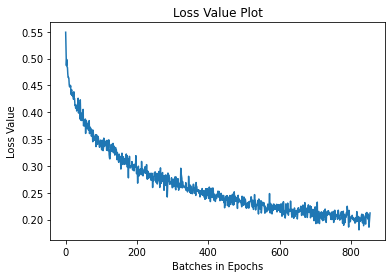

In [11]:
fig = plt.figure()
plt.plot(loss_list)
plt.title('Loss Value Plot')
plt.xlabel('Batches in Epochs')
plt.ylabel('Loss Value')
plt.savefig('model/Loss_Graph.png', bbox_inches='tight', dpi=600)
plt.show()

### Evaluate

- https://www.ibm.com/cloud/blog/the-xview2-ai-challenge
- [F1 Score with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
- [Confusion Matrix with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [12]:
net = Net()
net.load_state_dict(torch.load('model/state_dict_model.pt'))
net.eval()
net = net.to(dev)

In [13]:
dataset = DamageNetDataset(images_dir='test/images', labels_dir='test/labels', transform=torchvision.transforms.Compose([
    torchvision.transforms.Resize((75, 75)),
    torchvision.transforms.ToTensor()]))

In [14]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)

In [17]:
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sn
import pandas as pd

predictions = []
class_labels = []


for i, (images, labels) in enumerate(dataloader):
    images = images.to(dev)
    labels = labels.to(dev)

    y = net(images)
    y = torch.sigmoid(y)
    
    loss = criterion(y, labels)
    # print('Loss: ', loss)
    
    # Convert ordinal encoding into class prediction output
    # 0 -> no-damage
    # 1 -> minor-damage
    # 2 -> major-damage
    # 3 -> destroyed
    # y[0] = torch.tensor([1, 1, 0])
    # print(y[0])
    threshhold = 0.5
    
    for i in range(len(y)):
        for j in range(len(y[0])):
            if y[i][j] < threshhold:
                predictions.append(j)
                break
            if j == len(y[0]) - 1:
                predictions.append(3)
    # print(predictions)
    # print(len(predictions))
                
    # Do the same for the labels
    no_damage = torch.tensor([0, 0, 0]).to(dev)
    minor_damage = torch.tensor([1, 0, 0]).to(dev)
    major_damage = torch.tensor([1, 1, 0]).to(dev)
    destroyed = torch.tensor([1, 1, 1]).to(dev)
    
    for i in range(len(labels)):
        if torch.all(torch.eq(labels[i], no_damage)):
            class_labels.append(0)
        elif torch.all(torch.eq(labels[i], minor_damage)):
            class_labels.append(1)
        elif torch.all(torch.eq(labels[i], major_damage)):
            class_labels.append(2)
        elif torch.all(torch.eq(labels[i], destroyed)):
            class_labels.append(3)

    
# Work out accuracy    
# Probably not the best because of imbalanced data
num_correct = 0

for i in range(len(predictions)):
    if predictions[i] == class_labels[i]:
        num_correct = num_correct + 1

accuracy = (num_correct / len(predictions)) * 100
print('Accuracy: ', accuracy, '%')       
    
# Print Confusion Matrix
confusion_matrix = confusion_matrix(class_labels, predictions)
print('Confusion Matrix: ', confusion_matrix)

df_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, cmap=sn.cm.rocket_r, fmt='d') # font size
plt.savefig('model/Confusion_Matrix.png')
plt.show()
    
# F1 score is the harmonic mean between precision and recall
# Value [0, 1]
f1_score = f1_score(class_labels, predictions, average='weighted')
print('F1-Score: ', f1_score)  

print(predictions)
print(len(predictions))

print(class_labels)
print(len(class_labels))
    

Accuracy:  73.7406216505895 %
Confusion Matrix:  [[513  34  13  15]
 [ 54  22  11   5]
 [ 44  10  66   9]
 [ 32   9   9  87]]


F1-Score:  0.7261572146508548
[2, 0, 3, 3, 0, 2, 0, 2, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 2, 0, 0, 3, 0, 2, 0, 0, 0, 0, 3, 0, 0, 3, 3, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 3, 0, 0, 2, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 2, 1, 1, 3, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 1, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 2, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 2, 0, 0, 2, 3, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 1, 0, 2, 0, 2, 0, 1, 0, 0, 3, 3, 0, 0, 2, 1, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 1, 2, 0, 3, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 